# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

num_data1 = data1.shape[0]

point_x1 = np.zeros(num_data1)
point_y1 = np.zeros(num_data1)
label1   = np.zeros(num_data1)

num_data2 = data2.shape[0]

point_x2 = np.zeros(num_data2)
point_y2 = np.zeros(num_data2)
label2   = np.zeros(num_data2)

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

for i in range(num_data1):
    point_x1[i]  = data1[i,0]
    point_y1[i]  = data1[i,1]
    label1[i]    = data1[i,2]
    
for i in range(num_data2):
    point_x2[i]  = data2[i,0]
    point_y2[i]  = data2[i,1]
    label2[i]    = data2[i,2]
    
print(point_x1.max(),point_x1.min())
print(point_y1.max(),point_y1.min())
print(point_x2.max(),point_x2.min())
print(point_y2.max(),point_y2.min())

2.35963 -2.34003
4.44579 -4.44674
2.17502 -1.29319
1.25504 -0.80558


## plot the data

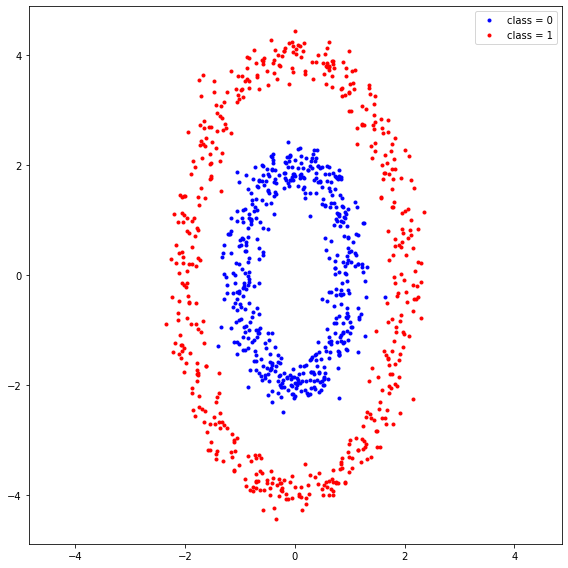

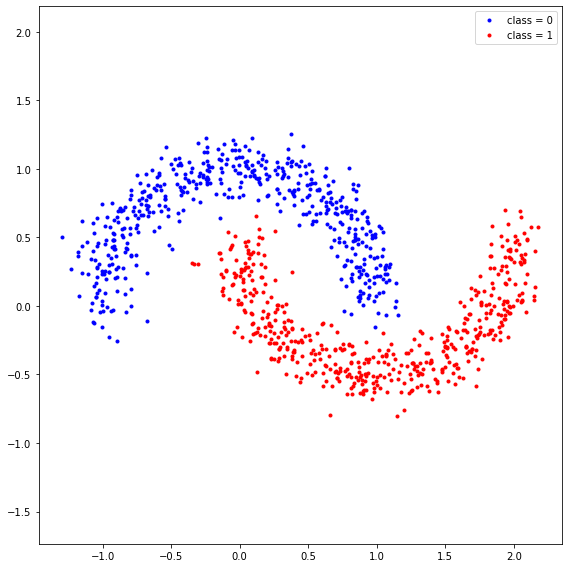

In [39]:
plot_data(data1)
plot_data(data2)

## define the feature function for each data to obtain the best accuracy

In [4]:
def feature_function1(x, y):
    
    num_data = x.shape[0]
    feature = np.zeros((num_data,3))
    
    for i in range(num_data):
        feature[i,0] = 1
        feature[i,1] = x[i]*x[i]
        feature[i,2] = y[i]*y[i]
    
    return feature

In [5]:
def feature_function2(x, y):
    
    num_data = x.shape[0]
    feature = np.zeros((num_data,5))
    
    for i in range(num_data):
        feature[i,0] = 1
        feature[i,1] = x[i]
        feature[i,2] = x[i]*x[i]
        feature[i,3] = x[i]*x[i]*x[i]
        feature[i,4] = y[i]
    
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [6]:
def regression_function(theta, feature):
    
    value = theta@feature.T
    
    return value

In [7]:
x = np.array((1,2,3,4,5))
y = np.array((1,1,1,1,1))
f = feature_function1(x,y)

print(f)

t = np.array((1,10,20))
print(regression_function(t,f))

[[ 1.  1.  1.]
 [ 1.  4.  1.]
 [ 1.  9.  1.]
 [ 1. 16.  1.]
 [ 1. 25.  1.]]
[ 31.  61. 111. 181. 271.]


## define sigmoid function with input $x$

In [8]:
def logistic_function(x):
    
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function with feature and label based on the logistic regression

In [9]:
def compute_loss_feature(theta, feature, label):
    
    value = regression_function(theta, feature)
    
    logistic = logistic_function(value)
    
    loss = 0
    
    for i in range(label.shape[0]):
        r = (-label[i]*np.log(logistic[i]) - (1-label[i])*np.log(1-logistic[i]))
        loss = loss + r
    
    return loss

## define gradient vector for the model parameters $\theta$

In [10]:
def compute_gradient_feature(theta, feature, label):
    
    value = regression_function(theta, feature)
    
    logistic = logistic_function(value)
        
    
    gradient = np.zeros((label.shape[0],feature.shape[1]))
    
    r = logistic-label
    gradient = r * feature.T
    gradient = (1/label.shape[0]) * gradient.sum(axis = 1)
    
    return gradient

## compute the accuracy

In [11]:
def compute_accuracy(theta, feature, label):
    
    value = regression_function(theta, feature)
    
    logistic = logistic_function(value)
    
    for i in range(value.shape[0]):
        t = logistic_function(value[i])
        if(t >= 0.5): logistic[i] = 1
        else: logistic[i] = 0
        
        
    accuracy = (1/label.shape[0])*(1-abs(logistic-label)).sum()
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [12]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate

theta1           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
feature1 = feature_function1(point_x1, point_y1)
theta1_iteration = np.zeros((num_iteration, theta1.size))
loss1_iteration  = np.zeros(num_iteration)

theta2           = np.array((0, 0, 0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
feature2 = feature_function2(point_x2, point_y2)
theta2_iteration = np.zeros((num_iteration, theta2.size))
loss2_iteration  = np.zeros(num_iteration)

#print(theta2.shape)
#print(feature2.shape)
#print(label2.shape)
#print(compute_gradient_feature(theta2, feature2, label2).shape)

(5,)
(1000, 5)
(1000,)
(5,)


In [13]:
for i in range(num_iteration):
    
    theta1 = theta1 - learning_rate*compute_gradient_feature(theta1, feature1, label1)
    loss1 = compute_loss_feature(theta1, feature1, label1)
    
    theta1_iteration[i] = theta1
    loss1_iteration[i] = loss1

    print("iteration = %4d, loss = %5.5f" % (i, loss1))
    print(theta1)

iteration =    0, loss = 724.28416
[0.         0.11399617 0.44271706]
iteration =    1, loss = 573.69713
[-0.09017165  0.12082833  0.22466832]
iteration =    2, loss = 544.68964
[-0.15468708  0.15619361  0.11945222]
iteration =    3, loss = 529.81598
[-0.19737799  0.20988955  0.17992956]
iteration =    4, loss = 514.71229
[-0.2550405   0.24253528  0.12876738]
iteration =    5, loss = 502.06488
[-0.30069073  0.28328673  0.17353836]
iteration =    6, loss = 489.56852
[-0.35652081  0.31020811  0.13800173]
iteration =    7, loss = 478.24368
[-0.40328219  0.34301355  0.17295657]
iteration =    8, loss = 467.18498
[-0.45727405  0.36618306  0.14780671]
iteration =    9, loss = 456.82084
[-0.50428506  0.39370889  0.17486616]
iteration =   10, loss = 446.77532
[-0.5563026   0.41447774  0.15794013]
iteration =   11, loss = 437.20663
[-0.60308269  0.43829401  0.17824411]
iteration =   12, loss = 427.96572
[-0.65308447  0.45748045  0.16802413]
iteration =   13, loss = 419.09276
[-0.69931276  0.478

iteration =  118, loss = 124.04073
[-3.3887143   1.491476    0.42906276]
iteration =  119, loss = 123.22689
[-3.40321729  1.4971841   0.43050967]
iteration =  120, loss = 122.42439
[-3.41761775  1.50285438  0.43194698]
iteration =  121, loss = 121.63300
[-3.43191709  1.50848734  0.43337481]
iteration =  122, loss = 120.85251
[-3.44611669  1.51408344  0.43479328]
iteration =  123, loss = 120.08268
[-3.4602179   1.51964315  0.43620252]
iteration =  124, loss = 119.32330
[-3.47422205  1.52516693  0.43760264]
iteration =  125, loss = 118.57417
[-3.48813044  1.53065523  0.43899376]
iteration =  126, loss = 117.83508
[-3.50194434  1.53610849  0.44037599]
iteration =  127, loss = 117.10583
[-3.51566502  1.54152715  0.44174944]
iteration =  128, loss = 116.38623
[-3.52929369  1.54691163  0.44311423]
iteration =  129, loss = 115.67609
[-3.54283156  1.55226234  0.44447046]
iteration =  130, loss = 114.97523
[-3.55627982  1.5575797   0.44581824]
iteration =  131, loss = 114.28347
[-3.56963962  1.

iteration =  233, loss = 72.15573
[-4.60903665  1.97913487  0.55282   ]
iteration =  234, loss = 71.90852
[-4.61699186  1.98235251  0.55363898]
iteration =  235, loss = 71.66321
[-4.62491601  1.98555797  0.55445491]
iteration =  236, loss = 71.41981
[-4.63280935  1.98875133  0.55526782]
iteration =  237, loss = 71.17827
[-4.64067212  1.99193268  0.55607772]
iteration =  238, loss = 70.93859
[-4.64850457  1.99510212  0.55688463]
iteration =  239, loss = 70.70073
[-4.65630692  1.99825974  0.55768859]
iteration =  240, loss = 70.46468
[-4.66407941  2.00140562  0.55848961]
iteration =  241, loss = 70.23042
[-4.67182227  2.00453984  0.55928771]
iteration =  242, loss = 69.99792
[-4.67953572  2.00766251  0.56008292]
iteration =  243, loss = 69.76717
[-4.68722001  2.0107737   0.56087526]
iteration =  244, loss = 69.53814
[-4.69487533  2.01387349  0.56166474]
iteration =  245, loss = 69.31083
[-4.70250193  2.01696197  0.5624514 ]
iteration =  246, loss = 69.08520
[-4.71010001  2.02003923  0.56

iteration =  350, loss = 52.20227
[-5.37693104  2.29114086  0.63252629]
iteration =  351, loss = 52.08520
[-5.38239674  2.29336972  0.63309821]
iteration =  352, loss = 51.96874
[-5.38784796  2.29559277  0.63366868]
iteration =  353, loss = 51.85290
[-5.39328479  2.29781003  0.6342377 ]
iteration =  354, loss = 51.73766
[-5.39870731  2.30002153  0.63480529]
iteration =  355, loss = 51.62302
[-5.40411558  2.30222731  0.63537145]
iteration =  356, loss = 51.50899
[-5.40950969  2.30442739  0.63593618]
iteration =  357, loss = 51.39554
[-5.41488972  2.3066218   0.63649951]
iteration =  358, loss = 51.28269
[-5.42025573  2.30881058  0.63706142]
iteration =  359, loss = 51.17042
[-5.4256078   2.31099374  0.63762194]
iteration =  360, loss = 51.05872
[-5.43094601  2.31317133  0.63818107]
iteration =  361, loss = 50.94761
[-5.43627043  2.31534337  0.63873881]
iteration =  362, loss = 50.83706
[-5.44158114  2.31750989  0.63929518]
iteration =  363, loss = 50.72708
[-5.44687819  2.31967091  0.63

iteration =  465, loss = 41.84601
[-5.92641155  2.51554287  0.69033606]
iteration =  466, loss = 41.77698
[-5.930606    2.51725768  0.69077976]
iteration =  467, loss = 41.70822
[-5.93479204  2.51896907  0.69122262]
iteration =  468, loss = 41.63974
[-5.93896972  2.52067705  0.69166462]
iteration =  469, loss = 41.57153
[-5.94313907  2.52238165  0.69210578]
iteration =  470, loss = 41.50359
[-5.94730011  2.52408287  0.6925461 ]
iteration =  471, loss = 41.43592
[-5.95145289  2.52578072  0.69298557]
iteration =  472, loss = 41.36851
[-5.95559743  2.52747522  0.69342421]
iteration =  473, loss = 41.30137
[-5.95973377  2.52916639  0.69386202]
iteration =  474, loss = 41.23450
[-5.96386195  2.53085423  0.694299  ]
iteration =  475, loss = 41.16789
[-5.967982    2.53253876  0.69473516]
iteration =  476, loss = 41.10154
[-5.97209394  2.53422     0.69517049]
iteration =  477, loss = 41.03545
[-5.97619782  2.53589795  0.695605  ]
iteration =  478, loss = 40.96962
[-5.98029367  2.53757263  0.69

iteration =  586, loss = 35.10558
[-6.38137642  2.70159975  0.73867639]
iteration =  587, loss = 35.06074
[-6.38475585  2.70298183  0.73903706]
iteration =  588, loss = 35.01605
[-6.38812991  2.70436171  0.73939719]
iteration =  589, loss = 34.97150
[-6.39149861  2.70573939  0.73975676]
iteration =  590, loss = 34.92709
[-6.39486196  2.70711488  0.74011579]
iteration =  591, loss = 34.88283
[-6.39821998  2.70848819  0.74047427]
iteration =  592, loss = 34.83870
[-6.40157269  2.70985933  0.74083221]
iteration =  593, loss = 34.79471
[-6.40492011  2.71122829  0.74118961]
iteration =  594, loss = 34.75086
[-6.40826226  2.71259509  0.74154646]
iteration =  595, loss = 34.70715
[-6.41159915  2.71395974  0.74190278]
iteration =  596, loss = 34.66357
[-6.4149308   2.71532224  0.74225857]
iteration =  597, loss = 34.62013
[-6.41825722  2.7166826   0.74261382]
iteration =  598, loss = 34.57683
[-6.42157844  2.71804083  0.74296853]
iteration =  599, loss = 34.53366
[-6.42489447  2.71939693  0.74

iteration =  709, loss = 30.48504
[-6.76135137  2.85694905  0.77937932]
iteration =  710, loss = 30.45364
[-6.76417977  2.85810487  0.77968344]
iteration =  711, loss = 30.42231
[-6.76700444  2.85925916  0.77998718]
iteration =  712, loss = 30.39107
[-6.76982541  2.86041192  0.78029053]
iteration =  713, loss = 30.35991
[-6.77264268  2.86156316  0.78059351]
iteration =  714, loss = 30.32883
[-6.77545626  2.86271289  0.7808961 ]
iteration =  715, loss = 30.29784
[-6.77826616  2.86386109  0.78119831]
iteration =  716, loss = 30.26692
[-6.78107239  2.86500779  0.78150015]
iteration =  717, loss = 30.23608
[-6.78387496  2.86615298  0.78180161]
iteration =  718, loss = 30.20533
[-6.78667388  2.86729667  0.78210269]
iteration =  719, loss = 30.17465
[-6.78946915  2.86843886  0.7824034 ]
iteration =  720, loss = 30.14406
[-6.7922608   2.86957955  0.78270373]
iteration =  721, loss = 30.11354
[-6.79504883  2.87071876  0.78300369]
iteration =  722, loss = 30.08310
[-6.79783325  2.87185648  0.78

iteration =  827, loss = 27.27220
[-7.07184526  2.98375659  0.81286694]
iteration =  828, loss = 27.24864
[-7.0742951   2.98475642  0.81313199]
iteration =  829, loss = 27.22514
[-7.07674217  2.98575511  0.81339675]
iteration =  830, loss = 27.20168
[-7.07918649  2.98675267  0.81366123]
iteration =  831, loss = 27.17828
[-7.08162807  2.98774909  0.81392543]
iteration =  832, loss = 27.15494
[-7.0840669   2.98874438  0.81418934]
iteration =  833, loss = 27.13164
[-7.086503    2.98973854  0.81445297]
iteration =  834, loss = 27.10840
[-7.08893637  2.99073158  0.81471631]
iteration =  835, loss = 27.08521
[-7.09136702  2.99172349  0.81497938]
iteration =  836, loss = 27.06207
[-7.09379496  2.99271428  0.81524216]
iteration =  837, loss = 27.03898
[-7.09622018  2.99370396  0.81550466]
iteration =  838, loss = 27.01595
[-7.0986427   2.99469252  0.81576689]
iteration =  839, loss = 26.99296
[-7.10106253  2.99567996  0.81602883]
iteration =  840, loss = 26.97003
[-7.10347967  2.9966663   0.81

iteration =  952, loss = 24.68771
[-7.3585394   3.10066994  0.84397439]
iteration =  953, loss = 24.66960
[-7.36068798  3.10154536  0.84420821]
iteration =  954, loss = 24.65151
[-7.36283445  3.10241991  0.84444181]
iteration =  955, loss = 24.63347
[-7.36497883  3.10329359  0.84467519]
iteration =  956, loss = 24.61546
[-7.36712112  3.10416641  0.84490836]
iteration =  957, loss = 24.59749
[-7.36926132  3.10503836  0.84514131]
iteration =  958, loss = 24.57955
[-7.37139944  3.10590945  0.84537404]
iteration =  959, loss = 24.56164
[-7.37353548  3.10677969  0.84560656]
iteration =  960, loss = 24.54377
[-7.37566945  3.10764906  0.84583886]
iteration =  961, loss = 24.52594
[-7.37780134  3.10851758  0.84607095]
iteration =  962, loss = 24.50814
[-7.37993117  3.10938525  0.84630282]
iteration =  963, loss = 24.49037
[-7.38205893  3.11025206  0.84653448]
iteration =  964, loss = 24.47264
[-7.38418464  3.11111803  0.84676592]
iteration =  965, loss = 24.45494
[-7.38630829  3.11198314  0.84

iteration = 1071, loss = 22.75465
[-7.60054972  3.19919188  0.87037739]
iteration = 1072, loss = 22.74011
[-7.60247517  3.19997502  0.87058799]
iteration = 1073, loss = 22.72559
[-7.60439896  3.20075747  0.87079842]
iteration = 1074, loss = 22.71110
[-7.60632107  3.20153923  0.87100868]
iteration = 1075, loss = 22.69663
[-7.60824152  3.2023203   0.87121876]
iteration = 1076, loss = 22.68219
[-7.61016031  3.20310068  0.87142867]
iteration = 1077, loss = 22.66777
[-7.61207743  3.20388038  0.87163841]
iteration = 1078, loss = 22.65337
[-7.61399291  3.20465939  0.87184798]
iteration = 1079, loss = 22.63901
[-7.61590672  3.20543771  0.87205737]
iteration = 1080, loss = 22.62466
[-7.61781889  3.20621536  0.87226659]
iteration = 1081, loss = 22.61034
[-7.61972942  3.20699232  0.87247564]
iteration = 1082, loss = 22.59605
[-7.62163829  3.2077686   0.87268451]
iteration = 1083, loss = 22.58178
[-7.62354553  3.2085442   0.87289322]
iteration = 1084, loss = 22.56754
[-7.62545113  3.20931913  0.87

iteration = 1194, loss = 21.13693
[-7.82568971  3.29067967  0.8950622 ]
iteration = 1195, loss = 21.12506
[-7.82743008  3.2913862   0.89525348]
iteration = 1196, loss = 21.11320
[-7.82916909  3.29209217  0.89544463]
iteration = 1197, loss = 21.10136
[-7.83090675  3.29279758  0.89563563]
iteration = 1198, loss = 21.08953
[-7.83264307  3.29350243  0.8958265 ]
iteration = 1199, loss = 21.07773
[-7.83437804  3.29420673  0.89601722]
iteration = 1200, loss = 21.06594
[-7.83611166  3.29491047  0.8962078 ]
iteration = 1201, loss = 21.05418
[-7.83784394  3.29561365  0.89639825]
iteration = 1202, loss = 21.04243
[-7.83957488  3.29631628  0.89658855]
iteration = 1203, loss = 21.03070
[-7.84130449  3.29701835  0.89677871]
iteration = 1204, loss = 21.01899
[-7.84303276  3.29771987  0.89696873]
iteration = 1205, loss = 21.00729
[-7.84475969  3.29842084  0.89715862]
iteration = 1206, loss = 20.99561
[-7.8464853   3.29912126  0.89734836]
iteration = 1207, loss = 20.98396
[-7.84820957  3.29982113  0.89

iteration = 1309, loss = 19.88222
[-8.0174709   3.3684685   0.91618563]
iteration = 1310, loss = 19.87221
[-8.01906886  3.36911606  0.91636201]
iteration = 1311, loss = 19.86221
[-8.02066568  3.36976314  0.91653828]
iteration = 1312, loss = 19.85223
[-8.02226138  3.37040977  0.91671443]
iteration = 1313, loss = 19.84227
[-8.02385595  3.37105592  0.91689046]
iteration = 1314, loss = 19.83231
[-8.02544939  3.37170161  0.91706637]
iteration = 1315, loss = 19.82238
[-8.0270417   3.37234683  0.91724216]
iteration = 1316, loss = 19.81245
[-8.02863289  3.37299158  0.91741784]
iteration = 1317, loss = 19.80254
[-8.03022296  3.37363587  0.9175934 ]
iteration = 1318, loss = 19.79264
[-8.03181191  3.3742797   0.91776884]
iteration = 1319, loss = 19.78276
[-8.03339974  3.37492306  0.91794416]
iteration = 1320, loss = 19.77289
[-8.03498646  3.37556597  0.91811937]
iteration = 1321, loss = 19.76304
[-8.03657206  3.3762084   0.91829446]
iteration = 1322, loss = 19.75320
[-8.03815654  3.37685038  0.91

iteration = 1437, loss = 18.70676
[-8.21334523  3.44776733  0.93785438]
iteration = 1438, loss = 18.69835
[-8.21481077  3.44836004  0.93801687]
iteration = 1439, loss = 18.68994
[-8.21627536  3.44895236  0.93817927]
iteration = 1440, loss = 18.68155
[-8.21773902  3.44954429  0.93834157]
iteration = 1441, loss = 18.67316
[-8.21920173  3.45013583  0.93850376]
iteration = 1442, loss = 18.66479
[-8.2206635   3.45072698  0.93866586]
iteration = 1443, loss = 18.65643
[-8.22212433  3.45131775  0.93882786]
iteration = 1444, loss = 18.64808
[-8.22358423  3.45190812  0.93898977]
iteration = 1445, loss = 18.63974
[-8.22504318  3.4524981   0.93915157]
iteration = 1446, loss = 18.63141
[-8.2265012   3.4530877   0.93931327]
iteration = 1447, loss = 18.62309
[-8.22795829  3.45367691  0.93947488]
iteration = 1448, loss = 18.61478
[-8.22941445  3.45426574  0.93963639]
iteration = 1449, loss = 18.60649
[-8.23086967  3.45485418  0.9397978 ]
iteration = 1450, loss = 18.59820
[-8.23232396  3.45544223  0.93

iteration = 1555, loss = 17.78338
[-8.3800815   3.51514041  0.9563775 ]
iteration = 1556, loss = 17.77611
[-8.38144376  3.51569035  0.95652913]
iteration = 1557, loss = 17.76885
[-8.38280521  3.51623995  0.95668069]
iteration = 1558, loss = 17.76160
[-8.38416585  3.51678921  0.95683215]
iteration = 1559, loss = 17.75436
[-8.38552568  3.51733814  0.95698354]
iteration = 1560, loss = 17.74712
[-8.3868847   3.51788673  0.95713483]
iteration = 1561, loss = 17.73990
[-8.38824292  3.51843499  0.95728605]
iteration = 1562, loss = 17.73268
[-8.38960033  3.51898292  0.95743718]
iteration = 1563, loss = 17.72547
[-8.39095694  3.51953051  0.95758822]
iteration = 1564, loss = 17.71828
[-8.39231274  3.52007778  0.95773918]
iteration = 1565, loss = 17.71108
[-8.39366775  3.5206247   0.95789005]
iteration = 1566, loss = 17.70390
[-8.39502195  3.5211713   0.95804084]
iteration = 1567, loss = 17.69673
[-8.39637535  3.52171757  0.95819155]
iteration = 1568, loss = 17.68956
[-8.39772795  3.5222635   0.95

iteration = 1674, loss = 16.97522
[-8.53676357  3.57833517  0.97385106]
iteration = 1675, loss = 16.96889
[-8.53803601  3.57884791  0.97399324]
iteration = 1676, loss = 16.96255
[-8.53930775  3.57936036  0.97413535]
iteration = 1677, loss = 16.95623
[-8.54057878  3.57987252  0.97427738]
iteration = 1678, loss = 16.94991
[-8.54184912  3.58038438  0.97441933]
iteration = 1679, loss = 16.94360
[-8.54311875  3.58089596  0.97456122]
iteration = 1680, loss = 16.93730
[-8.54438769  3.58140725  0.97470303]
iteration = 1681, loss = 16.93100
[-8.54565593  3.58191825  0.97484476]
iteration = 1682, loss = 16.92471
[-8.54692347  3.58242895  0.97498642]
iteration = 1683, loss = 16.91843
[-8.54819031  3.58293938  0.97512801]
iteration = 1684, loss = 16.91215
[-8.54945646  3.58344951  0.97526953]
iteration = 1685, loss = 16.90588
[-8.55072192  3.58395935  0.97541097]
iteration = 1686, loss = 16.89962
[-8.55198668  3.58446891  0.97555234]
iteration = 1687, loss = 16.89336
[-8.55325074  3.58497818  0.97

iteration = 1793, loss = 16.26707
[-8.68346503  3.6373972   0.99027266]
iteration = 1794, loss = 16.26149
[-8.68465924  3.63787755  0.99040658]
iteration = 1795, loss = 16.25591
[-8.68585284  3.63835765  0.99054045]
iteration = 1796, loss = 16.25034
[-8.68704582  3.63883749  0.99067424]
iteration = 1797, loss = 16.24478
[-8.68823818  3.63931707  0.99080797]
iteration = 1798, loss = 16.23922
[-8.68942994  3.63979641  0.99094164]
iteration = 1799, loss = 16.23367
[-8.69062108  3.64027549  0.99107524]
iteration = 1800, loss = 16.22812
[-8.69181161  3.64075431  0.99120878]
iteration = 1801, loss = 16.22258
[-8.69300153  3.64123289  0.99134225]
iteration = 1802, loss = 16.21705
[-8.69419084  3.64171121  0.99147566]
iteration = 1803, loss = 16.21152
[-8.69537954  3.64218928  0.99160901]
iteration = 1804, loss = 16.20599
[-8.69656764  3.64266709  0.99174229]
iteration = 1805, loss = 16.20047
[-8.69775512  3.64314466  0.9918755 ]
iteration = 1806, loss = 16.19496
[-8.698942    3.64362197  0.99

iteration = 1908, loss = 15.66086
[-8.8169264   3.69103444  1.00526509]
iteration = 1909, loss = 15.65589
[-8.81805402  3.69148723  1.00539198]
iteration = 1910, loss = 15.65092
[-8.81918109  3.69193979  1.00551881]
iteration = 1911, loss = 15.64595
[-8.82030762  3.69239213  1.00564558]
iteration = 1912, loss = 15.64099
[-8.8214336   3.69284424  1.0057723 ]
iteration = 1913, loss = 15.63604
[-8.82255904  3.69329613  1.00589896]
iteration = 1914, loss = 15.63109
[-8.82368394  3.69374779  1.00602557]
iteration = 1915, loss = 15.62614
[-8.82480829  3.69419923  1.00615211]
iteration = 1916, loss = 15.62120
[-8.8259321   3.69465044  1.0062786 ]
iteration = 1917, loss = 15.61627
[-8.82705538  3.69510143  1.00640503]
iteration = 1918, loss = 15.61134
[-8.82817811  3.6955522   1.0065314 ]
iteration = 1919, loss = 15.60641
[-8.8293003   3.69600274  1.00665772]
iteration = 1920, loss = 15.60149
[-8.83042195  3.69645306  1.00678398]
iteration = 1921, loss = 15.59657
[-8.83154306  3.69690316  1.00

iteration = 2029, loss = 15.09203
[-8.94956405  3.74424793  1.02021644]
iteration = 2030, loss = 15.08759
[-8.95062951  3.74467501  1.02033676]
iteration = 2031, loss = 15.08315
[-8.95169449  3.74510188  1.02045702]
iteration = 2032, loss = 15.07872
[-8.95275899  3.74552856  1.02057723]
iteration = 2033, loss = 15.07430
[-8.953823    3.74595503  1.02069739]
iteration = 2034, loss = 15.06987
[-8.95488653  3.74638131  1.0208175 ]
iteration = 2035, loss = 15.06545
[-8.95594958  3.74680738  1.02093756]
iteration = 2036, loss = 15.06104
[-8.95701215  3.74723326  1.02105757]
iteration = 2037, loss = 15.05663
[-8.95807423  3.74765894  1.02117752]
iteration = 2038, loss = 15.05222
[-8.95913584  3.74808441  1.02129743]
iteration = 2039, loss = 15.04782
[-8.96019696  3.74850969  1.02141729]
iteration = 2040, loss = 15.04342
[-8.96125761  3.74893478  1.02153709]
iteration = 2041, loss = 15.03902
[-8.96231777  3.74935966  1.02165684]
iteration = 2042, loss = 15.03463
[-8.96337746  3.74978435  1.02

iteration = 2144, loss = 14.60669
[-9.06903089  3.79209544  1.03372833]
iteration = 2145, loss = 14.60268
[-9.07004359  3.79250069  1.03384305]
iteration = 2146, loss = 14.59867
[-9.07105586  3.79290577  1.03395773]
iteration = 2147, loss = 14.59467
[-9.07206769  3.79331067  1.03407236]
iteration = 2148, loss = 14.59067
[-9.07307909  3.79371539  1.03418695]
iteration = 2149, loss = 14.58668
[-9.07409006  3.79411992  1.03430149]
iteration = 2150, loss = 14.58269
[-9.07510059  3.79452428  1.03441599]
iteration = 2151, loss = 14.57870
[-9.07611069  3.79492846  1.03453043]
iteration = 2152, loss = 14.57471
[-9.07712035  3.79533247  1.03464484]
iteration = 2153, loss = 14.57073
[-9.07812959  3.79573629  1.03475919]
iteration = 2154, loss = 14.56675
[-9.07913839  3.79613994  1.03487351]
iteration = 2155, loss = 14.56278
[-9.08014677  3.7965434   1.03498777]
iteration = 2156, loss = 14.55881
[-9.08115471  3.79694669  1.03510199]
iteration = 2157, loss = 14.55484
[-9.08216222  3.7973498   1.03

iteration = 2259, loss = 14.16721
[-9.18273527  3.8375606   1.04662937]
iteration = 2260, loss = 14.16357
[-9.18370042  3.8379462   1.04673905]
iteration = 2261, loss = 14.15993
[-9.18466518  3.83833164  1.04684869]
iteration = 2262, loss = 14.15630
[-9.18562955  3.83871692  1.04695829]
iteration = 2263, loss = 14.15267
[-9.18659353  3.83910204  1.04706785]
iteration = 2264, loss = 14.14904
[-9.18755711  3.839487    1.04717736]
iteration = 2265, loss = 14.14542
[-9.18852031  3.83987179  1.04728683]
iteration = 2266, loss = 14.14179
[-9.18948311  3.84025642  1.04739627]
iteration = 2267, loss = 14.13817
[-9.19044552  3.84064089  1.04750566]
iteration = 2268, loss = 14.13456
[-9.19140754  3.8410252   1.047615  ]
iteration = 2269, loss = 14.13094
[-9.19236917  3.84140935  1.04772431]
iteration = 2270, loss = 14.12733
[-9.19333041  3.84179334  1.04783358]
iteration = 2271, loss = 14.12373
[-9.19429126  3.84217716  1.0479428 ]
iteration = 2272, loss = 14.12012
[-9.19525172  3.84256083  1.04

iteration = 2373, loss = 13.77054
[-9.29031026  3.88050619  1.05887267]
iteration = 2374, loss = 13.76721
[-9.29123269  3.88087415  1.05897781]
iteration = 2375, loss = 13.76389
[-9.29215476  3.88124195  1.05908292]
iteration = 2376, loss = 13.76057
[-9.29307648  3.88160961  1.05918799]
iteration = 2377, loss = 13.75726
[-9.29399784  3.88197713  1.05929302]
iteration = 2378, loss = 13.75395
[-9.29491884  3.88234449  1.05939801]
iteration = 2379, loss = 13.75063
[-9.29583949  3.88271171  1.05950297]
iteration = 2380, loss = 13.74733
[-9.29675978  3.88307878  1.05960789]
iteration = 2381, loss = 13.74402
[-9.29767972  3.88344571  1.05971277]
iteration = 2382, loss = 13.74072
[-9.2985993   3.88381248  1.05981761]
iteration = 2383, loss = 13.73742
[-9.29951853  3.88417911  1.05992241]
iteration = 2384, loss = 13.73412
[-9.3004374   3.8845456   1.06002718]
iteration = 2385, loss = 13.73082
[-9.30135592  3.88491194  1.06013191]
iteration = 2386, loss = 13.72753
[-9.30227408  3.88527813  1.06

iteration = 2494, loss = 13.38626
[-9.39941215  3.92399135  1.07132818]
iteration = 2495, loss = 13.38323
[-9.40029338  3.92434229  1.07142895]
iteration = 2496, loss = 13.38020
[-9.40117428  3.9246931   1.07152968]
iteration = 2497, loss = 13.37717
[-9.40205486  3.92504378  1.07163037]
iteration = 2498, loss = 13.37415
[-9.40293511  3.92539432  1.07173103]
iteration = 2499, loss = 13.37113
[-9.40381504  3.92574473  1.07183166]
iteration = 2500, loss = 13.36810
[-9.40469465  3.926095    1.07193225]
iteration = 2501, loss = 13.36509
[-9.40557394  3.92644514  1.07203281]
iteration = 2502, loss = 13.36207
[-9.4064529   3.92679515  1.07213334]
iteration = 2503, loss = 13.35905
[-9.40733154  3.92714502  1.07223383]
iteration = 2504, loss = 13.35604
[-9.40820985  3.92749476  1.07233428]
iteration = 2505, loss = 13.35303
[-9.40908785  3.92784437  1.0724347 ]
iteration = 2506, loss = 13.35002
[-9.40996552  3.92819385  1.07253509]
iteration = 2507, loss = 13.34702
[-9.41084287  3.92854319  1.07

iteration = 2608, loss = 13.05442
[-9.49784114  3.96316066  1.08259929]
iteration = 2609, loss = 13.05163
[-9.49868694  3.96349699  1.08269629]
iteration = 2610, loss = 13.04884
[-9.49953244  3.96383318  1.08279325]
iteration = 2611, loss = 13.04605
[-9.50037764  3.96416926  1.08289018]
iteration = 2612, loss = 13.04326
[-9.50122255  3.96450522  1.08298708]
iteration = 2613, loss = 13.04048
[-9.50206716  3.96484105  1.08308395]
iteration = 2614, loss = 13.03769
[-9.50291147  3.96517676  1.08318079]
iteration = 2615, loss = 13.03491
[-9.50375548  3.96551235  1.08327759]
iteration = 2616, loss = 13.03214
[-9.5045992   3.96584781  1.08337436]
iteration = 2617, loss = 13.02936
[-9.50544263  3.96618315  1.08347111]
iteration = 2618, loss = 13.02658
[-9.50628575  3.96651837  1.08356782]
iteration = 2619, loss = 13.02381
[-9.50712859  3.96685347  1.08366449]
iteration = 2620, loss = 13.02104
[-9.50797112  3.96718845  1.08376114]
iteration = 2621, loss = 13.01827
[-9.50881336  3.96752331  1.08

iteration = 2723, loss = 12.74570
[-9.59321037  4.00105513  1.09355161]
iteration = 2724, loss = 12.74312
[-9.59402334  4.00137791  1.09364511]
iteration = 2725, loss = 12.74054
[-9.59483604  4.00170058  1.09373858]
iteration = 2726, loss = 12.73797
[-9.59564846  4.00202314  1.09383202]
iteration = 2727, loss = 12.73540
[-9.59646061  4.00234559  1.09392543]
iteration = 2728, loss = 12.73282
[-9.59727248  4.00266792  1.09401881]
iteration = 2729, loss = 12.73025
[-9.59808409  4.00299014  1.09411216]
iteration = 2730, loss = 12.72768
[-9.59889542  4.00331225  1.09420548]
iteration = 2731, loss = 12.72512
[-9.59970647  4.00363424  1.09429878]
iteration = 2732, loss = 12.72255
[-9.60051726  4.00395613  1.09439204]
iteration = 2733, loss = 12.71999
[-9.60132777  4.0042779   1.09448528]
iteration = 2734, loss = 12.71743
[-9.60213801  4.00459956  1.09457849]
iteration = 2735, loss = 12.71487
[-9.60294798  4.0049211   1.09467167]
iteration = 2736, loss = 12.71231
[-9.60375768  4.00524254  1.09

iteration = 2843, loss = 12.44817
[-9.68886539  4.03900545  1.10456872]
iteration = 2844, loss = 12.44579
[-9.68964685  4.03931524  1.10465885]
iteration = 2845, loss = 12.44341
[-9.69042805  4.03962493  1.10474897]
iteration = 2846, loss = 12.44103
[-9.69120901  4.03993452  1.10483905]
iteration = 2847, loss = 12.43865
[-9.69198971  4.04024401  1.10492911]
iteration = 2848, loss = 12.43627
[-9.69277016  4.04055339  1.10501914]
iteration = 2849, loss = 12.43390
[-9.69355036  4.04086266  1.10510914]
iteration = 2850, loss = 12.43153
[-9.69433031  4.04117184  1.10519912]
iteration = 2851, loss = 12.42916
[-9.69511001  4.04148091  1.10528907]
iteration = 2852, loss = 12.42679
[-9.69588945  4.04178988  1.105379  ]
iteration = 2853, loss = 12.42442
[-9.69666865  4.04209874  1.10546889]
iteration = 2854, loss = 12.42205
[-9.6974476   4.0424075   1.10555877]
iteration = 2855, loss = 12.41969
[-9.69822629  4.04271616  1.10564861]
iteration = 2856, loss = 12.41732
[-9.69900474  4.04302471  1.10

iteration = 2963, loss = 12.17290
[-9.78088904  4.07545949  1.11519851]
iteration = 2964, loss = 12.17069
[-9.78164145  4.07575732  1.11528555]
iteration = 2965, loss = 12.16848
[-9.78239364  4.07605506  1.11537256]
iteration = 2966, loss = 12.16628
[-9.78314559  4.0763527   1.11545955]
iteration = 2967, loss = 12.16407
[-9.78389731  4.07665025  1.11554652]
iteration = 2968, loss = 12.16187
[-9.78464879  4.0769477   1.11563346]
iteration = 2969, loss = 12.15967
[-9.78540005  4.07724506  1.11572037]
iteration = 2970, loss = 12.15747
[-9.78615107  4.07754232  1.11580727]
iteration = 2971, loss = 12.15527
[-9.78690186  4.07783948  1.11589413]
iteration = 2972, loss = 12.15308
[-9.78765242  4.07813655  1.11598097]
iteration = 2973, loss = 12.15088
[-9.78840275  4.07843352  1.11606779]
iteration = 2974, loss = 12.14869
[-9.78915285  4.0787304   1.11615458]
iteration = 2975, loss = 12.14649
[-9.78990272  4.07902719  1.11624135]
iteration = 2976, loss = 12.14430
[-9.79065235  4.07932387  1.11

iteration = 3079, loss = 11.92562
[-9.8666562   4.10938521  1.12513354]
iteration = 3080, loss = 11.92356
[-9.86738263  4.10967234  1.12521781]
iteration = 3081, loss = 11.92151
[-9.86810884  4.10995939  1.12530205]
iteration = 3082, loss = 11.91945
[-9.86883483  4.11024634  1.12538626]
iteration = 3083, loss = 11.91740
[-9.86956061  4.11053321  1.12547046]
iteration = 3084, loss = 11.91535
[-9.87028617  4.11081999  1.12555463]
iteration = 3085, loss = 11.91329
[-9.87101152  4.11110668  1.12563878]
iteration = 3086, loss = 11.91124
[-9.87173665  4.11139328  1.12572291]
iteration = 3087, loss = 11.90920
[-9.87246157  4.1116798   1.12580701]
iteration = 3088, loss = 11.90715
[-9.87318628  4.11196622  1.12589109]
iteration = 3089, loss = 11.90510
[-9.87391076  4.11225256  1.12597515]
iteration = 3090, loss = 11.90306
[-9.87463504  4.11253881  1.12605918]
iteration = 3091, loss = 11.90101
[-9.8753591   4.11282497  1.12614319]
iteration = 3092, loss = 11.89897
[-9.87608294  4.11311104  1.12

iteration = 3200, loss = 11.68530
[-9.95302484  4.1434994   1.13516609]
iteration = 3201, loss = 11.68338
[-9.9537261   4.14377618  1.13524767]
iteration = 3202, loss = 11.68147
[-9.95442716  4.14405288  1.13532922]
iteration = 3203, loss = 11.67955
[-9.95512802  4.14432949  1.13541075]
iteration = 3204, loss = 11.67764
[-9.95582868  4.14460602  1.13549226]
iteration = 3205, loss = 11.67573
[-9.95652914  4.14488248  1.13557375]
iteration = 3206, loss = 11.67382
[-9.95722939  4.14515885  1.13565522]
iteration = 3207, loss = 11.67191
[-9.95792945  4.14543513  1.13573666]
iteration = 3208, loss = 11.67000
[-9.95862931  4.14571134  1.13581809]
iteration = 3209, loss = 11.66809
[-9.95932897  4.14598746  1.13589949]
iteration = 3210, loss = 11.66618
[-9.96002843  4.1462635   1.13598087]
iteration = 3211, loss = 11.66428
[-9.9607277   4.14653946  1.13606223]
iteration = 3212, loss = 11.66237
[-9.96142676  4.14681534  1.13614357]
iteration = 3213, loss = 11.66047
[-9.96212562  4.14709113  1.13

[-10.03645678   4.17640581   1.14488463]
iteration = 3322, loss = 11.45933
[-10.03713464   4.17667298   1.1449637 ]
iteration = 3323, loss = 11.45754
[-10.03781233   4.17694006   1.14504275]
iteration = 3324, loss = 11.45575
[-10.03848982   4.17720707   1.14512178]
iteration = 3325, loss = 11.45396
[-10.03916713   4.17747401   1.1452008 ]
iteration = 3326, loss = 11.45218
[-10.03984425   4.17774086   1.14527979]
iteration = 3327, loss = 11.45039
[-10.04052119   4.17800765   1.14535876]
iteration = 3328, loss = 11.44861
[-10.04119794   4.17827435   1.14543771]
iteration = 3329, loss = 11.44682
[-10.0418745    4.17854098   1.14551664]
iteration = 3330, loss = 11.44504
[-10.04255088   4.17880753   1.14559556]
iteration = 3331, loss = 11.44326
[-10.04322707   4.17907401   1.14567445]
iteration = 3332, loss = 11.44148
[-10.04390308   4.1793404    1.14575332]
iteration = 3333, loss = 11.43970
[-10.0445789    4.17960673   1.14583218]
iteration = 3334, loss = 11.43792
[-10.04525454   4.1798729

iteration = 3431, loss = 11.26995
[-10.10992721   4.20534385   1.15346532]
iteration = 3432, loss = 11.26826
[-10.1105852    4.20560285   1.15354226]
iteration = 3433, loss = 11.26658
[-10.11124301   4.20586177   1.15361918]
iteration = 3434, loss = 11.26489
[-10.11190065   4.20612062   1.15369609]
iteration = 3435, loss = 11.26321
[-10.11255811   4.2063794    1.15377298]
iteration = 3436, loss = 11.26153
[-10.11321539   4.20663811   1.15384985]
iteration = 3437, loss = 11.25984
[-10.11387251   4.20689675   1.1539267 ]
iteration = 3438, loss = 11.25816
[-10.11452944   4.20715531   1.15400353]
iteration = 3439, loss = 11.25648
[-10.11518621   4.2074138    1.15408034]
iteration = 3440, loss = 11.25480
[-10.1158428    4.20767222   1.15415713]
iteration = 3441, loss = 11.25313
[-10.11649921   4.20793057   1.15423391]
iteration = 3442, loss = 11.25145
[-10.11715545   4.20818885   1.15431067]
iteration = 3443, loss = 11.24977
[-10.11781152   4.20844706   1.1543874 ]
iteration = 3444, loss = 

iteration = 3550, loss = 11.07541
[-10.1870247    4.23567025   1.16249274]
iteration = 3551, loss = 11.07383
[-10.18766252   4.23592096   1.16256752]
iteration = 3552, loss = 11.07225
[-10.18830018   4.23617161   1.16264228]
iteration = 3553, loss = 11.07067
[-10.18893767   4.23642219   1.16271703]
iteration = 3554, loss = 11.06908
[-10.189575     4.2366727    1.16279176]
iteration = 3555, loss = 11.06750
[-10.19021217   4.23692315   1.16286648]
iteration = 3556, loss = 11.06592
[-10.19084917   4.23717353   1.16294117]
iteration = 3557, loss = 11.06434
[-10.19148601   4.23742384   1.16301585]
iteration = 3558, loss = 11.06277
[-10.19212269   4.23767408   1.16309051]
iteration = 3559, loss = 11.06119
[-10.1927592    4.23792426   1.16316515]
iteration = 3560, loss = 11.05961
[-10.19339555   4.23817437   1.16323978]
iteration = 3561, loss = 11.05804
[-10.19403173   4.23842442   1.16331439]
iteration = 3562, loss = 11.05646
[-10.19466776   4.23867439   1.16338898]
iteration = 3563, loss = 

iteration = 3667, loss = 10.89547
[-10.26056008   4.26455662   1.17112555]
iteration = 3668, loss = 10.89398
[-10.26117931   4.2647997    1.17119834]
iteration = 3669, loss = 10.89249
[-10.26179838   4.26504272   1.17127111]
iteration = 3670, loss = 10.89099
[-10.2624173    4.26528568   1.17134387]
iteration = 3671, loss = 10.88950
[-10.26303607   4.26552858   1.17141661]
iteration = 3672, loss = 10.88801
[-10.26365468   4.26577141   1.17148933]
iteration = 3673, loss = 10.88653
[-10.26427314   4.26601418   1.17156204]
iteration = 3674, loss = 10.88504
[-10.26489145   4.26625689   1.17163473]
iteration = 3675, loss = 10.88355
[-10.2655096    4.26649953   1.17170741]
iteration = 3676, loss = 10.88206
[-10.2661276    4.26674211   1.17178007]
iteration = 3677, loss = 10.88058
[-10.26674545   4.26698463   1.17185271]
iteration = 3678, loss = 10.87909
[-10.26736314   4.26722708   1.17192533]
iteration = 3679, loss = 10.87761
[-10.26798068   4.26746947   1.17199794]
iteration = 3680, loss = 

iteration = 3783, loss = 10.72716
[-10.33138372   4.29234147   1.17946116]
iteration = 3784, loss = 10.72575
[-10.33198561   4.29257744   1.17953209]
iteration = 3785, loss = 10.72434
[-10.33258736   4.29281336   1.17960301]
iteration = 3786, loss = 10.72293
[-10.33318896   4.29304921   1.17967391]
iteration = 3787, loss = 10.72153
[-10.33379042   4.29328501   1.17974479]
iteration = 3788, loss = 10.72012
[-10.33439174   4.29352075   1.17981566]
iteration = 3789, loss = 10.71871
[-10.3349929    4.29375642   1.17988651]
iteration = 3790, loss = 10.71731
[-10.33559393   4.29399204   1.17995735]
iteration = 3791, loss = 10.71590
[-10.33619481   4.2942276    1.18002817]
iteration = 3792, loss = 10.71450
[-10.33679554   4.2944631    1.18009897]
iteration = 3793, loss = 10.71309
[-10.33739613   4.29469854   1.18016976]
iteration = 3794, loss = 10.71169
[-10.33799658   4.29493393   1.18024054]
iteration = 3795, loss = 10.71029
[-10.33859688   4.29516925   1.1803113 ]
iteration = 3796, loss = 

iteration = 3898, loss = 10.56938
[-10.3996689    4.31909637   1.18751801]
iteration = 3899, loss = 10.56805
[-10.40025459   4.3193257    1.18758721]
iteration = 3900, loss = 10.56672
[-10.40084014   4.31955498   1.18765638]
iteration = 3901, loss = 10.56538
[-10.40142556   4.3197842    1.18772554]
iteration = 3902, loss = 10.56405
[-10.40201084   4.32001337   1.18779469]
iteration = 3903, loss = 10.56272
[-10.40259598   4.32024248   1.18786382]
iteration = 3904, loss = 10.56139
[-10.40318099   4.32047153   1.18793294]
iteration = 3905, loss = 10.56006
[-10.40376586   4.32070053   1.18800204]
iteration = 3906, loss = 10.55873
[-10.4043506    4.32092948   1.18807113]
iteration = 3907, loss = 10.55740
[-10.40493519   4.32115836   1.1881402 ]
iteration = 3908, loss = 10.55607
[-10.40551966   4.32138719   1.18820926]
iteration = 3909, loss = 10.55474
[-10.40610398   4.32161597   1.1882783 ]
iteration = 3910, loss = 10.55341
[-10.40668817   4.32184469   1.18834733]
iteration = 3911, loss = 

iteration = 4013, loss = 10.41991
[-10.46614274   4.34510911   1.19538034]
iteration = 4014, loss = 10.41864
[-10.46671312   4.34533217   1.19544789]
iteration = 4015, loss = 10.41738
[-10.46728338   4.34555518   1.19551542]
iteration = 4016, loss = 10.41611
[-10.46785351   4.34577814   1.19558294]
iteration = 4017, loss = 10.41485
[-10.4684235    4.34600105   1.19565045]
iteration = 4018, loss = 10.41359
[-10.46899337   4.3462239    1.19571794]
iteration = 4019, loss = 10.41232
[-10.46956311   4.34644671   1.19578541]
iteration = 4020, loss = 10.41106
[-10.47013272   4.34666945   1.19585288]
iteration = 4021, loss = 10.40980
[-10.47070221   4.34689215   1.19592033]
iteration = 4022, loss = 10.40854
[-10.47127156   4.34711479   1.19598776]
iteration = 4023, loss = 10.40728
[-10.47184078   4.34733738   1.19605518]
iteration = 4024, loss = 10.40602
[-10.47240988   4.34755992   1.19612259]
iteration = 4025, loss = 10.40476
[-10.47297884   4.3477824    1.19618998]
iteration = 4026, loss = 

iteration = 4130, loss = 10.27567
[-10.53201586   4.37085487   1.20319062]
iteration = 4131, loss = 10.27447
[-10.53257152   4.37107191   1.20325658]
iteration = 4132, loss = 10.27327
[-10.53312706   4.3712889    1.20332253]
iteration = 4133, loss = 10.27207
[-10.53368248   4.37150583   1.20338847]
iteration = 4134, loss = 10.27087
[-10.53423777   4.37172272   1.20345439]
iteration = 4135, loss = 10.26967
[-10.53479294   4.37193956   1.20352031]
iteration = 4136, loss = 10.26847
[-10.53534799   4.37215635   1.2035862 ]
iteration = 4137, loss = 10.26727
[-10.53590292   4.37237309   1.20365209]
iteration = 4138, loss = 10.26608
[-10.53645772   4.37258977   1.20371796]
iteration = 4139, loss = 10.26488
[-10.53701241   4.37280641   1.20378382]
iteration = 4140, loss = 10.26369
[-10.53756697   4.373023     1.20384966]
iteration = 4141, loss = 10.26249
[-10.53812141   4.37323954   1.20391549]
iteration = 4142, loss = 10.26129
[-10.53867572   4.37345602   1.20398131]
iteration = 4143, loss = 

iteration = 4239, loss = 10.14786
[-10.59187426   4.39422207   1.21030442]
iteration = 4240, loss = 10.14671
[-10.59241691   4.39443378   1.21036899]
iteration = 4241, loss = 10.14557
[-10.59295944   4.39464545   1.21043354]
iteration = 4242, loss = 10.14442
[-10.59350186   4.39485707   1.21049808]
iteration = 4243, loss = 10.14328
[-10.59404416   4.39506864   1.2105626 ]
iteration = 4244, loss = 10.14214
[-10.59458634   4.39528017   1.21062712]
iteration = 4245, loss = 10.14100
[-10.59512841   4.39549164   1.21069162]
iteration = 4246, loss = 10.13985
[-10.59567036   4.39570307   1.21075611]
iteration = 4247, loss = 10.13871
[-10.59621219   4.39591445   1.21082058]
iteration = 4248, loss = 10.13757
[-10.59675391   4.39612579   1.21088505]
iteration = 4249, loss = 10.13643
[-10.59729552   4.39633707   1.2109495 ]
iteration = 4250, loss = 10.13529
[-10.597837     4.39654831   1.21101394]
iteration = 4251, loss = 10.13415
[-10.59837837   4.39675951   1.21107837]
iteration = 4252, loss = 

iteration = 4357, loss = 10.01610
[-10.65511722   4.41888152   1.21783798]
iteration = 4358, loss = 10.01501
[-10.65564649   4.41908777   1.2179011 ]
iteration = 4359, loss = 10.01392
[-10.65617565   4.41929397   1.21796422]
iteration = 4360, loss = 10.01283
[-10.6567047    4.41950012   1.21802732]
iteration = 4361, loss = 10.01175
[-10.65723364   4.41970623   1.2180904 ]
iteration = 4362, loss = 10.01066
[-10.65776247   4.4199123    1.21815348]
iteration = 4363, loss = 10.00957
[-10.65829119   4.42011832   1.21821655]
iteration = 4364, loss = 10.00849
[-10.6588198    4.42032429   1.2182796 ]
iteration = 4365, loss = 10.00740
[-10.6593483    4.42053022   1.21834264]
iteration = 4366, loss = 10.00632
[-10.65987669   4.42073611   1.21840567]
iteration = 4367, loss = 10.00523
[-10.66040497   4.42094195   1.21846869]
iteration = 4368, loss = 10.00415
[-10.66093314   4.42114774   1.21853169]
iteration = 4369, loss = 10.00306
[-10.6614612    4.42135349   1.21859468]
iteration = 4370, loss = 

iteration = 4470, loss = 9.89589
[-10.71423758   4.44190636   1.22489697]
iteration = 4471, loss = 9.89485
[-10.71475468   4.44210763   1.22495879]
iteration = 4472, loss = 9.89382
[-10.71527167   4.44230886   1.22502059]
iteration = 4473, loss = 9.89278
[-10.71578856   4.44251005   1.22508238]
iteration = 4474, loss = 9.89174
[-10.71630535   4.44271119   1.22514416]
iteration = 4475, loss = 9.89070
[-10.71682203   4.44291229   1.22520593]
iteration = 4476, loss = 9.88967
[-10.7173386    4.44311335   1.22526768]
iteration = 4477, loss = 9.88863
[-10.71785507   4.44331436   1.22532943]
iteration = 4478, loss = 9.88759
[-10.71837144   4.44351533   1.22539116]
iteration = 4479, loss = 9.88656
[-10.7188877    4.44371626   1.22545289]
iteration = 4480, loss = 9.88552
[-10.71940385   4.44391715   1.2255146 ]
iteration = 4481, loss = 9.88449
[-10.71991991   4.44411799   1.2255763 ]
iteration = 4482, loss = 9.88345
[-10.72043585   4.44431879   1.22563799]
iteration = 4483, loss = 9.88242
[-10.

iteration = 4590, loss = 9.77417
[-10.77555191   4.46575772   1.23223506]
iteration = 4591, loss = 9.77318
[-10.77605672   4.46595397   1.23229555]
iteration = 4592, loss = 9.77219
[-10.77656142   4.46615018   1.23235602]
iteration = 4593, loss = 9.77120
[-10.77706603   4.46634635   1.23241649]
iteration = 4594, loss = 9.77021
[-10.77757054   4.46654248   1.23247695]
iteration = 4595, loss = 9.76923
[-10.77807495   4.46673857   1.23253739]
iteration = 4596, loss = 9.76824
[-10.77857926   4.46693462   1.23259783]
iteration = 4597, loss = 9.76725
[-10.77908347   4.46713063   1.23265825]
iteration = 4598, loss = 9.76626
[-10.77958758   4.4673266    1.23271866]
iteration = 4599, loss = 9.76528
[-10.78009159   4.46752252   1.23277907]
iteration = 4600, loss = 9.76429
[-10.7805955    4.46771841   1.23283946]
iteration = 4601, loss = 9.76330
[-10.78109931   4.46791426   1.23289984]
iteration = 4602, loss = 9.76232
[-10.78160303   4.46811006   1.23296021]
iteration = 4603, loss = 9.76133
[-10.

iteration = 4704, loss = 9.66380
[-10.83246698   4.48787211   1.23906248]
iteration = 4705, loss = 9.66285
[-10.83296067   4.48806383   1.23912177]
iteration = 4706, loss = 9.66191
[-10.83345427   4.48825551   1.23918105]
iteration = 4707, loss = 9.66096
[-10.83394777   4.48844714   1.23924032]
iteration = 4708, loss = 9.66001
[-10.83444117   4.48863874   1.23929958]
iteration = 4709, loss = 9.65907
[-10.83493449   4.4888303    1.23935882]
iteration = 4710, loss = 9.65812
[-10.8354277    4.48902183   1.23941806]
iteration = 4711, loss = 9.65718
[-10.83592082   4.48921331   1.23947729]
iteration = 4712, loss = 9.65624
[-10.83641385   4.48940475   1.23953651]
iteration = 4713, loss = 9.65529
[-10.83690678   4.48959616   1.23959572]
iteration = 4714, loss = 9.65435
[-10.83739962   4.48978753   1.23965491]
iteration = 4715, loss = 9.65341
[-10.83789236   4.48997885   1.2397141 ]
iteration = 4716, loss = 9.65246
[-10.83838501   4.49017014   1.23977328]
iteration = 4717, loss = 9.65152
[-10.

iteration = 4829, loss = 9.54825
[-10.89345278   4.51154059   1.24639539]
iteration = 4830, loss = 9.54735
[-10.89393487   4.51172758   1.24645343]
iteration = 4831, loss = 9.54645
[-10.89441687   4.51191452   1.24651146]
iteration = 4832, loss = 9.54554
[-10.89489877   4.51210143   1.24656948]
iteration = 4833, loss = 9.54464
[-10.89538059   4.5122883    1.24662748]
iteration = 4834, loss = 9.54374
[-10.89586231   4.51247514   1.24668548]
iteration = 4835, loss = 9.54284
[-10.89634394   4.51266193   1.24674347]
iteration = 4836, loss = 9.54194
[-10.89682549   4.5128487    1.24680145]
iteration = 4837, loss = 9.54104
[-10.89730694   4.51303542   1.24685942]
iteration = 4838, loss = 9.54014
[-10.8977883    4.51322211   1.24691738]
iteration = 4839, loss = 9.53924
[-10.89826957   4.51340876   1.24697533]
iteration = 4840, loss = 9.53834
[-10.89875076   4.51359537   1.24703327]
iteration = 4841, loss = 9.53744
[-10.89923185   4.51378195   1.2470912 ]
iteration = 4842, loss = 9.53655
[-10.

iteration = 4941, loss = 9.44926
[-10.94689189   4.53225658   1.25283571]
iteration = 4942, loss = 9.44839
[-10.94736405   4.53243952   1.25289267]
iteration = 4943, loss = 9.44753
[-10.94783614   4.53262242   1.25294963]
iteration = 4944, loss = 9.44666
[-10.94830813   4.53280529   1.25300658]
iteration = 4945, loss = 9.44580
[-10.94878004   4.53298813   1.25306352]
iteration = 4946, loss = 9.44493
[-10.94925186   4.53317092   1.25312045]
iteration = 4947, loss = 9.44407
[-10.9497236    4.53335369   1.25317737]
iteration = 4948, loss = 9.44321
[-10.95019525   4.53353642   1.25323428]
iteration = 4949, loss = 9.44234
[-10.95066681   4.53371911   1.25329118]
iteration = 4950, loss = 9.44148
[-10.95113829   4.53390177   1.25334807]
iteration = 4951, loss = 9.44062
[-10.95160968   4.53408439   1.25340495]
iteration = 4952, loss = 9.43976
[-10.95208098   4.53426698   1.25346182]
iteration = 4953, loss = 9.43889
[-10.9525522    4.53444953   1.25351869]
iteration = 4954, loss = 9.43803
[-10.

iteration = 5056, loss = 9.35178
[-11.00063181   4.55306677   1.25932642]
iteration = 5057, loss = 9.35095
[-11.00109424   4.55324574   1.25938234]
iteration = 5058, loss = 9.35012
[-11.00155658   4.55342468   1.25943824]
iteration = 5059, loss = 9.34929
[-11.00201884   4.55360359   1.25949414]
iteration = 5060, loss = 9.34846
[-11.00248102   4.55378246   1.25955002]
iteration = 5061, loss = 9.34763
[-11.00294312   4.55396129   1.2596059 ]
iteration = 5062, loss = 9.34680
[-11.00340513   4.5541401    1.25966177]
iteration = 5063, loss = 9.34598
[-11.00386706   4.55431887   1.25971763]
iteration = 5064, loss = 9.34515
[-11.00432891   4.5544976    1.25977348]
iteration = 5065, loss = 9.34432
[-11.00479067   4.5546763    1.25982933]
iteration = 5066, loss = 9.34349
[-11.00525235   4.55485497   1.25988516]
iteration = 5067, loss = 9.34267
[-11.00571395   4.55503361   1.25994098]
iteration = 5068, loss = 9.34184
[-11.00617547   4.55521221   1.2599968 ]
iteration = 5069, loss = 9.34101
[-11.

iteration = 5179, loss = 9.25189
[-11.05689814   4.57483106   1.26613768]
iteration = 5180, loss = 9.25110
[-11.0573506    4.57500598   1.26619252]
iteration = 5181, loss = 9.25030
[-11.05780299   4.57518086   1.26624734]
iteration = 5182, loss = 9.24951
[-11.05825531   4.57535572   1.26630217]
iteration = 5183, loss = 9.24872
[-11.05870754   4.57553054   1.26635698]
iteration = 5184, loss = 9.24792
[-11.05915969   4.57570533   1.26641178]
iteration = 5185, loss = 9.24713
[-11.05961176   4.57588008   1.26646658]
iteration = 5186, loss = 9.24634
[-11.06006376   4.57605481   1.26652136]
iteration = 5187, loss = 9.24555
[-11.06051568   4.5762295    1.26657614]
iteration = 5188, loss = 9.24475
[-11.06096751   4.57640416   1.26663091]
iteration = 5189, loss = 9.24396
[-11.06141927   4.57657879   1.26668567]
iteration = 5190, loss = 9.24317
[-11.06187095   4.57675339   1.26674042]
iteration = 5191, loss = 9.24238
[-11.06232255   4.57692795   1.26679517]
iteration = 5192, loss = 9.24159
[-11.

iteration = 5297, loss = 9.16004
[-11.1097513   4.5952524   1.2725503]
iteration = 5298, loss = 9.15928
[-11.11019464   4.5954236    1.27260415]
iteration = 5299, loss = 9.15852
[-11.1106379    4.59559477   1.27265799]
iteration = 5300, loss = 9.15776
[-11.11108108   4.59576591   1.27271182]
iteration = 5301, loss = 9.15700
[-11.11152419   4.59593702   1.27276565]
iteration = 5302, loss = 9.15623
[-11.11196722   4.5961081    1.27281947]
iteration = 5303, loss = 9.15547
[-11.11241018   4.59627915   1.27287328]
iteration = 5304, loss = 9.15471
[-11.11285306   4.59645017   1.27292708]
iteration = 5305, loss = 9.15395
[-11.11329587   4.59662115   1.27298087]
iteration = 5306, loss = 9.15319
[-11.1137386    4.59679211   1.27303465]
iteration = 5307, loss = 9.15243
[-11.11418126   4.59696304   1.27308843]
iteration = 5308, loss = 9.15167
[-11.11462384   4.59713393   1.2731422 ]
iteration = 5309, loss = 9.15091
[-11.11506634   4.59730479   1.27319596]
iteration = 5310, loss = 9.15015
[-11.115

iteration = 5410, loss = 9.07551
[-11.15937545   4.61440598   1.27858413]
iteration = 5411, loss = 9.07478
[-11.15981041   4.61457377   1.27863708]
iteration = 5412, loss = 9.07404
[-11.16024528   4.61474154   1.27869001]
iteration = 5413, loss = 9.07331
[-11.16068009   4.61490927   1.27874294]
iteration = 5414, loss = 9.07258
[-11.16111482   4.61507697   1.27879586]
iteration = 5415, loss = 9.07185
[-11.16154948   4.61524465   1.27884877]
iteration = 5416, loss = 9.07111
[-11.16198407   4.61541229   1.27890167]
iteration = 5417, loss = 9.07038
[-11.16241858   4.61557991   1.27895456]
iteration = 5418, loss = 9.06965
[-11.16285302   4.61574749   1.27900745]
iteration = 5419, loss = 9.06892
[-11.16328739   4.61591505   1.27906033]
iteration = 5420, loss = 9.06819
[-11.16372169   4.61608258   1.2791132 ]
iteration = 5421, loss = 9.06745
[-11.16415591   4.61625008   1.27916606]
iteration = 5422, loss = 9.06672
[-11.16459007   4.61641754   1.27921892]
iteration = 5423, loss = 9.06599
[-11.

iteration = 5527, loss = 8.99131
[-11.20977792   4.6338399    1.28472564]
iteration = 5528, loss = 8.99060
[-11.21020454   4.63400431   1.28477767]
iteration = 5529, loss = 8.98989
[-11.21063109   4.63416869   1.28482971]
iteration = 5530, loss = 8.98919
[-11.21105756   4.63433304   1.28488173]
iteration = 5531, loss = 8.98848
[-11.21148397   4.63449736   1.28493375]
iteration = 5532, loss = 8.98778
[-11.21191031   4.63466165   1.28498576]
iteration = 5533, loss = 8.98707
[-11.21233658   4.63482591   1.28503776]
iteration = 5534, loss = 8.98637
[-11.21276277   4.63499015   1.28508975]
iteration = 5535, loss = 8.98567
[-11.2131889    4.63515436   1.28514174]
iteration = 5536, loss = 8.98496
[-11.21361496   4.63531854   1.28519372]
iteration = 5537, loss = 8.98426
[-11.21404095   4.63548269   1.28524569]
iteration = 5538, loss = 8.98355
[-11.21446687   4.63564681   1.28529765]
iteration = 5539, loss = 8.98285
[-11.21489272   4.63581091   1.28534961]
iteration = 5540, loss = 8.98215
[-11.

iteration = 5651, loss = 8.90553
[-11.26215377   4.65401317   1.29112167]
iteration = 5652, loss = 8.90485
[-11.26257192   4.65417414   1.29117279]
iteration = 5653, loss = 8.90417
[-11.26299      4.65433508   1.29122391]
iteration = 5654, loss = 8.90349
[-11.26340802   4.65449599   1.29127501]
iteration = 5655, loss = 8.90282
[-11.26382596   4.65465688   1.29132611]
iteration = 5656, loss = 8.90214
[-11.26424384   4.65481774   1.29137721]
iteration = 5657, loss = 8.90146
[-11.26466166   4.65497857   1.29142829]
iteration = 5658, loss = 8.90079
[-11.2650794    4.65513937   1.29147937]
iteration = 5659, loss = 8.90011
[-11.26549708   4.65530015   1.29153044]
iteration = 5660, loss = 8.89943
[-11.2659147   4.6554609   1.2915815]
iteration = 5661, loss = 8.89876
[-11.26633224   4.65562162   1.29163256]
iteration = 5662, loss = 8.89808
[-11.26674972   4.65578232   1.29168361]
iteration = 5663, loss = 8.89741
[-11.26716714   4.65594298   1.29173465]
iteration = 5664, loss = 8.89673
[-11.267

iteration = 5768, loss = 8.82767
[-11.31062928   4.67266452   1.29705434]
iteration = 5769, loss = 8.82702
[-11.31103976   4.67282237   1.29710463]
iteration = 5770, loss = 8.82636
[-11.31145018   4.6729802    1.29715492]
iteration = 5771, loss = 8.82571
[-11.31186053   4.673138     1.29720519]
iteration = 5772, loss = 8.82506
[-11.31227081   4.67329578   1.29725546]
iteration = 5773, loss = 8.82441
[-11.31268104   4.67345353   1.29730572]
iteration = 5774, loss = 8.82375
[-11.31309119   4.67361125   1.29735598]
iteration = 5775, loss = 8.82310
[-11.31350129   4.67376895   1.29740623]
iteration = 5776, loss = 8.82245
[-11.31391132   4.67392662   1.29745647]
iteration = 5777, loss = 8.82180
[-11.31432128   4.67408427   1.2975067 ]
iteration = 5778, loss = 8.82115
[-11.31473118   4.67424189   1.29755693]
iteration = 5779, loss = 8.82050
[-11.31514102   4.67439948   1.29760715]
iteration = 5780, loss = 8.81985
[-11.31555079   4.67455705   1.29765736]
iteration = 5781, loss = 8.81920
[-11.

iteration = 5885, loss = 8.75263
[-11.35822479   4.6909588    1.30289156]
iteration = 5886, loss = 8.75200
[-11.35862789   4.69111367   1.30294105]
iteration = 5887, loss = 8.75137
[-11.35903093   4.6912685    1.30299053]
iteration = 5888, loss = 8.75074
[-11.35943391   4.69142332   1.30304   ]
iteration = 5889, loss = 8.75011
[-11.35983683   4.6915781    1.30308947]
iteration = 5890, loss = 8.74948
[-11.36023969   4.69173287   1.30313894]
iteration = 5891, loss = 8.74885
[-11.36064248   4.6918876    1.30318839]
iteration = 5892, loss = 8.74822
[-11.36104522   4.69204232   1.30323784]
iteration = 5893, loss = 8.74760
[-11.36144789   4.692197     1.30328729]
iteration = 5894, loss = 8.74697
[-11.3618505    4.69235167   1.30333672]
iteration = 5895, loss = 8.74634
[-11.36225305   4.6925063    1.30338615]
iteration = 5896, loss = 8.74571
[-11.36265554   4.69266092   1.30343557]
iteration = 5897, loss = 8.74508
[-11.36305796   4.6928155    1.30348499]
iteration = 5898, loss = 8.74446
[-11.

iteration = 5998, loss = 8.68268
[-11.40338909   4.70830161   1.30844194]
iteration = 5999, loss = 8.68207
[-11.40378533   4.70845369   1.30849068]
iteration = 6000, loss = 8.68146
[-11.40418152   4.70860575   1.30853942]
iteration = 6001, loss = 8.68085
[-11.40457764   4.70875778   1.30858815]
iteration = 6002, loss = 8.68025
[-11.40497371   4.70890979   1.30863688]
iteration = 6003, loss = 8.67964
[-11.40536972   4.70906178   1.3086856 ]
iteration = 6004, loss = 8.67903
[-11.40576567   4.70921374   1.30873431]
iteration = 6005, loss = 8.67842
[-11.40616155   4.70936568   1.30878302]
iteration = 6006, loss = 8.67782
[-11.40655738   4.70951759   1.30883172]
iteration = 6007, loss = 8.67721
[-11.40695315   4.70966948   1.30888041]
iteration = 6008, loss = 8.67660
[-11.40734886   4.70982135   1.3089291 ]
iteration = 6009, loss = 8.67600
[-11.40774451   4.70997319   1.30897778]
iteration = 6010, loss = 8.67539
[-11.4081401    4.710125     1.30902645]
iteration = 6011, loss = 8.67478
[-11.

iteration = 6122, loss = 8.60862
[-11.45207494   4.72697806   1.31443759]
iteration = 6123, loss = 8.60803
[-11.45246394   4.7271272    1.31448555]
iteration = 6124, loss = 8.60745
[-11.45285289   4.72727633   1.3145335 ]
iteration = 6125, loss = 8.60686
[-11.45324177   4.72742543   1.31458145]
iteration = 6126, loss = 8.60628
[-11.4536306    4.7275745    1.31462939]
iteration = 6127, loss = 8.60569
[-11.45401937   4.72772356   1.31467732]
iteration = 6128, loss = 8.60511
[-11.45440808   4.72787259   1.31472525]
iteration = 6129, loss = 8.60452
[-11.45479674   4.7280216    1.31477317]
iteration = 6130, loss = 8.60394
[-11.45518534   4.72817058   1.31482108]
iteration = 6131, loss = 8.60335
[-11.45557388   4.72831954   1.31486899]
iteration = 6132, loss = 8.60277
[-11.45596237   4.72846848   1.31491689]
iteration = 6133, loss = 8.60218
[-11.45635079   4.72861739   1.31496479]
iteration = 6134, loss = 8.60160
[-11.45673916   4.72876629   1.31501268]
iteration = 6135, loss = 8.60101
[-11.

iteration = 6236, loss = 8.54290
[-11.49605624   4.74383311   1.31986514]
iteration = 6237, loss = 8.54233
[-11.49643883   4.74397966   1.3199124 ]
iteration = 6238, loss = 8.54176
[-11.49682135   4.74412618   1.31995966]
iteration = 6239, loss = 8.54120
[-11.49720383   4.74427269   1.32000691]
iteration = 6240, loss = 8.54063
[-11.49758625   4.74441917   1.32005415]
iteration = 6241, loss = 8.54006
[-11.49796861   4.74456563   1.32010138]
iteration = 6242, loss = 8.53950
[-11.49835092   4.74471207   1.32014862]
iteration = 6243, loss = 8.53893
[-11.49873317   4.74485848   1.32019584]
iteration = 6244, loss = 8.53837
[-11.49911537   4.74500487   1.32024306]
iteration = 6245, loss = 8.53780
[-11.49949751   4.74515124   1.32029027]
iteration = 6246, loss = 8.53723
[-11.49987959   4.74529759   1.32033748]
iteration = 6247, loss = 8.53667
[-11.50026163   4.74544392   1.32038468]
iteration = 6248, loss = 8.53610
[-11.5006436    4.74559022   1.32043187]
iteration = 6249, loss = 8.53554
[-11.

iteration = 6356, loss = 8.47602
[-11.54157633   4.76126115   1.32549397]
iteration = 6357, loss = 8.47548
[-11.5419524    4.76140506   1.32554052]
iteration = 6358, loss = 8.47493
[-11.54232842   4.76154895   1.32558706]
iteration = 6359, loss = 8.47438
[-11.54270438   4.76169282   1.3256336 ]
iteration = 6360, loss = 8.47383
[-11.54308029   4.76183667   1.32568014]
iteration = 6361, loss = 8.47329
[-11.54345615   4.7619805    1.32572667]
iteration = 6362, loss = 8.47274
[-11.54383195   4.7621243    1.32577319]
iteration = 6363, loss = 8.47219
[-11.5442077    4.76226808   1.32581971]
iteration = 6364, loss = 8.47165
[-11.5445834    4.76241185   1.32586622]
iteration = 6365, loss = 8.47110
[-11.54495904   4.76255559   1.32591272]
iteration = 6366, loss = 8.47055
[-11.54533463   4.76269931   1.32595922]
iteration = 6367, loss = 8.47001
[-11.54571017   4.762843     1.32600572]
iteration = 6368, loss = 8.46946
[-11.54608565   4.76298668   1.3260522 ]
iteration = 6369, loss = 8.46892
[-11.

iteration = 6485, loss = 8.40664
[-11.589655     4.77965023   1.33145186]
iteration = 6486, loss = 8.40611
[-11.59002432   4.77979141   1.33149768]
iteration = 6487, loss = 8.40559
[-11.5903936    4.77993258   1.33154349]
iteration = 6488, loss = 8.40506
[-11.59076282   4.78007372   1.3315893 ]
iteration = 6489, loss = 8.40453
[-11.591132     4.78021485   1.3316351 ]
iteration = 6490, loss = 8.40400
[-11.59150112   4.78035595   1.33168089]
iteration = 6491, loss = 8.40348
[-11.59187019   4.78049703   1.33172668]
iteration = 6492, loss = 8.40295
[-11.59223921   4.78063809   1.33177247]
iteration = 6493, loss = 8.40242
[-11.59260818   4.78077914   1.33181825]
iteration = 6494, loss = 8.40189
[-11.59297709   4.78092016   1.33186402]
iteration = 6495, loss = 8.40137
[-11.59334596   4.78106116   1.33190979]
iteration = 6496, loss = 8.40084
[-11.59371478   4.78120213   1.33195555]
iteration = 6497, loss = 8.40031
[-11.59408354   4.78134309   1.33200131]
iteration = 6498, loss = 8.39979
[-11.

iteration = 6600, loss = 8.34686
[-11.6317953    4.79575229   1.3366847 ]
iteration = 6601, loss = 8.34635
[-11.63215883   4.79589113   1.33672989]
iteration = 6602, loss = 8.34584
[-11.63252231   4.79602995   1.33677507]
iteration = 6603, loss = 8.34533
[-11.63288574   4.79616875   1.33682025]
iteration = 6604, loss = 8.34482
[-11.63324912   4.79630754   1.33686542]
iteration = 6605, loss = 8.34431
[-11.63361245   4.7964463    1.33691058]
iteration = 6606, loss = 8.34380
[-11.63397573   4.79658504   1.33695574]
iteration = 6607, loss = 8.34329
[-11.63433897   4.79672377   1.33700089]
iteration = 6608, loss = 8.34277
[-11.63470215   4.79686247   1.33704604]
iteration = 6609, loss = 8.34226
[-11.63506528   4.79700115   1.33709119]
iteration = 6610, loss = 8.34175
[-11.63542837   4.79713981   1.33713632]
iteration = 6611, loss = 8.34124
[-11.6357914    4.79727846   1.33718146]
iteration = 6612, loss = 8.34073
[-11.63615439   4.79741708   1.33722658]
iteration = 6613, loss = 8.34022
[-11.

iteration = 6721, loss = 8.28597
[-11.6754268    4.81240861   1.34211348]
iteration = 6722, loss = 8.28547
[-11.67578444   4.81254507   1.34215803]
iteration = 6723, loss = 8.28498
[-11.67614203   4.81268152   1.34220256]
iteration = 6724, loss = 8.28448
[-11.67649957   4.81281794   1.3422471 ]
iteration = 6725, loss = 8.28399
[-11.67685706   4.81295435   1.34229163]
iteration = 6726, loss = 8.28349
[-11.67721451   4.81309073   1.34233615]
iteration = 6727, loss = 8.28300
[-11.67757191   4.8132271    1.34238067]
iteration = 6728, loss = 8.28251
[-11.67792926   4.81336344   1.34242518]
iteration = 6729, loss = 8.28201
[-11.67828656   4.81349977   1.34246969]
iteration = 6730, loss = 8.28152
[-11.67864382   4.81363608   1.34251419]
iteration = 6731, loss = 8.28102
[-11.67900102   4.81377237   1.34255869]
iteration = 6732, loss = 8.28053
[-11.67935818   4.81390864   1.34260318]
iteration = 6733, loss = 8.28004
[-11.67971529   4.81404489   1.34264766]
iteration = 6734, loss = 8.27954
[-11.

iteration = 6835, loss = 8.23038
[-11.71589254   4.82784224   1.34715824]
iteration = 6836, loss = 8.22990
[-11.71624481   4.82797654   1.3472022 ]
iteration = 6837, loss = 8.22942
[-11.71659703   4.82811081   1.34724615]
iteration = 6838, loss = 8.22894
[-11.71694921   4.82824507   1.3472901 ]
iteration = 6839, loss = 8.22846
[-11.71730134   4.82837931   1.34733404]
iteration = 6840, loss = 8.22798
[-11.71765342   4.82851353   1.34737798]
iteration = 6841, loss = 8.22750
[-11.71800546   4.82864773   1.34742191]
iteration = 6842, loss = 8.22702
[-11.71835745   4.82878192   1.34746584]
iteration = 6843, loss = 8.22654
[-11.7187094    4.82891608   1.34750976]
iteration = 6844, loss = 8.22606
[-11.7190613    4.82905023   1.34755368]
iteration = 6845, loss = 8.22559
[-11.71941315   4.82918436   1.34759759]
iteration = 6846, loss = 8.22511
[-11.71976496   4.82931847   1.3476415 ]
iteration = 6847, loss = 8.22463
[-11.72011672   4.82945256   1.34768541]
iteration = 6848, loss = 8.22415
[-11.

iteration = 6947, loss = 8.17738
[-11.75506175   4.84276836   1.35205049]
iteration = 6948, loss = 8.17691
[-11.75540891   4.84290059   1.35209389]
iteration = 6949, loss = 8.17645
[-11.75575603   4.84303281   1.35213728]
iteration = 6950, loss = 8.17598
[-11.7561031    4.84316501   1.35218067]
iteration = 6951, loss = 8.17552
[-11.75645013   4.84329719   1.35222406]
iteration = 6952, loss = 8.17505
[-11.75679711   4.84342935   1.35226744]
iteration = 6953, loss = 8.17458
[-11.75714405   4.84356149   1.35231082]
iteration = 6954, loss = 8.17412
[-11.75749094   4.84369362   1.35235419]
iteration = 6955, loss = 8.17365
[-11.75783779   4.84382573   1.35239756]
iteration = 6956, loss = 8.17319
[-11.75818459   4.84395782   1.35244092]
iteration = 6957, loss = 8.17272
[-11.75853135   4.84408989   1.35248428]
iteration = 6958, loss = 8.17226
[-11.75887806   4.84422194   1.35252763]
iteration = 6959, loss = 8.17179
[-11.75922473   4.84435398   1.35257097]
iteration = 6960, loss = 8.17133
[-11.

iteration = 7065, loss = 8.12318
[-11.79572021   4.85824839   1.35713832]
iteration = 7066, loss = 8.12273
[-11.79606216   4.85837852   1.35718115]
iteration = 7067, loss = 8.12228
[-11.79640407   4.85850864   1.35722398]
iteration = 7068, loss = 8.12183
[-11.79674593   4.85863874   1.3572668 ]
iteration = 7069, loss = 8.12138
[-11.79708775   4.85876882   1.35730962]
iteration = 7070, loss = 8.12092
[-11.79742952   4.85889888   1.35735243]
iteration = 7071, loss = 8.12047
[-11.79777125   4.85902892   1.35739524]
iteration = 7072, loss = 8.12002
[-11.79811294   4.85915895   1.35743804]
iteration = 7073, loss = 8.11957
[-11.79845459   4.85928896   1.35748084]
iteration = 7074, loss = 8.11912
[-11.79879619   4.85941895   1.35752363]
iteration = 7075, loss = 8.11867
[-11.79913775   4.85954893   1.35756642]
iteration = 7076, loss = 8.11821
[-11.79947926   4.85967889   1.35760921]
iteration = 7077, loss = 8.11776
[-11.79982073   4.85980883   1.35765199]
iteration = 7078, loss = 8.11731
[-11.

iteration = 7193, loss = 8.06621
[-11.83914042   4.8747646    1.36258261]
iteration = 7194, loss = 8.06578
[-11.83947691   4.87489253   1.36262484]
iteration = 7195, loss = 8.06534
[-11.83981334   4.87502044   1.36266707]
iteration = 7196, loss = 8.06490
[-11.84014974   4.87514834   1.3627093 ]
iteration = 7197, loss = 8.06446
[-11.8404861    4.87527621   1.36275152]
iteration = 7198, loss = 8.06403
[-11.84082241   4.87540407   1.36279374]
iteration = 7199, loss = 8.06359
[-11.84115868   4.87553192   1.36283595]
iteration = 7200, loss = 8.06315
[-11.84149491   4.87565975   1.36287815]
iteration = 7201, loss = 8.06271
[-11.8418311    4.87578756   1.36292035]
iteration = 7202, loss = 8.06228
[-11.84216724   4.87591535   1.36296255]
iteration = 7203, loss = 8.06184
[-11.84250334   4.87604313   1.36300475]
iteration = 7204, loss = 8.06140
[-11.84283941   4.87617089   1.36304693]
iteration = 7205, loss = 8.06097
[-11.84317543   4.87629863   1.36308912]
iteration = 7206, loss = 8.06053
[-11.

iteration = 7305, loss = 8.01785
[-11.87656786   4.88898854   1.36728457]
iteration = 7306, loss = 8.01742
[-11.87689971   4.8891146    1.3673263 ]
iteration = 7307, loss = 8.01699
[-11.87723151   4.88924065   1.36736802]
iteration = 7308, loss = 8.01657
[-11.87756328   4.88936668   1.36740974]
iteration = 7309, loss = 8.01614
[-11.877895     4.88949269   1.36745145]
iteration = 7310, loss = 8.01572
[-11.87822669   4.88961869   1.36749316]
iteration = 7311, loss = 8.01529
[-11.87855833   4.88974467   1.36753487]
iteration = 7312, loss = 8.01487
[-11.87888994   4.88987064   1.36757657]
iteration = 7313, loss = 8.01444
[-11.8792215    4.88999658   1.36761826]
iteration = 7314, loss = 8.01402
[-11.87955302   4.89012252   1.36765995]
iteration = 7315, loss = 8.01359
[-11.8798845    4.89024843   1.36770164]
iteration = 7316, loss = 8.01317
[-11.88021594   4.89037433   1.36774333]
iteration = 7317, loss = 8.01274
[-11.88054734   4.89050021   1.367785  ]
iteration = 7318, loss = 8.01232
[-11.

iteration = 7426, loss = 7.96707
[-11.91642867   4.90412427   1.37230155]
iteration = 7427, loss = 7.96666
[-11.91675566   4.90424838   1.37234274]
iteration = 7428, loss = 7.96625
[-11.91708262   4.90437248   1.37238393]
iteration = 7429, loss = 7.96583
[-11.91740953   4.90449655   1.37242512]
iteration = 7430, loss = 7.96542
[-11.91773641   4.90462061   1.3724663 ]
iteration = 7431, loss = 7.96501
[-11.91806325   4.90474466   1.37250748]
iteration = 7432, loss = 7.96459
[-11.91839004   4.90486869   1.37254866]
iteration = 7433, loss = 7.96418
[-11.9187168    4.9049927    1.37258983]
iteration = 7434, loss = 7.96377
[-11.91904352   4.9051167    1.37263099]
iteration = 7435, loss = 7.96336
[-11.9193702    4.90524068   1.37267216]
iteration = 7436, loss = 7.96294
[-11.91969684   4.90536465   1.37271331]
iteration = 7437, loss = 7.96253
[-11.92002344   4.9054886    1.37275447]
iteration = 7438, loss = 7.96212
[-11.92035      4.90561253   1.37279561]
iteration = 7439, loss = 7.96171
[-11.

iteration = 7540, loss = 7.92058
[-11.95345415   4.91817136   1.37697033]
iteration = 7541, loss = 7.92018
[-11.9537767    4.91829368   1.37701104]
iteration = 7542, loss = 7.91978
[-11.95409922   4.91841599   1.37705175]
iteration = 7543, loss = 7.91938
[-11.95442171   4.91853829   1.37709245]
iteration = 7544, loss = 7.91898
[-11.95474415   4.91866056   1.37713315]
iteration = 7545, loss = 7.91857
[-11.95506656   4.91878283   1.37717384]
iteration = 7546, loss = 7.91817
[-11.95538892   4.91890507   1.37721453]
iteration = 7547, loss = 7.91777
[-11.95571125   4.91902731   1.37725522]
iteration = 7548, loss = 7.91737
[-11.95603354   4.91914952   1.3772959 ]
iteration = 7549, loss = 7.91697
[-11.95635579   4.91927172   1.37733658]
iteration = 7550, loss = 7.91657
[-11.95667801   4.91939391   1.37737725]
iteration = 7551, loss = 7.91616
[-11.95700018   4.91951608   1.37741792]
iteration = 7552, loss = 7.91576
[-11.95732232   4.91963824   1.37745858]
iteration = 7553, loss = 7.91536
[-11.

iteration = 7654, loss = 7.87534
[-11.98998122   4.93201798   1.38158452]
iteration = 7655, loss = 7.87495
[-11.99029947   4.93213857   1.38162476]
iteration = 7656, loss = 7.87456
[-11.99061768   4.93225915   1.38166499]
iteration = 7657, loss = 7.87417
[-11.99093586   4.93237971   1.38170522]
iteration = 7658, loss = 7.87378
[-11.991254     4.93250026   1.38174545]
iteration = 7659, loss = 7.87339
[-11.9915721    4.93262079   1.38178567]
iteration = 7660, loss = 7.87300
[-11.99189016   4.93274131   1.38182589]
iteration = 7661, loss = 7.87261
[-11.99220819   4.93286181   1.3818661 ]
iteration = 7662, loss = 7.87222
[-11.99252618   4.9329823    1.38190631]
iteration = 7663, loss = 7.87182
[-11.99284413   4.93310277   1.38194652]
iteration = 7664, loss = 7.87143
[-11.99316205   4.93322323   1.38198672]
iteration = 7665, loss = 7.87104
[-11.99347993   4.93334367   1.38202692]
iteration = 7666, loss = 7.87065
[-11.99379777   4.9334641    1.38206711]
iteration = 7667, loss = 7.87026
[-11.

iteration = 7780, loss = 7.82673
[-12.02979049   4.94709592   1.38662272]
iteration = 7781, loss = 7.82635
[-12.03010412   4.94721466   1.38666245]
iteration = 7782, loss = 7.82597
[-12.03041771   4.94733338   1.38670218]
iteration = 7783, loss = 7.82559
[-12.03073127   4.94745208   1.3867419 ]
iteration = 7784, loss = 7.82521
[-12.03104479   4.94757077   1.38678162]
iteration = 7785, loss = 7.82484
[-12.03135828   4.94768945   1.38682134]
iteration = 7786, loss = 7.82446
[-12.03167173   4.94780812   1.38686105]
iteration = 7787, loss = 7.82408
[-12.03198514   4.94792676   1.38690075]
iteration = 7788, loss = 7.82370
[-12.03229852   4.9480454    1.38694046]
iteration = 7789, loss = 7.82332
[-12.03261186   4.94816402   1.38698016]
iteration = 7790, loss = 7.82294
[-12.03292517   4.94828262   1.38701985]
iteration = 7791, loss = 7.82256
[-12.03323844   4.94840121   1.38705955]
iteration = 7792, loss = 7.82218
[-12.03355167   4.94851979   1.38709923]
iteration = 7793, loss = 7.82180
[-12.

iteration = 7914, loss = 7.77657
[-12.07149882   4.96287869   1.39191184]
iteration = 7915, loss = 7.77620
[-12.07180769   4.96299551   1.39195105]
iteration = 7916, loss = 7.77583
[-12.07211653   4.96311232   1.39199026]
iteration = 7917, loss = 7.77547
[-12.07242533   4.96322912   1.39202946]
iteration = 7918, loss = 7.77510
[-12.0727341    4.9633459    1.39206866]
iteration = 7919, loss = 7.77473
[-12.07304283   4.96346267   1.39210785]
iteration = 7920, loss = 7.77436
[-12.07335153   4.96357943   1.39214704]
iteration = 7921, loss = 7.77399
[-12.07366019   4.96369617   1.39218623]
iteration = 7922, loss = 7.77362
[-12.07396882   4.96381289   1.39222541]
iteration = 7923, loss = 7.77326
[-12.07427741   4.96392961   1.39226459]
iteration = 7924, loss = 7.77289
[-12.07458597   4.96404631   1.39230376]
iteration = 7925, loss = 7.77252
[-12.0748945    4.96416299   1.39234294]
iteration = 7926, loss = 7.77215
[-12.07520298   4.96427966   1.3923821 ]
iteration = 7927, loss = 7.77179
[-12.

iteration = 8025, loss = 7.73616
[-12.10557235   4.9757614    1.39624088]
iteration = 8026, loss = 7.73580
[-12.1058774    4.97587669   1.39627967]
iteration = 8027, loss = 7.73544
[-12.10618241   4.97599196   1.39631846]
iteration = 8028, loss = 7.73508
[-12.10648739   4.97610723   1.39635724]
iteration = 8029, loss = 7.73472
[-12.10679234   4.97622247   1.39639602]
iteration = 8030, loss = 7.73436
[-12.10709725   4.97633771   1.39643479]
iteration = 8031, loss = 7.73401
[-12.10740213   4.97645293   1.39647356]
iteration = 8032, loss = 7.73365
[-12.10770697   4.97656814   1.39651233]
iteration = 8033, loss = 7.73329
[-12.10801178   4.97668333   1.39655109]
iteration = 8034, loss = 7.73293
[-12.10831656   4.97679851   1.39658985]
iteration = 8035, loss = 7.73257
[-12.1086213    4.97691368   1.39662861]
iteration = 8036, loss = 7.73221
[-12.10892601   4.97702883   1.39666736]
iteration = 8037, loss = 7.73185
[-12.10923068   4.97714397   1.39670611]
iteration = 8038, loss = 7.73149
[-12.

iteration = 8157, loss = 7.68940
[-12.14554773   4.99086288   1.4013291 ]
iteration = 8158, loss = 7.68905
[-12.14584836   4.9909764    1.4013674 ]
iteration = 8159, loss = 7.68870
[-12.14614895   4.9910899    1.4014057 ]
iteration = 8160, loss = 7.68835
[-12.14644952   4.9912034    1.401444  ]
iteration = 8161, loss = 7.68800
[-12.14675005   4.99131687   1.40148229]
iteration = 8162, loss = 7.68765
[-12.14705054   4.99143034   1.40152058]
iteration = 8163, loss = 7.68730
[-12.14735101   4.99154379   1.40155887]
iteration = 8164, loss = 7.68695
[-12.14765144   4.99165723   1.40159715]
iteration = 8165, loss = 7.68661
[-12.14795184   4.99177065   1.40163543]
iteration = 8166, loss = 7.68626
[-12.14825221   4.99188406   1.4016737 ]
iteration = 8167, loss = 7.68591
[-12.14855254   4.99199746   1.40171197]
iteration = 8168, loss = 7.68556
[-12.14885284   4.99211085   1.40175024]
iteration = 8169, loss = 7.68521
[-12.14915311   4.99222422   1.4017885 ]
iteration = 8170, loss = 7.68486
[-12.

iteration = 8288, loss = 7.64431
[-12.1846525    5.00562228   1.40631633]
iteration = 8289, loss = 7.64397
[-12.18494887   5.00573409   1.40635417]
iteration = 8290, loss = 7.64363
[-12.18524522   5.00584589   1.406392  ]
iteration = 8291, loss = 7.64329
[-12.18554154   5.00595768   1.40642983]
iteration = 8292, loss = 7.64295
[-12.18583782   5.00606945   1.40646766]
iteration = 8293, loss = 7.64262
[-12.18613407   5.00618122   1.40650548]
iteration = 8294, loss = 7.64228
[-12.18643029   5.00629296   1.4065433 ]
iteration = 8295, loss = 7.64194
[-12.18672648   5.0064047    1.40658111]
iteration = 8296, loss = 7.64160
[-12.18702263   5.00651642   1.40661893]
iteration = 8297, loss = 7.64126
[-12.18731876   5.00662813   1.40665673]
iteration = 8298, loss = 7.64092
[-12.18761485   5.00673983   1.40669454]
iteration = 8299, loss = 7.64058
[-12.18791091   5.00685152   1.40673234]
iteration = 8300, loss = 7.64025
[-12.18820694   5.00696319   1.40677014]
iteration = 8301, loss = 7.63991
[-12.

iteration = 8403, loss = 7.60578
[-12.21852849   5.01839759   1.41064463]
iteration = 8404, loss = 7.60544
[-12.21882125   5.01850796   1.41068207]
iteration = 8405, loss = 7.60511
[-12.21911397   5.0186183    1.4107195 ]
iteration = 8406, loss = 7.60478
[-12.21940666   5.01872864   1.41075693]
iteration = 8407, loss = 7.60445
[-12.21969932   5.01883896   1.41079436]
iteration = 8408, loss = 7.60412
[-12.21999195   5.01894927   1.41083178]
iteration = 8409, loss = 7.60379
[-12.22028455   5.01905957   1.4108692 ]
iteration = 8410, loss = 7.60346
[-12.22057711   5.01916986   1.41090662]
iteration = 8411, loss = 7.60313
[-12.22086965   5.01928013   1.41094403]
iteration = 8412, loss = 7.60280
[-12.22116215   5.01939039   1.41098144]
iteration = 8413, loss = 7.60247
[-12.22145463   5.01950064   1.41101885]
iteration = 8414, loss = 7.60214
[-12.22174707   5.01961087   1.41105625]
iteration = 8415, loss = 7.60181
[-12.22203948   5.0197211    1.41109365]
iteration = 8416, loss = 7.60148
[-12.

iteration = 8536, loss = 7.56237
[-12.25719428   5.03296723   1.41559395]
iteration = 8537, loss = 7.56205
[-12.25748296   5.03307596   1.41563094]
iteration = 8538, loss = 7.56173
[-12.2577716    5.03318467   1.41566792]
iteration = 8539, loss = 7.56141
[-12.25806022   5.03329338   1.4157049 ]
iteration = 8540, loss = 7.56109
[-12.25834881   5.03340207   1.41574188]
iteration = 8541, loss = 7.56077
[-12.25863736   5.03351075   1.41577885]
iteration = 8542, loss = 7.56044
[-12.25892589   5.03361942   1.41581582]
iteration = 8543, loss = 7.56012
[-12.25921439   5.03372807   1.41585279]
iteration = 8544, loss = 7.55980
[-12.25950285   5.03383672   1.41588976]
iteration = 8545, loss = 7.55948
[-12.25979129   5.03394535   1.41592672]
iteration = 8546, loss = 7.55916
[-12.26007969   5.03405397   1.41596368]
iteration = 8547, loss = 7.55884
[-12.26036807   5.03416258   1.41600063]
iteration = 8548, loss = 7.55852
[-12.26065642   5.03427117   1.41603758]
iteration = 8549, loss = 7.55820
[-12.

iteration = 8668, loss = 7.52048
[-12.29504123   5.04721591   1.42044784]
iteration = 8669, loss = 7.52017
[-12.29532598   5.04732306   1.42048439]
iteration = 8670, loss = 7.51986
[-12.2956107    5.04743021   1.42052094]
iteration = 8671, loss = 7.51954
[-12.29589539   5.04753734   1.42055749]
iteration = 8672, loss = 7.51923
[-12.29618005   5.04764447   1.42059404]
iteration = 8673, loss = 7.51892
[-12.29646469   5.04775158   1.42063058]
iteration = 8674, loss = 7.51860
[-12.29674929   5.04785867   1.42066712]
iteration = 8675, loss = 7.51829
[-12.29703387   5.04796576   1.42070365]
iteration = 8676, loss = 7.51798
[-12.29731841   5.04807284   1.42074018]
iteration = 8677, loss = 7.51767
[-12.29760293   5.0481799    1.42077671]
iteration = 8678, loss = 7.51735
[-12.29788742   5.04828695   1.42081324]
iteration = 8679, loss = 7.51704
[-12.29817188   5.04839399   1.42084976]
iteration = 8680, loss = 7.51673
[-12.29845631   5.04850102   1.42088628]
iteration = 8681, loss = 7.51642
[-12.

[-12.33041005   5.06052051   1.42499235]
iteration = 8794, loss = 7.48155
[-12.33069119   5.06062622   1.42502851]
iteration = 8795, loss = 7.48124
[-12.3309723    5.06073192   1.42506466]
iteration = 8796, loss = 7.48094
[-12.33125338   5.06083761   1.42510081]
iteration = 8797, loss = 7.48063
[-12.33153443   5.06094329   1.42513696]
iteration = 8798, loss = 7.48033
[-12.33181545   5.06104896   1.4251731 ]
iteration = 8799, loss = 7.48002
[-12.33209645   5.06115461   1.42520924]
iteration = 8800, loss = 7.47972
[-12.33237742   5.06126025   1.42524538]
iteration = 8801, loss = 7.47941
[-12.33265835   5.06136589   1.42528151]
iteration = 8802, loss = 7.47911
[-12.33293926   5.06147151   1.42531764]
iteration = 8803, loss = 7.47881
[-12.33322015   5.06157712   1.42535377]
iteration = 8804, loss = 7.47850
[-12.333501     5.06168272   1.42538989]
iteration = 8805, loss = 7.47820
[-12.33378182   5.0617883    1.42542601]
iteration = 8806, loss = 7.47789
[-12.33406262   5.06189388   1.4254621

iteration = 8918, loss = 7.44420
[-12.36533333   5.07364697   1.42948767]
iteration = 8919, loss = 7.44390
[-12.36561095   5.07375128   1.42952344]
iteration = 8920, loss = 7.44360
[-12.36588854   5.07385558   1.4295592 ]
iteration = 8921, loss = 7.44331
[-12.36616611   5.07395986   1.42959496]
iteration = 8922, loss = 7.44301
[-12.36644365   5.07406413   1.42963072]
iteration = 8923, loss = 7.44271
[-12.36672116   5.0741684    1.42966648]
iteration = 8924, loss = 7.44241
[-12.36699864   5.07427265   1.42970223]
iteration = 8925, loss = 7.44212
[-12.3672761    5.07437689   1.42973798]
iteration = 8926, loss = 7.44182
[-12.36755353   5.07448112   1.42977372]
iteration = 8927, loss = 7.44152
[-12.36783093   5.07458534   1.42980947]
iteration = 8928, loss = 7.44123
[-12.3681083    5.07468954   1.42984521]
iteration = 8929, loss = 7.44093
[-12.36838565   5.07479374   1.42988094]
iteration = 8930, loss = 7.44063
[-12.36866296   5.07489792   1.42991668]
iteration = 8931, loss = 7.44034
[-12.

iteration = 9035, loss = 7.40980
[-12.39762844   5.08577627   1.43365185]
iteration = 9036, loss = 7.40951
[-12.39790285   5.0858793    1.43368726]
iteration = 9037, loss = 7.40922
[-12.39817724   5.08598231   1.43372267]
iteration = 9038, loss = 7.40893
[-12.39845161   5.08608532   1.43375808]
iteration = 9039, loss = 7.40864
[-12.39872594   5.08618831   1.43379348]
iteration = 9040, loss = 7.40835
[-12.39900025   5.0862913    1.43382888]
iteration = 9041, loss = 7.40806
[-12.39927453   5.08639427   1.43386428]
iteration = 9042, loss = 7.40777
[-12.39954879   5.08649723   1.43389968]
iteration = 9043, loss = 7.40748
[-12.39982301   5.08660018   1.43393507]
iteration = 9044, loss = 7.40719
[-12.40009722   5.08670312   1.43397046]
iteration = 9045, loss = 7.40690
[-12.40037139   5.08680605   1.43400585]
iteration = 9046, loss = 7.40661
[-12.40064554   5.08690897   1.43404123]
iteration = 9047, loss = 7.40632
[-12.40091966   5.08701188   1.43407661]
iteration = 9048, loss = 7.40603
[-12.

iteration = 9161, loss = 7.37364
[-12.43199378   5.09867326   1.43809056]
iteration = 9162, loss = 7.37335
[-12.43226483   5.09877494   1.4381256 ]
iteration = 9163, loss = 7.37307
[-12.43253586   5.09887661   1.43816064]
iteration = 9164, loss = 7.37279
[-12.43280686   5.09897827   1.43819568]
iteration = 9165, loss = 7.37250
[-12.43307783   5.09907993   1.43823071]
iteration = 9166, loss = 7.37222
[-12.43334878   5.09918157   1.43826574]
iteration = 9167, loss = 7.37194
[-12.4336197    5.0992832    1.43830076]
iteration = 9168, loss = 7.37165
[-12.4338906    5.09938482   1.43833579]
iteration = 9169, loss = 7.37137
[-12.43416146   5.09948643   1.43837081]
iteration = 9170, loss = 7.37109
[-12.43443231   5.09958803   1.43840583]
iteration = 9171, loss = 7.37080
[-12.43470312   5.09968962   1.43844084]
iteration = 9172, loss = 7.37052
[-12.43497391   5.09979119   1.43847585]
iteration = 9173, loss = 7.37024
[-12.43524468   5.09989276   1.43851086]
iteration = 9174, loss = 7.36996
[-12.

iteration = 9276, loss = 7.34140
[-12.46299357   5.11029847   1.44210132]
iteration = 9277, loss = 7.34112
[-12.46326163   5.11039895   1.44213603]
iteration = 9278, loss = 7.34084
[-12.46352966   5.11049943   1.44217074]
iteration = 9279, loss = 7.34057
[-12.46379767   5.1105999    1.44220544]
iteration = 9280, loss = 7.34029
[-12.46406565   5.11070036   1.44224014]
iteration = 9281, loss = 7.34001
[-12.46433361   5.11080081   1.44227484]
iteration = 9282, loss = 7.33974
[-12.46460154   5.11090125   1.44230954]
iteration = 9283, loss = 7.33946
[-12.46486945   5.11100167   1.44234423]
iteration = 9284, loss = 7.33918
[-12.46513733   5.11110209   1.44237892]
iteration = 9285, loss = 7.33891
[-12.46540518   5.1112025    1.44241361]
iteration = 9286, loss = 7.33863
[-12.46567301   5.11130289   1.44244829]
iteration = 9287, loss = 7.33835
[-12.46594081   5.11140328   1.44248297]
iteration = 9288, loss = 7.33808
[-12.46620859   5.11150366   1.44251765]
iteration = 9289, loss = 7.33780
[-12.

iteration = 9403, loss = 7.30662
[-12.49683318   5.12297919   1.44648685]
iteration = 9404, loss = 7.30635
[-12.49709802   5.1230784    1.4465212 ]
iteration = 9405, loss = 7.30608
[-12.49736283   5.12317759   1.44655555]
iteration = 9406, loss = 7.30581
[-12.49762761   5.12327677   1.4465899 ]
iteration = 9407, loss = 7.30554
[-12.49789237   5.12337595   1.44662424]
iteration = 9408, loss = 7.30527
[-12.49815711   5.12347511   1.44665858]
iteration = 9409, loss = 7.30500
[-12.49842182   5.12357426   1.44669292]
iteration = 9410, loss = 7.30473
[-12.49868651   5.12367341   1.44672726]
iteration = 9411, loss = 7.30446
[-12.49895117   5.12377254   1.44676159]
iteration = 9412, loss = 7.30419
[-12.4992158    5.12387167   1.44679592]
iteration = 9413, loss = 7.30392
[-12.49948041   5.12397078   1.44683025]
iteration = 9414, loss = 7.30365
[-12.499745     5.12406988   1.44686457]
iteration = 9415, loss = 7.30338
[-12.50000956   5.12416898   1.44689889]
iteration = 9416, loss = 7.30311
[-12.

iteration = 9529, loss = 7.27293
[-12.53000693   5.13540084   1.45079356]
iteration = 9530, loss = 7.27267
[-12.53026865   5.1354988    1.45082756]
iteration = 9531, loss = 7.27241
[-12.53053035   5.13559675   1.45086157]
iteration = 9532, loss = 7.27214
[-12.53079202   5.13569469   1.45089557]
iteration = 9533, loss = 7.27188
[-12.53105366   5.13579263   1.45092957]
iteration = 9534, loss = 7.27161
[-12.53131528   5.13589055   1.45096356]
iteration = 9535, loss = 7.27135
[-12.53157688   5.13598846   1.45099756]
iteration = 9536, loss = 7.27109
[-12.53183846   5.13608636   1.45103155]
iteration = 9537, loss = 7.27082
[-12.53210001   5.13618426   1.45106553]
iteration = 9538, loss = 7.27056
[-12.53236153   5.13628214   1.45109952]
iteration = 9539, loss = 7.27029
[-12.53262303   5.13638001   1.4511335 ]
iteration = 9540, loss = 7.27003
[-12.53288451   5.13647788   1.45116748]
iteration = 9541, loss = 7.26977
[-12.53314596   5.13657573   1.45120146]
iteration = 9542, loss = 7.26950
[-12.

[-12.56072264   5.14689364   1.45478779]
iteration = 9648, loss = 7.24184
[-12.56098152   5.14699047   1.45482148]
iteration = 9649, loss = 7.24159
[-12.56124036   5.14708729   1.45485517]
iteration = 9650, loss = 7.24133
[-12.56149919   5.1471841    1.45488885]
iteration = 9651, loss = 7.24107
[-12.56175799   5.1472809    1.45492253]
iteration = 9652, loss = 7.24081
[-12.56201677   5.14737768   1.45495621]
iteration = 9653, loss = 7.24055
[-12.56227552   5.14747446   1.45498989]
iteration = 9654, loss = 7.24029
[-12.56253425   5.14757123   1.45502357]
iteration = 9655, loss = 7.24004
[-12.56279296   5.14766799   1.45505724]
iteration = 9656, loss = 7.23978
[-12.56305164   5.14776475   1.45509091]
iteration = 9657, loss = 7.23952
[-12.5633103    5.14786149   1.45512457]
iteration = 9658, loss = 7.23926
[-12.56356893   5.14795822   1.45515824]
iteration = 9659, loss = 7.23900
[-12.56382754   5.14805494   1.4551919 ]
iteration = 9660, loss = 7.23875
[-12.56408613   5.14815166   1.4552255

iteration = 9779, loss = 7.20840
[-12.59468944   5.15959344   1.45921224]
iteration = 9780, loss = 7.20815
[-12.59494521   5.15968903   1.45924559]
iteration = 9781, loss = 7.20790
[-12.59520095   5.15978461   1.45927893]
iteration = 9782, loss = 7.20764
[-12.59545667   5.15988018   1.45931227]
iteration = 9783, loss = 7.20739
[-12.59571237   5.15997575   1.45934561]
iteration = 9784, loss = 7.20714
[-12.59596804   5.1600713    1.45937895]
iteration = 9785, loss = 7.20689
[-12.59622369   5.16016684   1.45941228]
iteration = 9786, loss = 7.20664
[-12.59647932   5.16026238   1.45944561]
iteration = 9787, loss = 7.20638
[-12.59673492   5.16035791   1.45947894]
iteration = 9788, loss = 7.20613
[-12.5969905    5.16045342   1.45951226]
iteration = 9789, loss = 7.20588
[-12.59724606   5.16054893   1.45954558]
iteration = 9790, loss = 7.20563
[-12.59750159   5.16064443   1.4595789 ]
iteration = 9791, loss = 7.20538
[-12.5977571    5.16073992   1.45961222]
iteration = 9792, loss = 7.20513
[-12.

iteration = 9912, loss = 7.17526
[-12.62850417   5.17222652   1.46362471]
iteration = 9913, loss = 7.17501
[-12.62875689   5.17232089   1.46365771]
iteration = 9914, loss = 7.17476
[-12.62900958   5.17241526   1.46369072]
iteration = 9915, loss = 7.17452
[-12.62926225   5.17250962   1.46372372]
iteration = 9916, loss = 7.17427
[-12.6295149    5.17260397   1.46375672]
iteration = 9917, loss = 7.17403
[-12.62976753   5.17269831   1.46378971]
iteration = 9918, loss = 7.17378
[-12.63002013   5.17279264   1.46382271]
iteration = 9919, loss = 7.17353
[-12.63027271   5.17288697   1.4638557 ]
iteration = 9920, loss = 7.17329
[-12.63052527   5.17298128   1.46388869]
iteration = 9921, loss = 7.17304
[-12.6307778    5.17307559   1.46392167]
iteration = 9922, loss = 7.17280
[-12.63103032   5.17316988   1.46395466]
iteration = 9923, loss = 7.17255
[-12.63128281   5.17326417   1.46398764]
iteration = 9924, loss = 7.17231
[-12.63153528   5.17335845   1.46402062]
iteration = 9925, loss = 7.17206
[-12.

iteration = 10038, loss = 7.14458
[-12.66016966   5.18404772   1.46776382]
iteration = 10039, loss = 7.14434
[-12.66041956   5.18414097   1.46779651]
iteration = 10040, loss = 7.14410
[-12.66066944   5.18423422   1.4678292 ]
iteration = 10041, loss = 7.14386
[-12.66091929   5.18432746   1.46786189]
iteration = 10042, loss = 7.14362
[-12.66116913   5.18442069   1.46789458]
iteration = 10043, loss = 7.14338
[-12.66141894   5.18451391   1.46792726]
iteration = 10044, loss = 7.14314
[-12.66166873   5.18460713   1.46795994]
iteration = 10045, loss = 7.14290
[-12.66191849   5.18470033   1.46799262]
iteration = 10046, loss = 7.14266
[-12.66216824   5.18479353   1.46802529]
iteration = 10047, loss = 7.14242
[-12.66241796   5.18488671   1.46805797]
iteration = 10048, loss = 7.14218
[-12.66266766   5.18497989   1.46809064]
iteration = 10049, loss = 7.14194
[-12.66291734   5.18507306   1.4681233 ]
iteration = 10050, loss = 7.14170
[-12.663167     5.18516622   1.46815597]
iteration = 10051, loss =

iteration = 10154, loss = 7.11694
[-12.68901175   5.19480739   1.47153988]
iteration = 10155, loss = 7.11671
[-12.68925911   5.19489964   1.47157229]
iteration = 10156, loss = 7.11647
[-12.68950646   5.19499188   1.47160469]
iteration = 10157, loss = 7.11623
[-12.68975378   5.19508412   1.4716371 ]
iteration = 10158, loss = 7.11600
[-12.69000108   5.19517634   1.4716695 ]
iteration = 10159, loss = 7.11576
[-12.69024836   5.19526856   1.4717019 ]
iteration = 10160, loss = 7.11553
[-12.69049561   5.19536076   1.4717343 ]
iteration = 10161, loss = 7.11529
[-12.69074285   5.19545296   1.4717667 ]
iteration = 10162, loss = 7.11506
[-12.69099006   5.19554515   1.47179909]
iteration = 10163, loss = 7.11482
[-12.69123726   5.19563733   1.47183148]
iteration = 10164, loss = 7.11459
[-12.69148443   5.1957295    1.47186387]
iteration = 10165, loss = 7.11435
[-12.69173158   5.19582167   1.47189626]
iteration = 10166, loss = 7.11411
[-12.69197871   5.19591382   1.47192864]
iteration = 10167, loss =

iteration = 10280, loss = 7.08755
[-12.720011     5.20636383   1.47560475]
iteration = 10281, loss = 7.08732
[-12.72025568   5.20645501   1.47563686]
iteration = 10282, loss = 7.08709
[-12.72050033   5.20654618   1.47566897]
iteration = 10283, loss = 7.08686
[-12.72074497   5.20663735   1.47570108]
iteration = 10284, loss = 7.08663
[-12.72098958   5.2067285    1.47573318]
iteration = 10285, loss = 7.08640
[-12.72123417   5.20681965   1.47576528]
iteration = 10286, loss = 7.08617
[-12.72147874   5.20691079   1.47579738]
iteration = 10287, loss = 7.08594
[-12.72172329   5.20700192   1.47582948]
iteration = 10288, loss = 7.08571
[-12.72196782   5.20709305   1.47586157]
iteration = 10289, loss = 7.08548
[-12.72221232   5.20718416   1.47589366]
iteration = 10290, loss = 7.08525
[-12.72245681   5.20727527   1.47592575]
iteration = 10291, loss = 7.08501
[-12.72270127   5.20736637   1.47595784]
iteration = 10292, loss = 7.08478
[-12.72294572   5.20745745   1.47598992]
iteration = 10293, loss =

iteration = 10407, loss = 7.05857
[-12.75091733   5.2178774    1.47966407]
iteration = 10408, loss = 7.05834
[-12.75115936   5.21796753   1.47969589]
iteration = 10409, loss = 7.05812
[-12.75140136   5.21805765   1.4797277 ]
iteration = 10410, loss = 7.05789
[-12.75164335   5.21814776   1.47975951]
iteration = 10411, loss = 7.05767
[-12.75188532   5.21823787   1.47979132]
iteration = 10412, loss = 7.05744
[-12.75212726   5.21832797   1.47982313]
iteration = 10413, loss = 7.05722
[-12.75236919   5.21841806   1.47985493]
iteration = 10414, loss = 7.05699
[-12.75261109   5.21850814   1.47988673]
iteration = 10415, loss = 7.05676
[-12.75285297   5.21859821   1.47991853]
iteration = 10416, loss = 7.05654
[-12.75309484   5.21868828   1.47995032]
iteration = 10417, loss = 7.05631
[-12.75333668   5.21877833   1.47998212]
iteration = 10418, loss = 7.05609
[-12.7535785    5.21886838   1.48001391]
iteration = 10419, loss = 7.05586
[-12.7538203    5.21895842   1.4800457 ]
iteration = 10420, loss =

iteration = 10525, loss = 7.03220
[-12.77933541   5.22845677   1.48340244]
iteration = 10526, loss = 7.03198
[-12.77957503   5.22854595   1.48343399]
iteration = 10527, loss = 7.03176
[-12.77981464   5.22863511   1.48346553]
iteration = 10528, loss = 7.03154
[-12.78005422   5.22872427   1.48349707]
iteration = 10529, loss = 7.03132
[-12.78029378   5.22881343   1.48352861]
iteration = 10530, loss = 7.03109
[-12.78053332   5.22890257   1.48356015]
iteration = 10531, loss = 7.03087
[-12.78077285   5.22899171   1.48359169]
iteration = 10532, loss = 7.03065
[-12.78101235   5.22908084   1.48362322]
iteration = 10533, loss = 7.03043
[-12.78125183   5.22916996   1.48365475]
iteration = 10534, loss = 7.03021
[-12.78149129   5.22925907   1.48368628]
iteration = 10535, loss = 7.02999
[-12.78173073   5.22934817   1.4837178 ]
iteration = 10536, loss = 7.02977
[-12.78197016   5.22943727   1.48374933]
iteration = 10537, loss = 7.02955
[-12.78220956   5.22952636   1.48378085]
iteration = 10538, loss =

[-12.81055571   5.24007134   1.48751593]
iteration = 10657, loss = 7.00332
[-12.81079272   5.24015949   1.48754719]
iteration = 10658, loss = 7.00310
[-12.81102972   5.24024762   1.48757844]
iteration = 10659, loss = 7.00289
[-12.81126669   5.24033575   1.48760969]
iteration = 10660, loss = 7.00267
[-12.81150364   5.24042386   1.48764094]
iteration = 10661, loss = 7.00245
[-12.81174058   5.24051197   1.48767218]
iteration = 10662, loss = 7.00224
[-12.81197749   5.24060008   1.48770343]
iteration = 10663, loss = 7.00202
[-12.81221439   5.24068817   1.48773467]
iteration = 10664, loss = 7.00181
[-12.81245126   5.24077626   1.48776591]
iteration = 10665, loss = 7.00159
[-12.81268812   5.24086434   1.48779714]
iteration = 10666, loss = 7.00137
[-12.81292496   5.24095241   1.48782838]
iteration = 10667, loss = 7.00116
[-12.81316177   5.24104047   1.48785961]
iteration = 10668, loss = 7.00094
[-12.81339857   5.24112853   1.48789084]
iteration = 10669, loss = 7.00073
[-12.81363535   5.2412165

iteration = 10784, loss = 6.97613
[-12.84073462   5.25129055   1.4914987 ]
iteration = 10785, loss = 6.97592
[-12.84096915   5.25137771   1.49152968]
iteration = 10786, loss = 6.97570
[-12.84120365   5.25146485   1.49156065]
iteration = 10787, loss = 6.97549
[-12.84143813   5.25155199   1.49159162]
iteration = 10788, loss = 6.97528
[-12.8416726    5.25163912   1.49162259]
iteration = 10789, loss = 6.97507
[-12.84190704   5.25172625   1.49165356]
iteration = 10790, loss = 6.97486
[-12.84214147   5.25181336   1.49168452]
iteration = 10791, loss = 6.97465
[-12.84237588   5.25190047   1.49171548]
iteration = 10792, loss = 6.97443
[-12.84261026   5.25198757   1.49174644]
iteration = 10793, loss = 6.97422
[-12.84284463   5.25207467   1.4917774 ]
iteration = 10794, loss = 6.97401
[-12.84307898   5.25216175   1.49180836]
iteration = 10795, loss = 6.97380
[-12.84331331   5.25224883   1.49183931]
iteration = 10796, loss = 6.97359
[-12.84354762   5.2523359    1.49187026]
iteration = 10797, loss =

iteration = 10908, loss = 6.95012
[-12.86966976   5.26204004   1.49532333]
iteration = 10909, loss = 6.94992
[-12.86990193   5.26212626   1.49535404]
iteration = 10910, loss = 6.94971
[-12.87013407   5.26221247   1.49538475]
iteration = 10911, loss = 6.94950
[-12.8703662    5.26229868   1.49541546]
iteration = 10912, loss = 6.94929
[-12.8705983    5.26238488   1.49544616]
iteration = 10913, loss = 6.94909
[-12.87083039   5.26247107   1.49547687]
iteration = 10914, loss = 6.94888
[-12.87106246   5.26255725   1.49550757]
iteration = 10915, loss = 6.94867
[-12.87129451   5.26264343   1.49553826]
iteration = 10916, loss = 6.94846
[-12.87152654   5.26272959   1.49556896]
iteration = 10917, loss = 6.94826
[-12.87175855   5.26281575   1.49559965]
iteration = 10918, loss = 6.94805
[-12.87199055   5.26290191   1.49563035]
iteration = 10919, loss = 6.94784
[-12.87222252   5.26298805   1.49566104]
iteration = 10920, loss = 6.94763
[-12.87245448   5.26307419   1.49569172]
iteration = 10921, loss =

iteration = 11033, loss = 6.92443
[-12.89854537   5.27276026   1.49914597]
iteration = 11034, loss = 6.92423
[-12.8987752    5.27284556   1.49917642]
iteration = 11035, loss = 6.92403
[-12.89900502   5.27293085   1.49920687]
iteration = 11036, loss = 6.92382
[-12.89923482   5.27301614   1.49923731]
iteration = 11037, loss = 6.92362
[-12.8994646    5.27310141   1.49926776]
iteration = 11038, loss = 6.92342
[-12.89969437   5.27318668   1.4992982 ]
iteration = 11039, loss = 6.92321
[-12.89992411   5.27327195   1.49932864]
iteration = 11040, loss = 6.92301
[-12.90015384   5.2733572    1.49935908]
iteration = 11041, loss = 6.92281
[-12.90038354   5.27344245   1.49938951]
iteration = 11042, loss = 6.92261
[-12.90061323   5.27352769   1.49941995]
iteration = 11043, loss = 6.92240
[-12.9008429    5.27361292   1.49945038]
iteration = 11044, loss = 6.92220
[-12.90107256   5.27369815   1.49948081]
iteration = 11045, loss = 6.92200
[-12.90130219   5.27378337   1.49951123]
iteration = 11046, loss =

iteration = 11164, loss = 6.89806
[-12.92849837   5.28387292   1.50311746]
iteration = 11165, loss = 6.89786
[-12.92872582   5.28395728   1.50314764]
iteration = 11166, loss = 6.89766
[-12.92895326   5.28404163   1.50317782]
iteration = 11167, loss = 6.89747
[-12.92918067   5.28412597   1.503208  ]
iteration = 11168, loss = 6.89727
[-12.92940807   5.28421031   1.50323818]
iteration = 11169, loss = 6.89707
[-12.92963545   5.28429463   1.50326835]
iteration = 11170, loss = 6.89687
[-12.92986281   5.28437895   1.50329853]
iteration = 11171, loss = 6.89667
[-12.93009016   5.28446327   1.5033287 ]
iteration = 11172, loss = 6.89647
[-12.93031748   5.28454757   1.50335886]
iteration = 11173, loss = 6.89627
[-12.93054479   5.28463187   1.50338903]
iteration = 11174, loss = 6.89607
[-12.93077208   5.28471617   1.50341919]
iteration = 11175, loss = 6.89587
[-12.93099936   5.28480045   1.50344936]
iteration = 11176, loss = 6.89567
[-12.93122661   5.28488473   1.50347952]
iteration = 11177, loss =

iteration = 11274, loss = 6.87634
[-12.9534109    5.29310971   1.50642547]
iteration = 11275, loss = 6.87614
[-12.95363639   5.29319329   1.50645543]
iteration = 11276, loss = 6.87595
[-12.95386186   5.29327686   1.50648539]
iteration = 11277, loss = 6.87575
[-12.95408732   5.29336043   1.50651535]
iteration = 11278, loss = 6.87556
[-12.95431276   5.29344399   1.50654531]
iteration = 11279, loss = 6.87536
[-12.95453818   5.29352754   1.50657526]
iteration = 11280, loss = 6.87517
[-12.95476358   5.29361109   1.50660522]
iteration = 11281, loss = 6.87497
[-12.95498896   5.29369463   1.50663517]
iteration = 11282, loss = 6.87477
[-12.95521433   5.29377816   1.50666511]
iteration = 11283, loss = 6.87458
[-12.95543968   5.29386169   1.50669506]
iteration = 11284, loss = 6.87438
[-12.95566501   5.2939452    1.506725  ]
iteration = 11285, loss = 6.87419
[-12.95589033   5.29402872   1.50675495]
iteration = 11286, loss = 6.87399
[-12.95611563   5.29411222   1.50678489]
iteration = 11287, loss =

iteration = 11386, loss = 6.85460
[-12.97855684   5.30242766   1.50976895]
iteration = 11387, loss = 6.85441
[-12.97878037   5.30251047   1.50979869]
iteration = 11388, loss = 6.85422
[-12.97900389   5.30259327   1.50982843]
iteration = 11389, loss = 6.85403
[-12.97922739   5.30267606   1.50985817]
iteration = 11390, loss = 6.85384
[-12.97945087   5.30275885   1.5098879 ]
iteration = 11391, loss = 6.85364
[-12.97967433   5.30284163   1.50991764]
iteration = 11392, loss = 6.85345
[-12.97989777   5.3029244    1.50994737]
iteration = 11393, loss = 6.85326
[-12.9801212    5.30300717   1.5099771 ]
iteration = 11394, loss = 6.85307
[-12.98034461   5.30308992   1.51000683]
iteration = 11395, loss = 6.85287
[-12.98056801   5.30317268   1.51003655]
iteration = 11396, loss = 6.85268
[-12.98079138   5.30325542   1.51006628]
iteration = 11397, loss = 6.85249
[-12.98101474   5.30333816   1.510096  ]
iteration = 11398, loss = 6.85230
[-12.98123808   5.30342089   1.51012572]
iteration = 11399, loss =

iteration = 11500, loss = 6.83287
[-13.00392863   5.31182383   1.51314701]
iteration = 11501, loss = 6.83268
[-13.00415021   5.31190587   1.51317653]
iteration = 11502, loss = 6.83249
[-13.00437176   5.31198789   1.51320605]
iteration = 11503, loss = 6.83230
[-13.00459331   5.31206991   1.51323557]
iteration = 11504, loss = 6.83211
[-13.00481483   5.31215193   1.51326509]
iteration = 11505, loss = 6.83192
[-13.00503634   5.31223393   1.5132946 ]
iteration = 11506, loss = 6.83173
[-13.00525783   5.31231594   1.51332411]
iteration = 11507, loss = 6.83155
[-13.0054793    5.31239793   1.51335362]
iteration = 11508, loss = 6.83136
[-13.00570076   5.31247992   1.51338313]
iteration = 11509, loss = 6.83117
[-13.0059222    5.3125619    1.51341263]
iteration = 11510, loss = 6.83098
[-13.00614363   5.31264387   1.51344214]
iteration = 11511, loss = 6.83079
[-13.00636503   5.31272584   1.51347164]
iteration = 11512, loss = 6.83060
[-13.00658642   5.3128078    1.51350114]
iteration = 11513, loss =

iteration = 11622, loss = 6.81002
[-13.0308363    5.3217828    1.51673458]
iteration = 11623, loss = 6.80984
[-13.03105582   5.32186402   1.51676387]
iteration = 11624, loss = 6.80965
[-13.03127533   5.32194524   1.51679316]
iteration = 11625, loss = 6.80947
[-13.03149482   5.32202645   1.51682245]
iteration = 11626, loss = 6.80928
[-13.03171429   5.32210766   1.51685173]
iteration = 11627, loss = 6.80910
[-13.03193375   5.32218885   1.51688101]
iteration = 11628, loss = 6.80891
[-13.03215319   5.32227004   1.51691029]
iteration = 11629, loss = 6.80873
[-13.03237261   5.32235123   1.51693957]
iteration = 11630, loss = 6.80854
[-13.03259202   5.32243241   1.51696885]
iteration = 11631, loss = 6.80836
[-13.03281141   5.32251358   1.51699813]
iteration = 11632, loss = 6.80817
[-13.03303078   5.32259474   1.5170274 ]
iteration = 11633, loss = 6.80799
[-13.03325014   5.3226759    1.51705667]
iteration = 11634, loss = 6.80780
[-13.03346948   5.32275705   1.51708594]
iteration = 11635, loss =

iteration = 11732, loss = 6.78979
[-13.05488464   5.33067827   1.5199453 ]
iteration = 11733, loss = 6.78961
[-13.05510235   5.33075878   1.51997439]
iteration = 11734, loss = 6.78943
[-13.05532004   5.33083928   1.52000347]
iteration = 11735, loss = 6.78924
[-13.05553771   5.33091977   1.52003255]
iteration = 11736, loss = 6.78906
[-13.05575537   5.33100026   1.52006163]
iteration = 11737, loss = 6.78888
[-13.05597301   5.33108074   1.52009071]
iteration = 11738, loss = 6.78870
[-13.05619064   5.33116122   1.52011978]
iteration = 11739, loss = 6.78851
[-13.05640825   5.33124169   1.52014886]
iteration = 11740, loss = 6.78833
[-13.05662584   5.33132215   1.52017793]
iteration = 11741, loss = 6.78815
[-13.05684342   5.3314026    1.520207  ]
iteration = 11742, loss = 6.78797
[-13.05706098   5.33148305   1.52023607]
iteration = 11743, loss = 6.78779
[-13.05727853   5.3315635    1.52026514]
iteration = 11744, loss = 6.78760
[-13.05749606   5.33164393   1.5202942 ]
iteration = 11745, loss =

iteration = 11862, loss = 6.76631
[-13.08305052   5.34109056   1.52371102]
iteration = 11863, loss = 6.76613
[-13.08326613   5.34117024   1.52373987]
iteration = 11864, loss = 6.76595
[-13.08348172   5.34124991   1.52376872]
iteration = 11865, loss = 6.76577
[-13.08369729   5.34132957   1.52379756]
iteration = 11866, loss = 6.76559
[-13.08391284   5.34140923   1.5238264 ]
iteration = 11867, loss = 6.76541
[-13.08412839   5.34148889   1.52385524]
iteration = 11868, loss = 6.76523
[-13.08434391   5.34156853   1.52388408]
iteration = 11869, loss = 6.76505
[-13.08455942   5.34164817   1.52391292]
iteration = 11870, loss = 6.76488
[-13.08477491   5.34172781   1.52394176]
iteration = 11871, loss = 6.76470
[-13.08499039   5.34180743   1.52397059]
iteration = 11872, loss = 6.76452
[-13.08520585   5.34188706   1.52399942]
iteration = 11873, loss = 6.76434
[-13.08542129   5.34196667   1.52402825]
iteration = 11874, loss = 6.76416
[-13.08563672   5.34204628   1.52405708]
iteration = 11875, loss =

iteration = 11993, loss = 6.74310
[-13.11115934   5.35147503   1.52747479]
iteration = 11994, loss = 6.74292
[-13.11137286   5.35155389   1.5275034 ]
iteration = 11995, loss = 6.74275
[-13.11158638   5.35163275   1.52753202]
iteration = 11996, loss = 6.74257
[-13.11179988   5.3517116    1.52756063]
iteration = 11997, loss = 6.74240
[-13.11201336   5.35179044   1.52758923]
iteration = 11998, loss = 6.74222
[-13.11222682   5.35186927   1.52761784]
iteration = 11999, loss = 6.74205
[-13.11244028   5.3519481    1.52764644]
iteration = 12000, loss = 6.74187
[-13.11265371   5.35202693   1.52767505]
iteration = 12001, loss = 6.74169
[-13.11286713   5.35210574   1.52770365]
iteration = 12002, loss = 6.74152
[-13.11308053   5.35218455   1.52773225]
iteration = 12003, loss = 6.74134
[-13.11329392   5.35226336   1.52776084]
iteration = 12004, loss = 6.74117
[-13.11350729   5.35234216   1.52778944]
iteration = 12005, loss = 6.74099
[-13.11372065   5.35242095   1.52781803]
iteration = 12006, loss =

iteration = 12112, loss = 6.72240
[-13.13645994   5.36081632   1.5308674 ]
iteration = 12113, loss = 6.72223
[-13.13667163   5.36089446   1.5308958 ]
iteration = 12114, loss = 6.72206
[-13.13688329   5.36097258   1.53092421]
iteration = 12115, loss = 6.72188
[-13.13709494   5.3610507    1.53095261]
iteration = 12116, loss = 6.72171
[-13.13730658   5.36112882   1.530981  ]
iteration = 12117, loss = 6.72154
[-13.1375182    5.36120692   1.5310094 ]
iteration = 12118, loss = 6.72137
[-13.1377298    5.36128503   1.5310378 ]
iteration = 12119, loss = 6.72119
[-13.13794139   5.36136312   1.53106619]
iteration = 12120, loss = 6.72102
[-13.13815296   5.36144121   1.53109458]
iteration = 12121, loss = 6.72085
[-13.13836452   5.3615193    1.53112297]
iteration = 12122, loss = 6.72068
[-13.13857607   5.36159737   1.53115136]
iteration = 12123, loss = 6.72051
[-13.13878759   5.36167545   1.53117975]
iteration = 12124, loss = 6.72033
[-13.13899911   5.36175351   1.53120813]
iteration = 12125, loss =

iteration = 12240, loss = 6.70054
[-13.163431     5.37076839   1.53448908]
iteration = 12241, loss = 6.70037
[-13.16364073   5.37084576   1.53451726]
iteration = 12242, loss = 6.70020
[-13.16385045   5.37092312   1.53454544]
iteration = 12243, loss = 6.70003
[-13.16406015   5.37100047   1.53457362]
iteration = 12244, loss = 6.69986
[-13.16426984   5.37107782   1.5346018 ]
iteration = 12245, loss = 6.69969
[-13.16447951   5.37115516   1.53462998]
iteration = 12246, loss = 6.69952
[-13.16468917   5.3712325    1.53465815]
iteration = 12247, loss = 6.69935
[-13.16489881   5.37130983   1.53468633]
iteration = 12248, loss = 6.69918
[-13.16510844   5.37138715   1.5347145 ]
iteration = 12249, loss = 6.69902
[-13.16531805   5.37146447   1.53474267]
iteration = 12250, loss = 6.69885
[-13.16552765   5.37154178   1.53477084]
iteration = 12251, loss = 6.69868
[-13.16573723   5.37161909   1.534799  ]
iteration = 12252, loss = 6.69851
[-13.1659468    5.37169639   1.53482717]
iteration = 12253, loss =

iteration = 12362, loss = 6.68007
[-13.18890785   5.38016347   1.53791493]
iteration = 12363, loss = 6.67991
[-13.18911576   5.38024012   1.53794291]
iteration = 12364, loss = 6.67974
[-13.18932366   5.38031676   1.53797089]
iteration = 12365, loss = 6.67957
[-13.18953154   5.3803934    1.53799886]
iteration = 12366, loss = 6.67941
[-13.1897394    5.38047003   1.53802683]
iteration = 12367, loss = 6.67924
[-13.18994726   5.38054665   1.5380548 ]
iteration = 12368, loss = 6.67907
[-13.19015509   5.38062327   1.53808277]
iteration = 12369, loss = 6.67891
[-13.19036292   5.38069989   1.53811074]
iteration = 12370, loss = 6.67874
[-13.19057073   5.38077649   1.5381387 ]
iteration = 12371, loss = 6.67858
[-13.19077852   5.3808531    1.53816667]
iteration = 12372, loss = 6.67841
[-13.1909863    5.38092969   1.53819463]
iteration = 12373, loss = 6.67824
[-13.19119406   5.38100628   1.53822259]
iteration = 12374, loss = 6.67808
[-13.19140181   5.38108287   1.53825055]
iteration = 12375, loss =

iteration = 12475, loss = 6.66143
[-13.21230881   5.3887882    1.54106578]
iteration = 12476, loss = 6.66127
[-13.21251507   5.38886419   1.54109357]
iteration = 12477, loss = 6.66110
[-13.21272131   5.38894018   1.54112136]
iteration = 12478, loss = 6.66094
[-13.21292754   5.38901617   1.54114914]
iteration = 12479, loss = 6.66078
[-13.21313375   5.38909215   1.54117693]
iteration = 12480, loss = 6.66061
[-13.21333995   5.38916813   1.54120471]
iteration = 12481, loss = 6.66045
[-13.21354613   5.38924409   1.54123249]
iteration = 12482, loss = 6.66029
[-13.2137523    5.38932006   1.54126027]
iteration = 12483, loss = 6.66012
[-13.21395845   5.38939602   1.54128805]
iteration = 12484, loss = 6.65996
[-13.21416459   5.38947197   1.54131582]
iteration = 12485, loss = 6.65980
[-13.21437071   5.38954791   1.5413436 ]
iteration = 12486, loss = 6.65963
[-13.21457682   5.38962385   1.54137137]
iteration = 12487, loss = 6.65947
[-13.21478292   5.38969979   1.54139914]
iteration = 12488, loss =

iteration = 12600, loss = 6.64116
[-13.23797882   5.3982439    1.54452671]
iteration = 12601, loss = 6.64100
[-13.23818328   5.39831919   1.54455429]
iteration = 12602, loss = 6.64083
[-13.23838772   5.39839448   1.54458187]
iteration = 12603, loss = 6.64067
[-13.23859215   5.39846976   1.54460946]
iteration = 12604, loss = 6.64051
[-13.23879656   5.39854503   1.54463704]
iteration = 12605, loss = 6.64035
[-13.23900096   5.3986203    1.54466461]
iteration = 12606, loss = 6.64019
[-13.23920535   5.39869556   1.54469219]
iteration = 12607, loss = 6.64003
[-13.23940972   5.39877082   1.54471977]
iteration = 12608, loss = 6.63987
[-13.23961408   5.39884607   1.54474734]
iteration = 12609, loss = 6.63971
[-13.23981842   5.39892132   1.54477491]
iteration = 12610, loss = 6.63955
[-13.24002275   5.39899656   1.54480248]
iteration = 12611, loss = 6.63939
[-13.24022706   5.39907179   1.54483005]
iteration = 12612, loss = 6.63923
[-13.24043136   5.39914702   1.54485762]
iteration = 12613, loss =

iteration = 12724, loss = 6.62139
[-13.2632234    5.4075375    1.54793493]
iteration = 12725, loss = 6.62123
[-13.26342611   5.4076121    1.54796231]
iteration = 12726, loss = 6.62108
[-13.2636288   5.4076867   1.5479897]
iteration = 12727, loss = 6.62092
[-13.26383148   5.40776129   1.54801708]
iteration = 12728, loss = 6.62076
[-13.26403414   5.40783587   1.54804446]
iteration = 12729, loss = 6.62060
[-13.26423679   5.40791045   1.54807184]
iteration = 12730, loss = 6.62044
[-13.26443942   5.40798503   1.54809922]
iteration = 12731, loss = 6.62029
[-13.26464205   5.4080596    1.54812659]
iteration = 12732, loss = 6.62013
[-13.26484465   5.40813416   1.54815397]
iteration = 12733, loss = 6.61997
[-13.26504725   5.40820872   1.54818134]
iteration = 12734, loss = 6.61981
[-13.26524983   5.40828328   1.54820871]
iteration = 12735, loss = 6.61965
[-13.26545239   5.40835782   1.54823608]
iteration = 12736, loss = 6.61950
[-13.26565494   5.40843237   1.54826345]
iteration = 12737, loss = 6.

iteration = 12848, loss = 6.60196
[-13.28825289   5.41674663   1.55131868]
iteration = 12849, loss = 6.60181
[-13.28845388   5.41682056   1.55134587]
iteration = 12850, loss = 6.60165
[-13.28865486   5.41689448   1.55137306]
iteration = 12851, loss = 6.60150
[-13.28885582   5.4169684    1.55140024]
iteration = 12852, loss = 6.60134
[-13.28905676   5.41704231   1.55142743]
iteration = 12853, loss = 6.60119
[-13.28925769   5.41711622   1.55145461]
iteration = 12854, loss = 6.60103
[-13.28945861   5.41719012   1.5514818 ]
iteration = 12855, loss = 6.60088
[-13.28965952   5.41726401   1.55150898]
iteration = 12856, loss = 6.60072
[-13.28986041   5.4173379    1.55153616]
iteration = 12857, loss = 6.60057
[-13.29006129   5.41741179   1.55156333]
iteration = 12858, loss = 6.60041
[-13.29026215   5.41748567   1.55159051]
iteration = 12859, loss = 6.60026
[-13.290463     5.41755954   1.55161768]
iteration = 12860, loss = 6.60010
[-13.29066384   5.41763341   1.55164486]
iteration = 12861, loss =

iteration = 12962, loss = 6.58439
[-13.31107754   5.42513995   1.55440832]
iteration = 12963, loss = 6.58424
[-13.31127697   5.42521327   1.55443534]
iteration = 12964, loss = 6.58409
[-13.3114764    5.42528659   1.55446235]
iteration = 12965, loss = 6.58393
[-13.31167581   5.42535989   1.55448936]
iteration = 12966, loss = 6.58378
[-13.3118752    5.4254332    1.55451637]
iteration = 12967, loss = 6.58363
[-13.31207458   5.4255065    1.55454337]
iteration = 12968, loss = 6.58347
[-13.31227395   5.42557979   1.55457038]
iteration = 12969, loss = 6.58332
[-13.31247331   5.42565308   1.55459738]
iteration = 12970, loss = 6.58317
[-13.31267265   5.42572636   1.55462438]
iteration = 12971, loss = 6.58302
[-13.31287197   5.42579964   1.55465139]
iteration = 12972, loss = 6.58286
[-13.31307129   5.42587291   1.55467838]
iteration = 12973, loss = 6.58271
[-13.31327059   5.42594617   1.55470538]
iteration = 12974, loss = 6.58256
[-13.31346988   5.42601944   1.55473238]
iteration = 12975, loss =

iteration = 13085, loss = 6.56574
[-13.33550748   5.43411877   1.55771946]
iteration = 13086, loss = 6.56559
[-13.33570528   5.43419144   1.55774629]
iteration = 13087, loss = 6.56544
[-13.33590305   5.43426411   1.55777311]
iteration = 13088, loss = 6.56529
[-13.33610082   5.43433678   1.55779994]
iteration = 13089, loss = 6.56514
[-13.33629857   5.43440944   1.55782676]
iteration = 13090, loss = 6.56498
[-13.33649631   5.43448209   1.55785358]
iteration = 13091, loss = 6.56483
[-13.33669403   5.43455474   1.55788039]
iteration = 13092, loss = 6.56468
[-13.33689174   5.43462738   1.55790721]
iteration = 13093, loss = 6.56453
[-13.33708944   5.43470002   1.55793403]
iteration = 13094, loss = 6.56438
[-13.33728712   5.43477265   1.55796084]
iteration = 13095, loss = 6.56423
[-13.3374848    5.43484528   1.55798765]
iteration = 13096, loss = 6.56408
[-13.33768245   5.4349179    1.55801446]
iteration = 13097, loss = 6.56393
[-13.3378801    5.43499052   1.55804127]
iteration = 13098, loss =

iteration = 13205, loss = 6.54783
[-13.35914831   5.44280282   1.56092779]
iteration = 13206, loss = 6.54768
[-13.35934452   5.44287487   1.56095443]
iteration = 13207, loss = 6.54754
[-13.35954072   5.44294692   1.56098108]
iteration = 13208, loss = 6.54739
[-13.35973691   5.44301897   1.56100772]
iteration = 13209, loss = 6.54724
[-13.35993308   5.44309101   1.56103436]
iteration = 13210, loss = 6.54709
[-13.36012925   5.44316305   1.561061  ]
iteration = 13211, loss = 6.54694
[-13.3603254    5.44323508   1.56108764]
iteration = 13212, loss = 6.54680
[-13.36052153   5.44330711   1.56111427]
iteration = 13213, loss = 6.54665
[-13.36071766   5.44337913   1.56114091]
iteration = 13214, loss = 6.54650
[-13.36091377   5.44345114   1.56116754]
iteration = 13215, loss = 6.54635
[-13.36110986   5.44352315   1.56119418]
iteration = 13216, loss = 6.54620
[-13.36130595   5.44359516   1.56122081]
iteration = 13217, loss = 6.54606
[-13.36150202   5.44366716   1.56124743]
iteration = 13218, loss =

iteration = 13318, loss = 6.53123
[-13.38123858   5.45091309   1.56392936]
iteration = 13319, loss = 6.53109
[-13.38143333   5.45098458   1.56395584]
iteration = 13320, loss = 6.53094
[-13.38162808   5.45105606   1.56398232]
iteration = 13321, loss = 6.53079
[-13.38182281   5.45112753   1.5640088 ]
iteration = 13322, loss = 6.53065
[-13.38201752   5.451199     1.56403527]
iteration = 13323, loss = 6.53050
[-13.38221223   5.45127047   1.56406174]
iteration = 13324, loss = 6.53036
[-13.38240692   5.45134193   1.56408821]
iteration = 13325, loss = 6.53021
[-13.38260159   5.45141338   1.56411468]
iteration = 13326, loss = 6.53007
[-13.38279626   5.45148483   1.56414115]
iteration = 13327, loss = 6.52992
[-13.38299091   5.45155627   1.56416762]
iteration = 13328, loss = 6.52977
[-13.38318555   5.45162771   1.56419408]
iteration = 13329, loss = 6.52963
[-13.38338018   5.45169915   1.56422055]
iteration = 13330, loss = 6.52948
[-13.38357479   5.45177058   1.56424701]
iteration = 13331, loss =

iteration = 13447, loss = 6.51258
[-13.40625687   5.46009347   1.56733309]
iteration = 13448, loss = 6.51244
[-13.40644998   5.46016431   1.56735938]
iteration = 13449, loss = 6.51229
[-13.40664309   5.46023515   1.56738567]
iteration = 13450, loss = 6.51215
[-13.40683618   5.46030599   1.56741196]
iteration = 13451, loss = 6.51201
[-13.40702926   5.46037681   1.56743825]
iteration = 13452, loss = 6.51186
[-13.40722233   5.46044764   1.56746453]
iteration = 13453, loss = 6.51172
[-13.40741539   5.46051846   1.56749082]
iteration = 13454, loss = 6.51158
[-13.40760843   5.46058927   1.5675171 ]
iteration = 13455, loss = 6.51144
[-13.40780146   5.46066008   1.56754338]
iteration = 13456, loss = 6.51129
[-13.40799447   5.46073089   1.56756966]
iteration = 13457, loss = 6.51115
[-13.40818748   5.46080169   1.56759594]
iteration = 13458, loss = 6.51101
[-13.40838047   5.46087248   1.56762221]
iteration = 13459, loss = 6.51086
[-13.40857345   5.46094327   1.56764849]
iteration = 13460, loss =

iteration = 13566, loss = 6.49565
[-13.4291501    5.46848952   1.5704517 ]
iteration = 13567, loss = 6.49551
[-13.42934174   5.46855978   1.57047783]
iteration = 13568, loss = 6.49537
[-13.42953336   5.46863004   1.57050395]
iteration = 13569, loss = 6.49523
[-13.42972497   5.46870029   1.57053006]
iteration = 13570, loss = 6.49509
[-13.42991657   5.46877054   1.57055618]
iteration = 13571, loss = 6.49495
[-13.43010815   5.46884079   1.5705823 ]
iteration = 13572, loss = 6.49481
[-13.43029972   5.46891103   1.57060841]
iteration = 13573, loss = 6.49467
[-13.43049128   5.46898126   1.57063452]
iteration = 13574, loss = 6.49453
[-13.43068283   5.46905149   1.57066064]
iteration = 13575, loss = 6.49438
[-13.43087437   5.46912171   1.57068675]
iteration = 13576, loss = 6.49424
[-13.43106589   5.46919193   1.57071285]
iteration = 13577, loss = 6.49410
[-13.4312574    5.46926215   1.57073896]
iteration = 13578, loss = 6.49396
[-13.4314489    5.46933236   1.57076507]
iteration = 13579, loss =

iteration = 13684, loss = 6.47913
[-13.45167807   5.47674738   1.5735243 ]
iteration = 13685, loss = 6.47899
[-13.45186826   5.47681707   1.57355025]
iteration = 13686, loss = 6.47885
[-13.45205843   5.47688677   1.57357621]
iteration = 13687, loss = 6.47871
[-13.4522486    5.47695645   1.57360216]
iteration = 13688, loss = 6.47857
[-13.45243875   5.47702614   1.57362811]
iteration = 13689, loss = 6.47843
[-13.45262889   5.47709582   1.57365406]
iteration = 13690, loss = 6.47829
[-13.45281901   5.47716549   1.57368001]
iteration = 13691, loss = 6.47815
[-13.45300913   5.47723516   1.57370596]
iteration = 13692, loss = 6.47801
[-13.45319923   5.47730482   1.5737319 ]
iteration = 13693, loss = 6.47787
[-13.45338932   5.47737448   1.57375785]
iteration = 13694, loss = 6.47774
[-13.4535794    5.47744414   1.57378379]
iteration = 13695, loss = 6.47760
[-13.45376947   5.47751379   1.57380973]
iteration = 13696, loss = 6.47746
[-13.45395952   5.47758343   1.57383567]
iteration = 13697, loss =

iteration = 13811, loss = 6.46161
[-13.47573519   5.48556114   1.57680954]
iteration = 13812, loss = 6.46148
[-13.47592385   5.48563024   1.57683532]
iteration = 13813, loss = 6.46134
[-13.47611249   5.48569933   1.5768611 ]
iteration = 13814, loss = 6.46120
[-13.47630113   5.48576842   1.57688688]
iteration = 13815, loss = 6.46107
[-13.47648975   5.4858375    1.57691266]
iteration = 13816, loss = 6.46093
[-13.47667836   5.48590658   1.57693843]
iteration = 13817, loss = 6.46079
[-13.47686695   5.48597566   1.5769642 ]
iteration = 13818, loss = 6.46066
[-13.47705554   5.48604473   1.57698997]
iteration = 13819, loss = 6.46052
[-13.47724411   5.4861138    1.57701574]
iteration = 13820, loss = 6.46038
[-13.47743268   5.48618286   1.57704151]
iteration = 13821, loss = 6.46025
[-13.47762122   5.48625192   1.57706728]
iteration = 13822, loss = 6.46011
[-13.47780976   5.48632097   1.57709305]
iteration = 13823, loss = 6.45997
[-13.47799829   5.48639002   1.57711881]
iteration = 13824, loss =

iteration = 13943, loss = 6.44371
[-13.5005353    5.49464212   1.58020068]
iteration = 13944, loss = 6.44357
[-13.5007224    5.49471061   1.58022628]
iteration = 13945, loss = 6.44344
[-13.50090948   5.49477909   1.58025188]
iteration = 13946, loss = 6.44331
[-13.50109655   5.49484757   1.58027748]
iteration = 13947, loss = 6.44317
[-13.50128361   5.49491605   1.58030308]
iteration = 13948, loss = 6.44304
[-13.50147066   5.49498452   1.58032867]
iteration = 13949, loss = 6.44290
[-13.5016577    5.49505298   1.58035427]
iteration = 13950, loss = 6.44277
[-13.50184472   5.49512144   1.58037986]
iteration = 13951, loss = 6.44263
[-13.50203174   5.4951899    1.58040545]
iteration = 13952, loss = 6.44250
[-13.50221874   5.49525835   1.58043104]
iteration = 13953, loss = 6.44237
[-13.50240573   5.4953268    1.58045663]
iteration = 13954, loss = 6.44223
[-13.50259271   5.49539524   1.58048221]
iteration = 13955, loss = 6.44210
[-13.50277967   5.49546368   1.5805078 ]
iteration = 13956, loss =

iteration = 14065, loss = 6.42742
[-13.52327483   5.50296414   1.58331401]
iteration = 14066, loss = 6.42729
[-13.52346051   5.50303208   1.58333945]
iteration = 14067, loss = 6.42716
[-13.52364617   5.50310001   1.58336489]
iteration = 14068, loss = 6.42703
[-13.52383182   5.50316793   1.58339032]
iteration = 14069, loss = 6.42690
[-13.52401747   5.50323585   1.58341575]
iteration = 14070, loss = 6.42676
[-13.5242031    5.50330377   1.58344118]
iteration = 14071, loss = 6.42663
[-13.52438871   5.50337168   1.58346661]
iteration = 14072, loss = 6.42650
[-13.52457432   5.50343959   1.58349204]
iteration = 14073, loss = 6.42637
[-13.52475992   5.50350749   1.58351747]
iteration = 14074, loss = 6.42623
[-13.5249455    5.50357539   1.5835429 ]
iteration = 14075, loss = 6.42610
[-13.52513107   5.50364329   1.58356832]
iteration = 14076, loss = 6.42597
[-13.52531663   5.50371118   1.58359375]
iteration = 14077, loss = 6.42584
[-13.52550218   5.50377906   1.58361917]
iteration = 14078, loss =

iteration = 14184, loss = 6.41178
[-13.54528979   5.51101696   1.58633174]
iteration = 14185, loss = 6.41165
[-13.54547411   5.51108436   1.58635702]
iteration = 14186, loss = 6.41152
[-13.54565841   5.51115176   1.5863823 ]
iteration = 14187, loss = 6.41139
[-13.5458427    5.51121916   1.58640758]
iteration = 14188, loss = 6.41126
[-13.54602698   5.51128655   1.58643286]
iteration = 14189, loss = 6.41113
[-13.54621125   5.51135394   1.58645813]
iteration = 14190, loss = 6.41099
[-13.54639551   5.51142132   1.5864834 ]
iteration = 14191, loss = 6.41086
[-13.54657976   5.51148869   1.58650868]
iteration = 14192, loss = 6.41073
[-13.54676399   5.51155607   1.58653395]
iteration = 14193, loss = 6.41060
[-13.54694822   5.51162343   1.58655922]
iteration = 14194, loss = 6.41047
[-13.54713243   5.5116908    1.58658449]
iteration = 14195, loss = 6.41034
[-13.54731663   5.51175816   1.58660975]
iteration = 14196, loss = 6.41021
[-13.54750082   5.51182551   1.58663502]
iteration = 14197, loss =

iteration = 14304, loss = 6.39623
[-13.56732704   5.51907397   1.58935608]
iteration = 14305, loss = 6.39610
[-13.56751001   5.51914085   1.5893812 ]
iteration = 14306, loss = 6.39597
[-13.56769296   5.51920772   1.58940633]
iteration = 14307, loss = 6.39585
[-13.5678759    5.51927459   1.58943145]
iteration = 14308, loss = 6.39572
[-13.56805884   5.51934145   1.58945657]
iteration = 14309, loss = 6.39559
[-13.56824176   5.51940831   1.58948169]
iteration = 14310, loss = 6.39546
[-13.56842466   5.51947517   1.58950681]
iteration = 14311, loss = 6.39533
[-13.56860756   5.51954202   1.58953192]
iteration = 14312, loss = 6.39520
[-13.56879045   5.51960886   1.58955704]
iteration = 14313, loss = 6.39507
[-13.56897332   5.5196757    1.58958215]
iteration = 14314, loss = 6.39495
[-13.56915619   5.51974254   1.58960727]
iteration = 14315, loss = 6.39482
[-13.56933904   5.51980938   1.58963238]
iteration = 14316, loss = 6.39469
[-13.56952188   5.5198762    1.58965749]
iteration = 14317, loss =

iteration = 14426, loss = 6.38066
[-13.58956679   5.527201     1.59241181]
iteration = 14427, loss = 6.38053
[-13.5897484    5.52726735   1.59243678]
iteration = 14428, loss = 6.38040
[-13.58993001   5.5273337    1.59246175]
iteration = 14429, loss = 6.38028
[-13.5901116    5.52740004   1.59248671]
iteration = 14430, loss = 6.38015
[-13.59029318   5.52746637   1.59251168]
iteration = 14431, loss = 6.38002
[-13.59047475   5.52753271   1.59253664]
iteration = 14432, loss = 6.37990
[-13.59065631   5.52759904   1.5925616 ]
iteration = 14433, loss = 6.37977
[-13.59083786   5.52766536   1.59258656]
iteration = 14434, loss = 6.37964
[-13.59101939   5.52773168   1.59261152]
iteration = 14435, loss = 6.37952
[-13.59120092   5.527798     1.59263648]
iteration = 14436, loss = 6.37939
[-13.59138244   5.52786431   1.59266144]
iteration = 14437, loss = 6.37926
[-13.59156394   5.52793062   1.59268639]
iteration = 14438, loss = 6.37914
[-13.59174543   5.52799692   1.59271135]
iteration = 14439, loss =

iteration = 14543, loss = 6.36594
[-13.61074148   5.53493509   1.59532456]
iteration = 14544, loss = 6.36581
[-13.61092182   5.53500094   1.59534939]
iteration = 14545, loss = 6.36569
[-13.61110214   5.53506679   1.5953742 ]
iteration = 14546, loss = 6.36556
[-13.61128246   5.53513264   1.59539902]
iteration = 14547, loss = 6.36544
[-13.61146277   5.53519848   1.59542384]
iteration = 14548, loss = 6.36531
[-13.61164306   5.53526432   1.59544866]
iteration = 14549, loss = 6.36519
[-13.61182335   5.53533015   1.59547347]
iteration = 14550, loss = 6.36506
[-13.61200362   5.53539598   1.59549829]
iteration = 14551, loss = 6.36494
[-13.61218389   5.5354618    1.5955231 ]
iteration = 14552, loss = 6.36481
[-13.61236414   5.53552762   1.59554791]
iteration = 14553, loss = 6.36469
[-13.61254438   5.53559344   1.59557272]
iteration = 14554, loss = 6.36456
[-13.61272461   5.53565925   1.59559753]
iteration = 14555, loss = 6.36444
[-13.61290483   5.53572505   1.59562234]
iteration = 14556, loss =

iteration = 14672, loss = 6.34995
[-13.63391644   5.54339562   1.59851623]
iteration = 14673, loss = 6.34982
[-13.63409539   5.54346093   1.59854089]
iteration = 14674, loss = 6.34970
[-13.63427434   5.54352625   1.59856555]
iteration = 14675, loss = 6.34958
[-13.63445327   5.54359155   1.59859021]
iteration = 14676, loss = 6.34946
[-13.6346322    5.54365685   1.59861487]
iteration = 14677, loss = 6.34933
[-13.63481111   5.54372215   1.59863953]
iteration = 14678, loss = 6.34921
[-13.63499001   5.54378745   1.59866418]
iteration = 14679, loss = 6.34909
[-13.6351689    5.54385274   1.59868884]
iteration = 14680, loss = 6.34896
[-13.63534779   5.54391802   1.59871349]
iteration = 14681, loss = 6.34884
[-13.63552666   5.5439833    1.59873814]
iteration = 14682, loss = 6.34872
[-13.63570552   5.54404858   1.59876279]
iteration = 14683, loss = 6.34860
[-13.63588437   5.54411386   1.59878744]
iteration = 14684, loss = 6.34847
[-13.63606321   5.54417913   1.59881209]
iteration = 14685, loss =

iteration = 14791, loss = 6.33541
[-13.65513794   5.55113919   1.60144232]
iteration = 14792, loss = 6.33529
[-13.65531564   5.55120402   1.60146683]
iteration = 14793, loss = 6.33517
[-13.65549333   5.55126884   1.60149135]
iteration = 14794, loss = 6.33505
[-13.65567101   5.55133366   1.60151586]
iteration = 14795, loss = 6.33493
[-13.65584868   5.55139847   1.60154037]
iteration = 14796, loss = 6.33481
[-13.65602634   5.55146328   1.60156488]
iteration = 14797, loss = 6.33469
[-13.65620399   5.55152809   1.60158939]
iteration = 14798, loss = 6.33457
[-13.65638163   5.55159289   1.6016139 ]
iteration = 14799, loss = 6.33444
[-13.65655925   5.55165769   1.60163841]
iteration = 14800, loss = 6.33432
[-13.65673687   5.55172248   1.60166292]
iteration = 14801, loss = 6.33420
[-13.65691448   5.55178727   1.60168742]
iteration = 14802, loss = 6.33408
[-13.65709207   5.55185206   1.60171192]
iteration = 14803, loss = 6.33396
[-13.65726966   5.55191684   1.60173643]
iteration = 14804, loss =

iteration = 14916, loss = 6.32037
[-13.67726986   5.55921109   1.60449744]
iteration = 14917, loss = 6.32025
[-13.67744626   5.55927542   1.60452181]
iteration = 14918, loss = 6.32013
[-13.67762265   5.55933973   1.60454617]
iteration = 14919, loss = 6.32001
[-13.67779903   5.55940405   1.60457053]
iteration = 14920, loss = 6.31989
[-13.67797541   5.55946836   1.6045949 ]
iteration = 14921, loss = 6.31977
[-13.67815177   5.55953266   1.60461926]
iteration = 14922, loss = 6.31965
[-13.67832812   5.55959696   1.60464362]
iteration = 14923, loss = 6.31953
[-13.67850446   5.55966126   1.60466797]
iteration = 14924, loss = 6.31941
[-13.67868079   5.55972555   1.60469233]
iteration = 14925, loss = 6.31929
[-13.67885711   5.55978984   1.60471669]
iteration = 14926, loss = 6.31917
[-13.67903342   5.55985413   1.60474104]
iteration = 14927, loss = 6.31905
[-13.67920972   5.55991841   1.60476539]
iteration = 14928, loss = 6.31893
[-13.67938601   5.55998269   1.60478975]
iteration = 14929, loss =

iteration = 15033, loss = 6.30648
[-13.69783947   5.56670967   1.60734012]
iteration = 15034, loss = 6.30636
[-13.69801468   5.56677353   1.60736434]
iteration = 15035, loss = 6.30624
[-13.69818988   5.56683738   1.60738857]
iteration = 15036, loss = 6.30613
[-13.69836506   5.56690123   1.60741279]
iteration = 15037, loss = 6.30601
[-13.69854024   5.56696507   1.60743701]
iteration = 15038, loss = 6.30589
[-13.69871541   5.56702891   1.60746124]
iteration = 15039, loss = 6.30577
[-13.69889056   5.56709275   1.60748546]
iteration = 15040, loss = 6.30565
[-13.69906571   5.56715658   1.60750968]
iteration = 15041, loss = 6.30554
[-13.69924085   5.56722041   1.6075339 ]
iteration = 15042, loss = 6.30542
[-13.69941597   5.56728424   1.60755811]
iteration = 15043, loss = 6.30530
[-13.69959109   5.56734806   1.60758233]
iteration = 15044, loss = 6.30518
[-13.69976619   5.56741188   1.60760654]
iteration = 15045, loss = 6.30507
[-13.69994129   5.56747569   1.60763076]
iteration = 15046, loss =

iteration = 15159, loss = 6.29174
[-13.71983612   5.57472471   1.61038342]
iteration = 15160, loss = 6.29162
[-13.72001005   5.57478808   1.6104075 ]
iteration = 15161, loss = 6.29150
[-13.72018398   5.57485144   1.61043158]
iteration = 15162, loss = 6.29139
[-13.7203579    5.57491479   1.61045566]
iteration = 15163, loss = 6.29127
[-13.72053181   5.57497814   1.61047973]
iteration = 15164, loss = 6.29115
[-13.72070571   5.57504149   1.61050381]
iteration = 15165, loss = 6.29104
[-13.7208796    5.57510484   1.61052788]
iteration = 15166, loss = 6.29092
[-13.72105348   5.57516818   1.61055195]
iteration = 15167, loss = 6.29081
[-13.72122735   5.57523151   1.61057603]
iteration = 15168, loss = 6.29069
[-13.72140121   5.57529485   1.6106001 ]
iteration = 15169, loss = 6.29057
[-13.72157506   5.57535818   1.61062416]
iteration = 15170, loss = 6.29046
[-13.7217489    5.5754215    1.61064823]
iteration = 15171, loss = 6.29034
[-13.72192273   5.57548482   1.6106723 ]
iteration = 15172, loss =

iteration = 15279, loss = 6.27789
[-13.7406379    5.58230082   1.61326468]
iteration = 15280, loss = 6.27778
[-13.74081065   5.58236372   1.61328862]
iteration = 15281, loss = 6.27766
[-13.7409834    5.58242662   1.61331256]
iteration = 15282, loss = 6.27755
[-13.74115613   5.58248952   1.61333649]
iteration = 15283, loss = 6.27743
[-13.74132885   5.58255241   1.61336043]
iteration = 15284, loss = 6.27732
[-13.74150156   5.58261529   1.61338437]
iteration = 15285, loss = 6.27720
[-13.74167426   5.58267818   1.6134083 ]
iteration = 15286, loss = 6.27709
[-13.74184695   5.58274106   1.61343224]
iteration = 15287, loss = 6.27697
[-13.74201963   5.58280393   1.61345617]
iteration = 15288, loss = 6.27686
[-13.7421923   5.5828668   1.6134801]
iteration = 15289, loss = 6.27675
[-13.74236497   5.58292967   1.61350403]
iteration = 15290, loss = 6.27663
[-13.74253762   5.58299253   1.61352796]
iteration = 15291, loss = 6.27652
[-13.74271026   5.58305539   1.61355189]
iteration = 15292, loss = 6.

iteration = 15410, loss = 6.26299
[-13.76318494   5.59050866   1.61639123]
iteration = 15411, loss = 6.26288
[-13.76335641   5.59057107   1.61641502]
iteration = 15412, loss = 6.26277
[-13.76352787   5.59063347   1.61643881]
iteration = 15413, loss = 6.26265
[-13.76369933   5.59069587   1.6164626 ]
iteration = 15414, loss = 6.26254
[-13.76387077   5.59075827   1.61648639]
iteration = 15415, loss = 6.26243
[-13.7640422    5.59082066   1.61651018]
iteration = 15416, loss = 6.26232
[-13.76421363   5.59088304   1.61653397]
iteration = 15417, loss = 6.26220
[-13.76438504   5.59094543   1.61655775]
iteration = 15418, loss = 6.26209
[-13.76455645   5.59100781   1.61658154]
iteration = 15419, loss = 6.26198
[-13.76472784   5.59107018   1.61660532]
iteration = 15420, loss = 6.26186
[-13.76489923   5.59113256   1.6166291 ]
iteration = 15421, loss = 6.26175
[-13.76507061   5.59119493   1.61665288]
iteration = 15422, loss = 6.26164
[-13.76524197   5.59125729   1.61667666]
iteration = 15423, loss =

iteration = 15526, loss = 6.24998
[-13.78301159   5.59772286   1.61914362]
iteration = 15527, loss = 6.24987
[-13.78318195   5.59778484   1.61916728]
iteration = 15528, loss = 6.24976
[-13.7833523    5.59784681   1.61919095]
iteration = 15529, loss = 6.24965
[-13.78352264   5.59790877   1.61921461]
iteration = 15530, loss = 6.24954
[-13.78369297   5.59797074   1.61923826]
iteration = 15531, loss = 6.24943
[-13.78386329   5.5980327    1.61926192]
iteration = 15532, loss = 6.24932
[-13.7840336    5.59809465   1.61928558]
iteration = 15533, loss = 6.24920
[-13.7842039    5.5981566    1.61930923]
iteration = 15534, loss = 6.24909
[-13.78437419   5.59821855   1.61933289]
iteration = 15535, loss = 6.24898
[-13.78454448   5.5982805    1.61935654]
iteration = 15536, loss = 6.24887
[-13.78471475   5.59834244   1.61938019]
iteration = 15537, loss = 6.24876
[-13.78488501   5.59840437   1.61940384]
iteration = 15538, loss = 6.24865
[-13.78505527   5.59846631   1.61942749]
iteration = 15539, loss =

iteration = 15650, loss = 6.23626
[-13.80406377   5.60537958   1.62206929]
iteration = 15651, loss = 6.23615
[-13.80423296   5.6054411    1.62209281]
iteration = 15652, loss = 6.23604
[-13.80440214   5.60550262   1.62211634]
iteration = 15653, loss = 6.23593
[-13.8045713    5.60556413   1.62213986]
iteration = 15654, loss = 6.23582
[-13.80474046   5.60562564   1.62216338]
iteration = 15655, loss = 6.23571
[-13.80490961   5.60568714   1.6221869 ]
iteration = 15656, loss = 6.23561
[-13.80507875   5.60574864   1.62221042]
iteration = 15657, loss = 6.23550
[-13.80524788   5.60581014   1.62223394]
iteration = 15658, loss = 6.23539
[-13.805417     5.60587163   1.62225746]
iteration = 15659, loss = 6.23528
[-13.80558611   5.60593312   1.62228097]
iteration = 15660, loss = 6.23517
[-13.80575521   5.60599461   1.62230449]
iteration = 15661, loss = 6.23506
[-13.8059243    5.60605609   1.622328  ]
iteration = 15662, loss = 6.23495
[-13.80609339   5.60611757   1.62235152]
iteration = 15663, loss =

[-13.8229545    5.6122472    1.62469732]
iteration = 15763, loss = 6.22393
[-13.82312264   5.61230831   1.62472072]
iteration = 15764, loss = 6.22382
[-13.82329077   5.61236942   1.62474413]
iteration = 15765, loss = 6.22371
[-13.8234589    5.61243053   1.62476753]
iteration = 15766, loss = 6.22360
[-13.82362701   5.61249164   1.62479093]
iteration = 15767, loss = 6.22349
[-13.82379512   5.61255274   1.62481432]
iteration = 15768, loss = 6.22338
[-13.82396321   5.61261383   1.62483772]
iteration = 15769, loss = 6.22328
[-13.8241313    5.61267492   1.62486112]
iteration = 15770, loss = 6.22317
[-13.82429937   5.61273601   1.62488451]
iteration = 15771, loss = 6.22306
[-13.82446744   5.6127971    1.62490791]
iteration = 15772, loss = 6.22295
[-13.8246355    5.61285818   1.6249313 ]
iteration = 15773, loss = 6.22284
[-13.82480355   5.61291926   1.62495469]
iteration = 15774, loss = 6.22273
[-13.82497159   5.61298033   1.62497809]
iteration = 15775, loss = 6.22262
[-13.82513962   5.6130414

iteration = 15889, loss = 6.21035
[-13.84423477   5.61998016   1.6276609 ]
iteration = 15890, loss = 6.21024
[-13.84440174   5.62004082   1.62768416]
iteration = 15891, loss = 6.21013
[-13.84456871   5.62010148   1.62770743]
iteration = 15892, loss = 6.21003
[-13.84473566   5.62016213   1.62773069]
iteration = 15893, loss = 6.20992
[-13.84490261   5.62022278   1.62775396]
iteration = 15894, loss = 6.20981
[-13.84506955   5.62028343   1.62777722]
iteration = 15895, loss = 6.20971
[-13.84523648   5.62034408   1.62780048]
iteration = 15896, loss = 6.20960
[-13.8454034    5.62040472   1.62782374]
iteration = 15897, loss = 6.20949
[-13.84557031   5.62046535   1.627847  ]
iteration = 15898, loss = 6.20939
[-13.84573721   5.62052599   1.62787026]
iteration = 15899, loss = 6.20928
[-13.8459041    5.62058662   1.62789351]
iteration = 15900, loss = 6.20917
[-13.84607099   5.62064725   1.62791677]
iteration = 15901, loss = 6.20907
[-13.84623786   5.62070787   1.62794002]
iteration = 15902, loss =

iteration = 16011, loss = 6.19738
[-13.86453869   5.62735501   1.63049158]
iteration = 16012, loss = 6.19727
[-13.86470456   5.62741524   1.63051471]
iteration = 16013, loss = 6.19717
[-13.86487042   5.62747547   1.63053785]
iteration = 16014, loss = 6.19706
[-13.86503627   5.6275357    1.63056099]
iteration = 16015, loss = 6.19696
[-13.86520211   5.62759593   1.63058412]
iteration = 16016, loss = 6.19685
[-13.86536795   5.62765615   1.63060725]
iteration = 16017, loss = 6.19675
[-13.86553377   5.62771636   1.63063038]
iteration = 16018, loss = 6.19664
[-13.86569959   5.62777658   1.63065352]
iteration = 16019, loss = 6.19654
[-13.8658654    5.62783679   1.63067664]
iteration = 16020, loss = 6.19643
[-13.86603119   5.62789699   1.63069977]
iteration = 16021, loss = 6.19633
[-13.86619698   5.6279572    1.6307229 ]
iteration = 16022, loss = 6.19622
[-13.86636276   5.6280174    1.63074603]
iteration = 16023, loss = 6.19611
[-13.86652854   5.62807759   1.63076915]
iteration = 16024, loss =

iteration = 16137, loss = 6.18417
[-13.88536793   5.63491732   1.63339861]
iteration = 16138, loss = 6.18406
[-13.88553268   5.63497712   1.63342162]
iteration = 16139, loss = 6.18396
[-13.88569741   5.63503692   1.63344462]
iteration = 16140, loss = 6.18385
[-13.88586214   5.63509671   1.63346763]
iteration = 16141, loss = 6.18375
[-13.88602686   5.6351565    1.63349063]
iteration = 16142, loss = 6.18365
[-13.88619157   5.63521629   1.63351363]
iteration = 16143, loss = 6.18354
[-13.88635628   5.63527607   1.63353663]
iteration = 16144, loss = 6.18344
[-13.88652097   5.63533585   1.63355963]
iteration = 16145, loss = 6.18333
[-13.88668565   5.63539562   1.63358263]
iteration = 16146, loss = 6.18323
[-13.88685033   5.6354554    1.63360562]
iteration = 16147, loss = 6.18313
[-13.887015     5.63551516   1.63362862]
iteration = 16148, loss = 6.18302
[-13.88717965   5.63557493   1.63365162]
iteration = 16149, loss = 6.18292
[-13.8873443    5.63563469   1.63367461]
iteration = 16150, loss =

iteration = 16257, loss = 6.17175
[-13.90507462   5.64206897   1.63615188]
iteration = 16258, loss = 6.17165
[-13.90523832   5.64212836   1.63617477]
iteration = 16259, loss = 6.17154
[-13.905402     5.64218775   1.63619765]
iteration = 16260, loss = 6.17144
[-13.90556567   5.64224713   1.63622053]
iteration = 16261, loss = 6.17134
[-13.90572934   5.64230651   1.63624341]
iteration = 16262, loss = 6.17123
[-13.905893     5.64236589   1.63626628]
iteration = 16263, loss = 6.17113
[-13.90605664   5.64242527   1.63628916]
iteration = 16264, loss = 6.17103
[-13.90622028   5.64248464   1.63631203]
iteration = 16265, loss = 6.17093
[-13.90638392   5.64254401   1.63633491]
iteration = 16266, loss = 6.17082
[-13.90654754   5.64260337   1.63635778]
iteration = 16267, loss = 6.17072
[-13.90671115   5.64266273   1.63638066]
iteration = 16268, loss = 6.17062
[-13.90687476   5.64272209   1.63640353]
iteration = 16269, loss = 6.17051
[-13.90703835   5.64278145   1.6364264 ]
iteration = 16270, loss =

iteration = 16375, loss = 6.15969
[-13.92433033   5.64905403   1.63884487]
iteration = 16376, loss = 6.15959
[-13.924493     5.64911303   1.63886763]
iteration = 16377, loss = 6.15949
[-13.92465566   5.64917202   1.63889039]
iteration = 16378, loss = 6.15939
[-13.92481831   5.64923101   1.63891315]
iteration = 16379, loss = 6.15929
[-13.92498095   5.64929      1.63893591]
iteration = 16380, loss = 6.15918
[-13.92514359   5.64934898   1.63895867]
iteration = 16381, loss = 6.15908
[-13.92530622   5.64940796   1.63898143]
iteration = 16382, loss = 6.15898
[-13.92546883   5.64946694   1.63900418]
iteration = 16383, loss = 6.15888
[-13.92563144   5.64952591   1.63902694]
iteration = 16384, loss = 6.15878
[-13.92579404   5.64958488   1.63904969]
iteration = 16385, loss = 6.15868
[-13.92595664   5.64964385   1.63907244]
iteration = 16386, loss = 6.15857
[-13.92611922   5.64970281   1.63909519]
iteration = 16387, loss = 6.15847
[-13.9262818    5.64976177   1.63911794]
iteration = 16388, loss =

iteration = 16498, loss = 6.14728
[-13.94427443   5.65628579   1.64163697]
iteration = 16499, loss = 6.14718
[-13.94443605   5.65634438   1.64165961]
iteration = 16500, loss = 6.14708
[-13.94459766   5.65640297   1.64168225]
iteration = 16501, loss = 6.14698
[-13.94475926   5.65646155   1.64170488]
iteration = 16502, loss = 6.14688
[-13.94492085   5.65652013   1.64172752]
iteration = 16503, loss = 6.14678
[-13.94508244   5.65657871   1.64175015]
iteration = 16504, loss = 6.14668
[-13.94524401   5.65663728   1.64177278]
iteration = 16505, loss = 6.14658
[-13.94540558   5.65669586   1.64179542]
iteration = 16506, loss = 6.14648
[-13.94556714   5.65675442   1.64181805]
iteration = 16507, loss = 6.14638
[-13.94572869   5.65681299   1.64184068]
iteration = 16508, loss = 6.14628
[-13.94589023   5.65687155   1.6418633 ]
iteration = 16509, loss = 6.14618
[-13.94605177   5.65693011   1.64188593]
iteration = 16510, loss = 6.14608
[-13.94621329   5.65698866   1.64190856]
iteration = 16511, loss =

iteration = 16614, loss = 6.13573
[-13.96296588   5.66306055   1.64425632]
iteration = 16615, loss = 6.13563
[-13.96312652   5.66311876   1.64427885]
iteration = 16616, loss = 6.13553
[-13.96328715   5.66317697   1.64430137]
iteration = 16617, loss = 6.13543
[-13.96344778   5.66323518   1.64432389]
iteration = 16618, loss = 6.13533
[-13.9636084    5.66329338   1.64434641]
iteration = 16619, loss = 6.13523
[-13.963769     5.66335158   1.64436893]
iteration = 16620, loss = 6.13513
[-13.9639296    5.66340978   1.64439144]
iteration = 16621, loss = 6.13504
[-13.96409019   5.66346797   1.64441396]
iteration = 16622, loss = 6.13494
[-13.96425078   5.66352616   1.64443648]
iteration = 16623, loss = 6.13484
[-13.96441135   5.66358435   1.64445899]
iteration = 16624, loss = 6.13474
[-13.96457192   5.66364254   1.6444815 ]
iteration = 16625, loss = 6.13464
[-13.96473248   5.66370072   1.64450402]
iteration = 16626, loss = 6.13454
[-13.96489302   5.66375889   1.64452653]
iteration = 16627, loss =

iteration = 16735, loss = 6.12382
[-13.98234302   5.670081     1.64697443]
iteration = 16736, loss = 6.12373
[-13.98250266   5.67013883   1.64699684]
iteration = 16737, loss = 6.12363
[-13.98266228   5.67019665   1.64701924]
iteration = 16738, loss = 6.12353
[-13.9828219    5.67025447   1.64704164]
iteration = 16739, loss = 6.12343
[-13.98298151   5.67031228   1.64706404]
iteration = 16740, loss = 6.12333
[-13.98314112   5.6703701    1.64708644]
iteration = 16741, loss = 6.12324
[-13.98330071   5.6704279    1.64710884]
iteration = 16742, loss = 6.12314
[-13.9834603    5.67048571   1.64713124]
iteration = 16743, loss = 6.12304
[-13.98361988   5.67054351   1.64715364]
iteration = 16744, loss = 6.12294
[-13.98377945   5.67060131   1.64717604]
iteration = 16745, loss = 6.12285
[-13.98393901   5.67065911   1.64719843]
iteration = 16746, loss = 6.12275
[-13.98409856   5.6707169    1.64722083]
iteration = 16747, loss = 6.12265
[-13.98425811   5.67077469   1.64724322]
iteration = 16748, loss =

iteration = 16859, loss = 6.11178
[-14.00207523   5.67722714   1.64974514]
iteration = 16860, loss = 6.11168
[-14.00223385   5.67728458   1.64976743]
iteration = 16861, loss = 6.11158
[-14.00239247   5.67734201   1.64978971]
iteration = 16862, loss = 6.11149
[-14.00255107   5.67739943   1.64981199]
iteration = 16863, loss = 6.11139
[-14.00270967   5.67745686   1.64983427]
iteration = 16864, loss = 6.11130
[-14.00286825   5.67751428   1.64985656]
iteration = 16865, loss = 6.11120
[-14.00302683   5.67757169   1.64987883]
iteration = 16866, loss = 6.11110
[-14.0031854    5.67762911   1.64990111]
iteration = 16867, loss = 6.11101
[-14.00334397   5.67768652   1.64992339]
iteration = 16868, loss = 6.11091
[-14.00350252   5.67774393   1.64994567]
iteration = 16869, loss = 6.11081
[-14.00366107   5.67780133   1.64996794]
iteration = 16870, loss = 6.11072
[-14.00381961   5.67785873   1.64999022]
iteration = 16871, loss = 6.11062
[-14.00397814   5.67791613   1.65001249]
iteration = 16872, loss =

iteration = 16984, loss = 6.09979
[-14.02183996   5.68438208   1.65252324]
iteration = 16985, loss = 6.09969
[-14.02199757   5.68443912   1.6525454 ]
iteration = 16986, loss = 6.09960
[-14.02215517   5.68449616   1.65256757]
iteration = 16987, loss = 6.09950
[-14.02231276   5.6845532    1.65258973]
iteration = 16988, loss = 6.09941
[-14.02247035   5.68461023   1.65261189]
iteration = 16989, loss = 6.09931
[-14.02262793   5.68466726   1.65263405]
iteration = 16990, loss = 6.09922
[-14.0227855    5.68472429   1.65265621]
iteration = 16991, loss = 6.09912
[-14.02294306   5.68478132   1.65267837]
iteration = 16992, loss = 6.09903
[-14.02310061   5.68483834   1.65270053]
iteration = 16993, loss = 6.09893
[-14.02325816   5.68489536   1.65272269]
iteration = 16994, loss = 6.09884
[-14.0234157    5.68495237   1.65274484]
iteration = 16995, loss = 6.09874
[-14.02357323   5.68500939   1.652767  ]
iteration = 16996, loss = 6.09865
[-14.02373075   5.6850664    1.65278915]
iteration = 16997, loss =

iteration = 17099, loss = 6.08890
[-14.03991276   5.69092192   1.65506599]
iteration = 17100, loss = 6.08880
[-14.04006945   5.69097861   1.65508804]
iteration = 17101, loss = 6.08871
[-14.04022614   5.6910353    1.6551101 ]
iteration = 17102, loss = 6.08861
[-14.04038281   5.69109199   1.65513215]
iteration = 17103, loss = 6.08852
[-14.04053948   5.69114867   1.65515421]
iteration = 17104, loss = 6.08842
[-14.04069615   5.69120535   1.65517626]
iteration = 17105, loss = 6.08833
[-14.0408528    5.69126202   1.65519831]
iteration = 17106, loss = 6.08824
[-14.04100945   5.69131869   1.65522036]
iteration = 17107, loss = 6.08814
[-14.04116608   5.69137536   1.65524241]
iteration = 17108, loss = 6.08805
[-14.04132271   5.69143203   1.65526446]
iteration = 17109, loss = 6.08795
[-14.04147934   5.69148869   1.65528651]
iteration = 17110, loss = 6.08786
[-14.04163595   5.69154535   1.65530855]
iteration = 17111, loss = 6.08777
[-14.04179256   5.69160201   1.6553306 ]
iteration = 17112, loss =

iteration = 17219, loss = 6.07766
[-14.0586597    5.6977031    1.65770607]
iteration = 17220, loss = 6.07757
[-14.05881545   5.69775943   1.65772801]
iteration = 17221, loss = 6.07748
[-14.05897119   5.69781575   1.65774996]
iteration = 17222, loss = 6.07738
[-14.05912693   5.69787207   1.6577719 ]
iteration = 17223, loss = 6.07729
[-14.05928265   5.69792839   1.65779384]
iteration = 17224, loss = 6.07720
[-14.05943837   5.6979847    1.65781578]
iteration = 17225, loss = 6.07710
[-14.05959408   5.69804102   1.65783772]
iteration = 17226, loss = 6.07701
[-14.05974979   5.69809733   1.65785966]
iteration = 17227, loss = 6.07692
[-14.05990548   5.69815363   1.6578816 ]
iteration = 17228, loss = 6.07683
[-14.06006117   5.69820993   1.65790354]
iteration = 17229, loss = 6.07673
[-14.06021685   5.69826623   1.65792547]
iteration = 17230, loss = 6.07664
[-14.06037252   5.69832253   1.65794741]
iteration = 17231, loss = 6.07655
[-14.06052818   5.69837882   1.65796934]
iteration = 17232, loss =

iteration = 17351, loss = 6.06546
[-14.07915146   5.70511238   1.66059476]
iteration = 17352, loss = 6.06537
[-14.07930618   5.70516831   1.66061659]
iteration = 17353, loss = 6.06528
[-14.0794609    5.70522424   1.66063841]
iteration = 17354, loss = 6.06519
[-14.07961561   5.70528016   1.66066023]
iteration = 17355, loss = 6.06509
[-14.07977032   5.70533609   1.66068205]
iteration = 17356, loss = 6.06500
[-14.07992501   5.70539201   1.66070387]
iteration = 17357, loss = 6.06491
[-14.0800797    5.70544793   1.66072569]
iteration = 17358, loss = 6.06482
[-14.08023438   5.70550384   1.66074751]
iteration = 17359, loss = 6.06473
[-14.08038905   5.70555975   1.66076932]
iteration = 17360, loss = 6.06464
[-14.08054372   5.70561566   1.66079114]
iteration = 17361, loss = 6.06454
[-14.08069837   5.70567157   1.66081295]
iteration = 17362, loss = 6.06445
[-14.08085302   5.70572747   1.66083477]
iteration = 17363, loss = 6.06436
[-14.08100766   5.70578337   1.66085658]
iteration = 17364, loss =

iteration = 17468, loss = 6.05478
[-14.0972024    5.7116365    1.66314188]
iteration = 17469, loss = 6.05469
[-14.09735623   5.71169209   1.6631636 ]
iteration = 17470, loss = 6.05460
[-14.09751005   5.71174767   1.66318531]
iteration = 17471, loss = 6.05451
[-14.09766387   5.71180325   1.66320703]
iteration = 17472, loss = 6.05442
[-14.09781768   5.71185883   1.66322874]
iteration = 17473, loss = 6.05433
[-14.09797148   5.71191441   1.66325045]
iteration = 17474, loss = 6.05424
[-14.09812527   5.71196998   1.66327217]
iteration = 17475, loss = 6.05415
[-14.09827906   5.71202556   1.66329388]
iteration = 17476, loss = 6.05406
[-14.09843283   5.71208112   1.66331559]
iteration = 17477, loss = 6.05397
[-14.09858661   5.71213669   1.6633373 ]
iteration = 17478, loss = 6.05387
[-14.09874037   5.71219225   1.66335901]
iteration = 17479, loss = 6.05378
[-14.09889412   5.71224781   1.66338071]
iteration = 17480, loss = 6.05369
[-14.09904787   5.71230337   1.66340242]
iteration = 17481, loss =

iteration = 17586, loss = 6.04413
[-14.11530225   5.71817584   1.66569824]
iteration = 17587, loss = 6.04405
[-14.11545519   5.71823109   1.66571985]
iteration = 17588, loss = 6.04396
[-14.11560812   5.71828633   1.66574146]
iteration = 17589, loss = 6.04387
[-14.11576105   5.71834157   1.66576307]
iteration = 17590, loss = 6.04378
[-14.11591397   5.71839681   1.66578468]
iteration = 17591, loss = 6.04369
[-14.11606688   5.71845205   1.66580629]
iteration = 17592, loss = 6.04360
[-14.11621978   5.71850728   1.66582789]
iteration = 17593, loss = 6.04351
[-14.11637267   5.7185625    1.6658495 ]
iteration = 17594, loss = 6.04342
[-14.11652556   5.71861773   1.6658711 ]
iteration = 17595, loss = 6.04333
[-14.11667844   5.71867295   1.66589271]
iteration = 17596, loss = 6.04324
[-14.11683131   5.71872817   1.66591431]
iteration = 17597, loss = 6.04315
[-14.11698418   5.71878339   1.66593591]
iteration = 17598, loss = 6.04306
[-14.11713704   5.7188386    1.66595751]
iteration = 17599, loss =

iteration = 17700, loss = 6.03397
[-14.13268932   5.72445537   1.66815615]
iteration = 17701, loss = 6.03388
[-14.13284141   5.72451028   1.66817766]
iteration = 17702, loss = 6.03379
[-14.1329935    5.7245652    1.66819917]
iteration = 17703, loss = 6.03370
[-14.13314557   5.72462011   1.66822067]
iteration = 17704, loss = 6.03361
[-14.13329764   5.72467502   1.66824218]
iteration = 17705, loss = 6.03352
[-14.1334497    5.72472993   1.66826369]
iteration = 17706, loss = 6.03343
[-14.13360175   5.72478484   1.66828519]
iteration = 17707, loss = 6.03335
[-14.1337538    5.72483974   1.6683067 ]
iteration = 17708, loss = 6.03326
[-14.13390584   5.72489464   1.6683282 ]
iteration = 17709, loss = 6.03317
[-14.13405787   5.72494953   1.6683497 ]
iteration = 17710, loss = 6.03308
[-14.13420989   5.72500443   1.6683712 ]
iteration = 17711, loss = 6.03299
[-14.13436191   5.72505932   1.66839271]
iteration = 17712, loss = 6.03290
[-14.13451392   5.72511421   1.66841421]
iteration = 17713, loss =

iteration = 17814, loss = 6.02391
[-14.1499801    5.73069787   1.67060258]
iteration = 17815, loss = 6.02382
[-14.15013135   5.73075247   1.67062399]
iteration = 17816, loss = 6.02373
[-14.1502826    5.73080707   1.6706454 ]
iteration = 17817, loss = 6.02365
[-14.15043383   5.73086166   1.67066681]
iteration = 17818, loss = 6.02356
[-14.15058506   5.73091624   1.67068822]
iteration = 17819, loss = 6.02347
[-14.15073628   5.73097083   1.67070962]
iteration = 17820, loss = 6.02338
[-14.1508875    5.73102541   1.67073103]
iteration = 17821, loss = 6.02330
[-14.15103871   5.73107999   1.67075243]
iteration = 17822, loss = 6.02321
[-14.15118991   5.73113457   1.67077384]
iteration = 17823, loss = 6.02312
[-14.1513411    5.73118914   1.67079524]
iteration = 17824, loss = 6.02303
[-14.15149228   5.73124371   1.67081664]
iteration = 17825, loss = 6.02295
[-14.15164346   5.73129828   1.67083804]
iteration = 17826, loss = 6.02286
[-14.15179463   5.73135285   1.67085944]
iteration = 17827, loss =

iteration = 17933, loss = 6.01353
[-14.1679278    5.73717521   1.67314423]
iteration = 17934, loss = 6.01344
[-14.16807819   5.73722947   1.67316553]
iteration = 17935, loss = 6.01336
[-14.16822857   5.73728373   1.67318684]
iteration = 17936, loss = 6.01327
[-14.16837894   5.73733799   1.67320814]
iteration = 17937, loss = 6.01318
[-14.1685293    5.73739225   1.67322945]
iteration = 17938, loss = 6.01310
[-14.16867966   5.7374465    1.67325075]
iteration = 17939, loss = 6.01301
[-14.16883001   5.73750075   1.67327205]
iteration = 17940, loss = 6.01292
[-14.16898035   5.737555     1.67329335]
iteration = 17941, loss = 6.01284
[-14.16913069   5.73760924   1.67331465]
iteration = 17942, loss = 6.01275
[-14.16928101   5.73766349   1.67333595]
iteration = 17943, loss = 6.01266
[-14.16943134   5.73771772   1.67335725]
iteration = 17944, loss = 6.01258
[-14.16958165   5.73777196   1.67337855]
iteration = 17945, loss = 6.01249
[-14.16973196   5.73782619   1.67339985]
iteration = 17946, loss =

iteration = 18056, loss = 6.00293
[-14.18637127   5.74382898   1.67575847]
iteration = 18057, loss = 6.00284
[-14.18652077   5.74388291   1.67577967]
iteration = 18058, loss = 6.00276
[-14.18667026   5.74393683   1.67580087]
iteration = 18059, loss = 6.00267
[-14.18681975   5.74399075   1.67582207]
iteration = 18060, loss = 6.00259
[-14.18696923   5.74404466   1.67584327]
iteration = 18061, loss = 6.00250
[-14.18711871   5.74409858   1.67586446]
iteration = 18062, loss = 6.00241
[-14.18726818   5.74415249   1.67588566]
iteration = 18063, loss = 6.00233
[-14.18741764   5.7442064    1.67590686]
iteration = 18064, loss = 6.00224
[-14.18756709   5.74426031   1.67592805]
iteration = 18065, loss = 6.00216
[-14.18771653   5.74431421   1.67594925]
iteration = 18066, loss = 6.00207
[-14.18786597   5.74436811   1.67597044]
iteration = 18067, loss = 6.00199
[-14.1880154    5.74442201   1.67599163]
iteration = 18068, loss = 6.00190
[-14.18816483   5.7444759    1.67601282]
iteration = 18069, loss =

iteration = 18186, loss = 5.99186
[-14.20574711   5.75081643   1.67850748]
iteration = 18187, loss = 5.99177
[-14.20589569   5.75087      1.67852857]
iteration = 18188, loss = 5.99169
[-14.20604427   5.75092357   1.67854966]
iteration = 18189, loss = 5.99160
[-14.20619283   5.75097713   1.67857075]
iteration = 18190, loss = 5.99152
[-14.2063414    5.7510307    1.67859184]
iteration = 18191, loss = 5.99143
[-14.20648995   5.75108426   1.67861292]
iteration = 18192, loss = 5.99135
[-14.2066385    5.75113782   1.67863401]
iteration = 18193, loss = 5.99126
[-14.20678704   5.75119137   1.6786551 ]
iteration = 18194, loss = 5.99118
[-14.20693557   5.75124493   1.67867618]
iteration = 18195, loss = 5.99109
[-14.2070841    5.75129848   1.67869726]
iteration = 18196, loss = 5.99101
[-14.20723261   5.75135202   1.67871835]
iteration = 18197, loss = 5.99093
[-14.20738113   5.75140557   1.67873943]
iteration = 18198, loss = 5.99084
[-14.20752963   5.75145911   1.67876051]
iteration = 18199, loss =

iteration = 18306, loss = 5.98176
[-14.22352696   5.75722589   1.6810324 ]
iteration = 18307, loss = 5.98167
[-14.2236747    5.75727914   1.68105339]
iteration = 18308, loss = 5.98159
[-14.22382244   5.75733239   1.68107438]
iteration = 18309, loss = 5.98151
[-14.22397017   5.75738563   1.68109537]
iteration = 18310, loss = 5.98142
[-14.22411789   5.75743888   1.68111635]
iteration = 18311, loss = 5.98134
[-14.22426561   5.75749212   1.68113734]
iteration = 18312, loss = 5.98125
[-14.22441332   5.75754535   1.68115833]
iteration = 18313, loss = 5.98117
[-14.22456102   5.75759859   1.68117931]
iteration = 18314, loss = 5.98109
[-14.22470871   5.75765182   1.6812003 ]
iteration = 18315, loss = 5.98100
[-14.2248564    5.75770505   1.68122128]
iteration = 18316, loss = 5.98092
[-14.22500408   5.75775828   1.68124226]
iteration = 18317, loss = 5.98084
[-14.22515176   5.7578115    1.68126325]
iteration = 18318, loss = 5.98075
[-14.22529942   5.75786472   1.68128423]
iteration = 18319, loss =

iteration = 18427, loss = 5.97169
[-14.24135371   5.76364995   1.68356623]
iteration = 18428, loss = 5.97161
[-14.24150062   5.76370288   1.68358712]
iteration = 18429, loss = 5.97152
[-14.24164752   5.7637558    1.68360801]
iteration = 18430, loss = 5.97144
[-14.24179442   5.76380873   1.6836289 ]
iteration = 18431, loss = 5.97136
[-14.24194131   5.76386165   1.68364979]
iteration = 18432, loss = 5.97128
[-14.24208819   5.76391457   1.68367067]
iteration = 18433, loss = 5.97119
[-14.24223506   5.76396749   1.68369156]
iteration = 18434, loss = 5.97111
[-14.24238193   5.7640204    1.68371244]
iteration = 18435, loss = 5.97103
[-14.24252879   5.76407332   1.68373333]
iteration = 18436, loss = 5.97094
[-14.24267564   5.76412623   1.68375421]
iteration = 18437, loss = 5.97086
[-14.24282249   5.76417913   1.6837751 ]
iteration = 18438, loss = 5.97078
[-14.24296933   5.76423204   1.68379598]
iteration = 18439, loss = 5.97070
[-14.24311616   5.76428494   1.68381686]
iteration = 18440, loss =

iteration = 18557, loss = 5.96100
[-14.26039457   5.77050896   1.68627511]
iteration = 18558, loss = 5.96092
[-14.26054059   5.77056155   1.6862959 ]
iteration = 18559, loss = 5.96083
[-14.26068661   5.77061414   1.68631668]
iteration = 18560, loss = 5.96075
[-14.26083262   5.77066673   1.68633746]
iteration = 18561, loss = 5.96067
[-14.26097862   5.77071931   1.68635825]
iteration = 18562, loss = 5.96059
[-14.26112462   5.77077189   1.68637903]
iteration = 18563, loss = 5.96051
[-14.26127061   5.77082447   1.68639981]
iteration = 18564, loss = 5.96043
[-14.26141659   5.77087705   1.68642059]
iteration = 18565, loss = 5.96034
[-14.26156257   5.77092962   1.68644137]
iteration = 18566, loss = 5.96026
[-14.26170853   5.77098219   1.68646214]
iteration = 18567, loss = 5.96018
[-14.2618545    5.77103476   1.68648292]
iteration = 18568, loss = 5.96010
[-14.26200045   5.77108732   1.6865037 ]
iteration = 18569, loss = 5.96002
[-14.2621464    5.77113989   1.68652447]
iteration = 18570, loss =

[-14.27801444   5.77685376   1.68878412]
iteration = 18679, loss = 5.95108
[-14.27815965   5.77690604   1.68880481]
iteration = 18680, loss = 5.95100
[-14.27830485   5.77695832   1.6888255 ]
iteration = 18681, loss = 5.95092
[-14.27845005   5.77701059   1.68884618]
iteration = 18682, loss = 5.95084
[-14.27859524   5.77706286   1.68886686]
iteration = 18683, loss = 5.95076
[-14.27874042   5.77711513   1.68888755]
iteration = 18684, loss = 5.95068
[-14.27888559   5.7771674    1.68890823]
iteration = 18685, loss = 5.95060
[-14.27903076   5.77721966   1.68892891]
iteration = 18686, loss = 5.95052
[-14.27917593   5.77727193   1.68894959]
iteration = 18687, loss = 5.95044
[-14.27932108   5.77732418   1.68897027]
iteration = 18688, loss = 5.95036
[-14.27946623   5.77737644   1.68899095]
iteration = 18689, loss = 5.95027
[-14.27961137   5.7774287    1.68901163]
iteration = 18690, loss = 5.95019
[-14.27975651   5.77748095   1.68903231]
iteration = 18691, loss = 5.95011
[-14.27990164   5.7775332

iteration = 18803, loss = 5.94112
[-14.29611406   5.78336898   1.69136373]
iteration = 18804, loss = 5.94104
[-14.29625844   5.78342094   1.69138431]
iteration = 18805, loss = 5.94096
[-14.29640281   5.7834729    1.6914049 ]
iteration = 18806, loss = 5.94088
[-14.29654718   5.78352486   1.69142548]
iteration = 18807, loss = 5.94080
[-14.29669154   5.78357681   1.69144607]
iteration = 18808, loss = 5.94072
[-14.29683589   5.78362877   1.69146665]
iteration = 18809, loss = 5.94064
[-14.29698024   5.78368071   1.69148723]
iteration = 18810, loss = 5.94056
[-14.29712458   5.78373266   1.69150782]
iteration = 18811, loss = 5.94048
[-14.29726891   5.78378461   1.6915284 ]
iteration = 18812, loss = 5.94040
[-14.29741324   5.78383655   1.69154898]
iteration = 18813, loss = 5.94032
[-14.29755756   5.78388849   1.69156956]
iteration = 18814, loss = 5.94024
[-14.29770187   5.78394042   1.69159014]
iteration = 18815, loss = 5.94016
[-14.29784618   5.78399236   1.69161071]
iteration = 18816, loss =

iteration = 18921, loss = 5.93174
[-14.3131055    5.78948315   1.69378749]
iteration = 18922, loss = 5.93166
[-14.3132491    5.78953482   1.69380798]
iteration = 18923, loss = 5.93158
[-14.3133927    5.78958648   1.69382847]
iteration = 18924, loss = 5.93150
[-14.31353629   5.78963814   1.69384897]
iteration = 18925, loss = 5.93142
[-14.31367988   5.7896898    1.69386946]
iteration = 18926, loss = 5.93135
[-14.31382346   5.78974146   1.69388995]
iteration = 18927, loss = 5.93127
[-14.31396703   5.78979311   1.69391044]
iteration = 18928, loss = 5.93119
[-14.3141106    5.78984476   1.69393093]
iteration = 18929, loss = 5.93111
[-14.31425416   5.78989641   1.69395141]
iteration = 18930, loss = 5.93103
[-14.31439771   5.78994806   1.6939719 ]
iteration = 18931, loss = 5.93095
[-14.31454126   5.7899997    1.69399239]
iteration = 18932, loss = 5.93087
[-14.3146848    5.79005134   1.69401287]
iteration = 18933, loss = 5.93079
[-14.31482834   5.79010298   1.69403336]
iteration = 18934, loss =

iteration = 19037, loss = 5.92262
[-14.32972047   5.79545986   1.69615951]
iteration = 19038, loss = 5.92254
[-14.32986333   5.79551124   1.69617991]
iteration = 19039, loss = 5.92246
[-14.33000618   5.79556261   1.69620031]
iteration = 19040, loss = 5.92239
[-14.33014902   5.79561399   1.69622072]
iteration = 19041, loss = 5.92231
[-14.33029185   5.79566536   1.69624112]
iteration = 19042, loss = 5.92223
[-14.33043468   5.79571673   1.69626152]
iteration = 19043, loss = 5.92215
[-14.3305775    5.79576809   1.69628192]
iteration = 19044, loss = 5.92207
[-14.33072032   5.79581946   1.69630231]
iteration = 19045, loss = 5.92199
[-14.33086313   5.79587082   1.69632271]
iteration = 19046, loss = 5.92192
[-14.33100593   5.79592218   1.69634311]
iteration = 19047, loss = 5.92184
[-14.33114873   5.79597353   1.6963635 ]
iteration = 19048, loss = 5.92176
[-14.33129152   5.79602489   1.6963839 ]
iteration = 19049, loss = 5.92168
[-14.3314343    5.79607624   1.69640429]
iteration = 19050, loss =

iteration = 19157, loss = 5.91329
[-14.34681717   5.8016078    1.69860233]
iteration = 19158, loss = 5.91321
[-14.34695926   5.80165888   1.69862264]
iteration = 19159, loss = 5.91313
[-14.34710134   5.80170996   1.69864294]
iteration = 19160, loss = 5.91305
[-14.34724341   5.80176104   1.69866325]
iteration = 19161, loss = 5.91298
[-14.34738548   5.80181212   1.69868356]
iteration = 19162, loss = 5.91290
[-14.34752754   5.8018632    1.69870387]
iteration = 19163, loss = 5.91282
[-14.34766959   5.80191427   1.69872417]
iteration = 19164, loss = 5.91274
[-14.34781164   5.80196534   1.69874448]
iteration = 19165, loss = 5.91267
[-14.34795368   5.80201641   1.69876478]
iteration = 19166, loss = 5.91259
[-14.34809572   5.80206747   1.69878509]
iteration = 19167, loss = 5.91251
[-14.34823775   5.80211854   1.69880539]
iteration = 19168, loss = 5.91243
[-14.34837977   5.8021696    1.69882569]
iteration = 19169, loss = 5.91236
[-14.34852178   5.80222066   1.698846  ]
iteration = 19170, loss =

iteration = 19283, loss = 5.90359
[-14.36467009   5.80802545   1.70115537]
iteration = 19284, loss = 5.90352
[-14.36481137   5.80807623   1.70117559]
iteration = 19285, loss = 5.90344
[-14.36495266   5.80812701   1.7011958 ]
iteration = 19286, loss = 5.90336
[-14.36509393   5.80817778   1.70121601]
iteration = 19287, loss = 5.90329
[-14.3652352    5.80822856   1.70123622]
iteration = 19288, loss = 5.90321
[-14.36537647   5.80827933   1.70125643]
iteration = 19289, loss = 5.90313
[-14.36551773   5.8083301    1.70127664]
iteration = 19290, loss = 5.90306
[-14.36565898   5.80838086   1.70129685]
iteration = 19291, loss = 5.90298
[-14.36580022   5.80843163   1.70131706]
iteration = 19292, loss = 5.90290
[-14.36594146   5.80848239   1.70133727]
iteration = 19293, loss = 5.90283
[-14.36608269   5.80853315   1.70135748]
iteration = 19294, loss = 5.90275
[-14.36622392   5.8085839    1.70137768]
iteration = 19295, loss = 5.90267
[-14.36636514   5.80863466   1.70139789]
iteration = 19296, loss =

iteration = 19408, loss = 5.89408
[-14.38228271   5.81435451   1.70367624]
iteration = 19409, loss = 5.89401
[-14.38242321   5.814405     1.70369636]
iteration = 19410, loss = 5.89393
[-14.38256372   5.81445548   1.70371648]
iteration = 19411, loss = 5.89386
[-14.38270421   5.81450595   1.70373659]
iteration = 19412, loss = 5.89378
[-14.3828447    5.81455643   1.70375671]
iteration = 19413, loss = 5.89370
[-14.38298519   5.8146069    1.70377683]
iteration = 19414, loss = 5.89363
[-14.38312566   5.81465737   1.70379694]
iteration = 19415, loss = 5.89355
[-14.38326613   5.81470784   1.70381706]
iteration = 19416, loss = 5.89348
[-14.3834066    5.81475831   1.70383717]
iteration = 19417, loss = 5.89340
[-14.38354706   5.81480877   1.70385729]
iteration = 19418, loss = 5.89333
[-14.38368751   5.81485923   1.7038774 ]
iteration = 19419, loss = 5.89325
[-14.38382796   5.81490969   1.70389751]
iteration = 19420, loss = 5.89317
[-14.3839684    5.81496015   1.70391762]
iteration = 19421, loss =

iteration = 19519, loss = 5.88573
[-14.39784137   5.81994368   1.70590492]
iteration = 19520, loss = 5.88565
[-14.39798119   5.8199939    1.70592496]
iteration = 19521, loss = 5.88558
[-14.39812101   5.82004412   1.70594499]
iteration = 19522, loss = 5.88550
[-14.39826082   5.82009433   1.70596503]
iteration = 19523, loss = 5.88543
[-14.39840062   5.82014455   1.70598506]
iteration = 19524, loss = 5.88535
[-14.39854042   5.82019476   1.7060051 ]
iteration = 19525, loss = 5.88528
[-14.39868021   5.82024497   1.70602513]
iteration = 19526, loss = 5.88520
[-14.39882      5.82029517   1.70604516]
iteration = 19527, loss = 5.88513
[-14.39895978   5.82034538   1.70606519]
iteration = 19528, loss = 5.88505
[-14.39909955   5.82039558   1.70608522]
iteration = 19529, loss = 5.88498
[-14.39923932   5.82044578   1.70610525]
iteration = 19530, loss = 5.88490
[-14.39937908   5.82049598   1.70612528]
iteration = 19531, loss = 5.88483
[-14.39951884   5.82054617   1.70614531]
iteration = 19532, loss =

iteration = 19647, loss = 5.87619
[-14.41568902   5.82635302   1.70846356]
iteration = 19648, loss = 5.87612
[-14.41582806   5.82640295   1.7084835 ]
iteration = 19649, loss = 5.87604
[-14.4159671    5.82645287   1.70850345]
iteration = 19650, loss = 5.87597
[-14.41610613   5.82650279   1.70852339]
iteration = 19651, loss = 5.87589
[-14.41624515   5.8265527    1.70854332]
iteration = 19652, loss = 5.87582
[-14.41638417   5.82660262   1.70856326]
iteration = 19653, loss = 5.87575
[-14.41652318   5.82665253   1.7085832 ]
iteration = 19654, loss = 5.87567
[-14.41666219   5.82670244   1.70860314]
iteration = 19655, loss = 5.87560
[-14.41680119   5.82675234   1.70862308]
iteration = 19656, loss = 5.87552
[-14.41694018   5.82680225   1.70864301]
iteration = 19657, loss = 5.87545
[-14.41707917   5.82685215   1.70866295]
iteration = 19658, loss = 5.87538
[-14.41721815   5.82690205   1.70868288]
iteration = 19659, loss = 5.87530
[-14.41735712   5.82695195   1.70870281]
iteration = 19660, loss =

iteration = 19775, loss = 5.86676
[-14.43343733   5.83272449   1.71101015]
iteration = 19776, loss = 5.86669
[-14.4335756    5.83277412   1.71103   ]
iteration = 19777, loss = 5.86661
[-14.43371386   5.83282375   1.71104985]
iteration = 19778, loss = 5.86654
[-14.43385212   5.83287337   1.71106969]
iteration = 19779, loss = 5.86647
[-14.43399037   5.83292299   1.71108954]
iteration = 19780, loss = 5.86639
[-14.43412862   5.83297261   1.71110939]
iteration = 19781, loss = 5.86632
[-14.43426686   5.83302223   1.71112923]
iteration = 19782, loss = 5.86625
[-14.4344051    5.83307185   1.71114907]
iteration = 19783, loss = 5.86618
[-14.43454333   5.83312146   1.71116892]
iteration = 19784, loss = 5.86610
[-14.43468155   5.83317107   1.71118876]
iteration = 19785, loss = 5.86603
[-14.43481977   5.83322068   1.7112086 ]
iteration = 19786, loss = 5.86596
[-14.43495798   5.83327029   1.71122844]
iteration = 19787, loss = 5.86588
[-14.43509618   5.83331989   1.71124828]
iteration = 19788, loss =

iteration = 19885, loss = 5.85874
[-14.44861134   5.83817007   1.7131891 ]
iteration = 19886, loss = 5.85867
[-14.44874896   5.83821945   1.71320887]
iteration = 19887, loss = 5.85860
[-14.44888657   5.83826883   1.71322864]
iteration = 19888, loss = 5.85852
[-14.44902417   5.8383182    1.7132484 ]
iteration = 19889, loss = 5.85845
[-14.44916177   5.83836758   1.71326817]
iteration = 19890, loss = 5.85838
[-14.44929936   5.83841695   1.71328794]
iteration = 19891, loss = 5.85831
[-14.44943695   5.83846632   1.7133077 ]
iteration = 19892, loss = 5.85823
[-14.44957453   5.83851568   1.71332747]
iteration = 19893, loss = 5.85816
[-14.4497121    5.83856505   1.71334723]
iteration = 19894, loss = 5.85809
[-14.44984967   5.83861441   1.71336699]
iteration = 19895, loss = 5.85802
[-14.44998723   5.83866377   1.71338675]
iteration = 19896, loss = 5.85794
[-14.45012479   5.83871312   1.71340652]
iteration = 19897, loss = 5.85787
[-14.45026234   5.83876248   1.71342628]
iteration = 19898, loss =

iteration = 20008, loss = 5.84986
[-14.46549379   5.8442269    1.71561525]
iteration = 20009, loss = 5.84979
[-14.46563068   5.844276     1.71563493]
iteration = 20010, loss = 5.84972
[-14.46576756   5.8443251    1.71565461]
iteration = 20011, loss = 5.84965
[-14.46590444   5.8443742    1.71567428]
iteration = 20012, loss = 5.84958
[-14.46604132   5.8444233    1.71569396]
iteration = 20013, loss = 5.84950
[-14.46617819   5.84447239   1.71571364]
iteration = 20014, loss = 5.84943
[-14.46631505   5.84452148   1.71573332]
iteration = 20015, loss = 5.84936
[-14.4664519    5.84457057   1.71575299]
iteration = 20016, loss = 5.84929
[-14.46658875   5.84461966   1.71577267]
iteration = 20017, loss = 5.84922
[-14.4667256    5.84466875   1.71579234]
iteration = 20018, loss = 5.84915
[-14.46686244   5.84471783   1.71581202]
iteration = 20019, loss = 5.84907
[-14.46699927   5.84476691   1.71583169]
iteration = 20020, loss = 5.84900
[-14.4671361    5.84481599   1.71585136]
iteration = 20021, loss =

iteration = 20131, loss = 5.84108
[-14.48228765   5.85024999   1.71803061]
iteration = 20132, loss = 5.84101
[-14.48242382   5.85029882   1.7180502 ]
iteration = 20133, loss = 5.84094
[-14.48255999   5.85034765   1.71806979]
iteration = 20134, loss = 5.84087
[-14.48269615   5.85039647   1.71808938]
iteration = 20135, loss = 5.84080
[-14.48283231   5.8504453    1.71810898]
iteration = 20136, loss = 5.84072
[-14.48296846   5.85049412   1.71812857]
iteration = 20137, loss = 5.84065
[-14.48310461   5.85054294   1.71814816]
iteration = 20138, loss = 5.84058
[-14.48324075   5.85059176   1.71816775]
iteration = 20139, loss = 5.84051
[-14.48337689   5.85064057   1.71818733]
iteration = 20140, loss = 5.84044
[-14.48351302   5.85068939   1.71820692]
iteration = 20141, loss = 5.84037
[-14.48364914   5.8507382    1.71822651]
iteration = 20142, loss = 5.84030
[-14.48378526   5.85078701   1.71824609]
iteration = 20143, loss = 5.84023
[-14.48392137   5.85083581   1.71826568]
iteration = 20144, loss =

iteration = 20240, loss = 5.83337
[-14.49709681   5.85555966   1.72016213]
iteration = 20241, loss = 5.83330
[-14.49723236   5.85560825   1.72018165]
iteration = 20242, loss = 5.83323
[-14.4973679    5.85565684   1.72020116]
iteration = 20243, loss = 5.83316
[-14.49750343   5.85570543   1.72022068]
iteration = 20244, loss = 5.83309
[-14.49763896   5.85575402   1.72024019]
iteration = 20245, loss = 5.83302
[-14.49777449   5.8558026    1.72025971]
iteration = 20246, loss = 5.83295
[-14.49791001   5.85585118   1.72027922]
iteration = 20247, loss = 5.83288
[-14.49804552   5.85589976   1.72029873]
iteration = 20248, loss = 5.83281
[-14.49818103   5.85594834   1.72031824]
iteration = 20249, loss = 5.83274
[-14.49831653   5.85599691   1.72033776]
iteration = 20250, loss = 5.83267
[-14.49845203   5.85604549   1.72035727]
iteration = 20251, loss = 5.83260
[-14.49858752   5.85609406   1.72037678]
iteration = 20252, loss = 5.83253
[-14.498723     5.85614263   1.72039628]
iteration = 20253, loss =

iteration = 20355, loss = 5.82532
[-14.5126474    5.86113356   1.72240199]
iteration = 20356, loss = 5.82525
[-14.51278229   5.8611819    1.72242143]
iteration = 20357, loss = 5.82518
[-14.51291718   5.86123024   1.72244086]
iteration = 20358, loss = 5.82511
[-14.51305206   5.86127858   1.7224603 ]
iteration = 20359, loss = 5.82504
[-14.51318694   5.86132692   1.72247973]
iteration = 20360, loss = 5.82497
[-14.51332181   5.86137525   1.72249917]
iteration = 20361, loss = 5.82490
[-14.51345667   5.86142358   1.7225186 ]
iteration = 20362, loss = 5.82483
[-14.51359153   5.86147191   1.72253803]
iteration = 20363, loss = 5.82476
[-14.51372638   5.86152024   1.72255746]
iteration = 20364, loss = 5.82469
[-14.51386123   5.86156857   1.72257689]
iteration = 20365, loss = 5.82462
[-14.51399607   5.86161689   1.72259633]
iteration = 20366, loss = 5.82455
[-14.51413091   5.86166521   1.72261575]
iteration = 20367, loss = 5.82448
[-14.51426574   5.86171353   1.72263518]
iteration = 20368, loss =

iteration = 20482, loss = 5.81651
[-14.52973364   5.86725598   1.72486494]
iteration = 20483, loss = 5.81644
[-14.52986781   5.86730405   1.72488429]
iteration = 20484, loss = 5.81637
[-14.53000199   5.86735212   1.72490364]
iteration = 20485, loss = 5.81630
[-14.53013615   5.86740019   1.72492299]
iteration = 20486, loss = 5.81624
[-14.53027031   5.86744825   1.72494234]
iteration = 20487, loss = 5.81617
[-14.53040447   5.86749632   1.72496168]
iteration = 20488, loss = 5.81610
[-14.53053862   5.86754438   1.72498103]
iteration = 20489, loss = 5.81603
[-14.53067276   5.86759243   1.72500038]
iteration = 20490, loss = 5.81596
[-14.5308069    5.86764049   1.72501972]
iteration = 20491, loss = 5.81589
[-14.53094103   5.86768855   1.72503906]
iteration = 20492, loss = 5.81582
[-14.53107516   5.8677366    1.72505841]
iteration = 20493, loss = 5.81575
[-14.53120928   5.86778465   1.72507775]
iteration = 20494, loss = 5.81568
[-14.5313434    5.8678327    1.72509709]
iteration = 20495, loss =

iteration = 20602, loss = 5.80828
[-14.54579513   5.87300941   1.727182  ]
iteration = 20603, loss = 5.80821
[-14.54592864   5.87305723   1.72720127]
iteration = 20604, loss = 5.80814
[-14.54606214   5.87310504   1.72722054]
iteration = 20605, loss = 5.80807
[-14.54619564   5.87315286   1.7272398 ]
iteration = 20606, loss = 5.80800
[-14.54632913   5.87320067   1.72725907]
iteration = 20607, loss = 5.80794
[-14.54646262   5.87324848   1.72727833]
iteration = 20608, loss = 5.80787
[-14.5465961    5.87329628   1.7272976 ]
iteration = 20609, loss = 5.80780
[-14.54672958   5.87334409   1.72731686]
iteration = 20610, loss = 5.80773
[-14.54686305   5.87339189   1.72733612]
iteration = 20611, loss = 5.80766
[-14.54699652   5.87343969   1.72735539]
iteration = 20612, loss = 5.80759
[-14.54712998   5.87348749   1.72737465]
iteration = 20613, loss = 5.80753
[-14.54726343   5.87353529   1.72739391]
iteration = 20614, loss = 5.80746
[-14.54739688   5.87358308   1.72741317]
iteration = 20615, loss =

iteration = 20736, loss = 5.79918
[-14.5636363    5.8793983    1.72975786]
iteration = 20737, loss = 5.79911
[-14.56376907   5.87944584   1.72977703]
iteration = 20738, loss = 5.79904
[-14.56390184   5.87949337   1.72979621]
iteration = 20739, loss = 5.79898
[-14.5640346    5.8795409    1.72981539]
iteration = 20740, loss = 5.79891
[-14.56416736   5.87958844   1.72983456]
iteration = 20741, loss = 5.79884
[-14.56430011   5.87963597   1.72985374]
iteration = 20742, loss = 5.79877
[-14.56443285   5.87968349   1.72987291]
iteration = 20743, loss = 5.79871
[-14.56456559   5.87973102   1.72989208]
iteration = 20744, loss = 5.79864
[-14.56469832   5.87977854   1.72991126]
iteration = 20745, loss = 5.79857
[-14.56483105   5.87982606   1.72993043]
iteration = 20746, loss = 5.79850
[-14.56496378   5.87987358   1.7299496 ]
iteration = 20747, loss = 5.79844
[-14.56509649   5.8799211    1.72996877]
iteration = 20748, loss = 5.79837
[-14.56522921   5.87996861   1.72998794]
iteration = 20749, loss =

iteration = 20862, loss = 5.79072
[-14.58032275   5.88537175   1.73216895]
iteration = 20863, loss = 5.79065
[-14.58045483   5.88541903   1.73218804]
iteration = 20864, loss = 5.79058
[-14.58058691   5.8854663    1.73220714]
iteration = 20865, loss = 5.79051
[-14.58071899   5.88551358   1.73222623]
iteration = 20866, loss = 5.79045
[-14.58085106   5.88556085   1.73224532]
iteration = 20867, loss = 5.79038
[-14.58098313   5.88560812   1.73226441]
iteration = 20868, loss = 5.79031
[-14.58111519   5.88565538   1.7322835 ]
iteration = 20869, loss = 5.79025
[-14.58124725   5.88570265   1.73230259]
iteration = 20870, loss = 5.79018
[-14.58137929   5.88574991   1.73232168]
iteration = 20871, loss = 5.79011
[-14.58151134   5.88579717   1.73234077]
iteration = 20872, loss = 5.79005
[-14.58164338   5.88584443   1.73235986]
iteration = 20873, loss = 5.78998
[-14.58177541   5.88589169   1.73237894]
iteration = 20874, loss = 5.78991
[-14.58190744   5.88593894   1.73239803]
iteration = 20875, loss =

iteration = 20988, loss = 5.78234
[-14.5969234    5.89131264   1.73456952]
iteration = 20989, loss = 5.78227
[-14.59705481   5.89135966   1.73458853]
iteration = 20990, loss = 5.78221
[-14.59718621   5.89140668   1.73460754]
iteration = 20991, loss = 5.78214
[-14.59731761   5.89145369   1.73462655]
iteration = 20992, loss = 5.78207
[-14.59744901   5.89150071   1.73464556]
iteration = 20993, loss = 5.78201
[-14.5975804    5.89154772   1.73466457]
iteration = 20994, loss = 5.78194
[-14.59771178   5.89159473   1.73468357]
iteration = 20995, loss = 5.78188
[-14.59784316   5.89164174   1.73470258]
iteration = 20996, loss = 5.78181
[-14.59797453   5.89168875   1.73472158]
iteration = 20997, loss = 5.78174
[-14.5981059    5.89173575   1.73474059]
iteration = 20998, loss = 5.78168
[-14.59823726   5.89178275   1.73475959]
iteration = 20999, loss = 5.78161
[-14.59836862   5.89182975   1.7347786 ]
iteration = 21000, loss = 5.78155
[-14.59849997   5.89187675   1.7347976 ]
iteration = 21001, loss =

iteration = 21114, loss = 5.77405
[-14.61343923   5.89722135   1.73695967]
iteration = 21115, loss = 5.77398
[-14.61356998   5.89726812   1.7369786 ]
iteration = 21116, loss = 5.77392
[-14.61370071   5.89731489   1.73699753]
iteration = 21117, loss = 5.77385
[-14.61383144   5.89736165   1.73701645]
iteration = 21118, loss = 5.77379
[-14.61396217   5.89740841   1.73703538]
iteration = 21119, loss = 5.77372
[-14.61409289   5.89745517   1.73705431]
iteration = 21120, loss = 5.77366
[-14.6142236    5.89750193   1.73707323]
iteration = 21121, loss = 5.77359
[-14.61435431   5.89754868   1.73709215]
iteration = 21122, loss = 5.77352
[-14.61448502   5.89759543   1.73711108]
iteration = 21123, loss = 5.77346
[-14.61461572   5.89764219   1.73713   ]
iteration = 21124, loss = 5.77339
[-14.61474641   5.89768893   1.73714892]
iteration = 21125, loss = 5.77333
[-14.6148771    5.89773568   1.73716784]
iteration = 21126, loss = 5.77326
[-14.61500778   5.89778243   1.73718677]
iteration = 21127, loss =

iteration = 21230, loss = 5.76649
[-14.62857014   5.90263301   1.73915101]
iteration = 21231, loss = 5.76642
[-14.62870027   5.90267955   1.73916986]
iteration = 21232, loss = 5.76636
[-14.6288304    5.90272608   1.73918872]
iteration = 21233, loss = 5.76629
[-14.62896052   5.90277261   1.73920757]
iteration = 21234, loss = 5.76623
[-14.62909064   5.90281914   1.73922642]
iteration = 21235, loss = 5.76617
[-14.62922075   5.90286567   1.73924527]
iteration = 21236, loss = 5.76610
[-14.62935086   5.9029122    1.73926412]
iteration = 21237, loss = 5.76604
[-14.62948096   5.90295872   1.73928297]
iteration = 21238, loss = 5.76597
[-14.62961105   5.90300524   1.73930182]
iteration = 21239, loss = 5.76591
[-14.62974114   5.90305176   1.73932067]
iteration = 21240, loss = 5.76584
[-14.62987123   5.90309828   1.73933951]
iteration = 21241, loss = 5.76578
[-14.63000131   5.9031448    1.73935836]
iteration = 21242, loss = 5.76571
[-14.63013138   5.90319131   1.73937721]
iteration = 21243, loss =

iteration = 21356, loss = 5.75836
[-14.64492579   5.90848101   1.74152145]
iteration = 21357, loss = 5.75830
[-14.64505526   5.90852729   1.74154022]
iteration = 21358, loss = 5.75823
[-14.64518474   5.90857358   1.741559  ]
iteration = 21359, loss = 5.75817
[-14.6453142    5.90861986   1.74157777]
iteration = 21360, loss = 5.75810
[-14.64544367   5.90866614   1.74159654]
iteration = 21361, loss = 5.75804
[-14.64557312   5.90871242   1.74161531]
iteration = 21362, loss = 5.75797
[-14.64570257   5.9087587    1.74163408]
iteration = 21363, loss = 5.75791
[-14.64583202   5.90880498   1.74165285]
iteration = 21364, loss = 5.75785
[-14.64596146   5.90885125   1.74167161]
iteration = 21365, loss = 5.75778
[-14.6460909    5.90889753   1.74169038]
iteration = 21366, loss = 5.75772
[-14.64622033   5.9089438    1.74170915]
iteration = 21367, loss = 5.75765
[-14.64634975   5.90899006   1.74172791]
iteration = 21368, loss = 5.75759
[-14.64647918   5.90903633   1.74174668]
iteration = 21369, loss =

iteration = 21474, loss = 5.75082
[-14.66016858   5.91392951   1.74373222]
iteration = 21475, loss = 5.75076
[-14.66029745   5.91397557   1.74375092]
iteration = 21476, loss = 5.75069
[-14.66042631   5.91402163   1.74376961]
iteration = 21477, loss = 5.75063
[-14.66055517   5.91406768   1.74378831]
iteration = 21478, loss = 5.75057
[-14.66068403   5.91411373   1.74380701]
iteration = 21479, loss = 5.75050
[-14.66081288   5.91415978   1.7438257 ]
iteration = 21480, loss = 5.75044
[-14.66094173   5.91420583   1.7438444 ]
iteration = 21481, loss = 5.75037
[-14.66107057   5.91425188   1.74386309]
iteration = 21482, loss = 5.75031
[-14.6611994    5.91429792   1.74388178]
iteration = 21483, loss = 5.75025
[-14.66132823   5.91434397   1.74390048]
iteration = 21484, loss = 5.75018
[-14.66145706   5.91439001   1.74391917]
iteration = 21485, loss = 5.75012
[-14.66158588   5.91443605   1.74393786]
iteration = 21486, loss = 5.75006
[-14.66171469   5.91448208   1.74395655]
iteration = 21487, loss =

iteration = 21585, loss = 5.74379
[-14.67444214   5.91903019   1.74580382]
iteration = 21586, loss = 5.74373
[-14.67457044   5.91907604   1.74582245]
iteration = 21587, loss = 5.74367
[-14.67469874   5.91912188   1.74584108]
iteration = 21588, loss = 5.74360
[-14.67482704   5.91916772   1.7458597 ]
iteration = 21589, loss = 5.74354
[-14.67495533   5.91921356   1.74587833]
iteration = 21590, loss = 5.74348
[-14.67508362   5.9192594    1.74589696]
iteration = 21591, loss = 5.74341
[-14.6752119    5.91930523   1.74591558]
iteration = 21592, loss = 5.74335
[-14.67534017   5.91935107   1.7459342 ]
iteration = 21593, loss = 5.74329
[-14.67546845   5.9193969    1.74595283]
iteration = 21594, loss = 5.74322
[-14.67559671   5.91944273   1.74597145]
iteration = 21595, loss = 5.74316
[-14.67572497   5.91948855   1.74599007]
iteration = 21596, loss = 5.74310
[-14.67585323   5.91953438   1.7460087 ]
iteration = 21597, loss = 5.74304
[-14.67598148   5.9195802    1.74602732]
iteration = 21598, loss =

iteration = 21710, loss = 5.73595
[-14.69044133   5.92474596   1.74812749]
iteration = 21711, loss = 5.73589
[-14.690569     5.92479156   1.74814604]
iteration = 21712, loss = 5.73583
[-14.69069667   5.92483717   1.74816459]
iteration = 21713, loss = 5.73576
[-14.69082434   5.92488277   1.74818314]
iteration = 21714, loss = 5.73570
[-14.690952     5.92492837   1.74820168]
iteration = 21715, loss = 5.73564
[-14.69107966   5.92497397   1.74822023]
iteration = 21716, loss = 5.73558
[-14.69120731   5.92501957   1.74823878]
iteration = 21717, loss = 5.73551
[-14.69133496   5.92506516   1.74825733]
iteration = 21718, loss = 5.73545
[-14.6914626    5.92511075   1.74827587]
iteration = 21719, loss = 5.73539
[-14.69159024   5.92515635   1.74829442]
iteration = 21720, loss = 5.73533
[-14.69171787   5.92520193   1.74831296]
iteration = 21721, loss = 5.73526
[-14.6918455    5.92524752   1.74833151]
iteration = 21722, loss = 5.73520
[-14.69197312   5.92529311   1.74835005]
iteration = 21723, loss =

[-14.70636228   5.93043212   1.75044148]
iteration = 21836, loss = 5.72812
[-14.70648934   5.93047749   1.75045995]
iteration = 21837, loss = 5.72806
[-14.70661639   5.93052286   1.75047843]
iteration = 21838, loss = 5.72800
[-14.70674343   5.93056823   1.7504969 ]
iteration = 21839, loss = 5.72794
[-14.70687047   5.9306136    1.75051537]
iteration = 21840, loss = 5.72788
[-14.70699751   5.93065896   1.75053384]
iteration = 21841, loss = 5.72782
[-14.70712454   5.93070432   1.75055231]
iteration = 21842, loss = 5.72775
[-14.70725156   5.93074968   1.75057078]
iteration = 21843, loss = 5.72769
[-14.70737858   5.93079504   1.75058925]
iteration = 21844, loss = 5.72763
[-14.7075056    5.93084039   1.75060772]
iteration = 21845, loss = 5.72757
[-14.70763261   5.93088575   1.75062618]
iteration = 21846, loss = 5.72751
[-14.70775961   5.9309311    1.75064465]
iteration = 21847, loss = 5.72744
[-14.70788661   5.93097645   1.75066312]
iteration = 21848, loss = 5.72738
[-14.70801361   5.9310218

iteration = 21948, loss = 5.72123
[-14.72068821   5.93554723   1.75252508]
iteration = 21949, loss = 5.72117
[-14.72081471   5.93559239   1.75254349]
iteration = 21950, loss = 5.72111
[-14.72094121   5.93563755   1.75256189]
iteration = 21951, loss = 5.72105
[-14.72106769   5.93568271   1.75258029]
iteration = 21952, loss = 5.72099
[-14.72119418   5.93572786   1.7525987 ]
iteration = 21953, loss = 5.72093
[-14.72132065   5.93577301   1.7526171 ]
iteration = 21954, loss = 5.72086
[-14.72144713   5.93581817   1.7526355 ]
iteration = 21955, loss = 5.72080
[-14.7215736    5.93586332   1.7526539 ]
iteration = 21956, loss = 5.72074
[-14.72170006   5.93590846   1.7526723 ]
iteration = 21957, loss = 5.72068
[-14.72182652   5.93595361   1.7526907 ]
iteration = 21958, loss = 5.72062
[-14.72195297   5.93599875   1.7527091 ]
iteration = 21959, loss = 5.72056
[-14.72207942   5.93604389   1.7527275 ]
iteration = 21960, loss = 5.72050
[-14.72220586   5.93608903   1.75274589]
iteration = 21961, loss =

iteration = 22072, loss = 5.71367
[-14.73633668   5.94113305   1.75480259]
iteration = 22073, loss = 5.71361
[-14.73646257   5.94117798   1.75482092]
iteration = 22074, loss = 5.71355
[-14.73658846   5.94122291   1.75483925]
iteration = 22075, loss = 5.71349
[-14.73671434   5.94126784   1.75485758]
iteration = 22076, loss = 5.71343
[-14.73684022   5.94131276   1.7548759 ]
iteration = 22077, loss = 5.71337
[-14.7369661    5.94135769   1.75489423]
iteration = 22078, loss = 5.71331
[-14.73709196   5.94140261   1.75491256]
iteration = 22079, loss = 5.71325
[-14.73721783   5.94144753   1.75493088]
iteration = 22080, loss = 5.71319
[-14.73734369   5.94149245   1.75494921]
iteration = 22081, loss = 5.71313
[-14.73746954   5.94153737   1.75496753]
iteration = 22082, loss = 5.71306
[-14.73759539   5.94158228   1.75498586]
iteration = 22083, loss = 5.71300
[-14.73772124   5.9416272    1.75500418]
iteration = 22084, loss = 5.71294
[-14.73784708   5.94167211   1.7550225 ]
iteration = 22085, loss =

iteration = 22199, loss = 5.70600
[-14.75228643   5.9468248    1.75712561]
iteration = 22200, loss = 5.70594
[-14.75241171   5.9468695    1.75714386]
iteration = 22201, loss = 5.70588
[-14.75253699   5.9469142    1.75716211]
iteration = 22202, loss = 5.70582
[-14.75266226   5.94695889   1.75718036]
iteration = 22203, loss = 5.70576
[-14.75278752   5.94700359   1.75719862]
iteration = 22204, loss = 5.70570
[-14.75291278   5.94704828   1.75721687]
iteration = 22205, loss = 5.70564
[-14.75303804   5.94709297   1.75723512]
iteration = 22206, loss = 5.70558
[-14.75316329   5.94713766   1.75725337]
iteration = 22207, loss = 5.70552
[-14.75328854   5.94718235   1.75727162]
iteration = 22208, loss = 5.70546
[-14.75341378   5.94722704   1.75728986]
iteration = 22209, loss = 5.70540
[-14.75353902   5.94727172   1.75730811]
iteration = 22210, loss = 5.70534
[-14.75366425   5.9473164    1.75732636]
iteration = 22211, loss = 5.70528
[-14.75378948   5.94736108   1.75734461]
iteration = 22212, loss =

iteration = 22320, loss = 5.69877
[-14.76741065   5.95222046   1.75932993]
iteration = 22321, loss = 5.69871
[-14.76753535   5.95226494   1.75934812]
iteration = 22322, loss = 5.69865
[-14.76766005   5.95230942   1.7593663 ]
iteration = 22323, loss = 5.69859
[-14.76778475   5.9523539    1.75938448]
iteration = 22324, loss = 5.69853
[-14.76790943   5.95239838   1.75940266]
iteration = 22325, loss = 5.69847
[-14.76803412   5.95244285   1.75942083]
iteration = 22326, loss = 5.69841
[-14.7681588    5.95248733   1.75943901]
iteration = 22327, loss = 5.69835
[-14.76828347   5.9525318    1.75945719]
iteration = 22328, loss = 5.69829
[-14.76840814   5.95257627   1.75947537]
iteration = 22329, loss = 5.69823
[-14.76853281   5.95262074   1.75949355]
iteration = 22330, loss = 5.69817
[-14.76865747   5.9526652    1.75951172]
iteration = 22331, loss = 5.69811
[-14.76878212   5.95270967   1.7595299 ]
iteration = 22332, loss = 5.69805
[-14.76890677   5.95275413   1.75954807]
iteration = 22333, loss =

iteration = 22437, loss = 5.69183
[-14.78196878   5.9574128    1.76145317]
iteration = 22438, loss = 5.69177
[-14.78209293   5.95745707   1.76147128]
iteration = 22439, loss = 5.69171
[-14.78221708   5.95750134   1.76148939]
iteration = 22440, loss = 5.69165
[-14.78234122   5.95754562   1.76150751]
iteration = 22441, loss = 5.69159
[-14.78246536   5.95758988   1.76152562]
iteration = 22442, loss = 5.69154
[-14.78258949   5.95763415   1.76154373]
iteration = 22443, loss = 5.69148
[-14.78271362   5.95767842   1.76156184]
iteration = 22444, loss = 5.69142
[-14.78283774   5.95772268   1.76157995]
iteration = 22445, loss = 5.69136
[-14.78296185   5.95776694   1.76159805]
iteration = 22446, loss = 5.69130
[-14.78308597   5.9578112    1.76161616]
iteration = 22447, loss = 5.69124
[-14.78321008   5.95785546   1.76163427]
iteration = 22448, loss = 5.69118
[-14.78333418   5.95789972   1.76165238]
iteration = 22449, loss = 5.69112
[-14.78345828   5.95794397   1.76167048]
iteration = 22450, loss =

iteration = 22560, loss = 5.68461
[-14.79720412   5.96284524   1.76367666]
iteration = 22561, loss = 5.68455
[-14.79732769   5.9628893    1.7636947 ]
iteration = 22562, loss = 5.68449
[-14.79745126   5.96293335   1.76371274]
iteration = 22563, loss = 5.68443
[-14.79757483   5.96297741   1.76373078]
iteration = 22564, loss = 5.68437
[-14.79769839   5.96302146   1.76374882]
iteration = 22565, loss = 5.68431
[-14.79782195   5.96306551   1.76376685]
iteration = 22566, loss = 5.68426
[-14.7979455    5.96310956   1.76378489]
iteration = 22567, loss = 5.68420
[-14.79806905   5.9631536    1.76380293]
iteration = 22568, loss = 5.68414
[-14.79819259   5.96319765   1.76382097]
iteration = 22569, loss = 5.68408
[-14.79831613   5.96324169   1.763839  ]
iteration = 22570, loss = 5.68402
[-14.79843966   5.96328573   1.76385704]
iteration = 22571, loss = 5.68396
[-14.79856319   5.96332977   1.76387508]
iteration = 22572, loss = 5.68391
[-14.79868671   5.96337381   1.76389311]
iteration = 22573, loss =

iteration = 22688, loss = 5.67716
[-14.81298406   5.96847034   1.76598122]
iteration = 22689, loss = 5.67710
[-14.81310704   5.96851417   1.76599918]
iteration = 22690, loss = 5.67704
[-14.81323002   5.968558     1.76601715]
iteration = 22691, loss = 5.67699
[-14.81335299   5.96860183   1.76603512]
iteration = 22692, loss = 5.67693
[-14.81347596   5.96864566   1.76605308]
iteration = 22693, loss = 5.67687
[-14.81359893   5.96868949   1.76607105]
iteration = 22694, loss = 5.67681
[-14.81372189   5.96873331   1.76608901]
iteration = 22695, loss = 5.67676
[-14.81384484   5.96877714   1.76610698]
iteration = 22696, loss = 5.67670
[-14.81396779   5.96882096   1.76612494]
iteration = 22697, loss = 5.67664
[-14.81409074   5.96886478   1.7661429 ]
iteration = 22698, loss = 5.67658
[-14.81421368   5.9689086    1.76616086]
iteration = 22699, loss = 5.67652
[-14.81433662   5.96895241   1.76617882]
iteration = 22700, loss = 5.67647
[-14.81445955   5.96899623   1.76619679]
iteration = 22701, loss =

iteration = 22799, loss = 5.67076
[-14.82660716   5.97332533   1.76797209]
iteration = 22800, loss = 5.67070
[-14.82672963   5.97336898   1.76798999]
iteration = 22801, loss = 5.67065
[-14.8268521    5.97341262   1.76800789]
iteration = 22802, loss = 5.67059
[-14.82697457   5.97345625   1.7680258 ]
iteration = 22803, loss = 5.67053
[-14.82709703   5.97349989   1.7680437 ]
iteration = 22804, loss = 5.67047
[-14.82721948   5.97354353   1.7680616 ]
iteration = 22805, loss = 5.67042
[-14.82734194   5.97358716   1.7680795 ]
iteration = 22806, loss = 5.67036
[-14.82746438   5.97363079   1.7680974 ]
iteration = 22807, loss = 5.67030
[-14.82758683   5.97367442   1.7681153 ]
iteration = 22808, loss = 5.67024
[-14.82770926   5.97371805   1.7681332 ]
iteration = 22809, loss = 5.67019
[-14.8278317    5.97376168   1.7681511 ]
iteration = 22810, loss = 5.67013
[-14.82795413   5.9738053    1.768169  ]
iteration = 22811, loss = 5.67007
[-14.82807655   5.97384893   1.76818689]
iteration = 22812, loss =

iteration = 22920, loss = 5.66384
[-14.84139359   5.97859361   1.77013432]
iteration = 22921, loss = 5.66379
[-14.84151552   5.97863705   1.77015216]
iteration = 22922, loss = 5.66373
[-14.84163744   5.97868048   1.77016999]
iteration = 22923, loss = 5.66367
[-14.84175935   5.97872391   1.77018783]
iteration = 22924, loss = 5.66362
[-14.84188127   5.97876734   1.77020566]
iteration = 22925, loss = 5.66356
[-14.84200317   5.97881077   1.7702235 ]
iteration = 22926, loss = 5.66350
[-14.84212508   5.9788542    1.77024133]
iteration = 22927, loss = 5.66345
[-14.84224698   5.97889763   1.77025916]
iteration = 22928, loss = 5.66339
[-14.84236887   5.97894105   1.77027699]
iteration = 22929, loss = 5.66333
[-14.84249076   5.97898447   1.77029482]
iteration = 22930, loss = 5.66328
[-14.84261265   5.97902789   1.77031265]
iteration = 22931, loss = 5.66322
[-14.84273453   5.97907131   1.77033048]
iteration = 22932, loss = 5.66316
[-14.8428564    5.97911473   1.77034831]
iteration = 22933, loss =

iteration = 23042, loss = 5.65693
[-14.85623533   5.98388024   1.77230607]
iteration = 23043, loss = 5.65688
[-14.85635671   5.98392347   1.77232384]
iteration = 23044, loss = 5.65682
[-14.85647809   5.9839667    1.7723416 ]
iteration = 23045, loss = 5.65676
[-14.85659945   5.98400992   1.77235937]
iteration = 23046, loss = 5.65671
[-14.85672082   5.98405315   1.77237713]
iteration = 23047, loss = 5.65665
[-14.85684218   5.98409637   1.7723949 ]
iteration = 23048, loss = 5.65659
[-14.85696353   5.98413959   1.77241266]
iteration = 23049, loss = 5.65654
[-14.85708489   5.98418281   1.77243043]
iteration = 23050, loss = 5.65648
[-14.85720623   5.98422603   1.77244819]
iteration = 23051, loss = 5.65643
[-14.85732757   5.98426924   1.77246595]
iteration = 23052, loss = 5.65637
[-14.85744891   5.98431246   1.77248371]
iteration = 23053, loss = 5.65631
[-14.85757025   5.98435567   1.77250147]
iteration = 23054, loss = 5.65626
[-14.85769157   5.98439888   1.77251923]
iteration = 23055, loss =

iteration = 23168, loss = 5.64986
[-14.8714939    5.98931393   1.77454029]
iteration = 23169, loss = 5.64980
[-14.87161472   5.98935695   1.77455799]
iteration = 23170, loss = 5.64975
[-14.87173553   5.98939996   1.77457568]
iteration = 23171, loss = 5.64969
[-14.87185634   5.98944298   1.77459338]
iteration = 23172, loss = 5.64964
[-14.87197715   5.98948599   1.77461107]
iteration = 23173, loss = 5.64958
[-14.87209795   5.989529     1.77462877]
iteration = 23174, loss = 5.64953
[-14.87221874   5.98957201   1.77464646]
iteration = 23175, loss = 5.64947
[-14.87233953   5.98961502   1.77466415]
iteration = 23176, loss = 5.64941
[-14.87246032   5.98965803   1.77468185]
iteration = 23177, loss = 5.64936
[-14.8725811    5.98970103   1.77469954]
iteration = 23178, loss = 5.64930
[-14.87270188   5.98974404   1.77471723]
iteration = 23179, loss = 5.64925
[-14.87282266   5.98978704   1.77473492]
iteration = 23180, loss = 5.64919
[-14.87294343   5.98983004   1.77475261]
iteration = 23181, loss =

iteration = 23277, loss = 5.64379
[-14.88463713   5.99399318   1.77646597]
iteration = 23278, loss = 5.64374
[-14.88475746   5.99403602   1.7764836 ]
iteration = 23279, loss = 5.64368
[-14.8848778    5.99407886   1.77650124]
iteration = 23280, loss = 5.64363
[-14.88499813   5.99412169   1.77651888]
iteration = 23281, loss = 5.64357
[-14.88511845   5.99416452   1.77653651]
iteration = 23282, loss = 5.64352
[-14.88523877   5.99420736   1.77655414]
iteration = 23283, loss = 5.64346
[-14.88535909   5.99425019   1.77657178]
iteration = 23284, loss = 5.64341
[-14.8854794    5.99429301   1.77658941]
iteration = 23285, loss = 5.64335
[-14.88559971   5.99433584   1.77660704]
iteration = 23286, loss = 5.64330
[-14.88572001   5.99437866   1.77662468]
iteration = 23287, loss = 5.64324
[-14.88584031   5.99442149   1.77664231]
iteration = 23288, loss = 5.64319
[-14.88596061   5.99446431   1.77665994]
iteration = 23289, loss = 5.64313
[-14.8860809    5.99450713   1.77667757]
iteration = 23290, loss =

iteration = 23388, loss = 5.63767
[-14.89796801   5.99873817   1.77842027]
iteration = 23389, loss = 5.63761
[-14.89808787   5.99878083   1.77843785]
iteration = 23390, loss = 5.63756
[-14.89820772   5.99882348   1.77845542]
iteration = 23391, loss = 5.63750
[-14.89832756   5.99886614   1.778473  ]
iteration = 23392, loss = 5.63745
[-14.89844741   5.99890879   1.77849057]
iteration = 23393, loss = 5.63739
[-14.89856724   5.99895144   1.77850815]
iteration = 23394, loss = 5.63734
[-14.89868707   5.99899409   1.77852572]
iteration = 23395, loss = 5.63728
[-14.8988069    5.99903673   1.77854329]
iteration = 23396, loss = 5.63723
[-14.89892673   5.99907938   1.77856086]
iteration = 23397, loss = 5.63717
[-14.89904655   5.99912202   1.77857843]
iteration = 23398, loss = 5.63712
[-14.89916636   5.99916466   1.77859601]
iteration = 23399, loss = 5.63706
[-14.89928617   5.9992073    1.77861358]
iteration = 23400, loss = 5.63701
[-14.89940598   5.99924994   1.77863115]
iteration = 23401, loss =

iteration = 23511, loss = 5.63094
[-14.91267762   6.00397266   1.78057801]
iteration = 23512, loss = 5.63088
[-14.91279694   6.00401511   1.78059552]
iteration = 23513, loss = 5.63083
[-14.91291626   6.00405757   1.78061303]
iteration = 23514, loss = 5.63077
[-14.91303558   6.00410002   1.78063054]
iteration = 23515, loss = 5.63072
[-14.91315489   6.00414247   1.78064805]
iteration = 23516, loss = 5.63066
[-14.91327419   6.00418492   1.78066555]
iteration = 23517, loss = 5.63061
[-14.91339349   6.00422737   1.78068306]
iteration = 23518, loss = 5.63055
[-14.91351279   6.00426982   1.78070056]
iteration = 23519, loss = 5.63050
[-14.91363208   6.00431226   1.78071807]
iteration = 23520, loss = 5.63044
[-14.91375137   6.0043547    1.78073557]
iteration = 23521, loss = 5.63039
[-14.91387065   6.00439715   1.78075308]
iteration = 23522, loss = 5.63034
[-14.91398993   6.00443959   1.78077058]
iteration = 23523, loss = 5.63028
[-14.91410921   6.00448202   1.78078808]
iteration = 23524, loss =

iteration = 23629, loss = 5.62453
[-14.92672815   6.00897138   1.78264036]
iteration = 23630, loss = 5.62448
[-14.92684696   6.00901365   1.7826578 ]
iteration = 23631, loss = 5.62442
[-14.92696578   6.00905591   1.78267525]
iteration = 23632, loss = 5.62437
[-14.92708459   6.00909818   1.78269269]
iteration = 23633, loss = 5.62432
[-14.92720339   6.00914044   1.78271014]
iteration = 23634, loss = 5.62426
[-14.92732219   6.0091827    1.78272758]
iteration = 23635, loss = 5.62421
[-14.92744099   6.00922496   1.78274502]
iteration = 23636, loss = 5.62415
[-14.92755978   6.00926721   1.78276247]
iteration = 23637, loss = 5.62410
[-14.92767857   6.00930947   1.78277991]
iteration = 23638, loss = 5.62405
[-14.92779736   6.00935172   1.78279735]
iteration = 23639, loss = 5.62399
[-14.92791613   6.00939397   1.78281479]
iteration = 23640, loss = 5.62394
[-14.92803491   6.00943622   1.78283223]
iteration = 23641, loss = 5.62388
[-14.92815368   6.00947847   1.78284967]
iteration = 23642, loss =

iteration = 23754, loss = 5.61781
[-14.94154753   6.01424235   1.78481691]
iteration = 23755, loss = 5.61776
[-14.94166582   6.01428442   1.78483429]
iteration = 23756, loss = 5.61770
[-14.9417841    6.01432649   1.78485167]
iteration = 23757, loss = 5.61765
[-14.94190238   6.01436855   1.78486905]
iteration = 23758, loss = 5.61759
[-14.94202066   6.01441062   1.78488643]
iteration = 23759, loss = 5.61754
[-14.94213893   6.01445268   1.7849038 ]
iteration = 23760, loss = 5.61749
[-14.9422572    6.01449474   1.78492118]
iteration = 23761, loss = 5.61743
[-14.94237546   6.0145368    1.78493856]
iteration = 23762, loss = 5.61738
[-14.94249372   6.01457885   1.78495593]
iteration = 23763, loss = 5.61733
[-14.94261197   6.01462091   1.78497331]
iteration = 23764, loss = 5.61727
[-14.94273023   6.01466296   1.78499068]
iteration = 23765, loss = 5.61722
[-14.94284847   6.01470501   1.78500805]
iteration = 23766, loss = 5.61717
[-14.94296671   6.01474706   1.78502543]
iteration = 23767, loss =

iteration = 23879, loss = 5.61115
[-14.95630106   6.0194886    1.78698518]
iteration = 23880, loss = 5.61109
[-14.95641882   6.01953047   1.78700249]
iteration = 23881, loss = 5.61104
[-14.95653658   6.01957234   1.7870198 ]
iteration = 23882, loss = 5.61099
[-14.95665434   6.01961421   1.78703712]
iteration = 23883, loss = 5.61093
[-14.95677209   6.01965608   1.78705443]
iteration = 23884, loss = 5.61088
[-14.95688984   6.01969794   1.78707174]
iteration = 23885, loss = 5.61083
[-14.95700758   6.0197398    1.78708905]
iteration = 23886, loss = 5.61077
[-14.95712532   6.01978166   1.78710636]
iteration = 23887, loss = 5.61072
[-14.95724306   6.01982352   1.78712367]
iteration = 23888, loss = 5.61067
[-14.95736079   6.01986538   1.78714098]
iteration = 23889, loss = 5.61061
[-14.95747851   6.01990724   1.78715828]
iteration = 23890, loss = 5.61056
[-14.95759624   6.0199491    1.78717559]
iteration = 23891, loss = 5.61051
[-14.95771396   6.01999095   1.7871929 ]
iteration = 23892, loss =

iteration = 23992, loss = 5.60517
[-14.96958212   6.02421014   1.78893821]
iteration = 23993, loss = 5.60512
[-14.96969941   6.02425184   1.78895547]
iteration = 23994, loss = 5.60507
[-14.96981671   6.02429353   1.78897272]
iteration = 23995, loss = 5.60501
[-14.96993399   6.02433522   1.78898997]
iteration = 23996, loss = 5.60496
[-14.97005127   6.02437691   1.78900722]
iteration = 23997, loss = 5.60491
[-14.97016855   6.0244186    1.78902448]
iteration = 23998, loss = 5.60486
[-14.97028583   6.02446029   1.78904173]
iteration = 23999, loss = 5.60480
[-14.9704031    6.02450197   1.78905898]
iteration = 24000, loss = 5.60475
[-14.97052036   6.02454366   1.78907623]
iteration = 24001, loss = 5.60470
[-14.97063763   6.02458534   1.78909348]
iteration = 24002, loss = 5.60465
[-14.97075488   6.02462702   1.78911073]
iteration = 24003, loss = 5.60459
[-14.97087214   6.0246687    1.78912797]
iteration = 24004, loss = 5.60454
[-14.97098939   6.02471038   1.78914522]
iteration = 24005, loss =

iteration = 24117, loss = 5.59862
[-14.98421207   6.02941002   1.79109089]
iteration = 24118, loss = 5.59857
[-14.98432885   6.02945152   1.79110808]
iteration = 24119, loss = 5.59852
[-14.98444563   6.02949302   1.79112527]
iteration = 24120, loss = 5.59846
[-14.9845624    6.02953452   1.79114245]
iteration = 24121, loss = 5.59841
[-14.98467917   6.02957601   1.79115964]
iteration = 24122, loss = 5.59836
[-14.98479593   6.02961751   1.79117683]
iteration = 24123, loss = 5.59831
[-14.98491269   6.029659     1.79119401]
iteration = 24124, loss = 5.59825
[-14.98502945   6.0297005    1.7912112 ]
iteration = 24125, loss = 5.59820
[-14.9851462    6.02974199   1.79122839]
iteration = 24126, loss = 5.59815
[-14.98526295   6.02978348   1.79124557]
iteration = 24127, loss = 5.59810
[-14.98537969   6.02982497   1.79126275]
iteration = 24128, loss = 5.59805
[-14.98549643   6.02986645   1.79127994]
iteration = 24129, loss = 5.59799
[-14.98561317   6.02990794   1.79129712]
iteration = 24130, loss =

iteration = 24243, loss = 5.59207
[-14.99889432   6.03462721   1.79325261]
iteration = 24244, loss = 5.59202
[-14.99901058   6.03466852   1.79326973]
iteration = 24245, loss = 5.59197
[-14.99912685   6.03470983   1.79328686]
iteration = 24246, loss = 5.59192
[-14.99924311   6.03475113   1.79330398]
iteration = 24247, loss = 5.59187
[-14.99935936   6.03479244   1.7933211 ]
iteration = 24248, loss = 5.59182
[-14.99947561   6.03483374   1.79333822]
iteration = 24249, loss = 5.59176
[-14.99959186   6.03487504   1.79335535]
iteration = 24250, loss = 5.59171
[-14.9997081    6.03491634   1.79337247]
iteration = 24251, loss = 5.59166
[-14.99982434   6.03495764   1.79338959]
iteration = 24252, loss = 5.59161
[-14.99994058   6.03499894   1.79340671]
iteration = 24253, loss = 5.59156
[-15.00005681   6.03504024   1.79342383]
iteration = 24254, loss = 5.59150
[-15.00017304   6.03508153   1.79344094]
iteration = 24255, loss = 5.59145
[-15.00028926   6.03512282   1.79345806]
iteration = 24256, loss =

iteration = 24357, loss = 5.58620
[-15.01212278   6.03932674   1.79520144]
iteration = 24358, loss = 5.58615
[-15.01223859   6.03936787   1.7952185 ]
iteration = 24359, loss = 5.58610
[-15.01235439   6.03940901   1.79523557]
iteration = 24360, loss = 5.58605
[-15.01247019   6.03945014   1.79525263]
iteration = 24361, loss = 5.58599
[-15.01258599   6.03949127   1.7952697 ]
iteration = 24362, loss = 5.58594
[-15.01270178   6.03953241   1.79528676]
iteration = 24363, loss = 5.58589
[-15.01281757   6.03957354   1.79530382]
iteration = 24364, loss = 5.58584
[-15.01293335   6.03961466   1.79532089]
iteration = 24365, loss = 5.58579
[-15.01304913   6.03965579   1.79533795]
iteration = 24366, loss = 5.58574
[-15.0131649    6.03969692   1.79535501]
iteration = 24367, loss = 5.58569
[-15.01328067   6.03973804   1.79537207]
iteration = 24368, loss = 5.58564
[-15.01339644   6.03977916   1.79538913]
iteration = 24369, loss = 5.58558
[-15.01351221   6.03982028   1.79540619]
iteration = 24370, loss =

iteration = 24470, loss = 5.58042
[-15.02518368   6.04396573   1.79712665]
iteration = 24471, loss = 5.58037
[-15.02529903   6.0440067    1.79714366]
iteration = 24472, loss = 5.58032
[-15.02541439   6.04404766   1.79716066]
iteration = 24473, loss = 5.58027
[-15.02552973   6.04408863   1.79717767]
iteration = 24474, loss = 5.58022
[-15.02564508   6.04412959   1.79719468]
iteration = 24475, loss = 5.58017
[-15.02576042   6.04417055   1.79721168]
iteration = 24476, loss = 5.58012
[-15.02587575   6.04421151   1.79722869]
iteration = 24477, loss = 5.58007
[-15.02599108   6.04425247   1.7972457 ]
iteration = 24478, loss = 5.58002
[-15.02610641   6.04429343   1.7972627 ]
iteration = 24479, loss = 5.57997
[-15.02622173   6.04433439   1.79727971]
iteration = 24480, loss = 5.57992
[-15.02633705   6.04437534   1.79729671]
iteration = 24481, loss = 5.57986
[-15.02645237   6.04441629   1.79731371]
iteration = 24482, loss = 5.57981
[-15.02656768   6.04445724   1.79733072]
iteration = 24483, loss =

iteration = 24598, loss = 5.57394
[-15.03991693   6.04919752   1.79929964]
iteration = 24599, loss = 5.57389
[-15.04003177   6.0492383    1.79931658]
iteration = 24600, loss = 5.57383
[-15.04014662   6.04927908   1.79933352]
iteration = 24601, loss = 5.57378
[-15.04026146   6.04931985   1.79935047]
iteration = 24602, loss = 5.57373
[-15.0403763    6.04936063   1.79936741]
iteration = 24603, loss = 5.57368
[-15.04049113   6.0494014    1.79938435]
iteration = 24604, loss = 5.57363
[-15.04060596   6.04944217   1.79940129]
iteration = 24605, loss = 5.57358
[-15.04072078   6.04948294   1.79941823]
iteration = 24606, loss = 5.57353
[-15.0408356    6.0495237    1.79943518]
iteration = 24607, loss = 5.57348
[-15.04095042   6.04956447   1.79945212]
iteration = 24608, loss = 5.57343
[-15.04106523   6.04960524   1.79946906]
iteration = 24609, loss = 5.57338
[-15.04118004   6.049646     1.79948599]
iteration = 24610, loss = 5.57333
[-15.04129485   6.04968676   1.79950293]
iteration = 24611, loss =

iteration = 24718, loss = 5.56790
[-15.05367067   6.05408036   1.80132937]
iteration = 24719, loss = 5.56785
[-15.05378504   6.05412096   1.80134625]
iteration = 24720, loss = 5.56780
[-15.05389942   6.05416156   1.80136314]
iteration = 24721, loss = 5.56775
[-15.05401379   6.05420216   1.80138002]
iteration = 24722, loss = 5.56770
[-15.05412815   6.05424276   1.8013969 ]
iteration = 24723, loss = 5.56765
[-15.05424251   6.05428335   1.80141379]
iteration = 24724, loss = 5.56760
[-15.05435687   6.05432395   1.80143067]
iteration = 24725, loss = 5.56755
[-15.05447123   6.05436454   1.80144755]
iteration = 24726, loss = 5.56750
[-15.05458558   6.05440513   1.80146443]
iteration = 24727, loss = 5.56745
[-15.05469992   6.05444572   1.80148131]
iteration = 24728, loss = 5.56740
[-15.05481427   6.05448631   1.80149819]
iteration = 24729, loss = 5.56735
[-15.0549286    6.0545269    1.80151507]
iteration = 24730, loss = 5.56730
[-15.05504294   6.05456748   1.80153195]
iteration = 24731, loss =

iteration = 24833, loss = 5.56217
[-15.06679854   6.05873999   1.80326783]
iteration = 24834, loss = 5.56212
[-15.06691248   6.05878043   1.80328466]
iteration = 24835, loss = 5.56207
[-15.0670264    6.05882086   1.80330148]
iteration = 24836, loss = 5.56202
[-15.06714032   6.05886129   1.80331831]
iteration = 24837, loss = 5.56197
[-15.06725424   6.05890172   1.80333514]
iteration = 24838, loss = 5.56192
[-15.06736816   6.05894215   1.80335196]
iteration = 24839, loss = 5.56187
[-15.06748207   6.05898258   1.80336879]
iteration = 24840, loss = 5.56182
[-15.06759598   6.059023     1.80338561]
iteration = 24841, loss = 5.56177
[-15.06770988   6.05906343   1.80340244]
iteration = 24842, loss = 5.56172
[-15.06782378   6.05910385   1.80341926]
iteration = 24843, loss = 5.56167
[-15.06793767   6.05914427   1.80343608]
iteration = 24844, loss = 5.56162
[-15.06805156   6.05918469   1.80345291]
iteration = 24845, loss = 5.56158
[-15.06816545   6.05922511   1.80346973]
iteration = 24846, loss =

iteration = 24959, loss = 5.55594
[-15.08112336   6.06382334   1.80538424]
iteration = 24960, loss = 5.55589
[-15.08123681   6.0638636    1.805401  ]
iteration = 24961, loss = 5.55584
[-15.08135025   6.06390385   1.80541777]
iteration = 24962, loss = 5.55579
[-15.08146369   6.0639441    1.80543453]
iteration = 24963, loss = 5.55574
[-15.08157712   6.06398435   1.8054513 ]
iteration = 24964, loss = 5.55569
[-15.08169055   6.06402459   1.80546806]
iteration = 24965, loss = 5.55564
[-15.08180398   6.06406484   1.80548482]
iteration = 24966, loss = 5.55560
[-15.0819174    6.06410508   1.80550159]
iteration = 24967, loss = 5.55555
[-15.08203082   6.06414532   1.80551835]
iteration = 24968, loss = 5.55550
[-15.08214423   6.06418557   1.80553511]
iteration = 24969, loss = 5.55545
[-15.08225764   6.06422581   1.80555187]
iteration = 24970, loss = 5.55540
[-15.08237105   6.06426604   1.80556863]
iteration = 24971, loss = 5.55535
[-15.08248445   6.06430628   1.80558539]
iteration = 24972, loss =

iteration = 25083, loss = 5.54986
[-15.09516137   6.06880378   1.80745949]
iteration = 25084, loss = 5.54981
[-15.09527434   6.06884386   1.80747619]
iteration = 25085, loss = 5.54976
[-15.09538731   6.06888393   1.8074929 ]
iteration = 25086, loss = 5.54971
[-15.09550027   6.068924     1.8075096 ]
iteration = 25087, loss = 5.54966
[-15.09561323   6.06896408   1.80752631]
iteration = 25088, loss = 5.54962
[-15.09572619   6.06900415   1.80754301]
iteration = 25089, loss = 5.54957
[-15.09583914   6.06904421   1.80755971]
iteration = 25090, loss = 5.54952
[-15.09595209   6.06908428   1.80757642]
iteration = 25091, loss = 5.54947
[-15.09606504   6.06912435   1.80759312]
iteration = 25092, loss = 5.54942
[-15.09617798   6.06916441   1.80760982]
iteration = 25093, loss = 5.54937
[-15.09629091   6.06920447   1.80762652]
iteration = 25094, loss = 5.54932
[-15.09640385   6.06924454   1.80764322]
iteration = 25095, loss = 5.54927
[-15.09651678   6.0692846    1.80765992]
iteration = 25096, loss =

iteration = 25214, loss = 5.54349
[-15.10992841   6.07404166   1.80964381]
iteration = 25215, loss = 5.54344
[-15.11004089   6.07408156   1.80966045]
iteration = 25216, loss = 5.54340
[-15.11015336   6.07412144   1.80967709]
iteration = 25217, loss = 5.54335
[-15.11026583   6.07416133   1.80969374]
iteration = 25218, loss = 5.54330
[-15.11037829   6.07420122   1.80971038]
iteration = 25219, loss = 5.54325
[-15.11049075   6.0742411    1.80972702]
iteration = 25220, loss = 5.54320
[-15.11060321   6.07428099   1.80974366]
iteration = 25221, loss = 5.54315
[-15.11071567   6.07432087   1.8097603 ]
iteration = 25222, loss = 5.54311
[-15.11082812   6.07436075   1.80977694]
iteration = 25223, loss = 5.54306
[-15.11094056   6.07440063   1.80979357]
iteration = 25224, loss = 5.54301
[-15.111053     6.07444051   1.80981021]
iteration = 25225, loss = 5.54296
[-15.11116544   6.07448039   1.80982685]
iteration = 25226, loss = 5.54291
[-15.11127788   6.07452026   1.80984349]
iteration = 25227, loss =

iteration = 25330, loss = 5.53790
[-15.12295067   6.07865965   1.81157115]
iteration = 25331, loss = 5.53785
[-15.12306271   6.07869938   1.81158773]
iteration = 25332, loss = 5.53780
[-15.12317475   6.07873911   1.81160432]
iteration = 25333, loss = 5.53776
[-15.12328678   6.07877884   1.81162091]
iteration = 25334, loss = 5.53771
[-15.12339882   6.07881856   1.81163749]
iteration = 25335, loss = 5.53766
[-15.12351084   6.07885828   1.81165408]
iteration = 25336, loss = 5.53761
[-15.12362287   6.078898     1.81167066]
iteration = 25337, loss = 5.53756
[-15.12373489   6.07893772   1.81168725]
iteration = 25338, loss = 5.53752
[-15.1238469    6.07897744   1.81170383]
iteration = 25339, loss = 5.53747
[-15.12395891   6.07901716   1.81172041]
iteration = 25340, loss = 5.53742
[-15.12407092   6.07905688   1.811737  ]
iteration = 25341, loss = 5.53737
[-15.12418293   6.07909659   1.81175358]
iteration = 25342, loss = 5.53732
[-15.12429493   6.0791363    1.81177016]
iteration = 25343, loss =

iteration = 25455, loss = 5.53192
[-15.13692714   6.08361497   1.81364085]
iteration = 25456, loss = 5.53187
[-15.13703871   6.08365453   1.81365738]
iteration = 25457, loss = 5.53183
[-15.13715029   6.08369408   1.81367391]
iteration = 25458, loss = 5.53178
[-15.13726186   6.08373363   1.81369044]
iteration = 25459, loss = 5.53173
[-15.13737343   6.08377318   1.81370696]
iteration = 25460, loss = 5.53168
[-15.13748499   6.08381273   1.81372349]
iteration = 25461, loss = 5.53164
[-15.13759655   6.08385228   1.81374001]
iteration = 25462, loss = 5.53159
[-15.13770811   6.08389183   1.81375654]
iteration = 25463, loss = 5.53154
[-15.13781966   6.08393137   1.81377306]
iteration = 25464, loss = 5.53149
[-15.13793121   6.08397092   1.81378959]
iteration = 25465, loss = 5.53145
[-15.13804275   6.08401046   1.81380611]
iteration = 25466, loss = 5.53140
[-15.1381543    6.08405      1.81382263]
iteration = 25467, loss = 5.53135
[-15.13826583   6.08408954   1.81383916]
iteration = 25468, loss =

iteration = 25569, loss = 5.52651
[-15.14962335   6.08811543   1.815522  ]
iteration = 25570, loss = 5.52647
[-15.14973451   6.08815483   1.81553847]
iteration = 25571, loss = 5.52642
[-15.14984566   6.08819423   1.81555494]
iteration = 25572, loss = 5.52637
[-15.14995682   6.08823362   1.81557142]
iteration = 25573, loss = 5.52632
[-15.15006796   6.08827302   1.81558789]
iteration = 25574, loss = 5.52628
[-15.15017911   6.08831241   1.81560436]
iteration = 25575, loss = 5.52623
[-15.15029025   6.0883518    1.81562084]
iteration = 25576, loss = 5.52618
[-15.15040139   6.0883912    1.81563731]
iteration = 25577, loss = 5.52613
[-15.15051252   6.08843058   1.81565378]
iteration = 25578, loss = 5.52609
[-15.15062365   6.08846997   1.81567025]
iteration = 25579, loss = 5.52604
[-15.15073478   6.08850936   1.81568672]
iteration = 25580, loss = 5.52599
[-15.1508459    6.08854874   1.81570319]
iteration = 25581, loss = 5.52595
[-15.15095702   6.08858813   1.81571966]
iteration = 25582, loss =

iteration = 25689, loss = 5.52086
[-15.16293638   6.09283358   1.81749557]
iteration = 25690, loss = 5.52082
[-15.1630471    6.09287281   1.81751199]
iteration = 25691, loss = 5.52077
[-15.16315782   6.09291205   1.81752841]
iteration = 25692, loss = 5.52072
[-15.16326853   6.09295128   1.81754483]
iteration = 25693, loss = 5.52068
[-15.16337924   6.09299051   1.81756124]
iteration = 25694, loss = 5.52063
[-15.16348995   6.09302974   1.81757766]
iteration = 25695, loss = 5.52058
[-15.16360065   6.09306897   1.81759408]
iteration = 25696, loss = 5.52053
[-15.16371135   6.0931082    1.81761049]
iteration = 25697, loss = 5.52049
[-15.16382205   6.09314743   1.81762691]
iteration = 25698, loss = 5.52044
[-15.16393274   6.09318665   1.81764332]
iteration = 25699, loss = 5.52039
[-15.16404343   6.09322588   1.81765974]
iteration = 25700, loss = 5.52035
[-15.16415412   6.0932651    1.81767615]
iteration = 25701, loss = 5.52030
[-15.1642648    6.09330432   1.81769256]
iteration = 25702, loss =

iteration = 25823, loss = 5.51461
[-15.17774085   6.09807915   1.8196915 ]
iteration = 25824, loss = 5.51456
[-15.17785109   6.0981182    1.81970785]
iteration = 25825, loss = 5.51451
[-15.17796133   6.09815726   1.81972421]
iteration = 25826, loss = 5.51447
[-15.17807156   6.09819631   1.81974056]
iteration = 25827, loss = 5.51442
[-15.17818178   6.09823536   1.81975692]
iteration = 25828, loss = 5.51437
[-15.17829201   6.09827441   1.81977327]
iteration = 25829, loss = 5.51433
[-15.17840223   6.09831346   1.81978963]
iteration = 25830, loss = 5.51428
[-15.17851244   6.09835251   1.81980598]
iteration = 25831, loss = 5.51423
[-15.17862266   6.09839155   1.81982233]
iteration = 25832, loss = 5.51419
[-15.17873287   6.0984306    1.81983869]
iteration = 25833, loss = 5.51414
[-15.17884307   6.09846964   1.81985504]
iteration = 25834, loss = 5.51410
[-15.17895327   6.09850868   1.81987139]
iteration = 25835, loss = 5.51405
[-15.17906347   6.09854772   1.81988774]
iteration = 25836, loss =

iteration = 25945, loss = 5.50896
[-15.19116343   6.10283403   1.82168358]
iteration = 25946, loss = 5.50891
[-15.19127323   6.10287293   1.82169988]
iteration = 25947, loss = 5.50887
[-15.19138302   6.10291182   1.82171618]
iteration = 25948, loss = 5.50882
[-15.19149282   6.10295071   1.82173248]
iteration = 25949, loss = 5.50877
[-15.19160261   6.1029896    1.82174878]
iteration = 25950, loss = 5.50873
[-15.1917124    6.10302848   1.82176507]
iteration = 25951, loss = 5.50868
[-15.19182218   6.10306737   1.82178137]
iteration = 25952, loss = 5.50864
[-15.19193196   6.10310625   1.82179767]
iteration = 25953, loss = 5.50859
[-15.19204174   6.10314514   1.82181397]
iteration = 25954, loss = 5.50854
[-15.19215151   6.10318402   1.82183026]
iteration = 25955, loss = 5.50850
[-15.19226128   6.1032229    1.82184656]
iteration = 25956, loss = 5.50845
[-15.19237104   6.10326178   1.82186286]
iteration = 25957, loss = 5.50840
[-15.19248081   6.10330066   1.82187915]
iteration = 25958, loss =

iteration = 26059, loss = 5.50372
[-15.20365791   6.10725927   1.82353888]
iteration = 26060, loss = 5.50367
[-15.20376731   6.10729801   1.82355513]
iteration = 26061, loss = 5.50363
[-15.2038767    6.10733675   1.82357138]
iteration = 26062, loss = 5.50358
[-15.20398609   6.10737549   1.82358763]
iteration = 26063, loss = 5.50354
[-15.20409548   6.10741423   1.82360387]
iteration = 26064, loss = 5.50349
[-15.20420486   6.10745297   1.82362012]
iteration = 26065, loss = 5.50345
[-15.20431424   6.1074917    1.82363637]
iteration = 26066, loss = 5.50340
[-15.20442362   6.10753043   1.82365261]
iteration = 26067, loss = 5.50335
[-15.20453299   6.10756917   1.82366886]
iteration = 26068, loss = 5.50331
[-15.20464236   6.1076079    1.8236851 ]
iteration = 26069, loss = 5.50326
[-15.20475172   6.10764663   1.82370135]
iteration = 26070, loss = 5.50322
[-15.20486109   6.10768536   1.82371759]
iteration = 26071, loss = 5.50317
[-15.20497044   6.10772409   1.82373383]
iteration = 26072, loss =

iteration = 26184, loss = 5.49802
[-15.21730527   6.11209185   1.82556644]
iteration = 26185, loss = 5.49798
[-15.21741423   6.11213043   1.82558263]
iteration = 26186, loss = 5.49793
[-15.21752318   6.11216901   1.82559882]
iteration = 26187, loss = 5.49788
[-15.21763213   6.11220758   1.82561501]
iteration = 26188, loss = 5.49784
[-15.21774108   6.11224616   1.8256312 ]
iteration = 26189, loss = 5.49779
[-15.21785002   6.11228473   1.82564739]
iteration = 26190, loss = 5.49775
[-15.21795896   6.1123233    1.82566358]
iteration = 26191, loss = 5.49770
[-15.2180679    6.11236187   1.82567977]
iteration = 26192, loss = 5.49766
[-15.21817683   6.11240044   1.82569596]
iteration = 26193, loss = 5.49761
[-15.21828576   6.11243901   1.82571215]
iteration = 26194, loss = 5.49757
[-15.21839469   6.11247758   1.82572834]
iteration = 26195, loss = 5.49752
[-15.21850361   6.11251614   1.82574452]
iteration = 26196, loss = 5.49748
[-15.21861253   6.11255471   1.82576071]
iteration = 26197, loss =

iteration = 26309, loss = 5.49237
[-15.23089795   6.11690407   1.82758696]
iteration = 26310, loss = 5.49232
[-15.23100647   6.11694249   1.8276031 ]
iteration = 26311, loss = 5.49228
[-15.23111499   6.1169809    1.82761923]
iteration = 26312, loss = 5.49223
[-15.2312235    6.11701932   1.82763537]
iteration = 26313, loss = 5.49219
[-15.23133201   6.11705773   1.8276515 ]
iteration = 26314, loss = 5.49214
[-15.23144052   6.11709614   1.82766764]
iteration = 26315, loss = 5.49210
[-15.23154903   6.11713455   1.82768377]
iteration = 26316, loss = 5.49205
[-15.23165753   6.11717296   1.82769991]
iteration = 26317, loss = 5.49201
[-15.23176603   6.11721137   1.82771604]
iteration = 26318, loss = 5.49196
[-15.23187452   6.11724977   1.82773217]
iteration = 26319, loss = 5.49192
[-15.23198301   6.11728818   1.8277483 ]
iteration = 26320, loss = 5.49187
[-15.2320915    6.11732658   1.82776443]
iteration = 26321, loss = 5.49183
[-15.23219998   6.11736498   1.82778057]
iteration = 26322, loss =

iteration = 26422, loss = 5.48730
[-15.24313908   6.12123696   1.82940752]
iteration = 26423, loss = 5.48725
[-15.24324721   6.12127523   1.8294236 ]
iteration = 26424, loss = 5.48721
[-15.24335534   6.1213135    1.82943969]
iteration = 26425, loss = 5.48716
[-15.24346346   6.12135176   1.82945577]
iteration = 26426, loss = 5.48712
[-15.24357159   6.12139003   1.82947186]
iteration = 26427, loss = 5.48707
[-15.2436797    6.1214283    1.82948794]
iteration = 26428, loss = 5.48703
[-15.24378782   6.12146656   1.82950403]
iteration = 26429, loss = 5.48698
[-15.24389593   6.12150482   1.82952011]
iteration = 26430, loss = 5.48694
[-15.24400404   6.12154309   1.82953619]
iteration = 26431, loss = 5.48689
[-15.24411214   6.12158135   1.82955227]
iteration = 26432, loss = 5.48685
[-15.24422024   6.12161961   1.82956836]
iteration = 26433, loss = 5.48680
[-15.24432834   6.12165787   1.82958444]
iteration = 26434, loss = 5.48676
[-15.24443644   6.12169612   1.82960052]
iteration = 26435, loss =

iteration = 26539, loss = 5.48208
[-15.25576725   6.125706     1.83128656]
iteration = 26540, loss = 5.48204
[-15.25587498   6.12574412   1.83130259]
iteration = 26541, loss = 5.48199
[-15.25598271   6.12578224   1.83131862]
iteration = 26542, loss = 5.48195
[-15.25609043   6.12582036   1.83133466]
iteration = 26543, loss = 5.48191
[-15.25619815   6.12585848   1.83135069]
iteration = 26544, loss = 5.48186
[-15.25630587   6.12589659   1.83136672]
iteration = 26545, loss = 5.48182
[-15.25641359   6.12593471   1.83138275]
iteration = 26546, loss = 5.48177
[-15.2565213    6.12597282   1.83139879]
iteration = 26547, loss = 5.48173
[-15.25662901   6.12601093   1.83141482]
iteration = 26548, loss = 5.48168
[-15.25673671   6.12604905   1.83143085]
iteration = 26549, loss = 5.48164
[-15.25684441   6.12608716   1.83144688]
iteration = 26550, loss = 5.48160
[-15.25695211   6.12612527   1.83146291]
iteration = 26551, loss = 5.48155
[-15.2570598    6.12616337   1.83147894]
iteration = 26552, loss =

iteration = 26652, loss = 5.47709
[-15.26791936   6.13000576   1.83309564]
iteration = 26653, loss = 5.47704
[-15.26802671   6.13004374   1.83311163]
iteration = 26654, loss = 5.47700
[-15.26813405   6.13008172   1.83312761]
iteration = 26655, loss = 5.47695
[-15.26824139   6.13011969   1.83314359]
iteration = 26656, loss = 5.47691
[-15.26834873   6.13015767   1.83315958]
iteration = 26657, loss = 5.47687
[-15.26845607   6.13019564   1.83317556]
iteration = 26658, loss = 5.47682
[-15.2685634    6.13023361   1.83319154]
iteration = 26659, loss = 5.47678
[-15.26867072   6.13027159   1.83320752]
iteration = 26660, loss = 5.47673
[-15.26877805   6.13030956   1.83322351]
iteration = 26661, loss = 5.47669
[-15.26888537   6.13034753   1.83323949]
iteration = 26662, loss = 5.47664
[-15.26899268   6.13038549   1.83325547]
iteration = 26663, loss = 5.47660
[-15.2691       6.13042346   1.83327145]
iteration = 26664, loss = 5.47656
[-15.26920731   6.13046143   1.83328743]
iteration = 26665, loss =

iteration = 26772, loss = 5.47182
[-15.28077697   6.1345543    1.83501069]
iteration = 26773, loss = 5.47177
[-15.28088391   6.13459212   1.83502662]
iteration = 26774, loss = 5.47173
[-15.28099085   6.13462995   1.83504256]
iteration = 26775, loss = 5.47169
[-15.28109779   6.13466778   1.83505849]
iteration = 26776, loss = 5.47164
[-15.28120472   6.1347056    1.83507442]
iteration = 26777, loss = 5.47160
[-15.28131165   6.13474343   1.83509035]
iteration = 26778, loss = 5.47155
[-15.28141858   6.13478125   1.83510628]
iteration = 26779, loss = 5.47151
[-15.2815255    6.13481907   1.83512221]
iteration = 26780, loss = 5.47147
[-15.28163242   6.13485689   1.83513814]
iteration = 26781, loss = 5.47142
[-15.28173934   6.13489471   1.83515407]
iteration = 26782, loss = 5.47138
[-15.28184625   6.13493253   1.83517   ]
iteration = 26783, loss = 5.47134
[-15.28195316   6.13497034   1.83518592]
iteration = 26784, loss = 5.47129
[-15.28206007   6.13500816   1.83520185]
iteration = 26785, loss =

iteration = 26895, loss = 5.46646
[-15.29390589   6.13919791   1.83696714]
iteration = 26896, loss = 5.46641
[-15.29401242   6.13923559   1.83698302]
iteration = 26897, loss = 5.46637
[-15.29411895   6.13927327   1.8369989 ]
iteration = 26898, loss = 5.46633
[-15.29422547   6.13931094   1.83701478]
iteration = 26899, loss = 5.46628
[-15.294332     6.13934861   1.83703066]
iteration = 26900, loss = 5.46624
[-15.29443852   6.13938628   1.83704654]
iteration = 26901, loss = 5.46620
[-15.29454503   6.13942395   1.83706241]
iteration = 26902, loss = 5.46615
[-15.29465154   6.13946162   1.83707829]
iteration = 26903, loss = 5.46611
[-15.29475805   6.13949929   1.83709417]
iteration = 26904, loss = 5.46607
[-15.29486456   6.13953696   1.83711004]
iteration = 26905, loss = 5.46602
[-15.29497106   6.13957462   1.83712592]
iteration = 26906, loss = 5.46598
[-15.29507756   6.13961228   1.83714179]
iteration = 26907, loss = 5.46594
[-15.29518406   6.13964995   1.83715767]
iteration = 26908, loss =

iteration = 27012, loss = 5.46140
[-15.30634768   6.14359767   1.83882212]
iteration = 27013, loss = 5.46135
[-15.30645382   6.1436352    1.83883795]
iteration = 27014, loss = 5.46131
[-15.30655996   6.14367273   1.83885378]
iteration = 27015, loss = 5.46127
[-15.3066661    6.14371026   1.83886961]
iteration = 27016, loss = 5.46123
[-15.30677224   6.14374779   1.83888544]
iteration = 27017, loss = 5.46118
[-15.30687837   6.14378531   1.83890127]
iteration = 27018, loss = 5.46114
[-15.3069845    6.14382284   1.83891709]
iteration = 27019, loss = 5.46110
[-15.30709062   6.14386037   1.83893292]
iteration = 27020, loss = 5.46105
[-15.30719674   6.14389789   1.83894875]
iteration = 27021, loss = 5.46101
[-15.30730286   6.14393541   1.83896457]
iteration = 27022, loss = 5.46097
[-15.30740898   6.14397293   1.8389804 ]
iteration = 27023, loss = 5.46092
[-15.30751509   6.14401045   1.83899622]
iteration = 27024, loss = 5.46088
[-15.3076212    6.14404797   1.83901205]
iteration = 27025, loss =

iteration = 27136, loss = 5.45608
[-15.31948458   6.14824235   1.84078171]
iteration = 27137, loss = 5.45603
[-15.31959032   6.14827973   1.84079749]
iteration = 27138, loss = 5.45599
[-15.31969605   6.14831711   1.84081326]
iteration = 27139, loss = 5.45595
[-15.31980178   6.14835449   1.84082904]
iteration = 27140, loss = 5.45590
[-15.31990751   6.14839187   1.84084482]
iteration = 27141, loss = 5.45586
[-15.32001324   6.14842924   1.84086059]
iteration = 27142, loss = 5.45582
[-15.32011896   6.14846662   1.84087636]
iteration = 27143, loss = 5.45578
[-15.32022467   6.14850399   1.84089214]
iteration = 27144, loss = 5.45573
[-15.32033039   6.14854137   1.84090791]
iteration = 27145, loss = 5.45569
[-15.3204361    6.14857874   1.84092369]
iteration = 27146, loss = 5.45565
[-15.32054181   6.14861611   1.84093946]
iteration = 27147, loss = 5.45561
[-15.32064752   6.14865348   1.84095523]
iteration = 27148, loss = 5.45556
[-15.32075322   6.14869084   1.840971  ]
iteration = 27149, loss =

iteration = 27246, loss = 5.45139
[-15.33109619   6.15234701   1.8425146 ]
iteration = 27247, loss = 5.45135
[-15.33120157   6.15238426   1.84253033]
iteration = 27248, loss = 5.45130
[-15.33130695   6.15242151   1.84254606]
iteration = 27249, loss = 5.45126
[-15.33141232   6.15245875   1.84256179]
iteration = 27250, loss = 5.45122
[-15.33151769   6.152496     1.84257752]
iteration = 27251, loss = 5.45118
[-15.33162306   6.15253324   1.84259325]
iteration = 27252, loss = 5.45113
[-15.33172842   6.15257048   1.84260898]
iteration = 27253, loss = 5.45109
[-15.33183378   6.15260772   1.84262471]
iteration = 27254, loss = 5.45105
[-15.33193914   6.15264496   1.84264043]
iteration = 27255, loss = 5.45101
[-15.33204449   6.1526822    1.84265616]
iteration = 27256, loss = 5.45096
[-15.33214984   6.15271944   1.84267189]
iteration = 27257, loss = 5.45092
[-15.33225519   6.15275667   1.84268761]
iteration = 27258, loss = 5.45088
[-15.33236053   6.15279391   1.84270334]
iteration = 27259, loss =

iteration = 27369, loss = 5.44618
[-15.34403361   6.15691952   1.84444627]
iteration = 27370, loss = 5.44614
[-15.3441386    6.15695662   1.84446195]
iteration = 27371, loss = 5.44610
[-15.34424357   6.15699372   1.84447762]
iteration = 27372, loss = 5.44606
[-15.34434855   6.15703082   1.8444933 ]
iteration = 27373, loss = 5.44602
[-15.34445352   6.15706791   1.84450898]
iteration = 27374, loss = 5.44597
[-15.34455849   6.15710501   1.84452466]
iteration = 27375, loss = 5.44593
[-15.34466346   6.15714211   1.84454033]
iteration = 27376, loss = 5.44589
[-15.34476842   6.1571792    1.84455601]
iteration = 27377, loss = 5.44585
[-15.34487338   6.15721629   1.84457169]
iteration = 27378, loss = 5.44581
[-15.34497834   6.15725338   1.84458736]
iteration = 27379, loss = 5.44576
[-15.34508329   6.15729047   1.84460304]
iteration = 27380, loss = 5.44572
[-15.34518824   6.15732756   1.84461871]
iteration = 27381, loss = 5.44568
[-15.34529319   6.15736465   1.84463438]
iteration = 27382, loss =

iteration = 27484, loss = 5.44135
[-15.35608555   6.1611783    1.84624658]
iteration = 27485, loss = 5.44131
[-15.35619016   6.16121526   1.84626221]
iteration = 27486, loss = 5.44127
[-15.35629477   6.16125222   1.84627784]
iteration = 27487, loss = 5.44123
[-15.35639938   6.16128918   1.84629347]
iteration = 27488, loss = 5.44119
[-15.35650399   6.16132614   1.8463091 ]
iteration = 27489, loss = 5.44115
[-15.35660859   6.1613631    1.84632473]
iteration = 27490, loss = 5.44110
[-15.35671319   6.16140006   1.84634036]
iteration = 27491, loss = 5.44106
[-15.35681778   6.16143702   1.84635599]
iteration = 27492, loss = 5.44102
[-15.35692237   6.16147397   1.84637162]
iteration = 27493, loss = 5.44098
[-15.35702696   6.16151093   1.84638725]
iteration = 27494, loss = 5.44094
[-15.35713155   6.16154788   1.84640287]
iteration = 27495, loss = 5.44089
[-15.35723613   6.16158483   1.8464185 ]
iteration = 27496, loss = 5.44085
[-15.35734071   6.16162179   1.84643413]
iteration = 27497, loss =

iteration = 27604, loss = 5.43635
[-15.3686165    6.16560555   1.84811933]
iteration = 27605, loss = 5.43631
[-15.36872073   6.16564237   1.84813491]
iteration = 27606, loss = 5.43627
[-15.36882496   6.1656792    1.84815049]
iteration = 27607, loss = 5.43623
[-15.36892919   6.16571602   1.84816607]
iteration = 27608, loss = 5.43619
[-15.36903341   6.16575284   1.84818165]
iteration = 27609, loss = 5.43614
[-15.36913763   6.16578965   1.84819723]
iteration = 27610, loss = 5.43610
[-15.36924185   6.16582647   1.84821281]
iteration = 27611, loss = 5.43606
[-15.36934606   6.16586329   1.84822839]
iteration = 27612, loss = 5.43602
[-15.36945027   6.1659001    1.84824397]
iteration = 27613, loss = 5.43598
[-15.36955448   6.16593691   1.84825955]
iteration = 27614, loss = 5.43594
[-15.36965868   6.16597373   1.84827512]
iteration = 27615, loss = 5.43589
[-15.36976288   6.16601054   1.8482907 ]
iteration = 27616, loss = 5.43585
[-15.36986708   6.16604735   1.84830628]
iteration = 27617, loss =

iteration = 27730, loss = 5.43114
[-15.38172496   6.17023599   1.85007934]
iteration = 27731, loss = 5.43110
[-15.38182879   6.17027267   1.85009487]
iteration = 27732, loss = 5.43105
[-15.38193262   6.17030934   1.8501104 ]
iteration = 27733, loss = 5.43101
[-15.38203645   6.17034602   1.85012593]
iteration = 27734, loss = 5.43097
[-15.38214028   6.17038269   1.85014146]
iteration = 27735, loss = 5.43093
[-15.3822441    6.17041936   1.85015698]
iteration = 27736, loss = 5.43089
[-15.38234792   6.17045603   1.85017251]
iteration = 27737, loss = 5.43085
[-15.38245174   6.1704927    1.85018804]
iteration = 27738, loss = 5.43081
[-15.38255555   6.17052936   1.85020357]
iteration = 27739, loss = 5.43077
[-15.38265936   6.17056603   1.85021909]
iteration = 27740, loss = 5.43072
[-15.38276317   6.1706027    1.85023462]
iteration = 27741, loss = 5.43068
[-15.38286697   6.17063936   1.85025014]
iteration = 27742, loss = 5.43064
[-15.38297078   6.17067602   1.85026567]
iteration = 27743, loss =

iteration = 27846, loss = 5.42637
[-15.39374901   6.17448262   1.85187806]
iteration = 27847, loss = 5.42633
[-15.39385249   6.17451916   1.85189355]
iteration = 27848, loss = 5.42629
[-15.39395596   6.1745557    1.85190903]
iteration = 27849, loss = 5.42625
[-15.39405942   6.17459224   1.85192451]
iteration = 27850, loss = 5.42621
[-15.39416289   6.17462877   1.85193999]
iteration = 27851, loss = 5.42617
[-15.39426635   6.17466531   1.85195547]
iteration = 27852, loss = 5.42613
[-15.39436981   6.17470185   1.85197095]
iteration = 27853, loss = 5.42608
[-15.39447326   6.17473838   1.85198643]
iteration = 27854, loss = 5.42604
[-15.39457671   6.17477491   1.85200191]
iteration = 27855, loss = 5.42600
[-15.39468016   6.17481145   1.85201739]
iteration = 27856, loss = 5.42596
[-15.39478361   6.17484798   1.85203287]
iteration = 27857, loss = 5.42592
[-15.39488705   6.17488451   1.85204835]
iteration = 27858, loss = 5.42588
[-15.39499049   6.17492103   1.85206383]
iteration = 27859, loss =

iteration = 27967, loss = 5.42144
[-15.40624673   6.17889575   1.85374851]
iteration = 27968, loss = 5.42139
[-15.40634983   6.17893216   1.85376394]
iteration = 27969, loss = 5.42135
[-15.40645292   6.17896856   1.85377937]
iteration = 27970, loss = 5.42131
[-15.40655601   6.17900496   1.8537948 ]
iteration = 27971, loss = 5.42127
[-15.4066591    6.17904136   1.85381024]
iteration = 27972, loss = 5.42123
[-15.40676219   6.17907775   1.85382567]
iteration = 27973, loss = 5.42119
[-15.40686527   6.17911415   1.8538411 ]
iteration = 27974, loss = 5.42115
[-15.40696835   6.17915055   1.85385653]
iteration = 27975, loss = 5.42111
[-15.40707143   6.17918694   1.85387196]
iteration = 27976, loss = 5.42107
[-15.4071745    6.17922333   1.85388739]
iteration = 27977, loss = 5.42103
[-15.40727757   6.17925973   1.85390282]
iteration = 27978, loss = 5.42099
[-15.40738064   6.17929612   1.85391825]
iteration = 27979, loss = 5.42095
[-15.4074837    6.17933251   1.85393368]
iteration = 27980, loss =

iteration = 28101, loss = 5.41601
[-15.42003445   6.18376351   1.85581303]
iteration = 28102, loss = 5.41597
[-15.42013714   6.18379976   1.85582841]
iteration = 28103, loss = 5.41593
[-15.42023982   6.18383601   1.85584379]
iteration = 28104, loss = 5.41589
[-15.4203425    6.18387225   1.85585917]
iteration = 28105, loss = 5.41585
[-15.42044518   6.1839085    1.85587455]
iteration = 28106, loss = 5.41581
[-15.42054785   6.18394475   1.85588993]
iteration = 28107, loss = 5.41577
[-15.42065052   6.18398099   1.8559053 ]
iteration = 28108, loss = 5.41573
[-15.42075319   6.18401723   1.85592068]
iteration = 28109, loss = 5.41569
[-15.42085586   6.18405347   1.85593606]
iteration = 28110, loss = 5.41565
[-15.42095852   6.18408972   1.85595144]
iteration = 28111, loss = 5.41561
[-15.42106118   6.18412596   1.85596681]
iteration = 28112, loss = 5.41557
[-15.42116383   6.18416219   1.85598219]
iteration = 28113, loss = 5.41553
[-15.42126648   6.18419843   1.85599756]
iteration = 28114, loss =

iteration = 28211, loss = 5.41159
[-15.43131166   6.18774422   1.85750243]
iteration = 28212, loss = 5.41155
[-15.43141401   6.18778035   1.85751777]
iteration = 28213, loss = 5.41151
[-15.43151636   6.18781647   1.8575331 ]
iteration = 28214, loss = 5.41147
[-15.4316187    6.1878526    1.85754844]
iteration = 28215, loss = 5.41143
[-15.43172104   6.18788872   1.85756377]
iteration = 28216, loss = 5.41139
[-15.43182338   6.18792484   1.85757911]
iteration = 28217, loss = 5.41135
[-15.43192572   6.18796096   1.85759444]
iteration = 28218, loss = 5.41131
[-15.43202805   6.18799708   1.85760978]
iteration = 28219, loss = 5.41127
[-15.43213038   6.1880332    1.85762511]
iteration = 28220, loss = 5.41123
[-15.43223271   6.18806931   1.85764044]
iteration = 28221, loss = 5.41119
[-15.43233503   6.18810543   1.85765578]
iteration = 28222, loss = 5.41115
[-15.43243735   6.18814154   1.85767111]
iteration = 28223, loss = 5.41111
[-15.43253967   6.18817766   1.85768644]
iteration = 28224, loss =

iteration = 28338, loss = 5.40652
[-15.44428603   6.19232323   1.85944696]
iteration = 28339, loss = 5.40648
[-15.44438799   6.19235922   1.85946224]
iteration = 28340, loss = 5.40644
[-15.44448996   6.1923952    1.85947753]
iteration = 28341, loss = 5.40640
[-15.44459192   6.19243118   1.85949281]
iteration = 28342, loss = 5.40636
[-15.44469388   6.19246716   1.8595081 ]
iteration = 28343, loss = 5.40632
[-15.44479583   6.19250314   1.85952338]
iteration = 28344, loss = 5.40628
[-15.44489778   6.19253912   1.85953867]
iteration = 28345, loss = 5.40624
[-15.44499973   6.1925751    1.85955395]
iteration = 28346, loss = 5.40621
[-15.44510168   6.19261107   1.85956923]
iteration = 28347, loss = 5.40617
[-15.44520362   6.19264705   1.85958452]
iteration = 28348, loss = 5.40613
[-15.44530556   6.19268302   1.8595998 ]
iteration = 28349, loss = 5.40609
[-15.4454075    6.19271899   1.85961508]
iteration = 28350, loss = 5.40605
[-15.44550943   6.19275497   1.85963036]
iteration = 28351, loss =

iteration = 28458, loss = 5.40177
[-15.45650065   6.19663336   1.86127847]
iteration = 28459, loss = 5.40173
[-15.45660226   6.19666921   1.86129371]
iteration = 28460, loss = 5.40169
[-15.45670386   6.19670506   1.86130895]
iteration = 28461, loss = 5.40165
[-15.45680546   6.19674091   1.86132419]
iteration = 28462, loss = 5.40161
[-15.45690706   6.19677675   1.86133942]
iteration = 28463, loss = 5.40157
[-15.45700866   6.1968126    1.86135466]
iteration = 28464, loss = 5.40153
[-15.45711025   6.19684844   1.8613699 ]
iteration = 28465, loss = 5.40149
[-15.45721184   6.19688429   1.86138513]
iteration = 28466, loss = 5.40145
[-15.45731343   6.19692013   1.86140037]
iteration = 28467, loss = 5.40141
[-15.45741501   6.19695597   1.86141561]
iteration = 28468, loss = 5.40137
[-15.45751659   6.19699181   1.86143084]
iteration = 28469, loss = 5.40134
[-15.45761817   6.19702765   1.86144608]
iteration = 28470, loss = 5.40130
[-15.45771974   6.19706349   1.86146131]
iteration = 28471, loss =

iteration = 28581, loss = 5.39693
[-15.46897602   6.20103473   1.86314993]
iteration = 28582, loss = 5.39689
[-15.46907726   6.20107045   1.86316512]
iteration = 28583, loss = 5.39685
[-15.4691785    6.20110616   1.86318031]
iteration = 28584, loss = 5.39681
[-15.46927973   6.20114187   1.8631955 ]
iteration = 28585, loss = 5.39678
[-15.46938096   6.20117759   1.86321069]
iteration = 28586, loss = 5.39674
[-15.46948219   6.2012133    1.86322588]
iteration = 28587, loss = 5.39670
[-15.46958342   6.20124901   1.86324107]
iteration = 28588, loss = 5.39666
[-15.46968464   6.20128472   1.86325626]
iteration = 28589, loss = 5.39662
[-15.46978587   6.20132042   1.86327145]
iteration = 28590, loss = 5.39658
[-15.46988708   6.20135613   1.86328664]
iteration = 28591, loss = 5.39654
[-15.4699883    6.20139184   1.86330182]
iteration = 28592, loss = 5.39650
[-15.47008951   6.20142754   1.86331701]
iteration = 28593, loss = 5.39646
[-15.47019072   6.20146324   1.8633322 ]
iteration = 28594, loss =

iteration = 28694, loss = 5.39252
[-15.48039762   6.20506367   1.86486407]
iteration = 28695, loss = 5.39248
[-15.48049853   6.20509926   1.86487922]
iteration = 28696, loss = 5.39244
[-15.48059943   6.20513485   1.86489436]
iteration = 28697, loss = 5.39240
[-15.48070034   6.20517044   1.86490951]
iteration = 28698, loss = 5.39236
[-15.48080123   6.20520603   1.86492466]
iteration = 28699, loss = 5.39232
[-15.48090213   6.20524162   1.8649398 ]
iteration = 28700, loss = 5.39228
[-15.48100302   6.20527721   1.86495495]
iteration = 28701, loss = 5.39225
[-15.48110391   6.20531279   1.86497009]
iteration = 28702, loss = 5.39221
[-15.4812048    6.20534838   1.86498524]
iteration = 28703, loss = 5.39217
[-15.48130569   6.20538396   1.86500038]
iteration = 28704, loss = 5.39213
[-15.48140657   6.20541954   1.86501552]
iteration = 28705, loss = 5.39209
[-15.48150745   6.20545512   1.86503067]
iteration = 28706, loss = 5.39205
[-15.48160832   6.2054907    1.86504581]
iteration = 28707, loss =

iteration = 28821, loss = 5.38759
[-15.4931895    6.20957522   1.8667847 ]
iteration = 28822, loss = 5.38755
[-15.49329004   6.20961067   1.8667998 ]
iteration = 28823, loss = 5.38752
[-15.49339057   6.20964613   1.8668149 ]
iteration = 28824, loss = 5.38748
[-15.4934911    6.20968158   1.86683   ]
iteration = 28825, loss = 5.38744
[-15.49359163   6.20971703   1.8668451 ]
iteration = 28826, loss = 5.38740
[-15.49369215   6.20975248   1.86686019]
iteration = 28827, loss = 5.38736
[-15.49379267   6.20978793   1.86687529]
iteration = 28828, loss = 5.38732
[-15.49389319   6.20982338   1.86689039]
iteration = 28829, loss = 5.38728
[-15.49399371   6.20985883   1.86690548]
iteration = 28830, loss = 5.38724
[-15.49409422   6.20989427   1.86692058]
iteration = 28831, loss = 5.38721
[-15.49419473   6.20992972   1.86693567]
iteration = 28832, loss = 5.38717
[-15.49429524   6.20996516   1.86695077]
iteration = 28833, loss = 5.38713
[-15.49439574   6.21000061   1.86696586]
iteration = 28834, loss =

iteration = 28936, loss = 5.38316
[-15.50473212   6.21364549   1.86851854]
iteration = 28937, loss = 5.38313
[-15.50483232   6.21368083   1.8685336 ]
iteration = 28938, loss = 5.38309
[-15.50493252   6.21371616   1.86854865]
iteration = 28939, loss = 5.38305
[-15.50503272   6.21375149   1.8685637 ]
iteration = 28940, loss = 5.38301
[-15.50513291   6.21378681   1.86857876]
iteration = 28941, loss = 5.38297
[-15.50523311   6.21382214   1.86859381]
iteration = 28942, loss = 5.38293
[-15.50533329   6.21385747   1.86860886]
iteration = 28943, loss = 5.38289
[-15.50543348   6.21389279   1.86862392]
iteration = 28944, loss = 5.38286
[-15.50553366   6.21392812   1.86863897]
iteration = 28945, loss = 5.38282
[-15.50563384   6.21396344   1.86865402]
iteration = 28946, loss = 5.38278
[-15.50573402   6.21399876   1.86866907]
iteration = 28947, loss = 5.38274
[-15.50583419   6.21403408   1.86868412]
iteration = 28948, loss = 5.38270
[-15.50593436   6.2140694    1.86869917]
iteration = 28949, loss =

iteration = 29053, loss = 5.37869
[-15.51643622   6.21777206   1.87027737]
iteration = 29054, loss = 5.37865
[-15.51653609   6.21780727   1.87029238]
iteration = 29055, loss = 5.37861
[-15.51663595   6.21784247   1.8703074 ]
iteration = 29056, loss = 5.37857
[-15.51673581   6.21787768   1.8703224 ]
iteration = 29057, loss = 5.37853
[-15.51683566   6.21791288   1.87033741]
iteration = 29058, loss = 5.37850
[-15.51693552   6.21794808   1.87035242]
iteration = 29059, loss = 5.37846
[-15.51703537   6.21798328   1.87036743]
iteration = 29060, loss = 5.37842
[-15.51713522   6.21801849   1.87038244]
iteration = 29061, loss = 5.37838
[-15.51723506   6.21805369   1.87039745]
iteration = 29062, loss = 5.37834
[-15.5173349    6.21808888   1.87041246]
iteration = 29063, loss = 5.37831
[-15.51743474   6.21812408   1.87042746]
iteration = 29064, loss = 5.37827
[-15.51753458   6.21815928   1.87044247]
iteration = 29065, loss = 5.37823
[-15.51763441   6.21819447   1.87045748]
iteration = 29066, loss =

iteration = 29177, loss = 5.37398
[-15.52879767   6.22212968   1.8721358 ]
iteration = 29178, loss = 5.37394
[-15.52889718   6.22216476   1.87215076]
iteration = 29179, loss = 5.37390
[-15.52899669   6.22219983   1.87216573]
iteration = 29180, loss = 5.37386
[-15.52909619   6.2222349    1.87218069]
iteration = 29181, loss = 5.37383
[-15.52919569   6.22226998   1.87219565]
iteration = 29182, loss = 5.37379
[-15.52929519   6.22230505   1.87221062]
iteration = 29183, loss = 5.37375
[-15.52939469   6.22234012   1.87222558]
iteration = 29184, loss = 5.37371
[-15.52949418   6.22237519   1.87224054]
iteration = 29185, loss = 5.37367
[-15.52959367   6.22241026   1.8722555 ]
iteration = 29186, loss = 5.37364
[-15.52969316   6.22244533   1.87227046]
iteration = 29187, loss = 5.37360
[-15.52979265   6.22248039   1.87228542]
iteration = 29188, loss = 5.37356
[-15.52989213   6.22251546   1.87230038]
iteration = 29189, loss = 5.37352
[-15.52999161   6.22255052   1.87231534]
iteration = 29190, loss =

iteration = 29295, loss = 5.36952
[-15.54052031   6.22626144   1.87389895]
iteration = 29296, loss = 5.36949
[-15.54061949   6.22629639   1.87391387]
iteration = 29297, loss = 5.36945
[-15.54071866   6.22633135   1.87392879]
iteration = 29298, loss = 5.36941
[-15.54081783   6.2263663    1.87394371]
iteration = 29299, loss = 5.36937
[-15.540917     6.22640125   1.87395863]
iteration = 29300, loss = 5.36934
[-15.54101616   6.22643619   1.87397355]
iteration = 29301, loss = 5.36930
[-15.54111533   6.22647114   1.87398846]
iteration = 29302, loss = 5.36926
[-15.54121449   6.22650609   1.87400338]
iteration = 29303, loss = 5.36922
[-15.54131364   6.22654103   1.8740183 ]
iteration = 29304, loss = 5.36919
[-15.54141279   6.22657598   1.87403322]
iteration = 29305, loss = 5.36915
[-15.54151194   6.22661092   1.87404813]
iteration = 29306, loss = 5.36911
[-15.54161109   6.22664586   1.87406305]
iteration = 29307, loss = 5.36907
[-15.54171024   6.22668081   1.87407796]
iteration = 29308, loss =

iteration = 29417, loss = 5.36495
[-15.55259896   6.230518     1.87571642]
iteration = 29418, loss = 5.36492
[-15.55269779   6.23055283   1.8757313 ]
iteration = 29419, loss = 5.36488
[-15.55279662   6.23058766   1.87574617]
iteration = 29420, loss = 5.36484
[-15.55289545   6.23062248   1.87576105]
iteration = 29421, loss = 5.36480
[-15.55299428   6.2306573    1.87577592]
iteration = 29422, loss = 5.36477
[-15.5530931    6.23069212   1.87579079]
iteration = 29423, loss = 5.36473
[-15.55319191   6.23072695   1.87580567]
iteration = 29424, loss = 5.36469
[-15.55329073   6.23076177   1.87582054]
iteration = 29425, loss = 5.36465
[-15.55338954   6.23079658   1.87583541]
iteration = 29426, loss = 5.36462
[-15.55348835   6.2308314    1.87585028]
iteration = 29427, loss = 5.36458
[-15.55358716   6.23086622   1.87586515]
iteration = 29428, loss = 5.36454
[-15.55368596   6.23090103   1.87588002]
iteration = 29429, loss = 5.36451
[-15.55378477   6.23093585   1.87589489]
iteration = 29430, loss =

iteration = 29542, loss = 5.36030
[-15.56493134   6.23486328   1.87757288]
iteration = 29543, loss = 5.36027
[-15.56502983   6.23489797   1.87758771]
iteration = 29544, loss = 5.36023
[-15.56512831   6.23493267   1.87760254]
iteration = 29545, loss = 5.36019
[-15.56522678   6.23496737   1.87761737]
iteration = 29546, loss = 5.36015
[-15.56532526   6.23500206   1.8776322 ]
iteration = 29547, loss = 5.36012
[-15.56542373   6.23503675   1.87764702]
iteration = 29548, loss = 5.36008
[-15.5655222    6.23507145   1.87766185]
iteration = 29549, loss = 5.36004
[-15.56562067   6.23510614   1.87767668]
iteration = 29550, loss = 5.36001
[-15.56571913   6.23514083   1.8776915 ]
iteration = 29551, loss = 5.35997
[-15.56581759   6.23517552   1.87770633]
iteration = 29552, loss = 5.35993
[-15.56591605   6.23521021   1.87772115]
iteration = 29553, loss = 5.35989
[-15.56601451   6.23524489   1.87773598]
iteration = 29554, loss = 5.35986
[-15.56611296   6.23527958   1.8777508 ]
iteration = 29555, loss =

iteration = 29668, loss = 5.35565
[-15.5773184   6.2392271   1.8794384]
iteration = 29669, loss = 5.35561
[-15.57741653   6.23926167   1.87945318]
iteration = 29670, loss = 5.35557
[-15.57751466   6.23929624   1.87946796]
iteration = 29671, loss = 5.35554
[-15.57761279   6.2393308    1.87948274]
iteration = 29672, loss = 5.35550
[-15.57771092   6.23936537   1.87949752]
iteration = 29673, loss = 5.35546
[-15.57780904   6.23939994   1.8795123 ]
iteration = 29674, loss = 5.35543
[-15.57790716   6.2394345    1.87952708]
iteration = 29675, loss = 5.35539
[-15.57800528   6.23946906   1.87954186]
iteration = 29676, loss = 5.35535
[-15.57810339   6.23950362   1.87955664]
iteration = 29677, loss = 5.35532
[-15.57820151   6.23953818   1.87957142]
iteration = 29678, loss = 5.35528
[-15.57829962   6.23957274   1.8795862 ]
iteration = 29679, loss = 5.35524
[-15.57839772   6.2396073    1.87960098]
iteration = 29680, loss = 5.35521
[-15.57849583   6.23964186   1.87961576]
iteration = 29681, loss = 5.

iteration = 29781, loss = 5.35150
[-15.58839015   6.24312696   1.88110651]
iteration = 29782, loss = 5.35146
[-15.58848798   6.24316141   1.88112125]
iteration = 29783, loss = 5.35143
[-15.5885858    6.24319587   1.881136  ]
iteration = 29784, loss = 5.35139
[-15.58868362   6.24323032   1.88115074]
iteration = 29785, loss = 5.35135
[-15.58878143   6.24326477   1.88116548]
iteration = 29786, loss = 5.35132
[-15.58887924   6.24329922   1.88118022]
iteration = 29787, loss = 5.35128
[-15.58897705   6.24333367   1.88119496]
iteration = 29788, loss = 5.35124
[-15.58907486   6.24336812   1.8812097 ]
iteration = 29789, loss = 5.35121
[-15.58917267   6.24340256   1.88122443]
iteration = 29790, loss = 5.35117
[-15.58927047   6.24343701   1.88123917]
iteration = 29791, loss = 5.35113
[-15.58936827   6.24347146   1.88125391]
iteration = 29792, loss = 5.35110
[-15.58946606   6.2435059    1.88126865]
iteration = 29793, loss = 5.35106
[-15.58956386   6.24354034   1.88128339]
iteration = 29794, loss =

iteration = 29904, loss = 5.34702
[-15.60040196   6.24735729   1.882917  ]
iteration = 29905, loss = 5.34698
[-15.60049945   6.24739163   1.8829317 ]
iteration = 29906, loss = 5.34694
[-15.60059693   6.24742596   1.88294639]
iteration = 29907, loss = 5.34691
[-15.60069442   6.24746028   1.88296109]
iteration = 29908, loss = 5.34687
[-15.6007919    6.24749461   1.88297579]
iteration = 29909, loss = 5.34684
[-15.60088937   6.24752894   1.88299048]
iteration = 29910, loss = 5.34680
[-15.60098685   6.24756326   1.88300518]
iteration = 29911, loss = 5.34676
[-15.60108432   6.24759759   1.88301987]
iteration = 29912, loss = 5.34673
[-15.60118179   6.24763191   1.88303457]
iteration = 29913, loss = 5.34669
[-15.60127926   6.24766624   1.88304926]
iteration = 29914, loss = 5.34665
[-15.60137672   6.24770056   1.88306395]
iteration = 29915, loss = 5.34662
[-15.60147418   6.24773488   1.88307865]
iteration = 29916, loss = 5.34658
[-15.60157164   6.2477692    1.88309334]
iteration = 29917, loss =

In [14]:
for i in range(num_iteration):
    
    theta2 = theta2 - learning_rate*compute_gradient_feature(theta2, feature2, label2)
    loss2 = compute_loss_feature(theta2, feature2, label2)
    
    theta2_iteration[i] = theta2
    loss2_iteration[i] = loss2

    print("iteration = %4d, loss = %5.5f" % (i, loss2))
    print(theta2)

iteration =    0, loss = 578.79764
[ 0.          0.07535201  0.0751005   0.19184432 -0.05857146]
iteration =    1, loss = 549.29808
[-0.02162792  0.10984966  0.08540897  0.26252501 -0.11491855]
iteration =    2, loss = 528.89269
[-0.04550639  0.13557417  0.08473156  0.31105667 -0.16893346]
iteration =    3, loss = 512.37767
[-0.06917409  0.15669136  0.07947435  0.34906452 -0.22080347]
iteration =    4, loss = 498.25016
[-0.09180215  0.17479373  0.07187642  0.38067508 -0.27069157]
iteration =    5, loss = 485.84556
[-0.11305805  0.1907043   0.06298212  0.40789145 -0.31874166]
iteration =    6, loss = 474.78963
[-0.13281651  0.20491983  0.05335176  0.43185828 -0.36508346]
iteration =    7, loss = 464.83702
[-0.15105246  0.2177702   0.04331097  0.45330017 -0.40983514]
iteration =    8, loss = 455.81058
[-0.16779289  0.2294891   0.03305835  0.4727095  -0.45310484]
iteration =    9, loss = 447.57442
[-0.18309237  0.24024991  0.02271854  0.49043863 -0.49499167]
iteration =   10, loss = 440.0

iteration =   85, loss = 274.37711
[-0.02500828  0.3947787  -0.59850383  0.86166665 -2.19050353]
iteration =   86, loss = 273.41529
[-0.01904239  0.39407605 -0.60550111  0.86400453 -2.20460511]
iteration =   87, loss = 272.46436
[-0.0130781   0.39334616 -0.61247751  0.86634366 -2.21859941]
iteration =   88, loss = 271.52409
[-0.00711631  0.39258961 -0.61943319  0.8686846  -2.2324881 ]
iteration =   89, loss = 270.59428
[-1.15790736e-03  3.91806931e-01 -6.26368286e-01  8.71027884e-01
 -2.24627278e+00]
iteration =   90, loss = 269.67473
[ 0.00479629  0.39099866 -0.63328294  0.873374   -2.25995505]
iteration =   91, loss = 268.76524
[ 0.0107455   0.3901653  -0.64017731  0.87572341 -2.27353643]
iteration =   92, loss = 267.86563
[ 0.01668896  0.38930734 -0.64705154  0.87807656 -2.28701842]
iteration =   93, loss = 266.97571
[ 0.02262599  0.38842526 -0.65390577  0.88043383 -2.30040249]
iteration =   94, loss = 266.09530
[ 0.02855589  0.38751953 -0.66074015  0.88279561 -2.31369006]
iteration

iteration =  180, loss = 213.53903
[ 0.48462201  0.25255077 -1.18915028  1.11076441 -3.19845117]
iteration =  181, loss = 213.10448
[ 0.48924936  0.25056058 -1.19474633  1.11363863 -3.20655161]
iteration =  182, loss = 212.67261
[ 0.49386274  0.24856467 -1.20033224  1.11651552 -3.21461477]
iteration =  183, loss = 212.24339
[ 0.49846223  0.24656314 -1.20590807  1.11939499 -3.22264095]
iteration =  184, loss = 211.81680
[ 0.5030479   0.2445561  -1.21147389  1.12227697 -3.23063048]
iteration =  185, loss = 211.39280
[ 0.50761985  0.24254362 -1.21702975  1.12516139 -3.23858365]
iteration =  186, loss = 210.97137
[ 0.51217815  0.24052582 -1.22257571  1.12804817 -3.24650078]
iteration =  187, loss = 210.55247
[ 0.51672289  0.23850279 -1.22811183  1.13093724 -3.25438217]
iteration =  188, loss = 210.13608
[ 0.52125414  0.23647461 -1.23363816  1.13382853 -3.26222811]
iteration =  189, loss = 209.72216
[ 0.52577199  0.23444139 -1.23915477  1.13672196 -3.27003889]
iteration =  190, loss = 209.3

iteration =  278, loss = 180.37347
[ 0.88281868  0.04192433 -1.69644301  1.39645104 -3.85249094]
iteration =  279, loss = 180.10772
[ 0.88640631  0.0397055  -1.70124923  1.39934313 -3.85801824]
iteration =  280, loss = 179.84305
[ 0.88998602  0.03748667 -1.7060489   1.40223386 -3.86352734]
iteration =  281, loss = 179.57947
[ 0.89355785  0.03526786 -1.71084205  1.40512322 -3.86901834]
iteration =  282, loss = 179.31697
[ 0.89712183  0.03304911 -1.71562871  1.40801119 -3.87449136]
iteration =  283, loss = 179.05554
[ 0.900678    0.03083044 -1.72040888  1.41089774 -3.87994652]
iteration =  284, loss = 178.79516
[ 0.9042264   0.02861188 -1.7251826   1.41378288 -3.88538392]
iteration =  285, loss = 178.53585
[ 0.90776708  0.02639346 -1.72994989  1.41666657 -3.89080368]
iteration =  286, loss = 178.27757
[ 0.91130006  0.02417521 -1.73471076  1.41954881 -3.89620591]
iteration =  287, loss = 178.02034
[ 0.91482539  0.02195715 -1.73946524  1.42242958 -3.90159071]
iteration =  288, loss = 177.7

iteration =  375, loss = 158.74259
[ 1.19884173 -0.17000256 -2.13500364  1.66896435 -4.31795543]
iteration =  376, loss = 158.55521
[ 1.20180723 -0.17212636 -2.13926022  1.6716776  -4.32213536]
iteration =  377, loss = 158.36843
[ 1.20476753 -0.17424853 -2.14351187  1.67438873 -4.32630482]
iteration =  378, loss = 158.18225
[ 1.20772264 -0.17636905 -2.14775861  1.67709776 -4.33046385]
iteration =  379, loss = 157.99665
[ 1.21067259 -0.17848793 -2.15200045  1.67980467 -4.33461251]
iteration =  380, loss = 157.81163
[ 1.21361739 -0.18060516 -2.1562374   1.68250948 -4.33875086]
iteration =  381, loss = 157.62720
[ 1.21655707 -0.18272072 -2.16046948  1.68521217 -4.34287894]
iteration =  382, loss = 157.44334
[ 1.21949163 -0.1848346  -2.16469669  1.68791275 -4.3469968 ]
iteration =  383, loss = 157.26007
[ 1.22242111 -0.18694681 -2.16891905  1.6906112  -4.35110451]
iteration =  384, loss = 157.07736
[ 1.22534551 -0.18905734 -2.17313657  1.69330754 -4.3552021 ]
iteration =  385, loss = 156.8

[ 1.44945653 -0.35589601 -2.50357079  1.90714008 -4.66104317]
iteration =  467, loss = 143.65266
[ 1.45201522 -0.35785071 -2.50742454  1.90965943 -4.66445012]
iteration =  468, loss = 143.50922
[ 1.45457007 -0.35980342 -2.51127432  1.91217667 -4.66785025]
iteration =  469, loss = 143.36617
[ 1.4571211  -0.36175414 -2.51512012  1.91469182 -4.67124356]
iteration =  470, loss = 143.22350
[ 1.45966832 -0.36370288 -2.51896197  1.91720486 -4.6746301 ]
iteration =  471, loss = 143.08121
[ 1.46221173 -0.36564963 -2.52279986  1.9197158  -4.6780099 ]
iteration =  472, loss = 142.93929
[ 1.46475135 -0.3675944  -2.52663382  1.92222464 -4.68138297]
iteration =  473, loss = 142.79775
[ 1.46728718 -0.36953717 -2.53046384  1.92473138 -4.68474935]
iteration =  474, loss = 142.65659
[ 1.46981925 -0.37147796 -2.53428994  1.92723603 -4.68810908]
iteration =  475, loss = 142.51579
[ 1.47234757 -0.37341676 -2.53811212  1.92973858 -4.69146216]
iteration =  476, loss = 142.37537
[ 1.47487213 -0.37535356 -2.54

iteration =  564, loss = 131.30458
[ 1.68355565 -0.53800582 -2.86355636  2.14428636 -4.9663352 ]
iteration =  565, loss = 131.19176
[ 1.68578614 -0.53976656 -2.86705748  2.14660777 -4.96918877]
iteration =  566, loss = 131.07920
[ 1.68801372 -0.54152536 -2.87055534  2.14892726 -4.97203771]
iteration =  567, loss = 130.96690
[ 1.69023839 -0.54328223 -2.87404996  2.15124484 -4.97488202]
iteration =  568, loss = 130.85486
[ 1.69246015 -0.54503718 -2.87754134  2.1535605  -4.97772172]
iteration =  569, loss = 130.74307
[ 1.69467902 -0.54679019 -2.88102949  2.15587424 -4.98055684]
iteration =  570, loss = 130.63154
[ 1.69689501 -0.54854128 -2.88451441  2.15818608 -4.98338738]
iteration =  571, loss = 130.52027
[ 1.69910811 -0.55029044 -2.88799611  2.16049601 -4.98621337]
iteration =  572, loss = 130.40925
[ 1.70131834 -0.55203768 -2.8914746   2.16280403 -4.98903481]
iteration =  573, loss = 130.29848
[ 1.70352571 -0.55378299 -2.89494987  2.16511014 -4.99185174]
iteration =  574, loss = 130.1

iteration =  658, loss = 121.72023
[ 1.88140323 -0.69530125 -3.1792397   2.35440932 -5.21630397]
iteration =  659, loss = 121.62823
[ 1.88338904 -0.69688825 -3.18246041  2.35656011 -5.2187846 ]
iteration =  660, loss = 121.53641
[ 1.88537253 -0.6984735  -3.18567839  2.35870919 -5.22126185]
iteration =  661, loss = 121.44479
[ 1.88735371 -0.70005699 -3.18889364  2.36085656 -5.22373573]
iteration =  662, loss = 121.35335
[ 1.88933259 -0.70163874 -3.19210617  2.36300224 -5.22620625]
iteration =  663, loss = 121.26210
[ 1.89130916 -0.70321874 -3.19531599  2.36514621 -5.22867342]
iteration =  664, loss = 121.17103
[ 1.89328344 -0.704797   -3.19852309  2.36728848 -5.23113726]
iteration =  665, loss = 121.08015
[ 1.89525542 -0.70637352 -3.20172748  2.36942905 -5.23359776]
iteration =  666, loss = 120.98945
[ 1.89722513 -0.70794831 -3.20492917  2.37156793 -5.23605495]
iteration =  667, loss = 120.89894
[ 1.89919255 -0.70952135 -3.20812817  2.37370511 -5.23850883]
iteration =  668, loss = 120.8

iteration =  758, loss = 113.36252
[ 2.06931342 -0.84569029 -3.48852589  2.56138452 -5.44916676]
iteration =  759, loss = 113.28671
[ 2.07109134 -0.84711314 -3.49149553  2.56337519 -5.4513546 ]
iteration =  760, loss = 113.21104
[ 2.0728674  -0.84853447 -3.49446286  2.56536435 -5.45353992]
iteration =  761, loss = 113.13550
[ 2.07464161 -0.84995428 -3.4974279   2.56735202 -5.45572272]
iteration =  762, loss = 113.06011
[ 2.07641396 -0.85137255 -3.50039063  2.5693382  -5.457903  ]
iteration =  763, loss = 112.98485
[ 2.07818446 -0.85278931 -3.50335108  2.57132289 -5.46008078]
iteration =  764, loss = 112.90973
[ 2.07995312 -0.85420454 -3.50630924  2.57330609 -5.46225605]
iteration =  765, loss = 112.83474
[ 2.08171993 -0.85561826 -3.50926511  2.57528781 -5.46442882]
iteration =  766, loss = 112.75990
[ 2.08348491 -0.85703046 -3.5122187   2.57726804 -5.46659911]
iteration =  767, loss = 112.68518
[ 2.08524805 -0.85844115 -3.51517002  2.57924679 -5.46876691]
iteration =  768, loss = 112.6

iteration =  850, loss = 106.92270
[ 2.22554997 -0.97046341 -3.75254005  2.73850874 -5.6406428 ]
iteration =  851, loss = 106.85817
[ 2.22717158 -0.97175455 -3.7553125   2.74036986 -5.64262325]
iteration =  852, loss = 106.79374
[ 2.22879165 -0.97304436 -3.75808296  2.74222966 -5.64460169]
iteration =  853, loss = 106.72942
[ 2.23041018 -0.97433284 -3.76085143  2.74408813 -5.64657813]
iteration =  854, loss = 106.66520
[ 2.23202716 -0.97561998 -3.76361791  2.74594529 -5.64855258]
iteration =  855, loss = 106.60109
[ 2.23364261 -0.9769058  -3.76638242  2.74780113 -5.65052503]
iteration =  856, loss = 106.53709
[ 2.23525651 -0.97819028 -3.76914494  2.74965566 -5.6524955 ]
iteration =  857, loss = 106.47320
[ 2.23686889 -0.97947345 -3.77190549  2.75150887 -5.65446399]
iteration =  858, loss = 106.40941
[ 2.23847973 -0.98075529 -3.77466407  2.75336077 -5.6564305 ]
iteration =  859, loss = 106.34573
[ 2.24008905 -0.9820358  -3.77742068  2.75521136 -5.65839503]
iteration =  860, loss = 106.2

iteration =  943, loss = 101.34801
[ 2.37010008 -1.08507895 -4.00223746  2.90615679 -5.81681377]
iteration =  944, loss = 101.29241
[ 2.37158942 -1.08625411 -4.00483697  2.90790213 -5.81862595]
iteration =  945, loss = 101.23689
[ 2.37307746 -1.08742811 -4.00743475  2.90964629 -5.8204365 ]
iteration =  946, loss = 101.18146
[ 2.37456419 -1.08860095 -4.01003079  2.91138929 -5.82224543]
iteration =  947, loss = 101.12612
[ 2.37604963 -1.08977263 -4.0126251   2.91313112 -5.82405273]
iteration =  948, loss = 101.07085
[ 2.37753377 -1.09094316 -4.01521769  2.91487178 -5.82585841]
iteration =  949, loss = 101.01568
[ 2.37901661 -1.09211253 -4.01780855  2.91661128 -5.82766247]
iteration =  950, loss = 100.96059
[ 2.38049816 -1.09328075 -4.0203977   2.91834962 -5.82946492]
iteration =  951, loss = 100.90558
[ 2.38197843 -1.09444782 -4.02298512  2.9200868  -5.83126577]
iteration =  952, loss = 100.85065
[ 2.3834574  -1.09561374 -4.02557082  2.92182282 -5.833065  ]
iteration =  953, loss = 100.7

iteration = 1041, loss = 96.27558
[ 2.51018736 -1.19498089 -4.24910827  3.07186187 -5.98714206]
iteration = 1042, loss = 96.22746
[ 2.51155901 -1.19605013 -4.25154894  3.07349943 -5.98880918]
iteration = 1043, loss = 96.17940
[ 2.51292957 -1.19711836 -4.25398809  3.07513595 -5.99047495]
iteration = 1044, loss = 96.13141
[ 2.51429902 -1.19818559 -4.25642574  3.07677144 -5.99213939]
iteration = 1045, loss = 96.08349
[ 2.51566737 -1.19925182 -4.25886187  3.0784059  -5.99380248]
iteration = 1046, loss = 96.03564
[ 2.51703462 -1.20031705 -4.2612965   3.08003933 -5.99546424]
iteration = 1047, loss = 95.98785
[ 2.51840078 -1.20138128 -4.26372962  3.08167173 -5.99712467]
iteration = 1048, loss = 95.94013
[ 2.51976584 -1.20244452 -4.26616124  3.08330311 -5.99878377]
iteration = 1049, loss = 95.89248
[ 2.52112981 -1.20350677 -4.26859136  3.08493347 -6.00044154]
iteration = 1050, loss = 95.84490
[ 2.52249269 -1.20456802 -4.27101999  3.0865628  -6.00209799]
iteration = 1051, loss = 95.79738
[ 2.52

iteration = 1142, loss = 91.73487
[ 2.64343583 -1.29814348 -4.48830086  3.23224997 -6.14912937]
iteration = 1143, loss = 91.69292
[ 2.64470448 -1.29911845 -4.49059841  3.23378948 -6.15067239]
iteration = 1144, loss = 91.65102
[ 2.64597218 -1.30009255 -4.49289464  3.23532808 -6.15221428]
iteration = 1145, loss = 91.60918
[ 2.64723895 -1.30106578 -4.49518955  3.23686576 -6.15375505]
iteration = 1146, loss = 91.56739
[ 2.64850477 -1.30203815 -4.49748314  3.23840254 -6.1552947 ]
iteration = 1147, loss = 91.52566
[ 2.64976966 -1.30300966 -4.4997754   3.23993841 -6.15683323]
iteration = 1148, loss = 91.48398
[ 2.65103362 -1.3039803  -4.50206635  3.24147337 -6.15837065]
iteration = 1149, loss = 91.44235
[ 2.65229664 -1.30495009 -4.50435598  3.24300743 -6.15990695]
iteration = 1150, loss = 91.40078
[ 2.65355873 -1.30591902 -4.50664429  3.24454058 -6.16144214]
iteration = 1151, loss = 91.35926
[ 2.65481989 -1.30688709 -4.50893129  3.24607283 -6.16297622]
iteration = 1152, loss = 91.31780
[ 2.65

iteration = 1248, loss = 87.57234
[ 2.77293671 -1.39689836 -4.72477505  3.39056846 -6.30677599]
iteration = 1249, loss = 87.53562
[ 2.774113   -1.39778801 -4.72694089  3.39201713 -6.30820947]
iteration = 1250, loss = 87.49894
[ 2.77528848 -1.39867692 -4.72910557  3.39346499 -6.30964201]
iteration = 1251, loss = 87.46231
[ 2.77646316 -1.39956507 -4.73126908  3.39491204 -6.31107359]
iteration = 1252, loss = 87.42572
[ 2.77763703 -1.40045249 -4.73343143  3.3963583  -6.31250423]
iteration = 1253, loss = 87.38918
[ 2.7788101  -1.40133916 -4.73559263  3.39780375 -6.31393393]
iteration = 1254, loss = 87.35268
[ 2.77998238 -1.40222509 -4.73775266  3.3992484  -6.31536268]
iteration = 1255, loss = 87.31622
[ 2.78115385 -1.40311028 -4.73991154  3.40069225 -6.31679049]
iteration = 1256, loss = 87.27981
[ 2.78232452 -1.40399472 -4.74206926  3.4021353  -6.31821735]
iteration = 1257, loss = 87.24344
[ 2.7834944  -1.40487843 -4.74422583  3.40357756 -6.31964328]
iteration = 1258, loss = 87.20712
[ 2.78

iteration = 1358, loss = 83.78185
[ 2.89773148 -1.49049811 -4.95632736  3.54528949 -6.45905553]
iteration = 1359, loss = 83.74954
[ 2.8988255  -1.49131147 -4.95837301  3.5466549  -6.46039242]
iteration = 1360, loss = 83.71727
[ 2.89991882 -1.49212418 -4.96041764  3.54801959 -6.46172849]
iteration = 1361, loss = 83.68504
[ 2.90101145 -1.49293626 -4.96246125  3.54938356 -6.46306376]
iteration = 1362, loss = 83.65284
[ 2.90210338 -1.49374769 -4.96450383  3.55074683 -6.46439822]
iteration = 1363, loss = 83.62068
[ 2.90319463 -1.49455847 -4.96654539  3.5521094  -6.46573187]
iteration = 1364, loss = 83.58855
[ 2.90428519 -1.49536862 -4.96858593  3.55347125 -6.46706472]
iteration = 1365, loss = 83.55646
[ 2.90537505 -1.49617813 -4.97062545  3.55483239 -6.46839676]
iteration = 1366, loss = 83.52441
[ 2.90646423 -1.49698701 -4.97266396  3.55619283 -6.46972799]
iteration = 1367, loss = 83.49239
[ 2.90755273 -1.49779524 -4.97470145  3.55755257 -6.47105842]
iteration = 1368, loss = 83.46041
[ 2.90

iteration = 1457, loss = 80.74955
[ 3.0028113  -1.56802747 -5.15404856  3.67713202 -6.58763634]
iteration = 1458, loss = 80.72053
[ 3.00384081 -1.56878103 -5.15599803  3.67843061 -6.58889791]
iteration = 1459, loss = 80.69155
[ 3.00486971 -1.56953403 -5.15794658  3.67972856 -6.59015876]
iteration = 1460, loss = 80.66260
[ 3.005898   -1.57028646 -5.15989421  3.68102587 -6.5914189 ]
iteration = 1461, loss = 80.63368
[ 3.00692569 -1.57103833 -5.16184092  3.68232254 -6.59267833]
iteration = 1462, loss = 80.60479
[ 3.00795276 -1.57178963 -5.16378672  3.68361858 -6.59393706]
iteration = 1463, loss = 80.57593
[ 3.00897922 -1.57254037 -5.1657316   3.68491398 -6.59519507]
iteration = 1464, loss = 80.54710
[ 3.01000508 -1.57329055 -5.16767556  3.68620874 -6.59645237]
iteration = 1465, loss = 80.51830
[ 3.01103033 -1.57404017 -5.16961861  3.68750286 -6.59770896]
iteration = 1466, loss = 80.48953
[ 3.01205498 -1.57478922 -5.17156075  3.68879635 -6.59896485]
iteration = 1467, loss = 80.46079
[ 3.01

iteration = 1558, loss = 77.96528
[ 3.10382525 -1.64139323 -5.34645493  3.8051669  -6.71159673]
iteration = 1559, loss = 77.93911
[ 3.10479661 -1.64209304 -5.34831615  3.8064041  -6.71279053]
iteration = 1560, loss = 77.91297
[ 3.10576743 -1.64279235 -5.35017653  3.80764073 -6.7139837 ]
iteration = 1561, loss = 77.88685
[ 3.10673771 -1.64349117 -5.35203609  3.80887678 -6.71517624]
iteration = 1562, loss = 77.86075
[ 3.10770745 -1.64418948 -5.35389482  3.81011226 -6.71636815]
iteration = 1563, loss = 77.83469
[ 3.10867664 -1.6448873  -5.35575273  3.81134716 -6.71755944]
iteration = 1564, loss = 77.80864
[ 3.1096453  -1.64558462 -5.35760981  3.81258148 -6.71875009]
iteration = 1565, loss = 77.78263
[ 3.11061342 -1.64628145 -5.35946606  3.81381524 -6.71994012]
iteration = 1566, loss = 77.75664
[ 3.111581   -1.64697778 -5.36132149  3.81504841 -6.72112952]
iteration = 1567, loss = 77.73067
[ 3.11254804 -1.64767361 -5.3631761   3.81628102 -6.7223183 ]
iteration = 1568, loss = 77.70473
[ 3.11

iteration = 1648, loss = 75.70899
[ 3.18914954 -1.70244436 -5.51073886  3.91427072 -6.81659495]
iteration = 1649, loss = 75.68499
[ 3.19007454 -1.70310152 -5.51252866  3.91545822 -6.81773475]
iteration = 1650, loss = 75.66102
[ 3.19099906 -1.70375824 -5.5143177   3.9166452  -6.81887399]
iteration = 1651, loss = 75.63707
[ 3.19192309 -1.70441451 -5.51610598  3.91783164 -6.82001265]
iteration = 1652, loss = 75.61314
[ 3.19284664 -1.70507033 -5.5178935   3.91901756 -6.82115075]
iteration = 1653, loss = 75.58924
[ 3.19376969 -1.7057257  -5.51968026  3.92020296 -6.82228828]
iteration = 1654, loss = 75.56535
[ 3.19469226 -1.70638063 -5.52146627  3.92138783 -6.82342524]
iteration = 1655, loss = 75.54149
[ 3.19561434 -1.70703511 -5.52325153  3.92257217 -6.82456163]
iteration = 1656, loss = 75.51766
[ 3.19653594 -1.70768915 -5.52503603  3.92375599 -6.82569746]
iteration = 1657, loss = 75.49384
[ 3.19745705 -1.70834274 -5.52681977  3.92493928 -6.82683272]
iteration = 1658, loss = 75.47005
[ 3.19

iteration = 1741, loss = 73.56966
[ 3.27315033 -1.76170609 -5.674035    4.02251313 -6.92023603]
iteration = 1742, loss = 73.54763
[ 3.27403205 -1.76232365 -5.67575721  4.02365361 -6.92132535]
iteration = 1743, loss = 73.52561
[ 3.27491332 -1.7629408  -5.67747872  4.02479359 -6.92241416]
iteration = 1744, loss = 73.50362
[ 3.27579415 -1.76355755 -5.67919953  4.0259331  -6.92350245]
iteration = 1745, loss = 73.48164
[ 3.27667455 -1.7641739  -5.68091965  4.02707212 -6.92459022]
iteration = 1746, loss = 73.45968
[ 3.2775545  -1.76478984 -5.68263908  4.02821066 -6.92567748]
iteration = 1747, loss = 73.43774
[ 3.27843401 -1.76540538 -5.68435782  4.02934871 -6.92676423]
iteration = 1748, loss = 73.41583
[ 3.27931308 -1.76602052 -5.68607586  4.03048629 -6.92785046]
iteration = 1749, loss = 73.39393
[ 3.2801917  -1.76663526 -5.68779321  4.03162338 -6.92893618]
iteration = 1750, loss = 73.37205
[ 3.2810699  -1.7672496  -5.68950987  4.03276    -6.93002138]
iteration = 1751, loss = 73.35019
[ 3.28

iteration = 1843, loss = 71.41875
[ 3.36088281 -1.82269255 -5.84622356  4.13642323 -7.02877435]
iteration = 1844, loss = 71.39858
[ 3.36172166 -1.82327115 -5.84787796  4.13751655 -7.02981359]
iteration = 1845, loss = 71.37843
[ 3.36256011 -1.82384939 -5.84953174  4.13860943 -7.03085237]
iteration = 1846, loss = 71.35830
[ 3.36339817 -1.82442727 -5.85118488  4.13970187 -7.03189067]
iteration = 1847, loss = 71.33819
[ 3.36423582 -1.82500479 -5.85283739  4.14079387 -7.03292851]
iteration = 1848, loss = 71.31809
[ 3.36507308 -1.82558195 -5.85448926  4.14188543 -7.03396589]
iteration = 1849, loss = 71.29801
[ 3.36590995 -1.82615875 -5.8561405   4.14297655 -7.0350028 ]
iteration = 1850, loss = 71.27795
[ 3.36674641 -1.82673519 -5.85779111  4.14406723 -7.03603925]
iteration = 1851, loss = 71.25790
[ 3.36758248 -1.82731128 -5.85944109  4.14515747 -7.03707523]
iteration = 1852, loss = 71.23787
[ 3.36841815 -1.827887   -5.86109043  4.14624727 -7.03811075]
iteration = 1853, loss = 71.21786
[ 3.36

iteration = 1948, loss = 69.39039
[ 3.44685696 -1.88154503 -6.0165716   4.24888366 -7.13542906]
iteration = 1949, loss = 69.37190
[ 3.44765601 -1.88208774 -6.01816226  4.24993269 -7.13642167]
iteration = 1950, loss = 69.35342
[ 3.44845469 -1.88263014 -6.01975234  4.25098132 -7.13741385]
iteration = 1951, loss = 69.33496
[ 3.44925302 -1.88317221 -6.02134185  4.25202955 -7.13840561]
iteration = 1952, loss = 69.31651
[ 3.45005099 -1.88371395 -6.02293077  4.25307737 -7.13939694]
iteration = 1953, loss = 69.29808
[ 3.4508486  -1.88425538 -6.02451911  4.25412479 -7.14038786]
iteration = 1954, loss = 69.27966
[ 3.45164585 -1.88479648 -6.02610688  4.25517181 -7.14137835]
iteration = 1955, loss = 69.26125
[ 3.45244274 -1.88533726 -6.02769406  4.25621843 -7.14236842]
iteration = 1956, loss = 69.24286
[ 3.45323927 -1.88587772 -6.02928067  4.25726464 -7.14335808]
iteration = 1957, loss = 69.22449
[ 3.45403545 -1.88641786 -6.03086671  4.25831046 -7.14434731]
iteration = 1958, loss = 69.20613
[ 3.45

iteration = 2041, loss = 67.73169
[ 3.51967059 -1.93067646 -6.16208181  4.34476281 -7.22598178]
iteration = 2042, loss = 67.71450
[ 3.52043754 -1.93119048 -6.1636205   4.34577577 -7.22693667]
iteration = 2043, loss = 67.69733
[ 3.52120416 -1.9317042  -6.16515865  4.34678836 -7.22789116]
iteration = 2044, loss = 67.68016
[ 3.52197045 -1.93221762 -6.16669626  4.34780058 -7.22884527]
iteration = 2045, loss = 67.66301
[ 3.52273641 -1.93273075 -6.16823334  4.34881242 -7.22979898]
iteration = 2046, loss = 67.64588
[ 3.52350204 -1.93324359 -6.16976988  4.3498239  -7.23075231]
iteration = 2047, loss = 67.62875
[ 3.52426734 -1.93375614 -6.17130589  4.350835   -7.23170525]
iteration = 2048, loss = 67.61164
[ 3.52503232 -1.93426839 -6.17284136  4.35184573 -7.23265781]
iteration = 2049, loss = 67.59454
[ 3.52579696 -1.93478035 -6.17437629  4.35285609 -7.23360998]
iteration = 2050, loss = 67.57746
[ 3.52656128 -1.93529202 -6.17591069  4.35386608 -7.23456176]
iteration = 2051, loss = 67.56039
[ 3.52

iteration = 2138, loss = 66.12346
[ 3.5925689  -1.97920693 -6.30889259  4.44132729 -7.31684271]
iteration = 2139, loss = 66.10748
[ 3.59330513 -1.97969369 -6.31038105  4.44230544 -7.31776137]
iteration = 2140, loss = 66.09151
[ 3.59404106 -1.98018018 -6.31186901  4.44328324 -7.31867967]
iteration = 2141, loss = 66.07555
[ 3.59477668 -1.98066641 -6.31335647  4.4442607  -7.31959762]
iteration = 2142, loss = 66.05960
[ 3.595512   -1.98115236 -6.31484343  4.44523781 -7.32051521]
iteration = 2143, loss = 66.04367
[ 3.59624702 -1.98163805 -6.31632989  4.44621458 -7.32143244]
iteration = 2144, loss = 66.02775
[ 3.59698173 -1.98212348 -6.31781586  4.44719101 -7.32234931]
iteration = 2145, loss = 66.01184
[ 3.59771614 -1.98260863 -6.31930133  4.44816709 -7.32326583]
iteration = 2146, loss = 65.99594
[ 3.59845025 -1.98309352 -6.32078631  4.44914283 -7.32418199]
iteration = 2147, loss = 65.98005
[ 3.59918406 -1.98357815 -6.32227079  4.45011822 -7.3250978 ]
iteration = 2148, loss = 65.96417
[ 3.59

iteration = 2240, loss = 64.55158
[ 3.66614542 -2.02751878 -6.45821214  4.53936584 -7.40875051]
iteration = 2241, loss = 64.53673
[ 3.666852   -2.02797947 -6.45965167  4.54031013 -7.4096341 ]
iteration = 2242, loss = 64.52189
[ 3.66755831 -2.02843992 -6.46109073  4.54125409 -7.41051736]
iteration = 2243, loss = 64.50706
[ 3.66826433 -2.02890012 -6.46252933  4.54219774 -7.41140029]
iteration = 2244, loss = 64.49224
[ 3.66897008 -2.02936008 -6.46396748  4.54314107 -7.41228289]
iteration = 2245, loss = 64.47743
[ 3.66967556 -2.02981979 -6.46540516  4.54408409 -7.41316516]
iteration = 2246, loss = 64.46263
[ 3.67038075 -2.03027926 -6.46684238  4.54502678 -7.41404711]
iteration = 2247, loss = 64.44784
[ 3.67108567 -2.03073849 -6.46827914  4.54596916 -7.41492872]
iteration = 2248, loss = 64.43307
[ 3.67179031 -2.03119748 -6.46971544  4.54691122 -7.41581001]
iteration = 2249, loss = 64.41830
[ 3.67249467 -2.03165623 -6.47115129  4.54785296 -7.41669097]
iteration = 2250, loss = 64.40354
[ 3.67

iteration = 2342, loss = 63.08856
[ 3.73682177 -2.07329111 -6.60272367  4.63407985 -7.4972213 ]
iteration = 2343, loss = 63.07471
[ 3.73750111 -2.07372804 -6.60411782  4.63499279 -7.49807254]
iteration = 2344, loss = 63.06088
[ 3.73818019 -2.07416476 -6.60551154  4.63590543 -7.49892347]
iteration = 2345, loss = 63.04705
[ 3.73885901 -2.07460125 -6.60690483  4.63681777 -7.4997741 ]
iteration = 2346, loss = 63.03323
[ 3.73953758 -2.07503752 -6.60829769  4.63772983 -7.50062443]
iteration = 2347, loss = 63.01943
[ 3.74021589 -2.07547357 -6.60969012  4.63864158 -7.50147445]
iteration = 2348, loss = 63.00563
[ 3.74089394 -2.0759094  -6.61108213  4.63955304 -7.50232417]
iteration = 2349, loss = 62.99184
[ 3.74157174 -2.076345   -6.61247371  4.64046421 -7.50317358]
iteration = 2350, loss = 62.97806
[ 3.74224929 -2.07678039 -6.61386487  4.64137508 -7.50402269]
iteration = 2351, loss = 62.96429
[ 3.74292658 -2.07721555 -6.61525559  4.64228565 -7.5048715 ]
iteration = 2352, loss = 62.95053
[ 3.74

iteration = 2435, loss = 61.83959
[ 3.79892926 -2.11299969 -6.73058436  4.71774462 -7.57511167]
iteration = 2436, loss = 61.82657
[ 3.7995856  -2.11341676 -6.7319399   4.71863093 -7.57593551]
iteration = 2437, loss = 61.81356
[ 3.8002417  -2.11383361 -6.73329505  4.71951697 -7.57675907]
iteration = 2438, loss = 61.80056
[ 3.80089756 -2.11425027 -6.73464979  4.72040273 -7.57758234]
iteration = 2439, loss = 61.78756
[ 3.80155318 -2.11466672 -6.73600413  4.72128821 -7.57840533]
iteration = 2440, loss = 61.77458
[ 3.80220857 -2.11508296 -6.73735808  4.72217342 -7.57922804]
iteration = 2441, loss = 61.76160
[ 3.80286372 -2.115499   -6.73871162  4.72305835 -7.58005046]
iteration = 2442, loss = 61.74863
[ 3.80351863 -2.11591483 -6.74006476  4.723943   -7.5808726 ]
iteration = 2443, loss = 61.73567
[ 3.8041733  -2.11633046 -6.7414175   4.72482738 -7.58169446]
iteration = 2444, loss = 61.72272
[ 3.80482774 -2.11674589 -6.74276984  4.72571149 -7.58251603]
iteration = 2445, loss = 61.70977
[ 3.80

iteration = 2525, loss = 60.70062
[ 3.85706572 -2.14973348 -6.85100649  4.7964265  -7.64814176]
iteration = 2526, loss = 60.68832
[ 3.8577013  -2.15013274 -6.85232695  4.79728865 -7.6489408 ]
iteration = 2527, loss = 60.67604
[ 3.85833666 -2.15053182 -6.85364704  4.79815055 -7.64973957]
iteration = 2528, loss = 60.66376
[ 3.8589718  -2.15093071 -6.85496675  4.79901218 -7.65053808]
iteration = 2529, loss = 60.65149
[ 3.85960672 -2.15132941 -6.85628608  4.79987356 -7.65133631]
iteration = 2530, loss = 60.63923
[ 3.86024141 -2.15172792 -6.85760504  4.80073468 -7.65213429]
iteration = 2531, loss = 60.62697
[ 3.86087588 -2.15212623 -6.85892362  4.80159553 -7.65293199]
iteration = 2532, loss = 60.61472
[ 3.86151013 -2.15252436 -6.86024182  4.80245613 -7.65372943]
iteration = 2533, loss = 60.60248
[ 3.86214416 -2.1529223  -6.86155964  4.80331647 -7.65452661]
iteration = 2534, loss = 60.59025
[ 3.86277797 -2.15332005 -6.86287709  4.80417655 -7.65532352]
iteration = 2535, loss = 60.57802
[ 3.86

iteration = 2629, loss = 59.46187
[ 3.92200163 -2.19026543 -6.9863548   4.88472894 -7.72984579]
iteration = 2630, loss = 59.45034
[ 3.92261488 -2.19064571 -6.98763725  4.88556496 -7.73061805]
iteration = 2631, loss = 59.43881
[ 3.92322792 -2.19102581 -6.98891935  4.88640074 -7.73139005]
iteration = 2632, loss = 59.42729
[ 3.92384076 -2.19140573 -6.99020109  4.88723628 -7.73216181]
iteration = 2633, loss = 59.41578
[ 3.92445338 -2.19178548 -6.99148248  4.88807157 -7.73293332]
iteration = 2634, loss = 59.40427
[ 3.9250658  -2.19216506 -6.99276352  4.88890662 -7.73370458]
iteration = 2635, loss = 59.39277
[ 3.92567802 -2.19254446 -6.99404421  4.88974143 -7.7344756 ]
iteration = 2636, loss = 59.38128
[ 3.92629003 -2.19292369 -6.99532454  4.890576   -7.73524636]
iteration = 2637, loss = 59.36979
[ 3.92690183 -2.19330274 -6.99660452  4.89141032 -7.73601688]
iteration = 2638, loss = 59.35831
[ 3.92751343 -2.19368162 -6.99788416  4.89224441 -7.73678715]
iteration = 2639, loss = 59.34684
[ 3.92

iteration = 2729, loss = 58.34177
[ 3.98232561 -2.22744816 -7.11288702  4.96715523 -7.8058679 ]
iteration = 2730, loss = 58.33090
[ 3.98291887 -2.22781159 -7.11413523  4.96796775 -7.80661611]
iteration = 2731, loss = 58.32004
[ 3.98351194 -2.22817485 -7.1153831   4.96878005 -7.80736409]
iteration = 2732, loss = 58.30918
[ 3.98410482 -2.22853796 -7.11663065  4.96959211 -7.80811184]
iteration = 2733, loss = 58.29832
[ 3.9846975  -2.2289009  -7.11787787  4.97040396 -7.80885935]
iteration = 2734, loss = 58.28748
[ 3.98528999 -2.22926368 -7.11912475  4.97121557 -7.80960663]
iteration = 2735, loss = 58.27664
[ 3.98588229 -2.2296263  -7.12037131  4.97202696 -7.81035368]
iteration = 2736, loss = 58.26580
[ 3.9864744  -2.22998876 -7.12161753  4.97283812 -7.8111005 ]
iteration = 2737, loss = 58.25497
[ 3.98706632 -2.23035106 -7.12286342  4.97364905 -7.81184709]
iteration = 2738, loss = 58.24415
[ 3.98765804 -2.2307132  -7.12410899  4.97445976 -7.81259345]
iteration = 2739, loss = 58.23334
[ 3.98

iteration = 2835, loss = 57.22332
[ 4.04416226 -2.2650934  -7.24339013  5.05204434 -7.88391258]
iteration = 2836, loss = 57.21308
[ 4.04473577 -2.26544032 -7.24460428  5.05283353 -7.88463695]
iteration = 2837, loss = 57.20285
[ 4.0453091  -2.26578709 -7.24581813  5.05362252 -7.88536111]
iteration = 2838, loss = 57.19263
[ 4.04588226 -2.26613372 -7.24703166  5.05441129 -7.88608505]
iteration = 2839, loss = 57.18241
[ 4.04645523 -2.26648019 -7.24824489  5.05519984 -7.88680877]
iteration = 2840, loss = 57.17220
[ 4.04702802 -2.26682651 -7.2494578   5.05598819 -7.88753227]
iteration = 2841, loss = 57.16199
[ 4.04760064 -2.26717269 -7.25067041  5.05677632 -7.88825556]
iteration = 2842, loss = 57.15179
[ 4.04817307 -2.26751871 -7.2518827   5.05756424 -7.88897863]
iteration = 2843, loss = 57.14160
[ 4.04874533 -2.26786459 -7.25309468  5.05835195 -7.88970148]
iteration = 2844, loss = 57.13141
[ 4.04931741 -2.26821032 -7.25430636  5.05913945 -7.89042412]
iteration = 2845, loss = 57.12122
[ 4.04

[ 4.09339747 -2.29472729 -7.34787774  5.11992177 -7.94613384]
iteration = 2923, loss = 56.34396
[ 4.09395577 -2.29506159 -7.34906552  5.12069293 -7.94683979]
iteration = 2924, loss = 56.33420
[ 4.0945139  -2.29539576 -7.350253    5.12146388 -7.94754554]
iteration = 2925, loss = 56.32446
[ 4.09507185 -2.29572978 -7.35144019  5.12223463 -7.94825108]
iteration = 2926, loss = 56.31472
[ 4.09562964 -2.29606367 -7.35262709  5.12300519 -7.94895642]
iteration = 2927, loss = 56.30498
[ 4.09618726 -2.29639741 -7.35381369  5.12377554 -7.94966155]
iteration = 2928, loss = 56.29525
[ 4.09674471 -2.29673101 -7.35499999  5.12454568 -7.95036647]
iteration = 2929, loss = 56.28553
[ 4.09730199 -2.29706448 -7.356186    5.12531563 -7.95107119]
iteration = 2930, loss = 56.27581
[ 4.0978591  -2.2973978  -7.35737171  5.12608538 -7.95177571]
iteration = 2931, loss = 56.26609
[ 4.09841605 -2.29773098 -7.35855714  5.12685492 -7.95248002]
iteration = 2932, loss = 56.25639
[ 4.09897282 -2.29806403 -7.35974226  5.

iteration = 3024, loss = 55.38503
[ 4.14948646 -2.32811968 -7.46753839  5.19756011 -8.01710067]
iteration = 3025, loss = 55.37579
[ 4.15002796 -2.32844016 -7.4686969   5.19831127 -8.01778622]
iteration = 3026, loss = 55.36656
[ 4.1505693  -2.3287605  -7.46985512  5.19906225 -8.01847159]
iteration = 3027, loss = 55.35733
[ 4.15111048 -2.32908072 -7.47101307  5.19981304 -8.01915676]
iteration = 3028, loss = 55.34810
[ 4.1516515  -2.3294008  -7.47217074  5.20056364 -8.01984174]
iteration = 3029, loss = 55.33888
[ 4.15219236 -2.32972076 -7.47332813  5.20131405 -8.02052652]
iteration = 3030, loss = 55.32967
[ 4.15273306 -2.33004058 -7.47448525  5.20206427 -8.02121111]
iteration = 3031, loss = 55.32046
[ 4.15327361 -2.33036028 -7.47564208  5.20281429 -8.02189551]
iteration = 3032, loss = 55.31125
[ 4.15381399 -2.33067984 -7.47679864  5.20356413 -8.02257971]
iteration = 3033, loss = 55.30205
[ 4.15435422 -2.33099928 -7.47795492  5.20431379 -8.02326372]
iteration = 3034, loss = 55.29285
[ 4.15

iteration = 3119, loss = 54.52832
[ 4.20023001 -2.35799349 -7.57637354  5.26808724 -8.08137832]
iteration = 3120, loss = 54.51953
[ 4.20075678 -2.35830193 -7.57750626  5.26882083 -8.08204595]
iteration = 3121, loss = 54.51073
[ 4.20128341 -2.35861026 -7.57863871  5.26955424 -8.0827134 ]
iteration = 3122, loss = 54.50194
[ 4.20180988 -2.35891846 -7.5797709   5.27028747 -8.08338066]
iteration = 3123, loss = 54.49316
[ 4.2023362  -2.35922654 -7.58090282  5.27102051 -8.08404774]
iteration = 3124, loss = 54.48438
[ 4.20286237 -2.3595345  -7.58203448  5.27175338 -8.08471464]
iteration = 3125, loss = 54.47561
[ 4.20338839 -2.35984234 -7.58316588  5.27248607 -8.08538135]
iteration = 3126, loss = 54.46683
[ 4.20391426 -2.36015005 -7.58429701  5.27321858 -8.08604788]
iteration = 3127, loss = 54.45807
[ 4.20443998 -2.36045764 -7.58542788  5.27395091 -8.08671423]
iteration = 3128, loss = 54.44931
[ 4.20496555 -2.36076511 -7.58655849  5.27468306 -8.08738039]
iteration = 3129, loss = 54.44055
[ 4.20

iteration = 3225, loss = 53.62000
[ 4.25524672 -2.39002239 -7.69499787  5.34486481 -8.15114511]
iteration = 3226, loss = 53.61165
[ 4.25575801 -2.39031829 -7.69610335  5.34557986 -8.15179384]
iteration = 3227, loss = 53.60332
[ 4.25626916 -2.39061407 -7.69720858  5.34629474 -8.1524424 ]
iteration = 3228, loss = 53.59498
[ 4.25678017 -2.39090974 -7.69831357  5.34700946 -8.15309078]
iteration = 3229, loss = 53.58665
[ 4.25729104 -2.3912053  -7.6994183   5.347724   -8.153739  ]
iteration = 3230, loss = 53.57832
[ 4.25780177 -2.39150074 -7.70052278  5.34843838 -8.15438704]
iteration = 3231, loss = 53.57000
[ 4.25831235 -2.39179607 -7.70162702  5.34915258 -8.15503491]
iteration = 3232, loss = 53.56168
[ 4.2588228  -2.39209128 -7.702731    5.34986662 -8.1556826 ]
iteration = 3233, loss = 53.55337
[ 4.2593331  -2.39238638 -7.70383474  5.35058048 -8.15633013]
iteration = 3234, loss = 53.54506
[ 4.25984326 -2.39268137 -7.70493823  5.35129418 -8.15697748]
iteration = 3235, loss = 53.53675
[ 4.26

iteration = 3313, loss = 52.90117
[ 4.29970748 -2.41563198 -7.79133903  5.40714972 -8.20758147]
iteration = 3314, loss = 52.89317
[ 4.30020663 -2.4159181  -7.79242304  5.40785018 -8.20821533]
iteration = 3315, loss = 52.88518
[ 4.30070563 -2.41620411 -7.79350681  5.40855048 -8.20884902]
iteration = 3316, loss = 52.87720
[ 4.30120451 -2.41649001 -7.79459035  5.40925062 -8.20948255]
iteration = 3317, loss = 52.86921
[ 4.30170325 -2.41677581 -7.79567364  5.4099506  -8.21011592]
iteration = 3318, loss = 52.86123
[ 4.30220185 -2.41706149 -7.7967567   5.41065041 -8.21074912]
iteration = 3319, loss = 52.85326
[ 4.30270032 -2.41734707 -7.79783952  5.41135007 -8.21138216]
iteration = 3320, loss = 52.84529
[ 4.30319866 -2.41763254 -7.79892211  5.41204956 -8.21201503]
iteration = 3321, loss = 52.83732
[ 4.30369686 -2.41791791 -7.80000445  5.4127489  -8.21264774]
iteration = 3322, loss = 52.82936
[ 4.30419492 -2.41820316 -7.80108656  5.41344807 -8.21328028]
iteration = 3323, loss = 52.82140
[ 4.30

iteration = 3415, loss = 52.10499
[ 4.34993917 -2.44427103 -7.90070135  5.47777788 -8.27140035]
iteration = 3416, loss = 52.09737
[ 4.35042496 -2.44454647 -7.90176167  5.47846227 -8.27201782]
iteration = 3417, loss = 52.08976
[ 4.35091062 -2.4448218  -7.90282177  5.4791465  -8.27263514]
iteration = 3418, loss = 52.08214
[ 4.35139615 -2.44509704 -7.90388164  5.47983058 -8.27325231]
iteration = 3419, loss = 52.07454
[ 4.35188156 -2.44537218 -7.90494128  5.48051451 -8.27386931]
iteration = 3420, loss = 52.06693
[ 4.35236684 -2.44564721 -7.9060007   5.48119829 -8.27448617]
iteration = 3421, loss = 52.05933
[ 4.35285199 -2.44592215 -7.90705989  5.48188191 -8.27510286]
iteration = 3422, loss = 52.05173
[ 4.35333701 -2.44619698 -7.90811885  5.48256538 -8.2757194 ]
iteration = 3423, loss = 52.04414
[ 4.35382191 -2.44647171 -7.90917759  5.4832487  -8.27633578]
iteration = 3424, loss = 52.03655
[ 4.35430668 -2.44674634 -7.91023611  5.48393186 -8.27695201]
iteration = 3425, loss = 52.02896
[ 4.35

iteration = 3517, loss = 51.34569
[ 4.39884556 -2.47185407 -8.00770813  5.54680896 -8.3335912 ]
iteration = 3518, loss = 51.33842
[ 4.39931871 -2.47211948 -8.00874595  5.5474781  -8.33419314]
iteration = 3519, loss = 51.33115
[ 4.39979174 -2.4723848  -8.00978356  5.5481471  -8.33479493]
iteration = 3520, loss = 51.32389
[ 4.40026465 -2.47265001 -8.01082095  5.54881596 -8.33539656]
iteration = 3521, loss = 51.31663
[ 4.40073745 -2.47291514 -8.01185812  5.54948467 -8.33599805]
iteration = 3522, loss = 51.30937
[ 4.40121012 -2.47318017 -8.01289509  5.55015323 -8.3365994 ]
iteration = 3523, loss = 51.30212
[ 4.40168267 -2.4734451  -8.01393183  5.55082165 -8.33720059]
iteration = 3524, loss = 51.29486
[ 4.4021551  -2.47370994 -8.01496836  5.55148992 -8.33780164]
iteration = 3525, loss = 51.28762
[ 4.40262741 -2.47397468 -8.01600468  5.55215805 -8.33840254]
iteration = 3526, loss = 51.28037
[ 4.4030996  -2.47423933 -8.01704079  5.55282603 -8.33900329]
iteration = 3527, loss = 51.27313
[ 4.40

iteration = 3622, loss = 50.59973
[ 4.44788031 -2.49921181 -8.11552476  5.616288   -8.39599792]
iteration = 3623, loss = 50.59279
[ 4.44834115 -2.49946751 -8.11654057  5.61694226 -8.39658467]
iteration = 3624, loss = 50.58586
[ 4.44880187 -2.49972312 -8.11755617  5.61759637 -8.39717128]
iteration = 3625, loss = 50.57892
[ 4.44926248 -2.49997864 -8.11857157  5.61825035 -8.39775775]
iteration = 3626, loss = 50.57199
[ 4.44972298 -2.50023407 -8.11958676  5.61890419 -8.39834408]
iteration = 3627, loss = 50.56507
[ 4.45018336 -2.50048941 -8.12060175  5.61955789 -8.39893027]
iteration = 3628, loss = 50.55814
[ 4.45064363 -2.50074466 -8.12161654  5.62021146 -8.39951631]
iteration = 3629, loss = 50.55122
[ 4.45110378 -2.50099982 -8.12263112  5.62086488 -8.40010222]
iteration = 3630, loss = 50.54431
[ 4.45156382 -2.50125489 -8.1236455   5.62151817 -8.40068799]
iteration = 3631, loss = 50.53739
[ 4.45202375 -2.50150987 -8.12465967  5.62217132 -8.40127361]
iteration = 3632, loss = 50.53048
[ 4.45

iteration = 3719, loss = 49.94049
[ 4.49205874 -2.52360457 -8.21312075  5.67911737 -8.45226693]
iteration = 3720, loss = 49.93383
[ 4.49250877 -2.5238518  -8.21411718  5.67975854 -8.45284033]
iteration = 3721, loss = 49.92718
[ 4.4929587  -2.52409896 -8.21511342  5.68039957 -8.4534136 ]
iteration = 3722, loss = 49.92053
[ 4.49340852 -2.52434602 -8.21610946  5.68104047 -8.45398673]
iteration = 3723, loss = 49.91389
[ 4.49385823 -2.524593   -8.2171053   5.68168125 -8.45455973]
iteration = 3724, loss = 49.90724
[ 4.49430783 -2.5248399  -8.21810095  5.68232188 -8.45513259]
iteration = 3725, loss = 49.90060
[ 4.49475732 -2.52508671 -8.21909641  5.68296239 -8.45570532]
iteration = 3726, loss = 49.89397
[ 4.4952067  -2.52533344 -8.22009167  5.68360277 -8.45627792]
iteration = 3727, loss = 49.88733
[ 4.49565598 -2.52558008 -8.22108673  5.68424301 -8.45685038]
iteration = 3728, loss = 49.88070
[ 4.49610515 -2.52582664 -8.2220816   5.68488312 -8.45742271]
iteration = 3729, loss = 49.87407
[ 4.49

iteration = 3814, loss = 49.32076
[ 4.53433432 -2.54671961 -8.30692252  5.73944843 -8.50614863]
iteration = 3815, loss = 49.31437
[ 4.53477427 -2.54695899 -8.30790081  5.74007736 -8.50670954]
iteration = 3816, loss = 49.30798
[ 4.53521412 -2.5471983  -8.30887891  5.74070616 -8.50727033]
iteration = 3817, loss = 49.30159
[ 4.53565386 -2.54743752 -8.30985682  5.74133483 -8.50783098]
iteration = 3818, loss = 49.29521
[ 4.5360935  -2.54767666 -8.31083455  5.74196338 -8.50839151]
iteration = 3819, loss = 49.28882
[ 4.53653304 -2.54791572 -8.31181209  5.7425918  -8.50895191]
iteration = 3820, loss = 49.28244
[ 4.53697247 -2.5481547  -8.31278944  5.7432201  -8.50951218]
iteration = 3821, loss = 49.27607
[ 4.5374118  -2.5483936  -8.3137666   5.74384827 -8.51007232]
iteration = 3822, loss = 49.26969
[ 4.53785102 -2.54863242 -8.31474358  5.74447631 -8.51063233]
iteration = 3823, loss = 49.26332
[ 4.53829014 -2.54887116 -8.31572038  5.74510423 -8.51119222]
iteration = 3824, loss = 49.25695
[ 4.53

iteration = 3904, loss = 48.75584
[ 4.5735204  -2.56794677 -8.39422991  5.79555419 -8.55612285]
iteration = 3905, loss = 48.74968
[ 4.57395121 -2.56817908 -8.39519171  5.79617201 -8.55667243]
iteration = 3906, loss = 48.74352
[ 4.57438193 -2.56841131 -8.39615334  5.79678972 -8.55722189]
iteration = 3907, loss = 48.73737
[ 4.57481255 -2.56864347 -8.39711479  5.7974073  -8.55777122]
iteration = 3908, loss = 48.73121
[ 4.57524307 -2.56887555 -8.39807606  5.79802476 -8.55832043]
iteration = 3909, loss = 48.72506
[ 4.57567349 -2.56910756 -8.39903715  5.7986421  -8.55886951]
iteration = 3910, loss = 48.71891
[ 4.57610381 -2.56933948 -8.39999806  5.79925932 -8.55941847]
iteration = 3911, loss = 48.71277
[ 4.57653403 -2.56957133 -8.40095879  5.79987642 -8.55996731]
iteration = 3912, loss = 48.70663
[ 4.57696415 -2.56980311 -8.40191934  5.8004934  -8.56051603]
iteration = 3913, loss = 48.70049
[ 4.57739417 -2.57003481 -8.40287972  5.80111026 -8.56106462]
iteration = 3914, loss = 48.69435
[ 4.57

iteration = 4003, loss = 48.15782
[ 4.61569679 -2.59057986 -8.488591    5.85614137 -8.60994153]
iteration = 4004, loss = 48.15190
[ 4.616118   -2.59080477 -8.48953543  5.8567475  -8.61047916]
iteration = 4005, loss = 48.14598
[ 4.61653912 -2.59102961 -8.49047969  5.85735351 -8.61101668]
iteration = 4006, loss = 48.14007
[ 4.61696014 -2.59125438 -8.49142377  5.85795941 -8.61155408]
iteration = 4007, loss = 48.13415
[ 4.61738106 -2.59147908 -8.49236769  5.85856519 -8.61209136]
iteration = 4008, loss = 48.12824
[ 4.61780189 -2.5917037  -8.49331143  5.85917086 -8.61262852]
iteration = 4009, loss = 48.12233
[ 4.61822263 -2.59192825 -8.494255    5.85977641 -8.61316557]
iteration = 4010, loss = 48.11643
[ 4.61864327 -2.59215272 -8.4951984   5.86038185 -8.6137025 ]
iteration = 4011, loss = 48.11052
[ 4.61906382 -2.59237713 -8.49614163  5.86098717 -8.61423931]
iteration = 4012, loss = 48.10462
[ 4.61948427 -2.59260146 -8.49708469  5.86159238 -8.614776  ]
iteration = 4013, loss = 48.09872
[ 4.61

iteration = 4102, loss = 47.58281
[ 4.65694348 -2.61249905 -8.58126809  5.9155961  -8.66260324]
iteration = 4103, loss = 47.57712
[ 4.65735551 -2.61271694 -8.58219587  5.91619104 -8.66312944]
iteration = 4104, loss = 47.57142
[ 4.65776746 -2.61293476 -8.58312349  5.91678587 -8.66365553]
iteration = 4105, loss = 47.56573
[ 4.65817931 -2.6131525  -8.58405095  5.9173806  -8.66418151]
iteration = 4106, loss = 47.56004
[ 4.65859107 -2.61337018 -8.58497824  5.91797521 -8.66470738]
iteration = 4107, loss = 47.55436
[ 4.65900274 -2.6135878  -8.58590537  5.91856972 -8.66523313]
iteration = 4108, loss = 47.54867
[ 4.65941432 -2.61380534 -8.58683234  5.91916411 -8.66575877]
iteration = 4109, loss = 47.54299
[ 4.65982581 -2.61402281 -8.58775914  5.91975839 -8.6662843 ]
iteration = 4110, loss = 47.53731
[ 4.66023721 -2.61424021 -8.58868577  5.92035256 -8.66680971]
iteration = 4111, loss = 47.53163
[ 4.66064852 -2.61445755 -8.58961224  5.92094663 -8.66733502]
iteration = 4112, loss = 47.52595
[ 4.66

iteration = 4194, loss = 47.06785
[ 4.69447639 -2.63225946 -8.66594438  5.9698745  -8.71054728]
iteration = 4195, loss = 47.06235
[ 4.69488026 -2.63247113 -8.66685732  5.97045948 -8.71106329]
iteration = 4196, loss = 47.05685
[ 4.69528404 -2.63268273 -8.6677701   5.97104435 -8.71157919]
iteration = 4197, loss = 47.05136
[ 4.69568773 -2.63289426 -8.66868272  5.97162912 -8.71209499]
iteration = 4198, loss = 47.04586
[ 4.69609134 -2.63310573 -8.66959518  5.97221378 -8.71261068]
iteration = 4199, loss = 47.04037
[ 4.69649486 -2.63331714 -8.67050749  5.97279833 -8.71312626]
iteration = 4200, loss = 47.03488
[ 4.69689829 -2.63352847 -8.67141964  5.97338278 -8.71364173]
iteration = 4201, loss = 47.02940
[ 4.69730164 -2.63373975 -8.67233163  5.97396712 -8.71415709]
iteration = 4202, loss = 47.02391
[ 4.6977049  -2.63395095 -8.67324346  5.97455136 -8.71467234]
iteration = 4203, loss = 47.01843
[ 4.69810807 -2.63416209 -8.67415513  5.97513549 -8.71518749]
iteration = 4204, loss = 47.01295
[ 4.69

iteration = 4292, loss = 46.53863
[ 4.73364782 -2.65269377 -8.75467003  6.02670464 -8.76060726]
iteration = 4293, loss = 46.53333
[ 4.73404334 -2.65289912 -8.75556777  6.02727942 -8.76111284]
iteration = 4294, loss = 46.52803
[ 4.73443879 -2.6531044  -8.75646536  6.02785411 -8.76161832]
iteration = 4295, loss = 46.52274
[ 4.73483414 -2.65330962 -8.75736279  6.02842869 -8.7621237 ]
iteration = 4296, loss = 46.51744
[ 4.73522942 -2.65351478 -8.75826007  6.02900317 -8.76262897]
iteration = 4297, loss = 46.51215
[ 4.73562461 -2.65371987 -8.7591572   6.02957755 -8.76313414]
iteration = 4298, loss = 46.50685
[ 4.73601972 -2.6539249  -8.76005418  6.03015183 -8.7636392 ]
iteration = 4299, loss = 46.50157
[ 4.73641474 -2.65412987 -8.760951    6.03072601 -8.76414416]
iteration = 4300, loss = 46.49628
[ 4.73680969 -2.65433478 -8.76184768  6.03130008 -8.76464902]
iteration = 4301, loss = 46.49099
[ 4.73720454 -2.65453962 -8.7627442   6.03187406 -8.76515377]
iteration = 4302, loss = 46.48571
[ 4.73

iteration = 4378, loss = 46.08975
[ 4.76736209 -2.67012646 -8.83132628  6.07576848 -8.80371086]
iteration = 4379, loss = 46.08462
[ 4.76775058 -2.6703265  -8.83221118  6.07633466 -8.80420764]
iteration = 4380, loss = 46.07948
[ 4.76813899 -2.67052648 -8.83309592  6.07690075 -8.80470431]
iteration = 4381, loss = 46.07435
[ 4.76852731 -2.6707264  -8.83398052  6.07746674 -8.80520088]
iteration = 4382, loss = 46.06922
[ 4.76891556 -2.67092626 -8.83486497  6.07803263 -8.80569736]
iteration = 4383, loss = 46.06409
[ 4.76930373 -2.67112606 -8.83574928  6.07859842 -8.80619373]
iteration = 4384, loss = 46.05896
[ 4.76969182 -2.67132579 -8.83663343  6.07916411 -8.80669   ]
iteration = 4385, loss = 46.05383
[ 4.77007983 -2.67152547 -8.83751745  6.07972971 -8.80718617]
iteration = 4386, loss = 46.04871
[ 4.77046776 -2.67172509 -8.83840131  6.0802952  -8.80768224]
iteration = 4387, loss = 46.04358
[ 4.7708556  -2.67192465 -8.83928503  6.0808606  -8.80817821]
iteration = 4388, loss = 46.03846
[ 4.77

iteration = 4479, loss = 45.58009
[ 4.80619959 -2.69003009 -8.91996889  6.13246364 -8.85338361]
iteration = 4480, loss = 45.57514
[ 4.80658013 -2.69022417 -8.92083925  6.1330201  -8.85387042]
iteration = 4481, loss = 45.57018
[ 4.8069606  -2.69041819 -8.92170947  6.13357647 -8.85435714]
iteration = 4482, loss = 45.56523
[ 4.807341   -2.69061215 -8.92257955  6.13413274 -8.85484376]
iteration = 4483, loss = 45.56028
[ 4.80772131 -2.69080606 -8.92344949  6.13468892 -8.85533028]
iteration = 4484, loss = 45.55533
[ 4.80810155 -2.69099991 -8.92431929  6.13524501 -8.85581671]
iteration = 4485, loss = 45.55039
[ 4.80848172 -2.6911937  -8.92518894  6.135801   -8.85630304]
iteration = 4486, loss = 45.54544
[ 4.8088618  -2.69138743 -8.92605846  6.1363569  -8.85678927]
iteration = 4487, loss = 45.54050
[ 4.80924181 -2.69158111 -8.92692784  6.1369127  -8.85727541]
iteration = 4488, loss = 45.53556
[ 4.80962174 -2.69177473 -8.92779707  6.13746841 -8.85776145]
iteration = 4489, loss = 45.53062
[ 4.81

iteration = 4577, loss = 45.10266
[ 4.84313212 -2.70877991 -9.00460251  6.18655472 -8.9006377 ]
iteration = 4578, loss = 45.09788
[ 4.84350527 -2.70896846 -9.00545931  6.18710212 -8.90111523]
iteration = 4579, loss = 45.09309
[ 4.84387835 -2.70915696 -9.00631598  6.18764943 -8.90159265]
iteration = 4580, loss = 45.08830
[ 4.84425135 -2.70934541 -9.00717251  6.18819666 -8.90206999]
iteration = 4581, loss = 45.08352
[ 4.84462428 -2.7095338  -9.00802891  6.18874379 -8.90254723]
iteration = 4582, loss = 45.07874
[ 4.84499714 -2.70972213 -9.00888517  6.18929083 -8.90302438]
iteration = 4583, loss = 45.07396
[ 4.84536992 -2.70991041 -9.00974129  6.18983778 -8.90350144]
iteration = 4584, loss = 45.06918
[ 4.84574263 -2.71009864 -9.01059728  6.19038464 -8.9039784 ]
iteration = 4585, loss = 45.06440
[ 4.84611526 -2.71028681 -9.01145314  6.19093141 -8.90445527]
iteration = 4586, loss = 45.05963
[ 4.84648782 -2.71047492 -9.01230886  6.19147809 -8.90493205]
iteration = 4587, loss = 45.05486
[ 4.84

iteration = 4677, loss = 44.63189
[ 4.880086   -2.72736664 -9.08961949  6.24085217 -8.94793528]
iteration = 4678, loss = 44.62726
[ 4.8804519  -2.7275498  -9.09046298  6.24139068 -8.94840367]
iteration = 4679, loss = 44.62263
[ 4.88081773 -2.72773292 -9.09130633  6.24192911 -8.94887198]
iteration = 4680, loss = 44.61801
[ 4.88118349 -2.72791598 -9.09214956  6.24246745 -8.9493402 ]
iteration = 4681, loss = 44.61339
[ 4.88154918 -2.72809899 -9.09299266  6.24300571 -8.94980833]
iteration = 4682, loss = 44.60876
[ 4.8819148  -2.72828194 -9.09383562  6.24354387 -8.95027637]
iteration = 4683, loss = 44.60415
[ 4.88228035 -2.72846484 -9.09467846  6.24408195 -8.95074432]
iteration = 4684, loss = 44.59953
[ 4.88264582 -2.72864769 -9.09552116  6.24461994 -8.95121218]
iteration = 4685, loss = 44.59491
[ 4.88301123 -2.72883049 -9.09636374  6.24515785 -8.95167995]
iteration = 4686, loss = 44.59030
[ 4.88337656 -2.72901323 -9.09720618  6.24569567 -8.95214764]
iteration = 4687, loss = 44.58568
[ 4.88

iteration = 4776, loss = 44.18124
[ 4.91596996 -2.74524803 -9.17249879  6.29374767 -8.99387778]
iteration = 4777, loss = 44.17676
[ 4.91632896 -2.74542609 -9.17332958  6.29427772 -8.99433748]
iteration = 4778, loss = 44.17229
[ 4.91668789 -2.7456041  -9.17416025  6.29480769 -8.9947971 ]
iteration = 4779, loss = 44.16781
[ 4.91704676 -2.74578205 -9.17499079  6.29533757 -8.99525662]
iteration = 4780, loss = 44.16334
[ 4.91740555 -2.74595996 -9.1758212   6.29586737 -8.99571606]
iteration = 4781, loss = 44.15887
[ 4.91776428 -2.74613782 -9.17665149  6.29639708 -8.99617542]
iteration = 4782, loss = 44.15440
[ 4.91812294 -2.74631563 -9.17748165  6.29692671 -8.99663469]
iteration = 4783, loss = 44.14993
[ 4.91848154 -2.74649339 -9.17831169  6.29745626 -8.99709387]
iteration = 4784, loss = 44.14547
[ 4.91884006 -2.74667109 -9.1791416   6.29798572 -8.99755297]
iteration = 4785, loss = 44.14100
[ 4.91919851 -2.74684875 -9.17997139  6.2985151  -8.99801198]
iteration = 4786, loss = 44.13654
[ 4.91

iteration = 4876, loss = 43.74078
[ 4.95153602 -2.76280771 -9.25496237  6.3463425  -9.03942614]
iteration = 4877, loss = 43.73645
[ 4.95188832 -2.76298083 -9.25578081  6.34686432 -9.03987738]
iteration = 4878, loss = 43.73212
[ 4.95224055 -2.7631539  -9.25659912  6.34738606 -9.04032853]
iteration = 4879, loss = 43.72779
[ 4.95259271 -2.76332693 -9.25741731  6.34790771 -9.0407796 ]
iteration = 4880, loss = 43.72346
[ 4.95294481 -2.7634999  -9.25823537  6.34842929 -9.04123058]
iteration = 4881, loss = 43.71914
[ 4.95329684 -2.76367283 -9.25905332  6.34895078 -9.04168148]
iteration = 4882, loss = 43.71481
[ 4.95364881 -2.76384571 -9.25987115  6.34947219 -9.0421323 ]
iteration = 4883, loss = 43.71049
[ 4.95400071 -2.76401854 -9.26068885  6.34999353 -9.04258304]
iteration = 4884, loss = 43.70616
[ 4.95435255 -2.76419132 -9.26150644  6.35051478 -9.04303369]
iteration = 4885, loss = 43.70184
[ 4.95470432 -2.76436405 -9.2623239   6.35103595 -9.04348426]
iteration = 4886, loss = 43.69752
[ 4.95

iteration = 4975, loss = 43.31857
[ 4.98609808 -2.77971523 -9.33540541  6.39761521 -9.08369994]
iteration = 4976, loss = 43.31437
[ 4.98644398 -2.77988366 -9.33621204  6.39812917 -9.08414309]
iteration = 4977, loss = 43.31018
[ 4.98678982 -2.78005204 -9.33701855  6.39864306 -9.08458616]
iteration = 4978, loss = 43.30598
[ 4.98713559 -2.78022038 -9.33782495  6.39915686 -9.08502916]
iteration = 4979, loss = 43.30179
[ 4.98748131 -2.78038867 -9.33863123  6.3996706  -9.08547207]
iteration = 4980, loss = 43.29760
[ 4.98782696 -2.78055692 -9.33943739  6.40018425 -9.0859149 ]
iteration = 4981, loss = 43.29341
[ 4.98817254 -2.78072512 -9.34024344  6.40069782 -9.08635765]
iteration = 4982, loss = 43.28922
[ 4.98851807 -2.78089327 -9.34104936  6.40121132 -9.08680032]
iteration = 4983, loss = 43.28503
[ 4.98886353 -2.78106138 -9.34185518  6.40172474 -9.08724292]
iteration = 4984, loss = 43.28084
[ 4.98920892 -2.78122944 -9.34266087  6.40223808 -9.08768543]
iteration = 4985, loss = 43.27666
[ 4.98

iteration = 5075, loss = 42.90534
[ 5.02037844 -2.79633185 -9.41549561  6.44863076 -9.12762286]
iteration = 5076, loss = 42.90127
[ 5.02071812 -2.79649574 -9.41629074  6.44913707 -9.12805813]
iteration = 5077, loss = 42.89721
[ 5.02105774 -2.79665958 -9.41708575  6.44964331 -9.12849333]
iteration = 5078, loss = 42.89314
[ 5.0213973  -2.79682338 -9.41788065  6.45014948 -9.12892845]
iteration = 5079, loss = 42.88908
[ 5.0217368  -2.79698713 -9.41867544  6.45065557 -9.12936349]
iteration = 5080, loss = 42.88502
[ 5.02207623 -2.79715084 -9.41947011  6.45116159 -9.12979845]
iteration = 5081, loss = 42.88096
[ 5.02241561 -2.7973145  -9.42026467  6.45166753 -9.13023334]
iteration = 5082, loss = 42.87690
[ 5.02275492 -2.79747812 -9.42105912  6.4521734  -9.13066815]
iteration = 5083, loss = 42.87284
[ 5.02309418 -2.7976417  -9.42185346  6.45267919 -9.13110288]
iteration = 5084, loss = 42.86878
[ 5.02343337 -2.79780523 -9.42264768  6.45318491 -9.13153754]
iteration = 5085, loss = 42.86473
[ 5.02

iteration = 5169, loss = 42.52845
[ 5.05204439 -2.81154506 -9.48974873  6.49589992 -9.16820393]
iteration = 5170, loss = 42.52450
[ 5.05237842 -2.81170484 -9.4905334   6.49639929 -9.16863205]
iteration = 5171, loss = 42.52055
[ 5.0527124  -2.81186458 -9.49131797  6.4968986  -9.16906009]
iteration = 5172, loss = 42.51660
[ 5.05304632 -2.81202427 -9.49210242  6.49739783 -9.16948806]
iteration = 5173, loss = 42.51266
[ 5.05338017 -2.81218393 -9.49288677  6.49789698 -9.16991595]
iteration = 5174, loss = 42.50871
[ 5.05371397 -2.81234353 -9.493671    6.49839607 -9.17034376]
iteration = 5175, loss = 42.50476
[ 5.05404771 -2.8125031  -9.49445513  6.49889508 -9.17077151]
iteration = 5176, loss = 42.50082
[ 5.05438139 -2.81266262 -9.49523915  6.49939402 -9.17119917]
iteration = 5177, loss = 42.49688
[ 5.05471502 -2.81282211 -9.49602306  6.49989289 -9.17162677]
iteration = 5178, loss = 42.49293
[ 5.05504858 -2.81298154 -9.49680685  6.50039168 -9.17205428]
iteration = 5179, loss = 42.48899
[ 5.05

iteration = 5255, loss = 42.19298
[ 5.08055777 -2.82513129 -9.55683465  6.53858342 -9.20475077]
iteration = 5256, loss = 42.18913
[ 5.0808868  -2.82528744 -9.55761005  6.53907664 -9.20517254]
iteration = 5257, loss = 42.18528
[ 5.08121578 -2.82544356 -9.55838534  6.53956979 -9.20559423]
iteration = 5258, loss = 42.18144
[ 5.0815447  -2.82559963 -9.55916053  6.54006288 -9.20601585]
iteration = 5259, loss = 42.17759
[ 5.08187356 -2.82575566 -9.55993562  6.54055589 -9.2064374 ]
iteration = 5260, loss = 42.17374
[ 5.08220237 -2.82591165 -9.56071059  6.54104883 -9.20685888]
iteration = 5261, loss = 42.16990
[ 5.08253111 -2.8260676  -9.56148546  6.5415417  -9.20728028]
iteration = 5262, loss = 42.16606
[ 5.0828598  -2.82622351 -9.56226023  6.5420345  -9.20770161]
iteration = 5263, loss = 42.16222
[ 5.08318844 -2.82637938 -9.56303489  6.54252724 -9.20812287]
iteration = 5264, loss = 42.15838
[ 5.08351702 -2.82653521 -9.56380944  6.5430199  -9.20854406]
iteration = 5265, loss = 42.15454
[ 5.08

iteration = 5354, loss = 41.81735
[ 5.11285752 -2.84039236 -9.63308976  6.58707465 -9.24615676]
iteration = 5355, loss = 41.81361
[ 5.11318098 -2.8405445  -9.63385482  6.58756102 -9.24657145]
iteration = 5356, loss = 41.80988
[ 5.11350439 -2.84069659 -9.63461978  6.58804732 -9.24698606]
iteration = 5357, loss = 41.80614
[ 5.11382774 -2.84084864 -9.63538463  6.58853355 -9.24740061]
iteration = 5358, loss = 41.80240
[ 5.11415103 -2.84100066 -9.63614938  6.58901971 -9.24781508]
iteration = 5359, loss = 41.79867
[ 5.11447427 -2.84115263 -9.63691403  6.5895058  -9.24822949]
iteration = 5360, loss = 41.79494
[ 5.11479746 -2.84130457 -9.63767857  6.58999183 -9.24864382]
iteration = 5361, loss = 41.79121
[ 5.11512059 -2.84145646 -9.63844301  6.59047779 -9.24905808]
iteration = 5362, loss = 41.78747
[ 5.11544366 -2.84160832 -9.63920735  6.59096368 -9.24947228]
iteration = 5363, loss = 41.78375
[ 5.11576668 -2.84176013 -9.63997159  6.5914495  -9.2498864 ]
iteration = 5364, loss = 41.78002
[ 5.11

iteration = 5447, loss = 41.47431
[ 5.14270531 -2.85437222 -9.70380505  6.63201855 -9.2844245 ]
iteration = 5448, loss = 41.47067
[ 5.1430237  -2.85452071 -9.70456069  6.63249868 -9.28483275]
iteration = 5449, loss = 41.46704
[ 5.14334205 -2.85466916 -9.70531624  6.63297875 -9.28524092]
iteration = 5450, loss = 41.46340
[ 5.14366034 -2.85481757 -9.70607169  6.63345875 -9.28564902]
iteration = 5451, loss = 41.45976
[ 5.14397858 -2.85496595 -9.70682704  6.63393869 -9.28605706]
iteration = 5452, loss = 41.45613
[ 5.14429676 -2.85511429 -9.70758229  6.63441856 -9.28646503]
iteration = 5453, loss = 41.45250
[ 5.14461489 -2.85526259 -9.70833744  6.63489836 -9.28687293]
iteration = 5454, loss = 41.44886
[ 5.14493297 -2.85541085 -9.70909249  6.6353781  -9.28728076]
iteration = 5455, loss = 41.44523
[ 5.14525099 -2.85555907 -9.70984744  6.63585777 -9.28768852]
iteration = 5456, loss = 41.44160
[ 5.14556897 -2.85570725 -9.71060229  6.63633738 -9.28809622]
iteration = 5457, loss = 41.43797
[ 5.14

iteration = 5544, loss = 41.12620
[ 5.17334318 -2.86859888 -9.77664372  6.67828771 -9.32370948]
iteration = 5545, loss = 41.12266
[ 5.17365647 -2.86874371 -9.77738985  6.67876155 -9.32411121]
iteration = 5546, loss = 41.11912
[ 5.1739697  -2.8688885  -9.77813588  6.67923532 -9.32451287]
iteration = 5547, loss = 41.11558
[ 5.17428288 -2.86903325 -9.77888182  6.67970904 -9.32491446]
iteration = 5548, loss = 41.11205
[ 5.17459601 -2.86917796 -9.77962767  6.68018268 -9.32531599]
iteration = 5549, loss = 41.10851
[ 5.17490909 -2.86932264 -9.78037341  6.68065627 -9.32571745]
iteration = 5550, loss = 41.10498
[ 5.17522212 -2.86946728 -9.78111906  6.68112978 -9.32611884]
iteration = 5551, loss = 41.10145
[ 5.17553509 -2.86961189 -9.78186462  6.68160324 -9.32652017]
iteration = 5552, loss = 41.09791
[ 5.17584801 -2.86975645 -9.78261007  6.68207663 -9.32692144]
iteration = 5553, loss = 41.09438
[ 5.17616089 -2.86990098 -9.78335544  6.68254996 -9.32732263]
iteration = 5554, loss = 41.09085
[ 5.17

iteration = 5640, loss = 40.79097
[ 5.2031846  -2.88233505 -9.84783661  6.72348801 -9.3619767 ]
iteration = 5641, loss = 40.78753
[ 5.20349299 -2.88247638 -9.84857361  6.72395581 -9.36237217]
iteration = 5642, loss = 40.78408
[ 5.20380132 -2.88261767 -9.84931052  6.72442355 -9.36276758]
iteration = 5643, loss = 40.78064
[ 5.20410961 -2.88275892 -9.85004734  6.72489123 -9.36316293]
iteration = 5644, loss = 40.77720
[ 5.20441784 -2.88290014 -9.85078406  6.72535885 -9.36355821]
iteration = 5645, loss = 40.77376
[ 5.20472603 -2.88304133 -9.85152069  6.72582641 -9.36395343]
iteration = 5646, loss = 40.77032
[ 5.20503416 -2.88318248 -9.85225723  6.7262939  -9.36434858]
iteration = 5647, loss = 40.76688
[ 5.20534225 -2.88332359 -9.85299367  6.72676133 -9.36474368]
iteration = 5648, loss = 40.76344
[ 5.20565028 -2.88346467 -9.85373002  6.7272287  -9.3651387 ]
iteration = 5649, loss = 40.76000
[ 5.20595827 -2.88360571 -9.85446628  6.72769601 -9.36553366]
iteration = 5650, loss = 40.75657
[ 5.20

iteration = 5730, loss = 40.48473
[ 5.2307401  -2.89491269 -9.91379546  6.76534488 -9.39731502]
iteration = 5731, loss = 40.48137
[ 5.23104403 -2.89505085 -9.91452416  6.76580719 -9.39770481]
iteration = 5732, loss = 40.47801
[ 5.23134791 -2.89518897 -9.91525276  6.76626945 -9.39809453]
iteration = 5733, loss = 40.47465
[ 5.23165174 -2.89532706 -9.91598128  6.76673164 -9.39848419]
iteration = 5734, loss = 40.47130
[ 5.23195553 -2.89546511 -9.9167097   6.76719378 -9.39887379]
iteration = 5735, loss = 40.46794
[ 5.23225926 -2.89560313 -9.91743803  6.76765585 -9.39926332]
iteration = 5736, loss = 40.46459
[ 5.23256295 -2.89574112 -9.91816627  6.76811787 -9.3996528 ]
iteration = 5737, loss = 40.46123
[ 5.23286659 -2.89587907 -9.91889442  6.76857982 -9.40004221]
iteration = 5738, loss = 40.45788
[ 5.23317018 -2.89601698 -9.91962248  6.76904172 -9.40043156]
iteration = 5739, loss = 40.45452
[ 5.23347372 -2.89615486 -9.92035045  6.76950355 -9.40082084]
iteration = 5740, loss = 40.45117
[ 5.23

iteration = 5831, loss = 40.14993
[ 5.26119342 -2.90869367 -9.98693873  6.8117384  -9.43637176]
iteration = 5832, loss = 40.14666
[ 5.26149251 -2.90882839 -9.98765837  6.81219474 -9.43675534]
iteration = 5833, loss = 40.14339
[ 5.26179154 -2.90896308 -9.98837793  6.81265102 -9.43713887]
iteration = 5834, loss = 40.14012
[ 5.26209053 -2.90909773 -9.9890974   6.81310725 -9.43752234]
iteration = 5835, loss = 40.13686
[ 5.26238947 -2.90923235 -9.98981678  6.81356341 -9.43790574]
iteration = 5836, loss = 40.13359
[ 5.26268837 -2.90936694 -9.99053607  6.81401952 -9.43828909]
iteration = 5837, loss = 40.13033
[ 5.26298722 -2.90950149 -9.99125527  6.81447557 -9.43867237]
iteration = 5838, loss = 40.12706
[ 5.26328602 -2.90963601 -9.99197439  6.81493157 -9.4390556 ]
iteration = 5839, loss = 40.12380
[ 5.26358477 -2.9097705  -9.99269341  6.8153875  -9.43943876]
iteration = 5840, loss = 40.12054
[ 5.26388348 -2.90990495 -9.99341235  6.81584338 -9.43982186]
iteration = 5841, loss = 40.11728
[ 5.26

iteration = 5936, loss = 39.81137
[  5.29234219  -2.92265898 -10.06202473   6.85933995  -9.47632197]
iteration = 5937, loss = 39.80819
[  5.2926364   -2.92279025 -10.06273526   6.85979028  -9.47669932]
iteration = 5938, loss = 39.80501
[  5.29293056  -2.92292149 -10.0634457    6.86024055  -9.4770766 ]
iteration = 5939, loss = 39.80184
[  5.29322468  -2.9230527  -10.06415606   6.86069077  -9.47745383]
iteration = 5940, loss = 39.79866
[  5.29351875  -2.92318388 -10.06486633   6.86114093  -9.477831  ]
iteration = 5941, loss = 39.79548
[  5.29381277  -2.92331503 -10.06557652   6.86159104  -9.47820811]
iteration = 5942, loss = 39.79231
[  5.29410675  -2.92344614 -10.06628662   6.86204109  -9.47858516]
iteration = 5943, loss = 39.78914
[  5.29440068  -2.92357722 -10.06699663   6.86249108  -9.47896215]
iteration = 5944, loss = 39.78596
[  5.29469457  -2.92370827 -10.06770656   6.86294101  -9.47933909]
iteration = 5945, loss = 39.78279
[  5.29498841  -2.92383929 -10.06841641   6.8633909   -9.

iteration = 6032, loss = 39.50994
[  5.32037979  -2.93511601 -10.12984941   6.90231738  -9.51228265]
iteration = 6033, loss = 39.50684
[  5.32066968  -2.93524424 -10.13055185   6.90276239  -9.51265446]
iteration = 6034, loss = 39.50374
[  5.32095952  -2.93537244 -10.13125421   6.90320733  -9.51302621]
iteration = 6035, loss = 39.50064
[  5.32124932  -2.93550061 -10.13195648   6.90365223  -9.5133979 ]
iteration = 6036, loss = 39.49754
[  5.32153907  -2.93562875 -10.13265868   6.90409707  -9.51376953]
iteration = 6037, loss = 39.49445
[  5.32182878  -2.93575686 -10.13336079   6.90454185  -9.51414111]
iteration = 6038, loss = 39.49135
[  5.32211844  -2.93588493 -10.13406281   6.90498658  -9.51451264]
iteration = 6039, loss = 39.48825
[  5.32240806  -2.93601298 -10.13476476   6.90543126  -9.5148841 ]
iteration = 6040, loss = 39.48516
[  5.32269764  -2.93614099 -10.13546662   6.90587588  -9.51525551]
iteration = 6041, loss = 39.48207
[  5.32298717  -2.93626898 -10.13616839   6.90632045  -9.

iteration = 6135, loss = 39.19477
[  5.35000758  -2.94816212 -10.20176909   6.94786853  -9.55028299]
iteration = 6136, loss = 39.19175
[  5.35029297  -2.9482872  -10.20246311   6.94830799  -9.55064903]
iteration = 6137, loss = 39.18873
[  5.35057832  -2.94841225 -10.20315705   6.94874739  -9.55101501]
iteration = 6138, loss = 39.18571
[  5.35086362  -2.94853727 -10.2038509    6.94918675  -9.55138094]
iteration = 6139, loss = 39.18269
[  5.35114888  -2.94866225 -10.20454468   6.94962605  -9.55174681]
iteration = 6140, loss = 39.17968
[  5.3514341   -2.94878721 -10.20523838   6.9500653   -9.55211263]
iteration = 6141, loss = 39.17666
[  5.35171928  -2.94891214 -10.20593199   6.95050449  -9.55247839]
iteration = 6142, loss = 39.17365
[  5.35200441  -2.94903704 -10.20662553   6.95094363  -9.5528441 ]
iteration = 6143, loss = 39.17063
[  5.3522895   -2.9491619  -10.20731898   6.95138272  -9.55320975]
iteration = 6144, loss = 39.16762
[  5.35257455  -2.94928674 -10.20801236   6.95182176  -9.

[  5.37833607  -2.96052262 -10.27077604   6.99155479  -9.58661635]
iteration = 6236, loss = 38.89364
[  5.37861722  -2.96064474 -10.27146212   6.99198903  -9.58697695]
iteration = 6237, loss = 38.89070
[  5.37889834  -2.96076683 -10.27214812   6.99242322  -9.58733749]
iteration = 6238, loss = 38.88776
[  5.37917941  -2.96088889 -10.27283404   6.99285735  -9.58769799]
iteration = 6239, loss = 38.88481
[  5.37946045  -2.96101092 -10.27351989   6.99329144  -9.58805843]
iteration = 6240, loss = 38.88187
[  5.37974144  -2.96113293 -10.27420565   6.99372547  -9.58841882]
iteration = 6241, loss = 38.87893
[  5.38002239  -2.9612549  -10.27489134   6.99415945  -9.58877915]
iteration = 6242, loss = 38.87599
[  5.3803033   -2.96137685 -10.27557695   6.99459338  -9.58913943]
iteration = 6243, loss = 38.87305
[  5.38058416  -2.96149876 -10.27626249   6.99502726  -9.58949966]
iteration = 6244, loss = 38.87012
[  5.38086499  -2.96162065 -10.27694794   6.99546109  -9.58985983]
iteration = 6245, loss =

iteration = 6338, loss = 38.59717
[  5.40707854  -2.97294972 -10.34103522   7.03601398  -9.62347955]
iteration = 6339, loss = 38.59430
[  5.40735546  -2.97306889 -10.34171336   7.03644301  -9.62383471]
iteration = 6340, loss = 38.59143
[  5.40763235  -2.97318804 -10.34239143   7.03687198  -9.62418983]
iteration = 6341, loss = 38.58856
[  5.4079092   -2.97330715 -10.34306941   7.0373009   -9.62454488]
iteration = 6342, loss = 38.58569
[  5.40818601  -2.97342624 -10.34374732   7.03772977  -9.62489989]
iteration = 6343, loss = 38.58283
[  5.40846277  -2.9735453  -10.34442516   7.03815859  -9.62525485]
iteration = 6344, loss = 38.57996
[  5.4087395   -2.97366433 -10.34510291   7.03858737  -9.62560975]
iteration = 6345, loss = 38.57709
[  5.40901619  -2.97378334 -10.3457806    7.03901609  -9.6259646 ]
iteration = 6346, loss = 38.57423
[  5.40929283  -2.97390231 -10.3464582    7.03944476  -9.6263194 ]
iteration = 6347, loss = 38.57137
[  5.40956944  -2.97402126 -10.34713574   7.03987338  -9.

iteration = 6431, loss = 38.33327
[  5.43266144  -2.9839136  -10.40377986   7.07570145  -9.65628906]
iteration = 6432, loss = 38.33046
[  5.43293466  -2.98403019 -10.40445102   7.07612589  -9.65663945]
iteration = 6433, loss = 38.32766
[  5.43320784  -2.98414676 -10.40512211   7.07655029  -9.65698979]
iteration = 6434, loss = 38.32486
[  5.43348098  -2.9842633  -10.40579313   7.07697464  -9.65734007]
iteration = 6435, loss = 38.32205
[  5.43375408  -2.98437981 -10.40646407   7.07739893  -9.65769031]
iteration = 6436, loss = 38.31925
[  5.43402714  -2.9844963  -10.40713494   7.07782318  -9.65804049]
iteration = 6437, loss = 38.31645
[  5.43430016  -2.98461276 -10.40780574   7.07824738  -9.65839063]
iteration = 6438, loss = 38.31365
[  5.43457314  -2.98472919 -10.40847646   7.07867154  -9.65874071]
iteration = 6439, loss = 38.31085
[  5.43484609  -2.9848456  -10.4091471    7.07909564  -9.65909075]
iteration = 6440, loss = 38.30805
[  5.43511899  -2.98496197 -10.40981768   7.0795197   -9.

iteration = 6521, loss = 38.08349
[  5.4570948   -2.99429894 -10.46389065   7.11370851  -9.68762263]
iteration = 6522, loss = 38.08074
[  5.45736452  -2.99441311 -10.46455523   7.11412864  -9.68796851]
iteration = 6523, loss = 38.07800
[  5.45763421  -2.99452726 -10.46521975   7.11454872  -9.68831434]
iteration = 6524, loss = 38.07525
[  5.45790385  -2.99464138 -10.46588419   7.11496875  -9.68866013]
iteration = 6525, loss = 38.07251
[  5.45817346  -2.99475548 -10.46654856   7.11538874  -9.68900586]
iteration = 6526, loss = 38.06977
[  5.45844303  -2.99486955 -10.46721285   7.11580868  -9.68935155]
iteration = 6527, loss = 38.06702
[  5.45871256  -2.99498359 -10.46787708   7.11622857  -9.68969718]
iteration = 6528, loss = 38.06428
[  5.45898205  -2.99509761 -10.46854123   7.11664841  -9.69004277]
iteration = 6529, loss = 38.06154
[  5.4592515   -2.99521159 -10.46920531   7.11706821  -9.69038831]
iteration = 6530, loss = 38.05880
[  5.45952092  -2.99532556 -10.46986932   7.11748796  -9.

iteration = 6622, loss = 37.80949
[  5.48414484  -3.00569812 -10.53065252   7.15590467  -9.72230945]
iteration = 6623, loss = 37.80681
[  5.48441074  -3.00580966 -10.53130992   7.15632009  -9.72265041]
iteration = 6624, loss = 37.80413
[  5.4846766   -3.00592117 -10.53196724   7.15673546  -9.72299132]
iteration = 6625, loss = 37.80145
[  5.48494243  -3.00603266 -10.53262449   7.15715078  -9.72333218]
iteration = 6626, loss = 37.79877
[  5.48520822  -3.00614412 -10.53328168   7.15756606  -9.72367299]
iteration = 6627, loss = 37.79609
[  5.48547398  -3.00625556 -10.53393879   7.15798129  -9.72401376]
iteration = 6628, loss = 37.79342
[  5.4857397   -3.00636697 -10.53459583   7.15839648  -9.72435448]
iteration = 6629, loss = 37.79074
[  5.48600538  -3.00647836 -10.53525281   7.15881161  -9.72469515]
iteration = 6630, loss = 37.78806
[  5.48627102  -3.00658972 -10.53590971   7.15922671  -9.72503577]
iteration = 6631, loss = 37.78539
[  5.48653662  -3.00670105 -10.53656654   7.15964176  -9.

iteration = 6722, loss = 37.54454
[  5.51055237  -3.0167263  -10.59604738   7.19722054  -9.75616948]
iteration = 6723, loss = 37.54192
[  5.5108146   -3.01683531 -10.59669784   7.19763142  -9.75650569]
iteration = 6724, loss = 37.53930
[  5.51107679  -3.01694429 -10.59734824   7.19804225  -9.75684186]
iteration = 6725, loss = 37.53668
[  5.51133895  -3.01705326 -10.59799857   7.19845304  -9.75717798]
iteration = 6726, loss = 37.53407
[  5.51160107  -3.01716219 -10.59864883   7.19886378  -9.75751406]
iteration = 6727, loss = 37.53145
[  5.51186315  -3.01727111 -10.59929902   7.19927448  -9.75785009]
iteration = 6728, loss = 37.52883
[  5.5121252   -3.01737999 -10.59994914   7.19968513  -9.75818607]
iteration = 6729, loss = 37.52622
[  5.51238721  -3.01748886 -10.6005992    7.20009574  -9.75852201]
iteration = 6730, loss = 37.52360
[  5.51264918  -3.01759769 -10.60124918   7.20050631  -9.75885789]
iteration = 6731, loss = 37.52099
[  5.51291112  -3.01770651 -10.6018991    7.20091683  -9.

iteration = 6816, loss = 37.30101
[  5.53504475  -3.02686569 -10.65689474   7.23564914  -9.7875709 ]
iteration = 6817, loss = 37.29844
[  5.53530362  -3.02697239 -10.65753886   7.23605586  -9.78790277]
iteration = 6818, loss = 37.29588
[  5.53556245  -3.02707908 -10.65818291   7.23646254  -9.78823459]
iteration = 6819, loss = 37.29332
[  5.53582124  -3.02718573 -10.6588269    7.23686918  -9.78856637]
iteration = 6820, loss = 37.29076
[  5.53608     -3.02729237 -10.65947082   7.23727578  -9.78889811]
iteration = 6821, loss = 37.28820
[  5.53633873  -3.02739898 -10.66011467   7.23768233  -9.7892298 ]
iteration = 6822, loss = 37.28564
[  5.53659742  -3.02750556 -10.66075845   7.23808884  -9.78956144]
iteration = 6823, loss = 37.28308
[  5.53685607  -3.02761212 -10.66140217   7.2384953   -9.78989304]
iteration = 6824, loss = 37.28052
[  5.53711469  -3.02771866 -10.66204582   7.23890172  -9.79022459]
iteration = 6825, loss = 37.27796
[  5.53737327  -3.02782518 -10.66268941   7.2393081   -9.

iteration = 6912, loss = 37.05762
[  5.55973619  -3.03700035 -10.7184286    7.27449763  -9.8192242 ]
iteration = 6913, loss = 37.05511
[  5.55999171  -3.03710477 -10.71906639   7.27490023  -9.81955175]
iteration = 6914, loss = 37.05260
[  5.56024719  -3.03720917 -10.71970413   7.27530278  -9.81987925]
iteration = 6915, loss = 37.05010
[  5.56050264  -3.03731354 -10.72034179   7.27570529  -9.82020671]
iteration = 6916, loss = 37.04759
[  5.56075806  -3.03741789 -10.7209794    7.27610775  -9.82053412]
iteration = 6917, loss = 37.04508
[  5.56101344  -3.03752222 -10.72161693   7.27651017  -9.82086149]
iteration = 6918, loss = 37.04258
[  5.56126879  -3.03762652 -10.72225441   7.27691256  -9.82118881]
iteration = 6919, loss = 37.04007
[  5.5615241   -3.0377308  -10.72289181   7.27731489  -9.82151609]
iteration = 6920, loss = 37.03757
[  5.56177938  -3.03783505 -10.72352916   7.27771719  -9.82184332]
iteration = 6921, loss = 37.03507
[  5.56203462  -3.03793929 -10.72416643   7.27811944  -9.

iteration = 7005, loss = 36.82678
[  5.58335353  -3.0466119  -10.77746778   7.31175849  -9.84949711]
iteration = 7006, loss = 36.82432
[  5.58360589  -3.04671417 -10.7780996    7.31215718  -9.84982056]
iteration = 7007, loss = 36.82187
[  5.58385822  -3.04681641 -10.77873136   7.31255583  -9.85014398]
iteration = 7008, loss = 36.81941
[  5.58411051  -3.04691863 -10.77936306   7.31295444  -9.85046735]
iteration = 7009, loss = 36.81696
[  5.58436277  -3.04702083 -10.77999469   7.313353    -9.85079067]
iteration = 7010, loss = 36.81451
[  5.584615    -3.04712301 -10.78062626   7.31375153  -9.85111396]
iteration = 7011, loss = 36.81205
[  5.58486719  -3.04722516 -10.78125776   7.31415001  -9.8514372 ]
iteration = 7012, loss = 36.80960
[  5.58511935  -3.04732729 -10.7818892    7.31454845  -9.85176039]
iteration = 7013, loss = 36.80715
[  5.58537147  -3.0474294  -10.78252058   7.31494685  -9.85208355]
iteration = 7014, loss = 36.80469
[  5.58562356  -3.04753148 -10.7831519    7.31534521  -9.

iteration = 7105, loss = 36.58381
[  5.60842489  -3.05672675 -10.8403384    7.35142408  -9.88162966]
iteration = 7106, loss = 36.58141
[  5.60867393  -3.05682677 -10.84096395   7.35181868  -9.88194883]
iteration = 7107, loss = 36.57900
[  5.60892295  -3.05692677 -10.84158944   7.35221324  -9.88226795]
iteration = 7108, loss = 36.57660
[  5.60917193  -3.05702674 -10.84221487   7.35260776  -9.88258704]
iteration = 7109, loss = 36.57420
[  5.60942088  -3.0571267  -10.84284024   7.35300223  -9.88290608]
iteration = 7110, loss = 36.57180
[  5.6096698   -3.05722663 -10.84346555   7.35339667  -9.88322508]
iteration = 7111, loss = 36.56940
[  5.60991869  -3.05732653 -10.84409079   7.35379107  -9.88354404]
iteration = 7112, loss = 36.56700
[  5.61016754  -3.05742642 -10.84471598   7.35418543  -9.88386295]
iteration = 7113, loss = 36.56460
[  5.61041636  -3.05752628 -10.8453411    7.35457974  -9.88418183]
iteration = 7114, loss = 36.56220
[  5.61066515  -3.05762613 -10.84596616   7.35497402  -9.

iteration = 7204, loss = 36.34843
[  5.63292359  -3.06652218 -10.9019705    7.39029517  -9.91302379]
iteration = 7205, loss = 36.34607
[  5.63316944  -3.06662003 -10.90259      7.39068583  -9.91333882]
iteration = 7206, loss = 36.34372
[  5.63341527  -3.06671787 -10.90320945   7.39107644  -9.91365381]
iteration = 7207, loss = 36.34137
[  5.63366106  -3.06681568 -10.90382883   7.39146701  -9.91396876]
iteration = 7208, loss = 36.33902
[  5.63390682  -3.06691348 -10.90444815   7.39185755  -9.91428367]
iteration = 7209, loss = 36.33667
[  5.63415255  -3.06701125 -10.90506741   7.39224804  -9.91459853]
iteration = 7210, loss = 36.33432
[  5.63439824  -3.067109   -10.90568661   7.3926385   -9.91491336]
iteration = 7211, loss = 36.33197
[  5.63464391  -3.06720673 -10.90630575   7.39302892  -9.91522814]
iteration = 7212, loss = 36.32962
[  5.63488954  -3.06730443 -10.90692483   7.39341929  -9.91554288]
iteration = 7213, loss = 36.32728
[  5.63513514  -3.06740212 -10.90754385   7.39380963  -9.

iteration = 7306, loss = 36.11108
[  5.65783833  -3.0763939  -10.96485142   7.4299408   -9.94494613]
iteration = 7307, loss = 36.10878
[  5.65808099  -3.0764896  -10.96546484   7.43032749  -9.945257  ]
iteration = 7308, loss = 36.10648
[  5.65832361  -3.07658527 -10.9660782    7.43071414  -9.94556784]
iteration = 7309, loss = 36.10418
[  5.6585662   -3.07668093 -10.96669151   7.43110076  -9.94587863]
iteration = 7310, loss = 36.10188
[  5.65880875  -3.07677656 -10.96730475   7.43148733  -9.94618939]
iteration = 7311, loss = 36.09958
[  5.65905128  -3.07687217 -10.96791794   7.43187387  -9.9465001 ]
iteration = 7312, loss = 36.09728
[  5.65929378  -3.07696776 -10.96853107   7.43226037  -9.94681077]
iteration = 7313, loss = 36.09498
[  5.65953624  -3.07706333 -10.96914414   7.43264683  -9.94712141]
iteration = 7314, loss = 36.09268
[  5.65977868  -3.07715888 -10.96975715   7.43303325  -9.947432  ]
iteration = 7315, loss = 36.09039
[  5.66002108  -3.07725441 -10.9703701    7.43341964  -9.

iteration = 7399, loss = 35.89910
[  5.68027329  -3.08520503 -11.02164974   7.46574032  -9.9736866 ]
iteration = 7400, loss = 35.89684
[  5.68051309  -3.08529881 -11.02225775   7.46612348  -9.97399378]
iteration = 7401, loss = 35.89458
[  5.68075287  -3.08539257 -11.02286571   7.46650661  -9.97430091]
iteration = 7402, loss = 35.89233
[  5.68099261  -3.08548631 -11.0234736    7.46688971  -9.97460801]
iteration = 7403, loss = 35.89007
[  5.68123232  -3.08558003 -11.02408144   7.46727276  -9.97491507]
iteration = 7404, loss = 35.88782
[  5.681472    -3.08567373 -11.02468922   7.46765578  -9.97522209]
iteration = 7405, loss = 35.88556
[  5.68171165  -3.0857674  -11.02529694   7.46803876  -9.97552906]
iteration = 7406, loss = 35.88331
[  5.68195127  -3.08586106 -11.0259046    7.4684217   -9.975836  ]
iteration = 7407, loss = 35.88106
[  5.68219086  -3.0859547  -11.02651221   7.46880461  -9.9761429 ]
iteration = 7408, loss = 35.87880
[  5.68243042  -3.08604831 -11.02711976   7.46918747  -9.

iteration = 7502, loss = 35.66906
[  5.70481517  -3.09475854 -11.08397491   7.50501149 -10.00512081]
iteration = 7503, loss = 35.66686
[  5.7050519   -3.09485026 -11.08457706   7.50539084 -10.00542398]
iteration = 7504, loss = 35.66465
[  5.70528859  -3.09494196 -11.08517916   7.50577017 -10.00572712]
iteration = 7505, loss = 35.66244
[  5.70552526  -3.09503363 -11.08578121   7.50614945 -10.00603022]
iteration = 7506, loss = 35.66023
[  5.70576189  -3.09512529 -11.08638319   7.5065287  -10.00633328]
iteration = 7507, loss = 35.65802
[  5.7059985   -3.09521693 -11.08698512   7.50690792 -10.0066363 ]
iteration = 7508, loss = 35.65582
[  5.70623507  -3.09530854 -11.087587     7.50728709 -10.00693929]
iteration = 7509, loss = 35.65361
[  5.70647162  -3.09540014 -11.08818882   7.50766623 -10.00724223]
iteration = 7510, loss = 35.65140
[  5.70670813  -3.09549172 -11.08879058   7.50804534 -10.00754514]
iteration = 7511, loss = 35.64920
[  5.70694462  -3.09558328 -11.08939229   7.5084244  -10.

iteration = 7601, loss = 35.45251
[  5.72810883  -3.10374356 -11.14331808   7.54239241 -10.0349507 ]
iteration = 7602, loss = 35.45034
[  5.72834266  -3.10383335 -11.14391474   7.5427682  -10.03525013]
iteration = 7603, loss = 35.44818
[  5.72857647  -3.10392312 -11.14451135   7.54314396 -10.03554952]
iteration = 7604, loss = 35.44601
[  5.72881025  -3.10401287 -11.1451079    7.54351968 -10.03584887]
iteration = 7605, loss = 35.44385
[  5.72904401  -3.1041026  -11.1457044    7.54389536 -10.03614818]
iteration = 7606, loss = 35.44168
[  5.72927773  -3.10419231 -11.14630084   7.54427101 -10.03644746]
iteration = 7607, loss = 35.43952
[  5.72951142  -3.104282   -11.14689723   7.54464662 -10.0367467 ]
iteration = 7608, loss = 35.43736
[  5.72974509  -3.10437168 -11.14749356   7.54502219 -10.0370459 ]
iteration = 7609, loss = 35.43520
[  5.72997873  -3.10446133 -11.14808984   7.54539773 -10.03734506]
iteration = 7610, loss = 35.43303
[  5.73021233  -3.10455097 -11.14868607   7.54577324 -10.

iteration = 7703, loss = 35.23388
[  5.75181331  -3.11280411 -11.20389745   7.58054097 -10.06530084]
iteration = 7704, loss = 35.23176
[  5.75204425  -3.11289196 -11.20448858   7.58091317 -10.06559649]
iteration = 7705, loss = 35.22963
[  5.75227516  -3.1129798  -11.20507966   7.58128533 -10.06589211]
iteration = 7706, loss = 35.22751
[  5.75250604  -3.11306763 -11.20567069   7.58165746 -10.06618769]
iteration = 7707, loss = 35.22539
[  5.7527369   -3.11315543 -11.20626167   7.58202956 -10.06648324]
iteration = 7708, loss = 35.22327
[  5.75296772  -3.11324321 -11.20685259   7.58240162 -10.06677874]
iteration = 7709, loss = 35.22116
[  5.75319852  -3.11333098 -11.20744346   7.58277365 -10.06707422]
iteration = 7710, loss = 35.21904
[  5.75342929  -3.11341873 -11.20803427   7.58314564 -10.06736965]
iteration = 7711, loss = 35.21692
[  5.75366004  -3.11350646 -11.20862503   7.5835176  -10.06766505]
iteration = 7712, loss = 35.21480
[  5.75389075  -3.11359417 -11.20921574   7.58388952 -10.

iteration = 7802, loss = 35.02589
[  5.77454121  -3.1214125  -11.26216215   7.61722161 -10.09439473]
iteration = 7803, loss = 35.02381
[  5.77476941  -3.12149854 -11.26274804   7.61759041 -10.09468681]
iteration = 7804, loss = 35.02173
[  5.77499757  -3.12158456 -11.26333389   7.61795918 -10.09497885]
iteration = 7805, loss = 35.01965
[  5.77522571  -3.12167056 -11.26391968   7.61832791 -10.09527086]
iteration = 7806, loss = 35.01758
[  5.77545382  -3.12175654 -11.26450542   7.61869661 -10.09556283]
iteration = 7807, loss = 35.01550
[  5.77568191  -3.12184251 -11.2650911    7.61906528 -10.09585477]
iteration = 7808, loss = 35.01342
[  5.77590996  -3.12192845 -11.26567674   7.61943391 -10.09614667]
iteration = 7809, loss = 35.01134
[  5.77613799  -3.12201438 -11.26626232   7.61980251 -10.09643853]
iteration = 7810, loss = 35.00926
[  5.776366    -3.12210029 -11.26684785   7.62017107 -10.09673036]
iteration = 7811, loss = 35.00719
[  5.77659397  -3.12218618 -11.26743333   7.6205396  -10.

iteration = 7906, loss = 34.81173
[  5.79812782  -3.13026416 -11.32281722   7.65539666 -10.1245814 ]
iteration = 7907, loss = 34.80969
[  5.7983532   -3.13034833 -11.32339774   7.65576198 -10.12486982]
iteration = 7908, loss = 34.80765
[  5.79857855  -3.13043249 -11.3239782    7.65612726 -10.1251582 ]
iteration = 7909, loss = 34.80561
[  5.79880388  -3.13051664 -11.32455862   7.65649251 -10.12544654]
iteration = 7910, loss = 34.80358
[  5.79902918  -3.13060076 -11.32513898   7.65685773 -10.12573485]
iteration = 7911, loss = 34.80154
[  5.79925445  -3.13068487 -11.3257193    7.65722291 -10.12602312]
iteration = 7912, loss = 34.79950
[  5.7994797   -3.13076896 -11.32629956   7.65758806 -10.12631136]
iteration = 7913, loss = 34.79747
[  5.79970491  -3.13085303 -11.32687977   7.65795317 -10.12659957]
iteration = 7914, loss = 34.79543
[  5.79993011  -3.13093708 -11.32745993   7.65831826 -10.12688774]
iteration = 7915, loss = 34.79340
[  5.80015527  -3.13102112 -11.32804004   7.65868331 -10.

iteration = 8013, loss = 34.59584
[  5.82209316  -3.1391721  -11.38464508   7.69429916 -10.15524574]
iteration = 8014, loss = 34.59385
[  5.82231572  -3.13925442 -11.38522019   7.69466098 -10.15553048]
iteration = 8015, loss = 34.59185
[  5.82253825  -3.13933672 -11.38579526   7.69502276 -10.15581518]
iteration = 8016, loss = 34.58986
[  5.82276075  -3.13941901 -11.38637027   7.69538452 -10.15609984]
iteration = 8017, loss = 34.58786
[  5.82298323  -3.13950127 -11.38694524   7.69574624 -10.15638447]
iteration = 8018, loss = 34.58586
[  5.82320568  -3.13958352 -11.38752015   7.69610792 -10.15666907]
iteration = 8019, loss = 34.58387
[  5.82342811  -3.13966575 -11.38809502   7.69646958 -10.15695363]
iteration = 8020, loss = 34.58188
[  5.82365051  -3.13974797 -11.38866983   7.6968312  -10.15723816]
iteration = 8021, loss = 34.57988
[  5.82387288  -3.13983017 -11.3892446    7.69719279 -10.15752266]
iteration = 8022, loss = 34.57789
[  5.82409523  -3.13991235 -11.38981931   7.69755435 -10.

iteration = 8108, loss = 34.40784
[  5.84312055  -3.14691649 -11.43905974   7.72852856 -10.18214476]
iteration = 8109, loss = 34.40588
[  5.84334066  -3.1469972  -11.43963016   7.72888734 -10.1824263 ]
iteration = 8110, loss = 34.40392
[  5.84356074  -3.14707789 -11.44020054   7.72924609 -10.18270781]
iteration = 8111, loss = 34.40196
[  5.8437808   -3.14715857 -11.44077087   7.72960481 -10.18298928]
iteration = 8112, loss = 34.40000
[  5.84400084  -3.14723923 -11.44134114   7.72996349 -10.18327072]
iteration = 8113, loss = 34.39804
[  5.84422084  -3.14731988 -11.44191137   7.73032215 -10.18355213]
iteration = 8114, loss = 34.39608
[  5.84444082  -3.14740051 -11.44248155   7.73068077 -10.1838335 ]
iteration = 8115, loss = 34.39412
[  5.84466078  -3.14748112 -11.44305169   7.73103937 -10.18411484]
iteration = 8116, loss = 34.39216
[  5.84488071  -3.14756171 -11.44362177   7.73139793 -10.18439615]
iteration = 8117, loss = 34.39021
[  5.84510062  -3.14764229 -11.4441918    7.73175646 -10.

iteration = 8201, loss = 34.22703
[  5.86348248  -3.15435186 -11.49190162   7.76176103 -10.20818678]
iteration = 8202, loss = 34.22511
[  5.86370024  -3.15443104 -11.49246755   7.76211691 -10.20846526]
iteration = 8203, loss = 34.22318
[  5.86391798  -3.1545102  -11.49303343   7.76247275 -10.20874371]
iteration = 8204, loss = 34.22125
[  5.8641357   -3.15458934 -11.49359926   7.76282856 -10.20902213]
iteration = 8205, loss = 34.21933
[  5.86435339  -3.15466847 -11.49416504   7.76318434 -10.20930051]
iteration = 8206, loss = 34.21740
[  5.86457105  -3.15474759 -11.49473078   7.7635401  -10.20957886]
iteration = 8207, loss = 34.21548
[  5.86478869  -3.15482669 -11.49529647   7.76389582 -10.20985718]
iteration = 8208, loss = 34.21355
[  5.86500631  -3.15490577 -11.49586211   7.7642515  -10.21013546]
iteration = 8209, loss = 34.21163
[  5.8652239   -3.15498483 -11.4964277    7.76460716 -10.21041372]
iteration = 8210, loss = 34.20970
[  5.86544147  -3.15506388 -11.49699324   7.76496279 -10.

iteration = 8294, loss = 34.04933
[  5.88362874  -3.16164639 -11.54432941   7.79472592 -10.23394724]
iteration = 8295, loss = 34.04744
[  5.88384421  -3.16172408 -11.54489093   7.79507895 -10.23422272]
iteration = 8296, loss = 34.04555
[  5.88405966  -3.16180174 -11.54545241   7.79543194 -10.23449818]
iteration = 8297, loss = 34.04365
[  5.88427508  -3.1618794  -11.54601383   7.79578491 -10.2347736 ]
iteration = 8298, loss = 34.04176
[  5.88449048  -3.16195703 -11.54657521   7.79613785 -10.23504899]
iteration = 8299, loss = 34.03987
[  5.88470585  -3.16203465 -11.54713654   7.79649075 -10.23532435]
iteration = 8300, loss = 34.03797
[  5.8849212   -3.16211225 -11.54769783   7.79684363 -10.23559967]
iteration = 8301, loss = 34.03608
[  5.88513653  -3.16218984 -11.54825907   7.79719648 -10.23587497]
iteration = 8302, loss = 34.03419
[  5.88535183  -3.16226741 -11.54882026   7.79754929 -10.23615023]
iteration = 8303, loss = 34.03230
[  5.8855671   -3.16234497 -11.5493814    7.79790208 -10.

iteration = 8377, loss = 33.89329
[  5.90143033  -3.16804045 -11.59077683   7.82392473 -10.25670472]
iteration = 8378, loss = 33.89143
[  5.9016438   -3.16811683 -11.59133449   7.82427527 -10.25697758]
iteration = 8379, loss = 33.88956
[  5.90185724  -3.16819319 -11.5918921    7.82462578 -10.25725042]
iteration = 8380, loss = 33.88770
[  5.90207066  -3.16826954 -11.59244967   7.82497625 -10.25752322]
iteration = 8381, loss = 33.88583
[  5.90228405  -3.16834587 -11.59300719   7.8253267  -10.25779599]
iteration = 8382, loss = 33.88397
[  5.90249742  -3.16842219 -11.59356467   7.82567712 -10.25806873]
iteration = 8383, loss = 33.88210
[  5.90271077  -3.16849849 -11.5941221    7.8260275  -10.25834144]
iteration = 8384, loss = 33.88024
[  5.90292409  -3.16857478 -11.59467948   7.82637786 -10.25861411]
iteration = 8385, loss = 33.87838
[  5.90313738  -3.16865105 -11.59523682   7.82672819 -10.25888676]
iteration = 8386, loss = 33.87651
[  5.90335066  -3.1687273  -11.59579411   7.82707849 -10.

iteration = 8469, loss = 33.72306
[  5.92096957  -3.17500284 -11.64188985   7.85605041 -10.2816781 ]
iteration = 8470, loss = 33.72123
[  5.92118086  -3.17507781 -11.64244332   7.85639824 -10.28194812]
iteration = 8471, loss = 33.71939
[  5.92139212  -3.17515276 -11.64299673   7.85674604 -10.2822181 ]
iteration = 8472, loss = 33.71756
[  5.92160336  -3.1752277  -11.6435501    7.85709381 -10.28248806]
iteration = 8473, loss = 33.71572
[  5.92181457  -3.17530262 -11.64410343   7.85744155 -10.28275798]
iteration = 8474, loss = 33.71389
[  5.92202576  -3.17537753 -11.64465671   7.85778926 -10.28302787]
iteration = 8475, loss = 33.71206
[  5.92223693  -3.17545242 -11.64520994   7.85813694 -10.28329773]
iteration = 8476, loss = 33.71022
[  5.92244807  -3.1755273  -11.64576313   7.85848459 -10.28356756]
iteration = 8477, loss = 33.70839
[  5.92265919  -3.17560216 -11.64631627   7.85883222 -10.28383736]
iteration = 8478, loss = 33.70656
[  5.92287029  -3.175677   -11.64686937   7.85917981 -10.

[  5.93863626  -3.18124762 -11.68822388   7.88516697 -10.30425306]
iteration = 8554, loss = 33.56827
[  5.93884559  -3.18132133 -11.68877357   7.88551237 -10.30452052]
iteration = 8555, loss = 33.56646
[  5.9390549   -3.18139502 -11.68932323   7.88585775 -10.30478795]
iteration = 8556, loss = 33.56466
[  5.93926419  -3.1814687  -11.68987283   7.88620309 -10.30505535]
iteration = 8557, loss = 33.56285
[  5.93947346  -3.18154236 -11.6904224    7.88654841 -10.30532272]
iteration = 8558, loss = 33.56104
[  5.9396827   -3.18161601 -11.69097192   7.8868937  -10.30559007]
iteration = 8559, loss = 33.55924
[  5.93989192  -3.18168964 -11.69152139   7.88723895 -10.30585738]
iteration = 8560, loss = 33.55743
[  5.94010111  -3.18176326 -11.69207082   7.88758419 -10.30612466]
iteration = 8561, loss = 33.55563
[  5.94031028  -3.18183686 -11.69262021   7.88792939 -10.30639191]
iteration = 8562, loss = 33.55382
[  5.94051943  -3.18191045 -11.69316955   7.88827456 -10.30665913]
iteration = 8563, loss =

iteration = 8651, loss = 33.39446
[  5.95904234  -3.18840103 -11.74188443   7.91888133 -10.33032226]
iteration = 8652, loss = 33.39269
[  5.95924944  -3.1884733  -11.74242982   7.91922396 -10.3305868 ]
iteration = 8653, loss = 33.39091
[  5.95945652  -3.18854556 -11.74297517   7.91956656 -10.33085131]
iteration = 8654, loss = 33.38913
[  5.95966358  -3.1886178  -11.74352047   7.91990913 -10.3311158 ]
iteration = 8655, loss = 33.38736
[  5.95987061  -3.18869003 -11.74406572   7.92025168 -10.33138025]
iteration = 8656, loss = 33.38558
[  5.96007762  -3.18876224 -11.74461094   7.92059419 -10.33164468]
iteration = 8657, loss = 33.38381
[  5.96028461  -3.18883444 -11.74515611   7.92093668 -10.33190907]
iteration = 8658, loss = 33.38203
[  5.96049158  -3.18890663 -11.74570123   7.92127914 -10.33217344]
iteration = 8659, loss = 33.38026
[  5.96069853  -3.1889788  -11.74624632   7.92162157 -10.33243777]
iteration = 8660, loss = 33.37849
[  5.96090545  -3.18905095 -11.74679136   7.92196397 -10.

iteration = 8737, loss = 33.24282
[  5.97677135  -3.19456395 -11.78862958   7.94824552 -10.35296589]
iteration = 8738, loss = 33.24107
[  5.97697654  -3.19463499 -11.78917125   7.94858576 -10.35322792]
iteration = 8739, loss = 33.23932
[  5.9771817   -3.19470602 -11.78971289   7.94892597 -10.35348992]
iteration = 8740, loss = 33.23758
[  5.97738684  -3.19477703 -11.79025448   7.94926616 -10.3537519 ]
iteration = 8741, loss = 33.23583
[  5.97759196  -3.19484803 -11.79079603   7.94960632 -10.35401384]
iteration = 8742, loss = 33.23408
[  5.97779705  -3.19491902 -11.79133753   7.94994645 -10.35427576]
iteration = 8743, loss = 33.23233
[  5.97800213  -3.19498999 -11.791879     7.95028655 -10.35453765]
iteration = 8744, loss = 33.23058
[  5.97820718  -3.19506094 -11.79242042   7.95062662 -10.3547995 ]
iteration = 8745, loss = 33.22883
[  5.97841221  -3.19513189 -11.79296179   7.95096667 -10.35506133]
iteration = 8746, loss = 33.22709
[  5.97861721  -3.19520282 -11.79350313   7.95130669 -10.

iteration = 8830, loss = 33.08138
[  5.99575957  -3.20111083 -11.83882366   7.97977094 -10.37721188]
iteration = 8831, loss = 33.07965
[  5.99596272  -3.20118057 -11.8393614    7.98010865 -10.37747125]
iteration = 8832, loss = 33.07793
[  5.99616585  -3.2012503  -11.83989909   7.98044633 -10.37773059]
iteration = 8833, loss = 33.07621
[  5.99636896  -3.20132001 -11.84043674   7.98078398 -10.3779899 ]
iteration = 8834, loss = 33.07449
[  5.99657204  -3.20138971 -11.84097435   7.98112161 -10.37824918]
iteration = 8835, loss = 33.07277
[  5.99677511  -3.2014594  -11.84151192   7.98145921 -10.37850844]
iteration = 8836, loss = 33.07105
[  5.99697815  -3.20152907 -11.84204945   7.98179678 -10.37876766]
iteration = 8837, loss = 33.06933
[  5.99718117  -3.20159873 -11.84258693   7.98213432 -10.37902686]
iteration = 8838, loss = 33.06761
[  5.99738417  -3.20166838 -11.84312437   7.98247184 -10.37928603]
iteration = 8839, loss = 33.06589
[  5.99758714  -3.20173801 -11.84366177   7.98280933 -10.

iteration = 8916, loss = 32.93436
[  6.0131518   -3.20705855 -11.8849164    8.00871573 -10.39941446]
iteration = 8917, loss = 32.93266
[  6.0133531   -3.20712712 -11.88545056   8.00905114 -10.39967141]
iteration = 8918, loss = 32.93097
[  6.01355439  -3.20719567 -11.88598468   8.00938652 -10.39992833]
iteration = 8919, loss = 32.92927
[  6.01375565  -3.20726421 -11.88651875   8.00972188 -10.40018522]
iteration = 8920, loss = 32.92757
[  6.01395689  -3.20733274 -11.88705278   8.01005721 -10.40044209]
iteration = 8921, loss = 32.92588
[  6.01415811  -3.20740125 -11.88758677   8.01039251 -10.40069893]
iteration = 8922, loss = 32.92418
[  6.01435931  -3.20746975 -11.88812073   8.01072779 -10.40095574]
iteration = 8923, loss = 32.92249
[  6.01456048  -3.20753824 -11.88865463   8.01106303 -10.40121252]
iteration = 8924, loss = 32.92079
[  6.01476164  -3.20760671 -11.8891885    8.01139826 -10.40146928]
iteration = 8925, loss = 32.91910
[  6.01496278  -3.20767517 -11.88972233   8.01173345 -10.

iteration = 9017, loss = 32.76442
[  6.03337702  -3.21391623 -11.93865924   8.04245907 -10.42522679]
iteration = 9018, loss = 32.76275
[  6.0335762   -3.21398346 -11.93918927   8.04279183 -10.42548096]
iteration = 9019, loss = 32.76109
[  6.03377536  -3.21405066 -11.93971926   8.04312457 -10.4257351 ]
iteration = 9020, loss = 32.75942
[  6.0339745   -3.21411786 -11.94024921   8.04345727 -10.42598921]
iteration = 9021, loss = 32.75775
[  6.03417362  -3.21418504 -11.94077912   8.04378996 -10.42624329]
iteration = 9022, loss = 32.75609
[  6.03437271  -3.21425221 -11.94130899   8.04412261 -10.42649735]
iteration = 9023, loss = 32.75442
[  6.03457179  -3.21431936 -11.94183882   8.04445524 -10.42675138]
iteration = 9024, loss = 32.75275
[  6.03477085  -3.2143865  -11.9423686    8.04478785 -10.42700539]
iteration = 9025, loss = 32.75109
[  6.03496988  -3.21445363 -11.94289835   8.04512042 -10.42725936]
iteration = 9026, loss = 32.74942
[  6.0351689   -3.21452075 -11.94342806   8.04545298 -10.

iteration = 9116, loss = 32.60063
[  6.05299576  -3.22050773 -11.9909373    8.07527727 -10.45025796]
iteration = 9117, loss = 32.59899
[  6.0531929   -3.22057366 -11.99146336   8.07560749 -10.45050945]
iteration = 9118, loss = 32.59734
[  6.05339003  -3.22063958 -11.99198939   8.07593768 -10.45076092]
iteration = 9119, loss = 32.59570
[  6.05358713  -3.22070549 -11.99251537   8.07626785 -10.45101236]
iteration = 9120, loss = 32.59406
[  6.05378421  -3.22077138 -11.99304132   8.07659799 -10.45126378]
iteration = 9121, loss = 32.59243
[  6.05398127  -3.22083726 -11.99356722   8.0769281  -10.45151517]
iteration = 9122, loss = 32.59079
[  6.05417832  -3.22090313 -11.99409309   8.07725819 -10.45176653]
iteration = 9123, loss = 32.58915
[  6.05437534  -3.22096899 -11.99461892   8.07758826 -10.45201786]
iteration = 9124, loss = 32.58751
[  6.05457234  -3.22103483 -11.9951447    8.0779183  -10.45226917]
iteration = 9125, loss = 32.58587
[  6.05476932  -3.22110066 -11.99567045   8.07824831 -10.

iteration = 9221, loss = 32.42982
[  6.07358544  -3.22736122 -12.04595888   8.10981218 -10.47652016]
iteration = 9222, loss = 32.42821
[  6.07378047  -3.22742582 -12.04648082   8.11013976 -10.47676888]
iteration = 9223, loss = 32.42659
[  6.07397548  -3.22749041 -12.04700272   8.11046731 -10.47701757]
iteration = 9224, loss = 32.42498
[  6.07417047  -3.22755499 -12.04752458   8.11079483 -10.47726624]
iteration = 9225, loss = 32.42337
[  6.07436544  -3.22761955 -12.04804641   8.11112233 -10.47751489]
iteration = 9226, loss = 32.42176
[  6.07456039  -3.2276841  -12.04856819   8.11144981 -10.4777635 ]
iteration = 9227, loss = 32.42015
[  6.07475532  -3.22774864 -12.04908994   8.11177726 -10.47801209]
iteration = 9228, loss = 32.41854
[  6.07495022  -3.22781317 -12.04961165   8.11210469 -10.47826066]
iteration = 9229, loss = 32.41692
[  6.07514511  -3.22787769 -12.05013331   8.11243209 -10.47850919]
iteration = 9230, loss = 32.41531
[  6.07533998  -3.22794219 -12.05065494   8.11275946 -10.

iteration = 9306, loss = 32.29368
[  6.09009216  -3.2328081  -12.09018572   8.13756768 -10.49756864]
iteration = 9307, loss = 32.29209
[  6.09028551  -3.23287165 -12.09070439   8.13789316 -10.49781516]
iteration = 9308, loss = 32.29050
[  6.09047884  -3.23293519 -12.09122301   8.13821861 -10.49806165]
iteration = 9309, loss = 32.28891
[  6.09067215  -3.23299872 -12.09174159   8.13854404 -10.49830812]
iteration = 9310, loss = 32.28732
[  6.09086544  -3.23306223 -12.09226014   8.13886944 -10.49855456]
iteration = 9311, loss = 32.28573
[  6.09105871  -3.23312573 -12.09277865   8.13919482 -10.49880097]
iteration = 9312, loss = 32.28414
[  6.09125197  -3.23318922 -12.09329712   8.13952017 -10.49904736]
iteration = 9313, loss = 32.28256
[  6.0914452   -3.2332527  -12.09381555   8.1398455  -10.49929373]
iteration = 9314, loss = 32.28097
[  6.09163841  -3.23331617 -12.09433395   8.14017081 -10.49954006]
iteration = 9315, loss = 32.27938
[  6.09183161  -3.23337962 -12.0948523    8.14049609 -10.

iteration = 9411, loss = 32.12809
[  6.11028781  -3.23941467 -12.14443765   8.17161    -10.52331376]
iteration = 9412, loss = 32.12652
[  6.11047913  -3.23947695 -12.14495234   8.17193293 -10.52355761]
iteration = 9413, loss = 32.12496
[  6.11067043  -3.23953922 -12.14546698   8.17225584 -10.52380144]
iteration = 9414, loss = 32.12340
[  6.11086171  -3.23960148 -12.14598159   8.17257873 -10.52404524]
iteration = 9415, loss = 32.12183
[  6.11105297  -3.23966373 -12.14649616   8.17290159 -10.52428901]
iteration = 9416, loss = 32.12027
[  6.11124421  -3.23972596 -12.1470107    8.17322443 -10.52453276]
iteration = 9417, loss = 32.11871
[  6.11143543  -3.23978818 -12.14752519   8.17354724 -10.52477648]
iteration = 9418, loss = 32.11715
[  6.11162663  -3.23985039 -12.14803965   8.17387003 -10.52502018]
iteration = 9419, loss = 32.11558
[  6.11181781  -3.23991259 -12.14855407   8.17419279 -10.52526385]
iteration = 9420, loss = 32.11402
[  6.11200898  -3.23997478 -12.14906845   8.17451554 -10.

iteration = 9504, loss = 31.98373
[  6.12799888  -3.24515626 -12.19214366   8.20154081 -10.54588484]
iteration = 9505, loss = 31.98218
[  6.12818843  -3.24521745 -12.19265488   8.20186154 -10.54612637]
iteration = 9506, loss = 31.98064
[  6.12837797  -3.24527862 -12.19316607   8.20218224 -10.54636788]
iteration = 9507, loss = 31.97910
[  6.12856748  -3.24533979 -12.19367722   8.20250291 -10.54660936]
iteration = 9508, loss = 31.97756
[  6.12875698  -3.24540094 -12.19418833   8.20282357 -10.54685082]
iteration = 9509, loss = 31.97602
[  6.12894646  -3.24546208 -12.19469941   8.20314419 -10.54709225]
iteration = 9510, loss = 31.97449
[  6.12913592  -3.2455232  -12.19521045   8.2034648  -10.54733366]
iteration = 9511, loss = 31.97295
[  6.12932536  -3.24558432 -12.19572146   8.20378538 -10.54757504]
iteration = 9512, loss = 31.97141
[  6.12951478  -3.24564542 -12.19623242   8.20410594 -10.5478164 ]
iteration = 9513, loss = 31.96987
[  6.12970418  -3.24570652 -12.19674335   8.20442648 -10.

[  6.1451717   -3.25067678 -12.23851495   8.23063077 -10.56776382]
iteration = 9596, loss = 31.84300
[  6.14535956  -3.25073692 -12.23902284   8.23094937 -10.56800313]
iteration = 9597, loss = 31.84148
[  6.1455474   -3.25079704 -12.2395307    8.23126795 -10.56824241]
iteration = 9598, loss = 31.83996
[  6.14573522  -3.25085716 -12.24003853   8.2315865  -10.56848167]
iteration = 9599, loss = 31.83844
[  6.14592303  -3.25091726 -12.24054632   8.23190503 -10.56872091]
iteration = 9600, loss = 31.83692
[  6.14611081  -3.25097735 -12.24105407   8.23222354 -10.56896012]
iteration = 9601, loss = 31.83541
[  6.14629858  -3.25103743 -12.24156179   8.23254202 -10.5691993 ]
iteration = 9602, loss = 31.83389
[  6.14648633  -3.2510975  -12.24206946   8.23286048 -10.56943846]
iteration = 9603, loss = 31.83237
[  6.14667405  -3.25115756 -12.24257711   8.23317892 -10.5696776 ]
iteration = 9604, loss = 31.83085
[  6.14686177  -3.2512176  -12.24308472   8.23349733 -10.56991671]
iteration = 9605, loss =

iteration = 9690, loss = 31.70129
[  6.16293642  -3.2563393  -12.28660419   8.26079503 -10.59039043]
iteration = 9691, loss = 31.69979
[  6.16312254  -3.25639837 -12.28710867   8.26111145 -10.59062745]
iteration = 9692, loss = 31.69830
[  6.16330864  -3.25645742 -12.28761312   8.26142785 -10.59086446]
iteration = 9693, loss = 31.69680
[  6.16349473  -3.25651647 -12.28811753   8.26174422 -10.59110143]
iteration = 9694, loss = 31.69530
[  6.1636808   -3.2565755  -12.2886219    8.26206058 -10.59133839]
iteration = 9695, loss = 31.69381
[  6.16386685  -3.25663452 -12.28912624   8.26237691 -10.59157532]
iteration = 9696, loss = 31.69231
[  6.16405288  -3.25669353 -12.28963055   8.26269321 -10.59181223]
iteration = 9697, loss = 31.69082
[  6.16423889  -3.25675253 -12.29013482   8.2630095  -10.59204911]
iteration = 9698, loss = 31.68932
[  6.16442489  -3.25681152 -12.29063905   8.26332576 -10.59228597]
iteration = 9699, loss = 31.68783
[  6.16461087  -3.2568705  -12.29114324   8.263642   -10.

iteration = 9780, loss = 31.56754
[  6.17961541  -3.26161107 -12.33186557   8.28918246 -10.61162807]
iteration = 9781, loss = 31.56606
[  6.17979992  -3.26166914 -12.33236687   8.28949685 -10.61186297]
iteration = 9782, loss = 31.56458
[  6.17998441  -3.26172721 -12.33286813   8.28981122 -10.61209785]
iteration = 9783, loss = 31.56311
[  6.18016888  -3.26178526 -12.33336936   8.29012557 -10.61233271]
iteration = 9784, loss = 31.56163
[  6.18035334  -3.26184331 -12.33387056   8.2904399  -10.61256755]
iteration = 9785, loss = 31.56016
[  6.18053778  -3.26190134 -12.33437172   8.2907542  -10.61280236]
iteration = 9786, loss = 31.55868
[  6.1807222   -3.26195936 -12.33487284   8.29106848 -10.61303714]
iteration = 9787, loss = 31.55721
[  6.1809066   -3.26201737 -12.33537393   8.29138274 -10.61327191]
iteration = 9788, loss = 31.55574
[  6.18109098  -3.26207537 -12.33587498   8.29169698 -10.61350665]
iteration = 9789, loss = 31.55426
[  6.18127535  -3.26213336 -12.336376     8.29201119 -10.

iteration = 9879, loss = 31.42253
[  6.1977961   -3.26730821 -12.3813251    8.32019974 -10.63477098]
iteration = 9880, loss = 31.42107
[  6.19797886  -3.26736522 -12.38182296   8.32051194 -10.63500359]
iteration = 9881, loss = 31.41962
[  6.19816161  -3.26742222 -12.38232078   8.32082412 -10.63523618]
iteration = 9882, loss = 31.41817
[  6.19834434  -3.26747921 -12.38281857   8.32113628 -10.63546875]
iteration = 9883, loss = 31.41671
[  6.19852706  -3.26753619 -12.38331632   8.32144841 -10.63570129]
iteration = 9884, loss = 31.41526
[  6.19870975  -3.26759316 -12.38381404   8.32176053 -10.63593381]
iteration = 9885, loss = 31.41381
[  6.19889243  -3.26765011 -12.38431173   8.32207262 -10.63616631]
iteration = 9886, loss = 31.41236
[  6.19907509  -3.26770706 -12.38480938   8.32238469 -10.63639879]
iteration = 9887, loss = 31.41090
[  6.19925774  -3.267764   -12.385307     8.32269674 -10.63663124]
iteration = 9888, loss = 31.40945
[  6.19944037  -3.26782092 -12.38580458   8.32300877 -10.

iteration = 9963, loss = 31.30119
[  6.21308802  -3.27206035 -12.42302562   8.34634871 -10.65423104]
iteration = 9964, loss = 31.29975
[  6.21326934  -3.27211647 -12.42352061   8.34665908 -10.65446175]
iteration = 9965, loss = 31.29832
[  6.21345064  -3.27217259 -12.42401556   8.34696944 -10.65469243]
iteration = 9966, loss = 31.29688
[  6.21363192  -3.2722287  -12.42451047   8.34727977 -10.65492309]
iteration = 9967, loss = 31.29545
[  6.21381318  -3.27228479 -12.42500536   8.34759008 -10.65515372]
iteration = 9968, loss = 31.29402
[  6.21399442  -3.27234088 -12.4255002    8.34790037 -10.65538434]
iteration = 9969, loss = 31.29258
[  6.21417565  -3.27239695 -12.42599502   8.34821063 -10.65561493]
iteration = 9970, loss = 31.29115
[  6.21435686  -3.27245302 -12.4264898    8.34852088 -10.6558455 ]
iteration = 9971, loss = 31.28971
[  6.21453806  -3.27250907 -12.42698455   8.3488311  -10.65607604]
iteration = 9972, loss = 31.28828
[  6.21471924  -3.27256512 -12.42747926   8.34914131 -10.

iteration = 10058, loss = 31.16580
[  6.2302368   -3.27734633 -12.46989835   8.37573848 -10.67604786]
iteration = 10059, loss = 31.16438
[  6.2304165   -3.27740147 -12.47039014   8.37604682 -10.67627644]
iteration = 10060, loss = 31.16297
[  6.23059618  -3.27745661 -12.47088189   8.37635514 -10.676505  ]
iteration = 10061, loss = 31.16155
[  6.23077585  -3.27751174 -12.47137361   8.37666344 -10.67673354]
iteration = 10062, loss = 31.16014
[  6.2309555   -3.27756686 -12.47186529   8.37697172 -10.67696205]
iteration = 10063, loss = 31.15872
[  6.23113513  -3.27762197 -12.47235695   8.37727998 -10.67719055]
iteration = 10064, loss = 31.15731
[  6.23131475  -3.27767707 -12.47284856   8.37758821 -10.67741902]
iteration = 10065, loss = 31.15590
[  6.23149435  -3.27773216 -12.47334015   8.37789643 -10.67764747]
iteration = 10066, loss = 31.15448
[  6.23167393  -3.27778724 -12.4738317    8.37820462 -10.67787589]
iteration = 10067, loss = 31.15307
[  6.2318535   -3.27784231 -12.47432322   8.378

iteration = 10154, loss = 31.03091
[  6.24741179  -3.28259466 -12.51695823   8.40524308 -10.69789136]
iteration = 10155, loss = 31.02952
[  6.24758989  -3.28264885 -12.51744684   8.40554941 -10.69811784]
iteration = 10156, loss = 31.02812
[  6.24776798  -3.28270302 -12.51793541   8.40585571 -10.69834429]
iteration = 10157, loss = 31.02673
[  6.24794604  -3.28275718 -12.51842395   8.40616199 -10.69857072]
iteration = 10158, loss = 31.02533
[  6.2481241   -3.28281134 -12.51891245   8.40646825 -10.69879713]
iteration = 10159, loss = 31.02394
[  6.24830213  -3.28286548 -12.51940093   8.40677449 -10.69902352]
iteration = 10160, loss = 31.02254
[  6.24848015  -3.28291962 -12.51988937   8.40708071 -10.69924989]
iteration = 10161, loss = 31.02115
[  6.24865815  -3.28297374 -12.52037777   8.4073869  -10.69947623]
iteration = 10162, loss = 31.01976
[  6.24883613  -3.28302786 -12.52086615   8.40769308 -10.69970256]
iteration = 10163, loss = 31.01836
[  6.2490141   -3.28308196 -12.52135449   8.407

iteration = 10255, loss = 30.89105
[  6.26531703  -3.28801748 -12.56614233   8.43607697 -10.72065637]
iteration = 10256, loss = 30.88967
[  6.26549348  -3.28807068 -12.56662764   8.43638121 -10.72088067]
iteration = 10257, loss = 30.88830
[  6.26566991  -3.28812386 -12.56711292   8.43668543 -10.72110495]
iteration = 10258, loss = 30.88692
[  6.26584633  -3.28817703 -12.56759817   8.43698962 -10.72132921]
iteration = 10259, loss = 30.88555
[  6.26602273  -3.28823019 -12.56808339   8.43729379 -10.72155345]
iteration = 10260, loss = 30.88418
[  6.26619911  -3.28828335 -12.56856857   8.43759795 -10.72177766]
iteration = 10261, loss = 30.88280
[  6.26637548  -3.28833649 -12.56905373   8.43790208 -10.72200186]
iteration = 10262, loss = 30.88143
[  6.26655183  -3.28838963 -12.56953885   8.43820619 -10.72222603]
iteration = 10263, loss = 30.88006
[  6.26672817  -3.28844275 -12.57002394   8.43851028 -10.72245018]
iteration = 10264, loss = 30.87868
[  6.26690448  -3.28849587 -12.57050899   8.438

[  6.28130785  -3.29281857 -12.61017436   8.46367898 -10.74098102]
iteration = 10347, loss = 30.76543
[  6.28148284  -3.29287089 -12.61065675   8.46398137 -10.7412034 ]
iteration = 10348, loss = 30.76407
[  6.28165781  -3.2929232  -12.61113912   8.46428374 -10.74142575]
iteration = 10349, loss = 30.76271
[  6.28183277  -3.2929755  -12.61162145   8.46458608 -10.74164809]
iteration = 10350, loss = 30.76136
[  6.2820077   -3.29302779 -12.61210376   8.46488841 -10.74187041]
iteration = 10351, loss = 30.76000
[  6.28218263  -3.29308007 -12.61258603   8.46519072 -10.7420927 ]
iteration = 10352, loss = 30.75865
[  6.28235753  -3.29313234 -12.61306827   8.465493   -10.74231497]
iteration = 10353, loss = 30.75729
[  6.28253243  -3.2931846  -12.61355047   8.46579527 -10.74253723]
iteration = 10354, loss = 30.75594
[  6.2827073   -3.29323686 -12.61403265   8.46609751 -10.74275946]
iteration = 10355, loss = 30.75458
[  6.28288216  -3.2932891  -12.61451479   8.46639974 -10.74298167]
iteration = 103

iteration = 10442, loss = 30.63745
[  6.29803442  -3.29779829 -12.65634026   8.49261675 -10.76223434]
iteration = 10443, loss = 30.63611
[  6.29820789  -3.29784971 -12.65681963   8.49291722 -10.76245473]
iteration = 10444, loss = 30.63477
[  6.29838135  -3.29790112 -12.65729896   8.49321767 -10.76267509]
iteration = 10445, loss = 30.63343
[  6.29855479  -3.29795252 -12.65777827   8.4935181  -10.76289543]
iteration = 10446, loss = 30.63210
[  6.29872821  -3.29800391 -12.65825754   8.49381851 -10.76311576]
iteration = 10447, loss = 30.63076
[  6.29890162  -3.29805529 -12.65873679   8.4941189  -10.76333606]
iteration = 10448, loss = 30.62942
[  6.29907502  -3.29810667 -12.659216     8.49441927 -10.76355634]
iteration = 10449, loss = 30.62809
[  6.29924839  -3.29815803 -12.65969518   8.49471962 -10.7637766 ]
iteration = 10450, loss = 30.62675
[  6.29942176  -3.29820938 -12.66017433   8.49501995 -10.76399684]
iteration = 10451, loss = 30.62541
[  6.2995951   -3.29826073 -12.66065345   8.495

iteration = 10533, loss = 30.51648
[  6.31375673  -3.30243971 -12.69983521   8.5198787  -10.78220552]
iteration = 10534, loss = 30.51516
[  6.3139288   -3.3024903  -12.70031176   8.52017738 -10.78242405]
iteration = 10535, loss = 30.51383
[  6.31410084  -3.30254087 -12.70078826   8.52047604 -10.78264256]
iteration = 10536, loss = 30.51251
[  6.31427287  -3.30259144 -12.70126474   8.52077468 -10.78286104]
iteration = 10537, loss = 30.51119
[  6.31444489  -3.302642   -12.70174119   8.5210733  -10.78307951]
iteration = 10538, loss = 30.50987
[  6.31461689  -3.30269254 -12.70221761   8.52137191 -10.78329796]
iteration = 10539, loss = 30.50855
[  6.31478888  -3.30274308 -12.702694     8.52167049 -10.78351638]
iteration = 10540, loss = 30.50724
[  6.31496084  -3.30279361 -12.70317035   8.52196905 -10.78373479]
iteration = 10541, loss = 30.50592
[  6.3151328   -3.30284413 -12.70364668   8.52226759 -10.78395317]
iteration = 10542, loss = 30.50460
[  6.31530474  -3.30289465 -12.70412297   8.522

iteration = 10630, loss = 30.38923
[  6.3303756   -3.30730447 -12.74591681   8.54876036 -10.80330902]
iteration = 10631, loss = 30.38793
[  6.33054619  -3.30735418 -12.74639038   8.54905716 -10.8035256 ]
iteration = 10632, loss = 30.38663
[  6.33071676  -3.30740389 -12.74686392   8.54935395 -10.80374217]
iteration = 10633, loss = 30.38533
[  6.33088731  -3.30745359 -12.74733744   8.54965071 -10.80395871]
iteration = 10634, loss = 30.38402
[  6.33105785  -3.30750327 -12.74781092   8.54994746 -10.80417523]
iteration = 10635, loss = 30.38272
[  6.33122838  -3.30755295 -12.74828437   8.55024419 -10.80439173]
iteration = 10636, loss = 30.38142
[  6.33139889  -3.30760262 -12.74875779   8.5505409  -10.80460822]
iteration = 10637, loss = 30.38012
[  6.33156938  -3.30765229 -12.74923118   8.55083759 -10.80482468]
iteration = 10638, loss = 30.37882
[  6.33173986  -3.30770194 -12.74970454   8.55113426 -10.80504112]
iteration = 10639, loss = 30.37752
[  6.33191032  -3.30775158 -12.75017787   8.551

iteration = 10728, loss = 30.26242
[  6.3470216   -3.31213468 -12.79218336   8.5777565  -10.82444017]
iteration = 10729, loss = 30.26114
[  6.34719072  -3.31218354 -12.79265398   8.57805144 -10.82465482]
iteration = 10730, loss = 30.25985
[  6.34735982  -3.31223238 -12.79312457   8.57834636 -10.82486945]
iteration = 10731, loss = 30.25857
[  6.34752891  -3.31228122 -12.79359514   8.57864126 -10.82508406]
iteration = 10732, loss = 30.25728
[  6.34769798  -3.31233005 -12.79406567   8.57893615 -10.82529866]
iteration = 10733, loss = 30.25600
[  6.34786704  -3.31237887 -12.79453617   8.57923101 -10.82551323]
iteration = 10734, loss = 30.25472
[  6.34803609  -3.31242769 -12.79500664   8.57952586 -10.82572779]
iteration = 10735, loss = 30.25343
[  6.34820512  -3.31247649 -12.79547708   8.57982068 -10.82594232]
iteration = 10736, loss = 30.25215
[  6.34837413  -3.31252528 -12.79594749   8.58011549 -10.82615684]
iteration = 10737, loss = 30.25086
[  6.34854313  -3.31257407 -12.79641787   8.580

iteration = 10819, loss = 30.14621
[  6.36235108  -3.31654537 -12.83488803   8.6045192  -10.843894  ]
iteration = 10820, loss = 30.14494
[  6.36251886  -3.31659344 -12.83535595   8.60481244 -10.84410689]
iteration = 10821, loss = 30.14367
[  6.36268663  -3.31664151 -12.83582384   8.60510566 -10.84431976]
iteration = 10822, loss = 30.14240
[  6.36285438  -3.31668957 -12.83629171   8.60539886 -10.84453261]
iteration = 10823, loss = 30.14113
[  6.36302212  -3.31673762 -12.83675954   8.60569204 -10.84474544]
iteration = 10824, loss = 30.13986
[  6.36318984  -3.31678566 -12.83722734   8.6059852  -10.84495826]
iteration = 10825, loss = 30.13860
[  6.36335755  -3.3168337  -12.83769511   8.60627834 -10.84517105]
iteration = 10826, loss = 30.13733
[  6.36352525  -3.31688172 -12.83816286   8.60657147 -10.84538383]
iteration = 10827, loss = 30.13606
[  6.36369293  -3.31692974 -12.83863057   8.60686458 -10.84559658]
iteration = 10828, loss = 30.13479
[  6.36386059  -3.31697775 -12.83909826   8.607

iteration = 10905, loss = 30.03770
[  6.37672732  -3.32064919 -12.87502201   8.62967    -10.86213277]
iteration = 10906, loss = 30.03645
[  6.37689386  -3.32069655 -12.87548741   8.62996165 -10.86234402]
iteration = 10907, loss = 30.03520
[  6.37706038  -3.32074389 -12.87595279   8.63025328 -10.86255525]
iteration = 10908, loss = 30.03394
[  6.37722689  -3.32079123 -12.87641813   8.6305449  -10.86276647]
iteration = 10909, loss = 30.03269
[  6.37739339  -3.32083856 -12.87688345   8.63083649 -10.86297766]
iteration = 10910, loss = 30.03143
[  6.37755987  -3.32088588 -12.87734874   8.63112807 -10.86318884]
iteration = 10911, loss = 30.03018
[  6.37772634  -3.3209332  -12.877814     8.63141963 -10.8634    ]
iteration = 10912, loss = 30.02893
[  6.37789279  -3.3209805  -12.87827923   8.63171117 -10.86361114]
iteration = 10913, loss = 30.02767
[  6.37805923  -3.3210278  -12.87874443   8.63200269 -10.86382226]
iteration = 10914, loss = 30.02642
[  6.37822565  -3.32107509 -12.8792096    8.632

iteration = 10990, loss = 29.93170
[  6.39083213  -3.32464496 -12.91447807   8.65439526 -10.88002209]
iteration = 10991, loss = 29.93046
[  6.39099746  -3.32469162 -12.91494102   8.65468536 -10.88023175]
iteration = 10992, loss = 29.92923
[  6.39116277  -3.32473827 -12.91540394   8.65497545 -10.88044139]
iteration = 10993, loss = 29.92799
[  6.39132807  -3.32478491 -12.91586683   8.65526552 -10.88065101]
iteration = 10994, loss = 29.92675
[  6.39149336  -3.32483154 -12.9163297    8.65555557 -10.88086061]
iteration = 10995, loss = 29.92551
[  6.39165863  -3.32487817 -12.91679253   8.6558456  -10.8810702 ]
iteration = 10996, loss = 29.92427
[  6.39182389  -3.32492478 -12.91725534   8.65613562 -10.88127976]
iteration = 10997, loss = 29.92303
[  6.39198913  -3.32497139 -12.91771812   8.65642562 -10.88148931]
iteration = 10998, loss = 29.92179
[  6.39215436  -3.32501799 -12.91818087   8.65671559 -10.88169884]
iteration = 10999, loss = 29.92055
[  6.39231958  -3.32506458 -12.91864359   8.657

iteration = 11074, loss = 29.82814
[  6.40467072  -3.32853599 -12.95326634   8.67870146 -10.89756884]
iteration = 11075, loss = 29.82692
[  6.40483487  -3.32858197 -12.9537269    8.67899006 -10.89777694]
iteration = 11076, loss = 29.82569
[  6.40499901  -3.32862794 -12.95418743   8.67927864 -10.89798503]
iteration = 11077, loss = 29.82446
[  6.40516313  -3.3286739  -12.95464793   8.67956721 -10.8981931 ]
iteration = 11078, loss = 29.82324
[  6.40532724  -3.32871986 -12.9551084    8.67985575 -10.89840115]
iteration = 11079, loss = 29.82201
[  6.40549133  -3.32876581 -12.95556884   8.68014428 -10.89860919]
iteration = 11080, loss = 29.82079
[  6.40565542  -3.32881175 -12.95602926   8.68043279 -10.8988172 ]
iteration = 11081, loss = 29.81956
[  6.40581948  -3.32885768 -12.95648964   8.68072128 -10.8990252 ]
iteration = 11082, loss = 29.81834
[  6.40598354  -3.32890361 -12.95695      8.68100976 -10.89923318]
iteration = 11083, loss = 29.81712
[  6.40614758  -3.32894952 -12.95741033   8.681

iteration = 11169, loss = 29.71241
[  6.42020328  -3.33286881 -12.99689343   8.70603929 -10.9172576 ]
iteration = 11170, loss = 29.71120
[  6.42036613  -3.33291404 -12.99735132   8.70632621 -10.91746398]
iteration = 11171, loss = 29.70999
[  6.42052895  -3.33295927 -12.99780917   8.70661311 -10.91767034]
iteration = 11172, loss = 29.70878
[  6.42069176  -3.33300448 -12.99826701   8.7069     -10.91787669]
iteration = 11173, loss = 29.70757
[  6.42085456  -3.33304969 -12.99872481   8.70718687 -10.91808301]
iteration = 11174, loss = 29.70636
[  6.42101735  -3.33309489 -12.99918258   8.70747372 -10.91828932]
iteration = 11175, loss = 29.70515
[  6.42118012  -3.33314009 -12.99964033   8.70776055 -10.91849561]
iteration = 11176, loss = 29.70394
[  6.42134288  -3.33318527 -13.00009805   8.70804737 -10.91870188]
iteration = 11177, loss = 29.70273
[  6.42150563  -3.33323045 -13.00055574   8.70833416 -10.91890814]
iteration = 11178, loss = 29.70153
[  6.42166836  -3.33327562 -13.0010134    8.708

iteration = 11267, loss = 29.59455
[  6.43609702  -3.33726476 -13.04163435   8.73407461 -10.9373977 ]
iteration = 11268, loss = 29.59336
[  6.43625853  -3.33730924 -13.04208952   8.73435982 -10.93760233]
iteration = 11269, loss = 29.59216
[  6.43642003  -3.33735371 -13.04254467   8.73464502 -10.93780694]
iteration = 11270, loss = 29.59097
[  6.43658152  -3.33739817 -13.04299978   8.7349302  -10.93801153]
iteration = 11271, loss = 29.58977
[  6.43674299  -3.33744262 -13.04345487   8.73521537 -10.93821611]
iteration = 11272, loss = 29.58858
[  6.43690445  -3.33748707 -13.04390994   8.73550051 -10.93842067]
iteration = 11273, loss = 29.58738
[  6.43706589  -3.33753151 -13.04436497   8.73578564 -10.93862521]
iteration = 11274, loss = 29.58619
[  6.43722732  -3.33757594 -13.04481998   8.73607075 -10.93882973]
iteration = 11275, loss = 29.58500
[  6.43738874  -3.33762036 -13.04527496   8.73635585 -10.93903424]
iteration = 11276, loss = 29.58380
[  6.43755014  -3.33766478 -13.04572991   8.736

iteration = 11356, loss = 29.48882
[  6.45041922  -3.34119358 -13.0820375    8.75939153 -10.95554073]
iteration = 11357, loss = 29.48764
[  6.45057955  -3.34123739 -13.08249024   8.75967523 -10.9557438 ]
iteration = 11358, loss = 29.48646
[  6.45073986  -3.34128119 -13.08294296   8.7599589  -10.95594684]
iteration = 11359, loss = 29.48528
[  6.45090016  -3.34132498 -13.08339564   8.76024256 -10.95614988]
iteration = 11360, loss = 29.48410
[  6.45106044  -3.34136876 -13.08384831   8.76052619 -10.95635289]
iteration = 11361, loss = 29.48292
[  6.45122072  -3.34141254 -13.08430094   8.76080982 -10.95655588]
iteration = 11362, loss = 29.48174
[  6.45138097  -3.34145631 -13.08475354   8.76109342 -10.95675886]
iteration = 11363, loss = 29.48056
[  6.45154122  -3.34150007 -13.08520612   8.76137701 -10.95696182]
iteration = 11364, loss = 29.47938
[  6.45170145  -3.34154382 -13.08565868   8.76166058 -10.95716477]
iteration = 11365, loss = 29.47820
[  6.45186167  -3.34158757 -13.0861112    8.761

iteration = 11450, loss = 29.37847
[  6.46543228  -3.34527902 -13.12447719   8.78598442 -10.97455313]
iteration = 11451, loss = 29.37731
[  6.46559137  -3.34532213 -13.12492739   8.78626652 -10.97475457]
iteration = 11452, loss = 29.37614
[  6.46575045  -3.34536524 -13.12537758   8.78654861 -10.97495599]
iteration = 11453, loss = 29.37497
[  6.46590952  -3.34540834 -13.12582773   8.78683068 -10.9751574 ]
iteration = 11454, loss = 29.37381
[  6.46606857  -3.34545143 -13.12627786   8.78711273 -10.97535878]
iteration = 11455, loss = 29.37264
[  6.46622761  -3.34549451 -13.12672796   8.78739477 -10.97556016]
iteration = 11456, loss = 29.37147
[  6.46638664  -3.34553759 -13.12717804   8.78767679 -10.97576151]
iteration = 11457, loss = 29.37031
[  6.46654565  -3.34558066 -13.12762809   8.78795879 -10.97596285]
iteration = 11458, loss = 29.36914
[  6.46670465  -3.34562372 -13.12807811   8.78824077 -10.97616417]
iteration = 11459, loss = 29.36798
[  6.46686364  -3.34566677 -13.12852811   8.788

iteration = 11538, loss = 29.27638
[  6.47938282  -3.34904526 -13.16399362   8.81074557 -10.99221459]
iteration = 11539, loss = 29.27522
[  6.47954077  -3.34908774 -13.16444149   8.8110262  -10.99241453]
iteration = 11540, loss = 29.27407
[  6.47969872  -3.34913021 -13.16488933   8.81130682 -10.99261446]
iteration = 11541, loss = 29.27292
[  6.47985665  -3.34917267 -13.16533715   8.81158743 -10.99281437]
iteration = 11542, loss = 29.27176
[  6.48001456  -3.34921513 -13.16578494   8.81186802 -10.99301426]
iteration = 11543, loss = 29.27061
[  6.48017247  -3.34925758 -13.1662327    8.81214859 -10.99321414]
iteration = 11544, loss = 29.26946
[  6.48033036  -3.34930002 -13.16668044   8.81242914 -10.993414  ]
iteration = 11545, loss = 29.26831
[  6.48048824  -3.34934246 -13.16712815   8.81270968 -10.99361384]
iteration = 11546, loss = 29.26715
[  6.4806461   -3.34938489 -13.16757584   8.8129902  -10.99381367]
iteration = 11547, loss = 29.26600
[  6.48080396  -3.34942731 -13.16802349   8.813

iteration = 11634, loss = 29.16631
[  6.49448847  -3.35309086 -13.20686924   8.83761171 -11.01133258]
iteration = 11635, loss = 29.16517
[  6.4946452   -3.35313266 -13.2073146    8.83789077 -11.01153092]
iteration = 11636, loss = 29.16403
[  6.49480193  -3.35317445 -13.20775992   8.83816982 -11.01172923]
iteration = 11637, loss = 29.16289
[  6.49495864  -3.35321624 -13.20820522   8.83844884 -11.01192754]
iteration = 11638, loss = 29.16175
[  6.49511533  -3.35325802 -13.2086505    8.83872786 -11.01212582]
iteration = 11639, loss = 29.16061
[  6.49527202  -3.35329979 -13.20909574   8.83900685 -11.01232409]
iteration = 11640, loss = 29.15947
[  6.49542869  -3.35334156 -13.20954097   8.83928583 -11.01252235]
iteration = 11641, loss = 29.15833
[  6.49558535  -3.35338331 -13.20998616   8.8395648  -11.01272058]
iteration = 11642, loss = 29.15719
[  6.495742    -3.35342507 -13.21043133   8.83984374 -11.0129188 ]
iteration = 11643, loss = 29.15606
[  6.49589864  -3.35346681 -13.21087647   8.840

iteration = 11734, loss = 29.05307
[  6.51010005  -3.35723664 -13.25127612   8.86543761 -11.03108445]
iteration = 11735, loss = 29.05194
[  6.51025554  -3.35727775 -13.25171889   8.86571505 -11.03128114]
iteration = 11736, loss = 29.05082
[  6.51041101  -3.35731885 -13.25216163   8.86599248 -11.03147781]
iteration = 11737, loss = 29.04969
[  6.51056648  -3.35735995 -13.25260434   8.8662699  -11.03167447]
iteration = 11738, loss = 29.04857
[  6.51072193  -3.35740104 -13.25304703   8.86654729 -11.03187111]
iteration = 11739, loss = 29.04744
[  6.51087736  -3.35744212 -13.25348969   8.86682467 -11.03206774]
iteration = 11740, loss = 29.04632
[  6.51103279  -3.3574832  -13.25393233   8.86710204 -11.03226435]
iteration = 11741, loss = 29.04519
[  6.5111882   -3.35752427 -13.25437494   8.86737939 -11.03246094]
iteration = 11742, loss = 29.04407
[  6.5113436   -3.35756533 -13.25481753   8.86765672 -11.03265751]
iteration = 11743, loss = 29.04294
[  6.51149899  -3.35760639 -13.25526009   8.867

iteration = 11828, loss = 28.94791
[  6.52466198  -3.36107148 -13.29278438   8.89144759 -11.04950235]
iteration = 11829, loss = 28.94680
[  6.52481631  -3.36111196 -13.29322475   8.89172354 -11.04969752]
iteration = 11830, loss = 28.94569
[  6.52497063  -3.36115243 -13.29366509   8.89199947 -11.04989267]
iteration = 11831, loss = 28.94458
[  6.52512494  -3.3611929  -13.29410541   8.89227538 -11.05008781]
iteration = 11832, loss = 28.94346
[  6.52527923  -3.36123335 -13.2945457    8.89255128 -11.05028293]
iteration = 11833, loss = 28.94235
[  6.52543352  -3.3612738  -13.29498597   8.89282717 -11.05047803]
iteration = 11834, loss = 28.94124
[  6.52558779  -3.36131425 -13.29542621   8.89310304 -11.05067312]
iteration = 11835, loss = 28.94013
[  6.52574205  -3.36135469 -13.29586642   8.89337889 -11.05086819]
iteration = 11836, loss = 28.93902
[  6.52589629  -3.36139512 -13.29630662   8.89365472 -11.05106325]
iteration = 11837, loss = 28.93791
[  6.52605053  -3.36143554 -13.29674678   8.893

iteration = 11912, loss = 28.85498
[  6.5375836   -3.36444849 -13.32968735   8.91457222 -11.06584078]
iteration = 11913, loss = 28.85388
[  6.53773692  -3.36448842 -13.3301256    8.91484685 -11.0660346 ]
iteration = 11914, loss = 28.85278
[  6.53789022  -3.36452833 -13.33056383   8.91512146 -11.06622842]
iteration = 11915, loss = 28.85168
[  6.53804352  -3.36456824 -13.33100203   8.91539605 -11.06642222]
iteration = 11916, loss = 28.85058
[  6.53819679  -3.36460815 -13.33144021   8.91567063 -11.066616  ]
iteration = 11917, loss = 28.84948
[  6.53835006  -3.36464804 -13.33187836   8.9159452  -11.06680976]
iteration = 11918, loss = 28.84838
[  6.53850332  -3.36468793 -13.33231649   8.91621975 -11.06700351]
iteration = 11919, loss = 28.84728
[  6.53865656  -3.36472782 -13.33275459   8.91649428 -11.06719725]
iteration = 11920, loss = 28.84618
[  6.53880979  -3.3647677  -13.33319267   8.9167688  -11.06739097]
iteration = 11921, loss = 28.84508
[  6.53896301  -3.36480757 -13.33363072   8.917

iteration = 12013, loss = 28.74452
[  6.5530082   -3.36844798 -13.37382502   8.94223101 -11.08533805]
iteration = 12014, loss = 28.74343
[  6.55316031  -3.36848725 -13.37426076   8.94250407 -11.0855303 ]
iteration = 12015, loss = 28.74234
[  6.55331241  -3.36852651 -13.37469648   8.94277712 -11.08572253]
iteration = 12016, loss = 28.74126
[  6.5534645   -3.36856577 -13.37513217   8.94305015 -11.08591474]
iteration = 12017, loss = 28.74017
[  6.55361658  -3.36860502 -13.37556784   8.94332316 -11.08610694]
iteration = 12018, loss = 28.73908
[  6.55376865  -3.36864427 -13.37600348   8.94359616 -11.08629912]
iteration = 12019, loss = 28.73800
[  6.5539207   -3.36868351 -13.3764391    8.94386915 -11.08649129]
iteration = 12020, loss = 28.73691
[  6.55407274  -3.36872274 -13.37687469   8.94414211 -11.08668344]
iteration = 12021, loss = 28.73583
[  6.55422477  -3.36876197 -13.37731026   8.94441507 -11.08687557]
iteration = 12022, loss = 28.73474
[  6.55437679  -3.36880119 -13.37774581   8.944

iteration = 12112, loss = 28.63756
[  6.56801044  -3.37230509 -13.41684421   8.96918974 -11.10429521]
iteration = 12113, loss = 28.63648
[  6.56816139  -3.37234374 -13.41727753   8.96946129 -11.10448592]
iteration = 12114, loss = 28.63541
[  6.56831233  -3.37238238 -13.41771082   8.96973282 -11.10467662]
iteration = 12115, loss = 28.63434
[  6.56846326  -3.37242101 -13.41814408   8.97000434 -11.10486731]
iteration = 12116, loss = 28.63326
[  6.56861418  -3.37245964 -13.41857732   8.97027585 -11.10505798]
iteration = 12117, loss = 28.63219
[  6.56876509  -3.37249826 -13.41901054   8.97054733 -11.10524864]
iteration = 12118, loss = 28.63112
[  6.56891599  -3.37253688 -13.41944373   8.97081881 -11.10543928]
iteration = 12119, loss = 28.63004
[  6.56906687  -3.37257549 -13.4198769    8.97109026 -11.1056299 ]
iteration = 12120, loss = 28.62897
[  6.56921774  -3.37261409 -13.42031004   8.97136171 -11.10582052]
iteration = 12121, loss = 28.62790
[  6.5693686   -3.37265269 -13.42074316   8.971

iteration = 12206, loss = 28.53719
[  6.58214962  -3.37591085 -13.45746973   8.99464932 -11.12215611]
iteration = 12207, loss = 28.53613
[  6.58229949  -3.37594892 -13.45790077   8.99491945 -11.1223454 ]
iteration = 12208, loss = 28.53506
[  6.58244935  -3.37598698 -13.45833179   8.99518957 -11.12253468]
iteration = 12209, loss = 28.53400
[  6.5825992   -3.37602504 -13.45876278   8.99545967 -11.12272394]
iteration = 12210, loss = 28.53294
[  6.58274903  -3.37606309 -13.45919375   8.99572976 -11.12291318]
iteration = 12211, loss = 28.53188
[  6.58289886  -3.37610113 -13.45962469   8.99599984 -11.12310241]
iteration = 12212, loss = 28.53082
[  6.58304867  -3.37613917 -13.46005561   8.99626989 -11.12329163]
iteration = 12213, loss = 28.52976
[  6.58319848  -3.3761772  -13.4604865    8.99653994 -11.12348083]
iteration = 12214, loss = 28.52870
[  6.58334827  -3.37621522 -13.46091737   8.99680997 -11.12367001]
iteration = 12215, loss = 28.52764
[  6.58349805  -3.37625324 -13.46134822   8.997

iteration = 12287, loss = 28.45160
[  6.59425231  -3.37897471 -13.4923063    9.01648181 -11.13744009]
iteration = 12288, loss = 28.45055
[  6.59440126  -3.37901228 -13.4927354    9.01675074 -11.13762817]
iteration = 12289, loss = 28.44950
[  6.5945502   -3.37904986 -13.49316448   9.01701965 -11.13781623]
iteration = 12290, loss = 28.44845
[  6.59469913  -3.37908742 -13.49359354   9.01728855 -11.13800428]
iteration = 12291, loss = 28.44740
[  6.59484804  -3.37912498 -13.49402257   9.01755743 -11.13819231]
iteration = 12292, loss = 28.44635
[  6.59499695  -3.37916254 -13.49445157   9.0178263  -11.13838033]
iteration = 12293, loss = 28.44530
[  6.59514585  -3.37920009 -13.49488056   9.01809516 -11.13856834]
iteration = 12294, loss = 28.44425
[  6.59529473  -3.37923763 -13.49530952   9.018364   -11.13875633]
iteration = 12295, loss = 28.44320
[  6.5954436   -3.37927517 -13.49573845   9.01863282 -11.13894431]
iteration = 12296, loss = 28.44215
[  6.59559246  -3.3793127  -13.49616737   9.018

iteration = 12375, loss = 28.35956
[  6.60731708  -3.38225891 -13.52997663   9.04009115 -11.15393449]
iteration = 12376, loss = 28.35852
[  6.60746504  -3.38229597 -13.53040365   9.04035879 -11.15412127]
iteration = 12377, loss = 28.35748
[  6.607613    -3.38233302 -13.53083065   9.04062641 -11.15430804]
iteration = 12378, loss = 28.35644
[  6.60776094  -3.38237007 -13.53125762   9.04089402 -11.15449479]
iteration = 12379, loss = 28.35540
[  6.60790888  -3.38240711 -13.53168457   9.04116161 -11.15468153]
iteration = 12380, loss = 28.35436
[  6.6080568   -3.38244414 -13.5321115    9.04142919 -11.15486825]
iteration = 12381, loss = 28.35332
[  6.60820471  -3.38248117 -13.53253841   9.04169675 -11.15505496]
iteration = 12382, loss = 28.35228
[  6.60835261  -3.3825182  -13.53296529   9.0419643  -11.15524165]
iteration = 12383, loss = 28.35124
[  6.6085005   -3.38255521 -13.53339214   9.04223183 -11.15542833]
iteration = 12384, loss = 28.35020
[  6.60864838  -3.38259222 -13.53381898   9.042

iteration = 12475, loss = 28.25613
[  6.62205901  -3.38593598 -13.57256298   9.06678281 -11.17254062]
iteration = 12476, loss = 28.25510
[  6.62220587  -3.38597246 -13.57298766   9.06704899 -11.17272596]
iteration = 12477, loss = 28.25407
[  6.62235272  -3.38600894 -13.57341233   9.06731517 -11.17291127]
iteration = 12478, loss = 28.25304
[  6.62249957  -3.38604541 -13.57383697   9.06758132 -11.17309657]
iteration = 12479, loss = 28.25202
[  6.6226464   -3.38608187 -13.57426159   9.06784747 -11.17328186]
iteration = 12480, loss = 28.25099
[  6.62279322  -3.38611833 -13.57468618   9.06811359 -11.17346713]
iteration = 12481, loss = 28.24996
[  6.62294003  -3.38615478 -13.57511075   9.06837971 -11.17365239]
iteration = 12482, loss = 28.24893
[  6.62308683  -3.38619122 -13.5755353    9.06864581 -11.17383764]
iteration = 12483, loss = 28.24791
[  6.62323362  -3.38622766 -13.57595982   9.06891189 -11.17402287]
iteration = 12484, loss = 28.24688
[  6.62338039  -3.3862641  -13.57638433   9.069

iteration = 12578, loss = 28.15086
[  6.63712892  -3.38966362 -13.61618444   9.09412476 -11.19155447]
iteration = 12579, loss = 28.14984
[  6.63727467  -3.38969952 -13.61660675   9.09438948 -11.19173833]
iteration = 12580, loss = 28.14883
[  6.63742041  -3.38973541 -13.61702904   9.09465418 -11.19192218]
iteration = 12581, loss = 28.14781
[  6.63756614  -3.3897713  -13.61745131   9.09491886 -11.19210601]
iteration = 12582, loss = 28.14680
[  6.63771185  -3.38980718 -13.61787356   9.09518354 -11.19228983]
iteration = 12583, loss = 28.14578
[  6.63785756  -3.38984306 -13.61829578   9.09544819 -11.19247363]
iteration = 12584, loss = 28.14477
[  6.63800325  -3.38987893 -13.61871798   9.09571284 -11.19265742]
iteration = 12585, loss = 28.14375
[  6.63814893  -3.38991479 -13.61914016   9.09597747 -11.1928412 ]
iteration = 12586, loss = 28.14274
[  6.63829461  -3.38995065 -13.61956231   9.09624208 -11.19302496]
iteration = 12587, loss = 28.14172
[  6.63844027  -3.38998651 -13.61998444   9.096

iteration = 12666, loss = 28.06192
[  6.64991379  -3.39280147 -13.65326081   9.11736558 -11.20768028]
iteration = 12667, loss = 28.06091
[  6.65005859  -3.39283688 -13.65368112   9.11762905 -11.2078629 ]
iteration = 12668, loss = 28.05991
[  6.65020339  -3.39287229 -13.65410141   9.11789251 -11.20804551]
iteration = 12669, loss = 28.05890
[  6.65034818  -3.39290769 -13.65452167   9.11815596 -11.20822811]
iteration = 12670, loss = 28.05790
[  6.65049296  -3.39294309 -13.65494192   9.11841939 -11.20841069]
iteration = 12671, loss = 28.05689
[  6.65063772  -3.39297848 -13.65536214   9.11868281 -11.20859326]
iteration = 12672, loss = 28.05589
[  6.65078248  -3.39301386 -13.65578234   9.11894622 -11.20877581]
iteration = 12673, loss = 28.05488
[  6.65092722  -3.39304924 -13.65620251   9.11920961 -11.20895835]
iteration = 12674, loss = 28.05388
[  6.65107196  -3.39308462 -13.65662267   9.11947298 -11.20914088]
iteration = 12675, loss = 28.05287
[  6.65121668  -3.39311998 -13.6570428    9.119

iteration = 12762, loss = 27.96592
[  6.66376737  -3.39617636 -13.69350799   9.14259549 -11.22514893]
iteration = 12763, loss = 27.96492
[  6.66391117  -3.39621126 -13.69392615   9.14285763 -11.22533022]
iteration = 12764, loss = 27.96393
[  6.66405496  -3.39624615 -13.69434428   9.14311975 -11.2255115 ]
iteration = 12765, loss = 27.96293
[  6.66419873  -3.39628103 -13.69476239   9.14338186 -11.22569277]
iteration = 12766, loss = 27.96194
[  6.6643425   -3.39631591 -13.69518047   9.14364396 -11.22587403]
iteration = 12767, loss = 27.96095
[  6.66448626  -3.39635078 -13.69559854   9.14390604 -11.22605527]
iteration = 12768, loss = 27.95995
[  6.66463001  -3.39638565 -13.69601658   9.14416811 -11.22623649]
iteration = 12769, loss = 27.95896
[  6.66477374  -3.39642051 -13.6964346    9.14443016 -11.22641771]
iteration = 12770, loss = 27.95797
[  6.66491747  -3.39645537 -13.69685259   9.14469221 -11.22659891]
iteration = 12771, loss = 27.95697
[  6.66506119  -3.39649022 -13.69727057   9.144

iteration = 12850, loss = 27.87884
[  6.67638199  -3.39922677 -13.73022026   9.16561091 -11.24105064]
iteration = 12851, loss = 27.87786
[  6.67652488  -3.3992612  -13.73063646   9.16587184 -11.24123074]
iteration = 12852, loss = 27.87688
[  6.67666775  -3.39929562 -13.73105264   9.16613276 -11.24141082]
iteration = 12853, loss = 27.87589
[  6.67681062  -3.39933004 -13.73146879   9.16639366 -11.24159089]
iteration = 12854, loss = 27.87491
[  6.67695348  -3.39936446 -13.73188492   9.16665455 -11.24177095]
iteration = 12855, loss = 27.87392
[  6.67709633  -3.39939886 -13.73230103   9.16691542 -11.24195099]
iteration = 12856, loss = 27.87294
[  6.67723916  -3.39943327 -13.73271712   9.16717628 -11.24213102]
iteration = 12857, loss = 27.87196
[  6.67738199  -3.39946767 -13.73313318   9.16743713 -11.24231103]
iteration = 12858, loss = 27.87097
[  6.67752481  -3.39950206 -13.73354923   9.16769796 -11.24249103]
iteration = 12859, loss = 27.86999
[  6.67766761  -3.39953645 -13.73396525   9.167

iteration = 12953, loss = 27.77803
[  6.69104574  -3.40274578 -13.77297307   9.19241513 -11.25952986]
iteration = 12954, loss = 27.77706
[  6.69118758  -3.40277968 -13.77338701   9.19267466 -11.25970857]
iteration = 12955, loss = 27.77609
[  6.69132941  -3.40281357 -13.77380092   9.19293418 -11.25988727]
iteration = 12956, loss = 27.77511
[  6.69147123  -3.40284746 -13.77421481   9.19319368 -11.26006596]
iteration = 12957, loss = 27.77414
[  6.69161303  -3.40288134 -13.77462869   9.19345317 -11.26024463]
iteration = 12958, loss = 27.77317
[  6.69175483  -3.40291522 -13.77504254   9.19371265 -11.26042329]
iteration = 12959, loss = 27.77220
[  6.69189662  -3.40294909 -13.77545636   9.19397211 -11.26060194]
iteration = 12960, loss = 27.77122
[  6.69203839  -3.40298295 -13.77587017   9.19423156 -11.26078057]
iteration = 12961, loss = 27.77025
[  6.69218016  -3.40301682 -13.77628395   9.194491   -11.26095919]
iteration = 12962, loss = 27.76928
[  6.69232192  -3.40305067 -13.77669772   9.194

iteration = 13047, loss = 27.68705
[  6.70433449  -3.40591005 -13.81178815   9.21675243 -11.27627108]
iteration = 13048, loss = 27.68609
[  6.70447538  -3.40594347 -13.81220005   9.21701071 -11.27644856]
iteration = 13049, loss = 27.68512
[  6.70461626  -3.40597689 -13.81261193   9.21726897 -11.27662601]
iteration = 13050, loss = 27.68416
[  6.70475714  -3.4060103  -13.81302378   9.21752721 -11.27680346]
iteration = 13051, loss = 27.68320
[  6.704898    -3.40604371 -13.81343562   9.21778545 -11.27698089]
iteration = 13052, loss = 27.68224
[  6.70503886  -3.40607712 -13.81384743   9.21804366 -11.27715831]
iteration = 13053, loss = 27.68127
[  6.7051797   -3.40611051 -13.81425922   9.21830187 -11.27733572]
iteration = 13054, loss = 27.68031
[  6.70532053  -3.40614391 -13.81467099   9.21856006 -11.27751311]
iteration = 13055, loss = 27.67935
[  6.70546136  -3.4061773  -13.81508274   9.21881824 -11.2776905 ]
iteration = 13056, loss = 27.67839
[  6.70560217  -3.40621068 -13.81549446   9.219

iteration = 13140, loss = 27.59797
[  6.71739519  -3.40899729 -13.85000284   9.24071515 -11.29272022]
iteration = 13141, loss = 27.59702
[  6.71753517  -3.40903026 -13.85041275   9.24097219 -11.29289648]
iteration = 13142, loss = 27.59607
[  6.71767513  -3.40906322 -13.85082263   9.24122922 -11.29307273]
iteration = 13143, loss = 27.59512
[  6.71781509  -3.40909617 -13.85123249   9.24148624 -11.29324896]
iteration = 13144, loss = 27.59416
[  6.71795503  -3.40912913 -13.85164234   9.24174324 -11.29342519]
iteration = 13145, loss = 27.59321
[  6.71809497  -3.40916207 -13.85205216   9.24200023 -11.2936014 ]
iteration = 13146, loss = 27.59226
[  6.71823489  -3.40919501 -13.85246195   9.24225721 -11.2937776 ]
iteration = 13147, loss = 27.59131
[  6.71837481  -3.40922795 -13.85287173   9.24251417 -11.29395378]
iteration = 13148, loss = 27.59035
[  6.71851471  -3.40926088 -13.85328149   9.24277113 -11.29412995]
iteration = 13149, loss = 27.58940
[  6.71865461  -3.40929381 -13.85369122   9.243

iteration = 13241, loss = 27.50228
[  6.73148324  -3.41230237 -13.8912961    9.26661048 -11.31045786]
iteration = 13242, loss = 27.50133
[  6.73162223  -3.41233485 -13.89170386   9.26686621 -11.31063283]
iteration = 13243, loss = 27.50039
[  6.73176121  -3.41236732 -13.89211161   9.26712192 -11.31080778]
iteration = 13244, loss = 27.49945
[  6.73190018  -3.41239979 -13.89251933   9.26737762 -11.31098273]
iteration = 13245, loss = 27.49851
[  6.73203914  -3.41243226 -13.89292704   9.26763331 -11.31115766]
iteration = 13246, loss = 27.49757
[  6.73217809  -3.41246472 -13.89333472   9.26788898 -11.31133257]
iteration = 13247, loss = 27.49662
[  6.73231703  -3.41249717 -13.89374238   9.26814464 -11.31150748]
iteration = 13248, loss = 27.49568
[  6.73245597  -3.41252962 -13.89415002   9.26840029 -11.31168237]
iteration = 13249, loss = 27.49474
[  6.73259489  -3.41256207 -13.89455764   9.26865592 -11.31185725]
iteration = 13250, loss = 27.49380
[  6.7327338   -3.41259451 -13.89496524   9.268

iteration = 13347, loss = 27.40298
[  6.7461627   -3.41571887 -13.93440269   9.29364555 -11.32893423]
iteration = 13348, loss = 27.40205
[  6.74630068  -3.41575086 -13.93480824   9.29389991 -11.32910786]
iteration = 13349, loss = 27.40112
[  6.74643864  -3.41578283 -13.93521377   9.29415426 -11.32928148]
iteration = 13350, loss = 27.40019
[  6.7465766   -3.4158148  -13.93561927   9.2944086  -11.32945509]
iteration = 13351, loss = 27.39926
[  6.74671454  -3.41584677 -13.93602476   9.29466292 -11.32962869]
iteration = 13352, loss = 27.39833
[  6.74685248  -3.41587873 -13.93643023   9.29491723 -11.32980227]
iteration = 13353, loss = 27.39740
[  6.74699041  -3.41591069 -13.93683567   9.29517152 -11.32997584]
iteration = 13354, loss = 27.39647
[  6.74712832  -3.41594264 -13.9372411    9.29542581 -11.3301494 ]
iteration = 13355, loss = 27.39554
[  6.74726623  -3.41597459 -13.9376465    9.29568008 -11.33032295]
iteration = 13356, loss = 27.39461
[  6.74740413  -3.41600654 -13.93805189   9.295

iteration = 13451, loss = 27.30668
[  6.76046139  -3.41902025 -13.97646901   9.32003087 -11.34692554]
iteration = 13452, loss = 27.30576
[  6.76059838  -3.41905176 -13.97687241   9.32028391 -11.34709789]
iteration = 13453, loss = 27.30484
[  6.76073536  -3.41908326 -13.97727579   9.32053694 -11.34727022]
iteration = 13454, loss = 27.30392
[  6.76087234  -3.41911475 -13.97767915   9.32078996 -11.34744254]
iteration = 13455, loss = 27.30300
[  6.7610093   -3.41914624 -13.97808249   9.32104296 -11.34761485]
iteration = 13456, loss = 27.30207
[  6.76114626  -3.41917773 -13.97848581   9.32129595 -11.34778714]
iteration = 13457, loss = 27.30115
[  6.76128321  -3.41920921 -13.97888911   9.32154892 -11.34795943]
iteration = 13458, loss = 27.30023
[  6.76142015  -3.41924069 -13.97929239   9.32180189 -11.3481317 ]
iteration = 13459, loss = 27.29931
[  6.76155707  -3.41927216 -13.97969565   9.32205484 -11.34830395]
iteration = 13460, loss = 27.29839
[  6.76169399  -3.41930363 -13.98009889   9.322

iteration = 13535, loss = 27.22968
[  6.77193639  -3.42165097 -14.01028348   9.34124239 -11.36135984]
iteration = 13536, loss = 27.22877
[  6.77207261  -3.4216821  -14.01068516   9.34149438 -11.36153116]
iteration = 13537, loss = 27.22786
[  6.77220881  -3.42171322 -14.01108683   9.34174635 -11.36170247]
iteration = 13538, loss = 27.22695
[  6.77234501  -3.42174434 -14.01148848   9.34199831 -11.36187377]
iteration = 13539, loss = 27.22603
[  6.77248119  -3.42177546 -14.0118901    9.34225026 -11.36204505]
iteration = 13540, loss = 27.22512
[  6.77261737  -3.42180657 -14.01229171   9.34250219 -11.36221632]
iteration = 13541, loss = 27.22421
[  6.77275354  -3.42183768 -14.01269329   9.34275412 -11.36238758]
iteration = 13542, loss = 27.22330
[  6.77288969  -3.42186878 -14.01309486   9.34300603 -11.36255882]
iteration = 13543, loss = 27.22239
[  6.77302584  -3.42189987 -14.0134964    9.34325793 -11.36273006]
iteration = 13544, loss = 27.22148
[  6.77316198  -3.42193097 -14.01389793   9.343

iteration = 13634, loss = 27.13983
[  6.78537695  -3.42471136 -14.0499523    9.36612869 -11.37826193]
iteration = 13635, loss = 27.13893
[  6.78551226  -3.42474205 -14.05035199   9.36637944 -11.37843206]
iteration = 13636, loss = 27.13803
[  6.78564755  -3.42477274 -14.05075166   9.36663019 -11.37860217]
iteration = 13637, loss = 27.13712
[  6.78578284  -3.42480343 -14.05115131   9.36688092 -11.37877228]
iteration = 13638, loss = 27.13622
[  6.78591812  -3.42483411 -14.05155093   9.36713164 -11.37894237]
iteration = 13639, loss = 27.13532
[  6.78605339  -3.42486479 -14.05195054   9.36738235 -11.37911245]
iteration = 13640, loss = 27.13442
[  6.78618865  -3.42489546 -14.05235013   9.36763305 -11.37928252]
iteration = 13641, loss = 27.13352
[  6.7863239   -3.42492613 -14.05274969   9.36788373 -11.37945257]
iteration = 13642, loss = 27.13261
[  6.78645915  -3.42495679 -14.05314924   9.36813441 -11.37962262]
iteration = 13643, loss = 27.13171
[  6.78659438  -3.42498745 -14.05354877   9.368

iteration = 13737, loss = 27.04736
[  6.79926599  -3.42785039 -14.09101503   9.39189229 -11.39572274]
iteration = 13738, loss = 27.04646
[  6.79940037  -3.42788064 -14.09141266   9.39214179 -11.39589165]
iteration = 13739, loss = 27.04557
[  6.79953474  -3.42791089 -14.09181027   9.39239127 -11.39606054]
iteration = 13740, loss = 27.04468
[  6.7996691   -3.42794114 -14.09220786   9.39264074 -11.39622943]
iteration = 13741, loss = 27.04379
[  6.79980345  -3.42797138 -14.09260543   9.3928902  -11.3963983 ]
iteration = 13742, loss = 27.04289
[  6.79993779  -3.42800162 -14.09300299   9.39313965 -11.39656716]
iteration = 13743, loss = 27.04200
[  6.80007212  -3.42803185 -14.09340052   9.39338909 -11.39673601]
iteration = 13744, loss = 27.04111
[  6.80020644  -3.42806208 -14.09379803   9.39363851 -11.39690485]
iteration = 13745, loss = 27.04022
[  6.80034076  -3.42809231 -14.09419552   9.39388792 -11.39707367]
iteration = 13746, loss = 27.03933
[  6.80047506  -3.42812253 -14.094593     9.394

iteration = 13838, loss = 26.95766
[  6.81279313  -3.43088498 -14.13107599   9.41703028 -11.41272345]
iteration = 13839, loss = 26.95677
[  6.81292661  -3.43091481 -14.13147163   9.41727855 -11.41289118]
iteration = 13840, loss = 26.95589
[  6.81306009  -3.43094464 -14.13186725   9.41752682 -11.4130589 ]
iteration = 13841, loss = 26.95501
[  6.81319355  -3.43097447 -14.13226285   9.41777507 -11.41322661]
iteration = 13842, loss = 26.95412
[  6.813327    -3.43100429 -14.13265843   9.41802331 -11.4133943 ]
iteration = 13843, loss = 26.95324
[  6.81346045  -3.43103411 -14.13305399   9.41827154 -11.41356199]
iteration = 13844, loss = 26.95236
[  6.81359388  -3.43106392 -14.13344953   9.41851975 -11.41372966]
iteration = 13845, loss = 26.95147
[  6.81372731  -3.43109373 -14.13384505   9.41876796 -11.41389732]
iteration = 13846, loss = 26.95059
[  6.81386073  -3.43112353 -14.13424055   9.41901615 -11.41406497]
iteration = 13847, loss = 26.94971
[  6.81399414  -3.43115334 -14.13463604   9.419

iteration = 13929, loss = 26.87765
[  6.82490393  -3.43358311 -14.16699912   9.43957436 -11.42793983]
iteration = 13930, loss = 26.87678
[  6.82503661  -3.43361258 -14.16739299   9.43982154 -11.42810651]
iteration = 13931, loss = 26.87590
[  6.82516929  -3.43364204 -14.16778683   9.44006872 -11.42827319]
iteration = 13932, loss = 26.87503
[  6.82530195  -3.43367149 -14.16818066   9.44031589 -11.42843985]
iteration = 13933, loss = 26.87415
[  6.82543461  -3.43370094 -14.16857446   9.44056304 -11.4286065 ]
iteration = 13934, loss = 26.87328
[  6.82556726  -3.43373039 -14.16896825   9.44081018 -11.42877314]
iteration = 13935, loss = 26.87240
[  6.8256999   -3.43375983 -14.16936202   9.44105731 -11.42893977]
iteration = 13936, loss = 26.87153
[  6.82583253  -3.43378927 -14.16975576   9.44130443 -11.42910639]
iteration = 13937, loss = 26.87065
[  6.82596516  -3.43381871 -14.17014949   9.44155153 -11.42927299]
iteration = 13938, loss = 26.86978
[  6.82609777  -3.43384814 -14.1705432    9.441

iteration = 14030, loss = 26.78974
[  6.83826134  -3.43653873 -14.20668175   9.46448066 -11.44471782]
iteration = 14031, loss = 26.78888
[  6.83839315  -3.43656779 -14.20707366   9.46472666 -11.44488336]
iteration = 14032, loss = 26.78801
[  6.83852496  -3.43659685 -14.20746556   9.46497264 -11.4450489 ]
iteration = 14033, loss = 26.78715
[  6.83865675  -3.4366259  -14.20785744   9.46521862 -11.44521442]
iteration = 14034, loss = 26.78628
[  6.83878854  -3.43665495 -14.20824929   9.46546458 -11.44537993]
iteration = 14035, loss = 26.78541
[  6.83892032  -3.436684   -14.20864113   9.46571053 -11.44554542]
iteration = 14036, loss = 26.78455
[  6.83905209  -3.43671304 -14.20903295   9.46595646 -11.44571091]
iteration = 14037, loss = 26.78368
[  6.83918385  -3.43674207 -14.20942475   9.46620239 -11.44587639]
iteration = 14038, loss = 26.78282
[  6.8393156   -3.43677111 -14.20981653   9.4664483  -11.44604185]
iteration = 14039, loss = 26.78195
[  6.83944735  -3.43680014 -14.21020829   9.466

iteration = 14120, loss = 26.71218
[  6.85009036  -3.43913864 -14.24187753   9.4865735  -11.45957196]
iteration = 14121, loss = 26.71132
[  6.85022141  -3.43916735 -14.24226772   9.48681845 -11.4597365 ]
iteration = 14122, loss = 26.71047
[  6.85035245  -3.43919606 -14.2426579    9.48706338 -11.45990102]
iteration = 14123, loss = 26.70961
[  6.85048348  -3.43922476 -14.24304806   9.48730831 -11.46006554]
iteration = 14124, loss = 26.70875
[  6.8506145   -3.43925347 -14.2434382    9.48755322 -11.46023005]
iteration = 14125, loss = 26.70789
[  6.85074552  -3.43928216 -14.24382832   9.48779812 -11.46039454]
iteration = 14126, loss = 26.70704
[  6.85087652  -3.43931085 -14.24421842   9.488043   -11.46055903]
iteration = 14127, loss = 26.70618
[  6.85100752  -3.43933954 -14.24460851   9.48828788 -11.4607235 ]
iteration = 14128, loss = 26.70532
[  6.85113851  -3.43936823 -14.24499857   9.48853275 -11.46088797]
iteration = 14129, loss = 26.70447
[  6.85126949  -3.43939691 -14.24538862   9.488

iteration = 14200, loss = 26.64384
[  6.86054759  -3.44142352 -14.27303346   9.50613263 -11.4727003 ]
iteration = 14201, loss = 26.64299
[  6.86067797  -3.44145193 -14.27342214   9.50637665 -11.47286396]
iteration = 14202, loss = 26.64214
[  6.86080833  -3.44148033 -14.27381081   9.50662066 -11.47302761]
iteration = 14203, loss = 26.64129
[  6.86093869  -3.44150873 -14.27419946   9.50686466 -11.47319124]
iteration = 14204, loss = 26.64044
[  6.86106904  -3.44153713 -14.27458808   9.50710865 -11.47335487]
iteration = 14205, loss = 26.63959
[  6.86119939  -3.44156552 -14.27497669   9.50735262 -11.47351849]
iteration = 14206, loss = 26.63874
[  6.86132972  -3.44159391 -14.27536528   9.50759659 -11.47368209]
iteration = 14207, loss = 26.63789
[  6.86146005  -3.44162229 -14.27575385   9.50784054 -11.47384568]
iteration = 14208, loss = 26.63704
[  6.86159036  -3.44165067 -14.27614241   9.50808448 -11.47400927]
iteration = 14209, loss = 26.63619
[  6.86172067  -3.44167905 -14.27653094   9.508

iteration = 14303, loss = 26.55668
[  6.8739327   -3.44432986 -14.31296946   9.53120676 -11.48950007]
iteration = 14304, loss = 26.55584
[  6.87406223  -3.44435788 -14.31335622   9.53144961 -11.48966261]
iteration = 14305, loss = 26.55500
[  6.87419174  -3.4443859  -14.31374296   9.53169244 -11.48982514]
iteration = 14306, loss = 26.55415
[  6.87432125  -3.44441392 -14.31412968   9.53193527 -11.48998766]
iteration = 14307, loss = 26.55331
[  6.87445075  -3.44444193 -14.31451638   9.53217808 -11.49015017]
iteration = 14308, loss = 26.55247
[  6.87458024  -3.44446994 -14.31490306   9.53242088 -11.49031267]
iteration = 14309, loss = 26.55163
[  6.87470972  -3.44449795 -14.31528973   9.53266367 -11.49047516]
iteration = 14310, loss = 26.55079
[  6.87483919  -3.44452595 -14.31567637   9.53290644 -11.49063764]
iteration = 14311, loss = 26.54995
[  6.87496866  -3.44455395 -14.316063     9.53314921 -11.4908001 ]
iteration = 14312, loss = 26.54911
[  6.87509811  -3.44458194 -14.3164496    9.533

iteration = 14390, loss = 26.48377
[  6.88517059  -3.44675432 -14.34654791   9.55229198 -11.5036011 ]
iteration = 14391, loss = 26.48293
[  6.8852994   -3.44678203 -14.34693305   9.55253385 -11.50376272]
iteration = 14392, loss = 26.48210
[  6.88542821  -3.44680973 -14.34731818   9.5527757  -11.50392432]
iteration = 14393, loss = 26.48126
[  6.88555701  -3.44683743 -14.34770329   9.55301754 -11.50408591]
iteration = 14394, loss = 26.48043
[  6.88568579  -3.44686513 -14.34808838   9.55325937 -11.50424749]
iteration = 14395, loss = 26.47959
[  6.88581457  -3.44689282 -14.34847345   9.55350118 -11.50440905]
iteration = 14396, loss = 26.47876
[  6.88594335  -3.44692051 -14.34885851   9.55374299 -11.50457061]
iteration = 14397, loss = 26.47793
[  6.88607211  -3.4469482  -14.34924354   9.55398479 -11.50473216]
iteration = 14398, loss = 26.47709
[  6.88620087  -3.44697588 -14.34962856   9.55422657 -11.5048937 ]
iteration = 14399, loss = 26.47626
[  6.88632961  -3.44700356 -14.35001356   9.554

iteration = 14490, loss = 26.40075
[  6.89801189  -3.44950747 -14.38497155   9.57642284 -11.5197099 ]
iteration = 14491, loss = 26.39992
[  6.89813989  -3.44953483 -14.38535486   9.57666359 -11.51987045]
iteration = 14492, loss = 26.39909
[  6.89826789  -3.44956218 -14.38573816   9.57690432 -11.520031  ]
iteration = 14493, loss = 26.39827
[  6.89839588  -3.44958952 -14.38612143   9.57714505 -11.52019154]
iteration = 14494, loss = 26.39744
[  6.89852387  -3.44961687 -14.38650469   9.57738576 -11.52035206]
iteration = 14495, loss = 26.39662
[  6.89865184  -3.4496442  -14.38688793   9.57762646 -11.52051258]
iteration = 14496, loss = 26.39579
[  6.89877981  -3.44967154 -14.38727115   9.57786715 -11.52067308]
iteration = 14497, loss = 26.39497
[  6.89890777  -3.44969887 -14.38765435   9.57810783 -11.52083357]
iteration = 14498, loss = 26.39414
[  6.89903572  -3.4497262  -14.38803754   9.5783485  -11.52099406]
iteration = 14499, loss = 26.39331
[  6.89916366  -3.44975353 -14.3884207    9.578

iteration = 14592, loss = 26.31692
[  6.91102764  -3.45227957 -14.42397583   9.60092191 -11.53603305]
iteration = 14593, loss = 26.31610
[  6.91115484  -3.45230657 -14.42435729   9.60116152 -11.53619254]
iteration = 14594, loss = 26.31529
[  6.91128203  -3.45233356 -14.42473873   9.60140113 -11.53635203]
iteration = 14595, loss = 26.31447
[  6.91140921  -3.45236056 -14.42512016   9.60164073 -11.53651151]
iteration = 14596, loss = 26.31365
[  6.91153639  -3.45238755 -14.42550157   9.60188032 -11.53667097]
iteration = 14597, loss = 26.31283
[  6.91166355  -3.45241453 -14.42588296   9.60211989 -11.53683043]
iteration = 14598, loss = 26.31202
[  6.91179071  -3.45244151 -14.42626433   9.60235946 -11.53698988]
iteration = 14599, loss = 26.31120
[  6.91191786  -3.45246849 -14.42664569   9.60259901 -11.53714931]
iteration = 14600, loss = 26.31038
[  6.912045    -3.45249547 -14.42702702   9.60283855 -11.53730874]
iteration = 14601, loss = 26.30957
[  6.91217214  -3.45252244 -14.42740834   9.603

[  6.92231753  -3.45466926 -14.45785561   9.6222052  -11.55018813]
iteration = 14682, loss = 26.24366
[  6.92244403  -3.45469596 -14.45823548   9.62244385 -11.55034672]
iteration = 14683, loss = 26.24285
[  6.92257053  -3.45472265 -14.45861533   9.62268248 -11.55050529]
iteration = 14684, loss = 26.24204
[  6.92269701  -3.45474934 -14.45899516   9.62292111 -11.55066386]
iteration = 14685, loss = 26.24123
[  6.92282349  -3.45477603 -14.45937497   9.62315973 -11.55082241]
iteration = 14686, loss = 26.24042
[  6.92294996  -3.45480272 -14.45975476   9.62339833 -11.55098096]
iteration = 14687, loss = 26.23961
[  6.92307642  -3.4548294  -14.46013454   9.62363692 -11.55113949]
iteration = 14688, loss = 26.23880
[  6.92320288  -3.45485608 -14.4605143    9.62387551 -11.55129802]
iteration = 14689, loss = 26.23799
[  6.92332932  -3.45488275 -14.46089404   9.62411408 -11.55145654]
iteration = 14690, loss = 26.23718
[  6.92345576  -3.45490943 -14.46127376   9.62435264 -11.55161504]
iteration = 146

iteration = 14773, loss = 26.17026
[  6.93392325  -3.45711166 -14.4927287    9.64411547 -11.56473568]
iteration = 14774, loss = 26.16945
[  6.93404904  -3.45713806 -14.49310693   9.64435312 -11.56489334]
iteration = 14775, loss = 26.16865
[  6.93417482  -3.45716445 -14.49348514   9.64459076 -11.56505099]
iteration = 14776, loss = 26.16785
[  6.93430059  -3.45719084 -14.49386334   9.6448284  -11.56520862]
iteration = 14777, loss = 26.16704
[  6.93442636  -3.45721722 -14.49424151   9.64506602 -11.56536625]
iteration = 14778, loss = 26.16624
[  6.93455212  -3.4572436  -14.49461967   9.64530363 -11.56552387]
iteration = 14779, loss = 26.16544
[  6.93467787  -3.45726998 -14.49499781   9.64554123 -11.56568147]
iteration = 14780, loss = 26.16464
[  6.93480362  -3.45729636 -14.49537594   9.64577882 -11.56583907]
iteration = 14781, loss = 26.16383
[  6.93492936  -3.45732273 -14.49575405   9.64601639 -11.56599666]
iteration = 14782, loss = 26.16303
[  6.93505509  -3.4573491  -14.49613213   9.646

iteration = 14872, loss = 26.09114
[  6.94633948  -3.45970902 -14.53008796   9.66759121 -11.5802953 ]
iteration = 14873, loss = 26.09034
[  6.94646452  -3.45973509 -14.53046445   9.66782781 -11.58045197]
iteration = 14874, loss = 26.08955
[  6.94658954  -3.45976117 -14.53084092   9.66806439 -11.58060863]
iteration = 14875, loss = 26.08875
[  6.94671457  -3.45978724 -14.53121737   9.66830096 -11.58076528]
iteration = 14876, loss = 26.08796
[  6.94683958  -3.4598133  -14.53159381   9.66853753 -11.58092192]
iteration = 14877, loss = 26.08716
[  6.94696459  -3.45983936 -14.53197023   9.66877408 -11.58107856]
iteration = 14878, loss = 26.08637
[  6.94708958  -3.45986542 -14.53234663   9.66901062 -11.58123518]
iteration = 14879, loss = 26.08557
[  6.94721458  -3.45989148 -14.53272301   9.66924715 -11.58139179]
iteration = 14880, loss = 26.08478
[  6.94733956  -3.45991753 -14.53309938   9.66948368 -11.58154839]
iteration = 14881, loss = 26.08398
[  6.94746454  -3.45994358 -14.53347572   9.669

iteration = 14973, loss = 26.01121
[  6.95893015  -3.46232666 -14.56802515   9.69143386 -11.59606942]
iteration = 14974, loss = 26.01042
[  6.95905443  -3.46235241 -14.56839988   9.69166938 -11.5962251 ]
iteration = 14975, loss = 26.00964
[  6.9591787   -3.46237817 -14.56877459   9.6919049  -11.59638077]
iteration = 14976, loss = 26.00885
[  6.95930296  -3.46240392 -14.56914928   9.69214041 -11.59653643]
iteration = 14977, loss = 26.00806
[  6.95942722  -3.46242967 -14.56952396   9.6923759  -11.59669208]
iteration = 14978, loss = 26.00727
[  6.95955146  -3.46245541 -14.56989862   9.69261139 -11.59684772]
iteration = 14979, loss = 26.00649
[  6.95967571  -3.46248115 -14.57027326   9.69284686 -11.59700335]
iteration = 14980, loss = 26.00570
[  6.95979994  -3.46250689 -14.57064789   9.69308233 -11.59715898]
iteration = 14981, loss = 26.00491
[  6.95992416  -3.46253263 -14.5710225    9.69331778 -11.59731459]
iteration = 14982, loss = 26.00413
[  6.96004838  -3.46255836 -14.57139709   9.693

iteration = 15078, loss = 25.92894
[  6.97193884  -3.46501436 -14.60727747   9.71610712 -11.61236295]
iteration = 15079, loss = 25.92816
[  6.97206234  -3.4650398  -14.60765039   9.71634155 -11.61251762]
iteration = 15080, loss = 25.92739
[  6.97218583  -3.46506523 -14.6080233    9.71657597 -11.61267227]
iteration = 15081, loss = 25.92661
[  6.97230932  -3.46509066 -14.60839618   9.71681038 -11.61282692]
iteration = 15082, loss = 25.92583
[  6.9724328   -3.46511609 -14.60876905   9.71704478 -11.61298156]
iteration = 15083, loss = 25.92505
[  6.97255627  -3.46514151 -14.6091419    9.71727917 -11.61313618]
iteration = 15084, loss = 25.92427
[  6.97267973  -3.46516693 -14.60951474   9.71751354 -11.6132908 ]
iteration = 15085, loss = 25.92349
[  6.97280319  -3.46519235 -14.60988756   9.71774791 -11.61344541]
iteration = 15086, loss = 25.92271
[  6.97292664  -3.46521776 -14.61026036   9.71798227 -11.61360001]
iteration = 15087, loss = 25.92193
[  6.97305008  -3.46524317 -14.61063314   9.718

iteration = 15162, loss = 25.86373
[  6.98228742  -3.46714046 -14.63854321   9.7357632  -11.62532158]
iteration = 15163, loss = 25.86296
[  6.98241031  -3.46716564 -14.63891469   9.73599676 -11.62547544]
iteration = 15164, loss = 25.86218
[  6.98253319  -3.46719082 -14.63928616   9.73623032 -11.6256293 ]
iteration = 15165, loss = 25.86141
[  6.98265606  -3.467216   -14.63965762   9.73646386 -11.62578315]
iteration = 15166, loss = 25.86064
[  6.98277893  -3.46724118 -14.64002905   9.73669739 -11.62593698]
iteration = 15167, loss = 25.85986
[  6.98290179  -3.46726635 -14.64040047   9.73693091 -11.62609081]
iteration = 15168, loss = 25.85909
[  6.98302464  -3.46729152 -14.64077187   9.73716442 -11.62624463]
iteration = 15169, loss = 25.85832
[  6.98314748  -3.46731669 -14.64114326   9.73739792 -11.62639844]
iteration = 15170, loss = 25.85755
[  6.98327032  -3.46734185 -14.64151463   9.73763141 -11.62655223]
iteration = 15171, loss = 25.85677
[  6.98339315  -3.46736701 -14.64188598   9.737

iteration = 15261, loss = 25.78754
[  6.99441826  -3.46961942 -14.67523829   9.75883613 -11.64050851]
iteration = 15262, loss = 25.78678
[  6.99454043  -3.46964431 -14.6756081    9.75906868 -11.64066144]
iteration = 15263, loss = 25.78601
[  6.9946626   -3.4696692  -14.6759779    9.75930122 -11.64081437]
iteration = 15264, loss = 25.78524
[  6.99478476  -3.46969409 -14.67634768   9.75953374 -11.64096728]
iteration = 15265, loss = 25.78448
[  6.99490691  -3.46971898 -14.67671744   9.75976626 -11.64112019]
iteration = 15266, loss = 25.78371
[  6.99502906  -3.46974386 -14.67708719   9.75999877 -11.64127309]
iteration = 15267, loss = 25.78295
[  6.9951512   -3.46976874 -14.67745692   9.76023127 -11.64142597]
iteration = 15268, loss = 25.78218
[  6.99527333  -3.46979362 -14.67782663   9.76046376 -11.64157885]
iteration = 15269, loss = 25.78142
[  6.99539545  -3.46981849 -14.67819633   9.76069624 -11.64173172]
iteration = 15270, loss = 25.78065
[  6.99551757  -3.46984336 -14.67856601   9.760

iteration = 15360, loss = 25.71207
[  7.00647894  -3.47207006 -14.71176853   9.78180928 -11.65560394]
iteration = 15361, loss = 25.71131
[  7.00660041  -3.47209467 -14.71213669   9.78204082 -11.65575595]
iteration = 15362, loss = 25.71055
[  7.00672188  -3.47211928 -14.71250483   9.78227236 -11.65590796]
iteration = 15363, loss = 25.70979
[  7.00684333  -3.47214389 -14.71287295   9.78250389 -11.65605996]
iteration = 15364, loss = 25.70904
[  7.00696478  -3.47216849 -14.71324106   9.7827354  -11.65621195]
iteration = 15365, loss = 25.70828
[  7.00708623  -3.47219309 -14.71360915   9.78296691 -11.65636393]
iteration = 15366, loss = 25.70752
[  7.00720766  -3.47221769 -14.71397722   9.7831984  -11.6565159 ]
iteration = 15367, loss = 25.70676
[  7.00732909  -3.47224228 -14.71434528   9.78342989 -11.65666786]
iteration = 15368, loss = 25.70600
[  7.00745051  -3.47226688 -14.71471332   9.78366137 -11.65681981]
iteration = 15369, loss = 25.70524
[  7.00757192  -3.47229147 -14.71508134   9.783

iteration = 15445, loss = 25.64783
[  7.01677884  -3.4741521  -14.7430026    9.8014549  -11.66849265]
iteration = 15446, loss = 25.64708
[  7.01689971  -3.47417647 -14.74336935   9.80168559 -11.66864389]
iteration = 15447, loss = 25.64633
[  7.01702058  -3.47420084 -14.74373608   9.80191628 -11.66879512]
iteration = 15448, loss = 25.64558
[  7.01714144  -3.47422521 -14.74410279   9.80214695 -11.66894634]
iteration = 15449, loss = 25.64482
[  7.01726229  -3.47424958 -14.74446949   9.80237761 -11.66909755]
iteration = 15450, loss = 25.64407
[  7.01738314  -3.47427394 -14.74483617   9.80260827 -11.66924876]
iteration = 15451, loss = 25.64332
[  7.01750397  -3.47429831 -14.74520284   9.80283891 -11.66939995]
iteration = 15452, loss = 25.64257
[  7.01762481  -3.47432266 -14.74556949   9.80306955 -11.66955113]
iteration = 15453, loss = 25.64181
[  7.01774563  -3.47434702 -14.74593612   9.80330017 -11.66970231]
iteration = 15454, loss = 25.64106
[  7.01786645  -3.47437137 -14.74630274   9.803

iteration = 15549, loss = 25.56994
[  7.02931255  -3.47667249 -14.78105624   9.82539388 -11.68417311]
iteration = 15550, loss = 25.56919
[  7.02943271  -3.47669658 -14.78142128   9.82562354 -11.68432342]
iteration = 15551, loss = 25.56844
[  7.02955285  -3.47672067 -14.7817863    9.82585319 -11.68447371]
iteration = 15552, loss = 25.56770
[  7.02967299  -3.47674476 -14.78215131   9.82608284 -11.68462399]
iteration = 15553, loss = 25.56695
[  7.02979313  -3.47676884 -14.7825163    9.82631247 -11.68477427]
iteration = 15554, loss = 25.56621
[  7.02991325  -3.47679292 -14.78288128   9.82654209 -11.68492453]
iteration = 15555, loss = 25.56546
[  7.03003337  -3.476817   -14.78324623   9.82677171 -11.68507479]
iteration = 15556, loss = 25.56472
[  7.03015349  -3.47684108 -14.78361118   9.82700131 -11.68522504]
iteration = 15557, loss = 25.56397
[  7.03027359  -3.47686515 -14.7839761    9.8272309  -11.68537527]
iteration = 15558, loss = 25.56323
[  7.03039369  -3.47688922 -14.78434101   9.827

iteration = 15636, loss = 25.50535
[  7.03974032  -3.47875857 -14.81275373   9.84533771 -11.69721597]
iteration = 15637, loss = 25.50461
[  7.03985987  -3.47878243 -14.81311736   9.84556652 -11.6973655 ]
iteration = 15638, loss = 25.50387
[  7.03997943  -3.47880629 -14.81348097   9.84579532 -11.69751501]
iteration = 15639, loss = 25.50313
[  7.04009897  -3.47883014 -14.81384456   9.84602411 -11.69766452]
iteration = 15640, loss = 25.50239
[  7.04021851  -3.478854   -14.81420813   9.84625288 -11.69781402]
iteration = 15641, loss = 25.50165
[  7.04033804  -3.47887785 -14.81457169   9.84648165 -11.69796352]
iteration = 15642, loss = 25.50092
[  7.04045757  -3.4789017  -14.81493524   9.84671041 -11.698113  ]
iteration = 15643, loss = 25.50018
[  7.04057709  -3.47892554 -14.81529876   9.84693916 -11.69826247]
iteration = 15644, loss = 25.49944
[  7.0406966   -3.47894939 -14.81566227   9.8471679  -11.69841194]
iteration = 15645, loss = 25.49870
[  7.0408161   -3.47897323 -14.81602577   9.847

iteration = 15722, loss = 25.44202
[  7.04999767  -3.48080115 -14.84396636   9.86497956 -11.71004312]
iteration = 15723, loss = 25.44129
[  7.05011665  -3.48082479 -14.8443286    9.86520753 -11.71019189]
iteration = 15724, loss = 25.44055
[  7.05023562  -3.48084842 -14.84469082   9.86543549 -11.71034065]
iteration = 15725, loss = 25.43982
[  7.05035459  -3.48087206 -14.84505303   9.86566344 -11.71048941]
iteration = 15726, loss = 25.43909
[  7.05047355  -3.48089569 -14.84541521   9.86589139 -11.71063815]
iteration = 15727, loss = 25.43835
[  7.0505925   -3.48091932 -14.84577739   9.86611932 -11.71078689]
iteration = 15728, loss = 25.43762
[  7.05071144  -3.48094294 -14.84613954   9.86634724 -11.71093561]
iteration = 15729, loss = 25.43689
[  7.05083038  -3.48096657 -14.84650168   9.86657515 -11.71108433]
iteration = 15730, loss = 25.43615
[  7.05094931  -3.48099019 -14.84686381   9.86680306 -11.71123304]
iteration = 15731, loss = 25.43542
[  7.05106824  -3.4810138  -14.84722592   9.867

iteration = 15821, loss = 25.36974
[  7.06174411  -3.48312903 -14.87975013   9.88750183 -11.72472931]
iteration = 15822, loss = 25.36901
[  7.06186243  -3.48315242 -14.88011078   9.88772885 -11.72487723]
iteration = 15823, loss = 25.36829
[  7.06198074  -3.4831758  -14.88047142   9.88795585 -11.72502513]
iteration = 15824, loss = 25.36756
[  7.06209905  -3.48319918 -14.88083204   9.88818285 -11.72517303]
iteration = 15825, loss = 25.36683
[  7.06221735  -3.48322256 -14.88119265   9.88840984 -11.72532091]
iteration = 15826, loss = 25.36611
[  7.06233564  -3.48324594 -14.88155324   9.88863682 -11.72546879]
iteration = 15827, loss = 25.36538
[  7.06245392  -3.48326932 -14.88191381   9.88886379 -11.72561666]
iteration = 15828, loss = 25.36465
[  7.0625722   -3.48329269 -14.88227437   9.88909074 -11.72576452]
iteration = 15829, loss = 25.36393
[  7.06269047  -3.48331606 -14.88263491   9.88931769 -11.72591237]
iteration = 15830, loss = 25.36320
[  7.06280874  -3.48333943 -14.88299544   9.889

iteration = 15906, loss = 25.30820
[  7.07177761  -3.48510814 -14.91034908   9.9067641  -11.73727128]
iteration = 15907, loss = 25.30748
[  7.07189536  -3.48513131 -14.91070838   9.9069903  -11.73741846]
iteration = 15908, loss = 25.30676
[  7.07201312  -3.48515449 -14.91106768   9.9072165  -11.73756564]
iteration = 15909, loss = 25.30604
[  7.07213086  -3.48517766 -14.91142695   9.90744269 -11.73771281]
iteration = 15910, loss = 25.30532
[  7.0722486   -3.48520083 -14.91178621   9.90766886 -11.73785997]
iteration = 15911, loss = 25.30460
[  7.07236633  -3.485224   -14.91214545   9.90789503 -11.73800712]
iteration = 15912, loss = 25.30388
[  7.07248406  -3.48524717 -14.91250468   9.90812119 -11.73815426]
iteration = 15913, loss = 25.30316
[  7.07260178  -3.48527033 -14.9128639    9.90834733 -11.7383014 ]
iteration = 15914, loss = 25.30243
[  7.07271949  -3.48529349 -14.91322309   9.90857347 -11.73844852]
iteration = 15915, loss = 25.30171
[  7.0728372   -3.48531665 -14.91358227   9.908

iteration = 16001, loss = 25.23999
[  7.08293555  -3.48729919 -14.94441302   9.92821127 -11.75121605]
iteration = 16002, loss = 25.23927
[  7.08305269  -3.48732214 -14.94477083   9.92843658 -11.75136243]
iteration = 16003, loss = 25.23856
[  7.08316982  -3.48734508 -14.94512863   9.92866187 -11.7515088 ]
iteration = 16004, loss = 25.23785
[  7.08328695  -3.48736803 -14.94548641   9.92888716 -11.75165517]
iteration = 16005, loss = 25.23713
[  7.08340407  -3.48739097 -14.94584418   9.92911244 -11.75180153]
iteration = 16006, loss = 25.23642
[  7.08352119  -3.48741391 -14.94620193   9.92933771 -11.75194787]
iteration = 16007, loss = 25.23570
[  7.0836383   -3.48743684 -14.94655967   9.92956297 -11.75209422]
iteration = 16008, loss = 25.23499
[  7.0837554   -3.48745978 -14.94691739   9.92978822 -11.75224055]
iteration = 16009, loss = 25.23427
[  7.08387249  -3.48748271 -14.9472751    9.93001346 -11.75238687]
iteration = 16010, loss = 25.23356
[  7.08398958  -3.48750564 -14.94763279   9.930

iteration = 16100, loss = 25.16953
[  7.09450124  -3.4895596  -14.97976107   9.95047109 -11.76566735]
iteration = 16101, loss = 25.16882
[  7.09461774  -3.48958232 -14.98011735   9.95069547 -11.76581291]
iteration = 16102, loss = 25.16811
[  7.09473424  -3.48960503 -14.9804736    9.95091984 -11.76595846]
iteration = 16103, loss = 25.16740
[  7.09485073  -3.48962774 -14.98082985   9.9511442  -11.766104  ]
iteration = 16104, loss = 25.16670
[  7.09496722  -3.48965045 -14.98118607   9.95136855 -11.76624953]
iteration = 16105, loss = 25.16599
[  7.0950837   -3.48967315 -14.98154229   9.95159289 -11.76639506]
iteration = 16106, loss = 25.16528
[  7.09520017  -3.48969586 -14.98189848   9.95181723 -11.76654057]
iteration = 16107, loss = 25.16457
[  7.09531664  -3.48971856 -14.98225466   9.95204155 -11.76668608]
iteration = 16108, loss = 25.16386
[  7.0954331   -3.48974126 -14.98261083   9.95226586 -11.76683158]
iteration = 16109, loss = 25.16316
[  7.09554955  -3.48976395 -14.98296698   9.952

iteration = 16196, loss = 25.10181
[  7.10565674  -3.49172976 -15.01389296   9.97196914 -11.77960324]
iteration = 16197, loss = 25.10110
[  7.10577264  -3.49175225 -15.01424775   9.97219263 -11.779748  ]
iteration = 16198, loss = 25.10040
[  7.10588853  -3.49177475 -15.01460253   9.97241611 -11.77989276]
iteration = 16199, loss = 25.09970
[  7.10600441  -3.49179724 -15.01495729   9.97263958 -11.78003751]
iteration = 16200, loss = 25.09900
[  7.10612029  -3.49181972 -15.01531204   9.97286304 -11.78018226]
iteration = 16201, loss = 25.09829
[  7.10623616  -3.49184221 -15.01566677   9.9730865  -11.78032699]
iteration = 16202, loss = 25.09759
[  7.10635202  -3.49186469 -15.01602149   9.97330994 -11.78047172]
iteration = 16203, loss = 25.09689
[  7.10646788  -3.49188718 -15.01637619   9.97353337 -11.78061644]
iteration = 16204, loss = 25.09619
[  7.10658373  -3.49190965 -15.01673088   9.9737568  -11.78076115]
iteration = 16205, loss = 25.09549
[  7.10669958  -3.49193213 -15.01708555   9.973

iteration = 16288, loss = 25.03745
[  7.11629296  -3.49378989 -15.0464699    9.99249162 -11.7928878 ]
iteration = 16289, loss = 25.03675
[  7.11640828  -3.49381218 -15.04682329   9.99271427 -11.79303182]
iteration = 16290, loss = 25.03606
[  7.11652359  -3.49383447 -15.04717666   9.9929369  -11.79317583]
iteration = 16291, loss = 25.03536
[  7.1166389   -3.49385675 -15.04753002   9.99315953 -11.79331983]
iteration = 16292, loss = 25.03466
[  7.1167542   -3.49387904 -15.04788336   9.99338214 -11.79346383]
iteration = 16293, loss = 25.03397
[  7.1168695   -3.49390132 -15.04823668   9.99360475 -11.79360782]
iteration = 16294, loss = 25.03327
[  7.11698479  -3.49392359 -15.04859      9.99382735 -11.7937518 ]
iteration = 16295, loss = 25.03257
[  7.11710007  -3.49394587 -15.04894329   9.99404994 -11.79389577]
iteration = 16296, loss = 25.03188
[  7.11721535  -3.49396814 -15.04929657   9.99427252 -11.79403974]
iteration = 16297, loss = 25.03118
[  7.11733062  -3.49399041 -15.04964984   9.994

iteration = 16382, loss = 24.97224
[  7.12710603  -3.49587549 -15.07962199  10.01338032 -11.80639065]
iteration = 16383, loss = 24.97155
[  7.12722077  -3.49589757 -15.07997395  10.0136021  -11.80653392]
iteration = 16384, loss = 24.97086
[  7.1273355   -3.49591965 -15.0803259   10.01382388 -11.80667718]
iteration = 16385, loss = 24.97016
[  7.12745023  -3.49594173 -15.08067783  10.01404565 -11.80682043]
iteration = 16386, loss = 24.96947
[  7.12756495  -3.49596381 -15.08102975  10.01426742 -11.80696368]
iteration = 16387, loss = 24.96878
[  7.12767966  -3.49598589 -15.08138166  10.01448917 -11.80710691]
iteration = 16388, loss = 24.96809
[  7.12779437  -3.49600796 -15.08173354  10.01471091 -11.80725014]
iteration = 16389, loss = 24.96740
[  7.12790908  -3.49603003 -15.08208542  10.01493265 -11.80739336]
iteration = 16390, loss = 24.96671
[  7.12802377  -3.4960521  -15.08243727  10.01515437 -11.80753657]
iteration = 16391, loss = 24.96602
[  7.12813846  -3.49607417 -15.08278912  10.015

iteration = 16469, loss = 24.91237
[  7.13706548  -3.49778879 -15.11018649  10.03264213 -11.81882528]
iteration = 16470, loss = 24.91168
[  7.13717969  -3.49781068 -15.11053715  10.03286314 -11.81896786]
iteration = 16471, loss = 24.91099
[  7.13729389  -3.49783258 -15.11088779  10.03308413 -11.81911044]
iteration = 16472, loss = 24.91031
[  7.13740809  -3.49785448 -15.11123841  10.03330512 -11.819253  ]
iteration = 16473, loss = 24.90962
[  7.13752228  -3.49787637 -15.11158902  10.0335261  -11.81939556]
iteration = 16474, loss = 24.90894
[  7.13763646  -3.49789826 -15.11193962  10.03374706 -11.8195381 ]
iteration = 16475, loss = 24.90825
[  7.13775064  -3.49792015 -15.1122902   10.03396802 -11.81968064]
iteration = 16476, loss = 24.90757
[  7.13786481  -3.49794203 -15.11264077  10.03418897 -11.81982318]
iteration = 16477, loss = 24.90688
[  7.13797898  -3.49796392 -15.11299132  10.03440991 -11.8199657 ]
iteration = 16478, loss = 24.90620
[  7.13809314  -3.4979858  -15.11334185  10.034

iteration = 16552, loss = 24.85567
[  7.14652418  -3.49959925 -15.13924012  10.05095499 -11.83063271]
iteration = 16553, loss = 24.85499
[  7.14663789  -3.49962098 -15.13958954  10.05117525 -11.83077464]
iteration = 16554, loss = 24.85431
[  7.14675159  -3.4996427  -15.13993895  10.0513955  -11.83091657]
iteration = 16555, loss = 24.85363
[  7.14686528  -3.49966442 -15.14028833  10.05161575 -11.83105848]
iteration = 16556, loss = 24.85295
[  7.14697897  -3.49968614 -15.14063771  10.05183598 -11.83120039]
iteration = 16557, loss = 24.85227
[  7.14709265  -3.49970786 -15.14098707  10.05205621 -11.83134229]
iteration = 16558, loss = 24.85159
[  7.14720633  -3.49972957 -15.14133641  10.05227642 -11.83148418]
iteration = 16559, loss = 24.85091
[  7.14732     -3.49975129 -15.14168574  10.05249663 -11.83162606]
iteration = 16560, loss = 24.85023
[  7.14743367  -3.499773   -15.14203505  10.05271683 -11.83176794]
iteration = 16561, loss = 24.84955
[  7.14754733  -3.49979471 -15.14238435  10.052

iteration = 16639, loss = 24.79669
[  7.1563943   -3.50148174 -15.16958411  10.07008453 -11.84295168]
iteration = 16640, loss = 24.79602
[  7.15650749  -3.50150329 -15.16993224  10.07030402 -11.84309294]
iteration = 16641, loss = 24.79534
[  7.15662067  -3.50152483 -15.17028035  10.0705235  -11.84323419]
iteration = 16642, loss = 24.79467
[  7.15673384  -3.50154638 -15.17062846  10.07074297 -11.84337543]
iteration = 16643, loss = 24.79399
[  7.15684701  -3.50156792 -15.17097654  10.07096244 -11.84351667]
iteration = 16644, loss = 24.79332
[  7.15696018  -3.50158946 -15.17132462  10.07118189 -11.8436579 ]
iteration = 16645, loss = 24.79264
[  7.15707333  -3.501611   -15.17167267  10.07140134 -11.84379912]
iteration = 16646, loss = 24.79197
[  7.15718649  -3.50163254 -15.17202072  10.07162077 -11.84394033]
iteration = 16647, loss = 24.79129
[  7.15729963  -3.50165407 -15.17236874  10.0718402  -11.84408153]
iteration = 16648, loss = 24.79062
[  7.15741277  -3.5016756  -15.17271676  10.072

iteration = 16735, loss = 24.73213
[  7.16723331  -3.5035413  -15.20293772  10.09111543 -11.85647757]
iteration = 16736, loss = 24.73146
[  7.16734593  -3.50356266 -15.20328444  10.09133408 -11.8566181 ]
iteration = 16737, loss = 24.73079
[  7.16745855  -3.50358402 -15.20363115  10.09155272 -11.85675861]
iteration = 16738, loss = 24.73012
[  7.16757116  -3.50360537 -15.20397785  10.09177135 -11.85689912]
iteration = 16739, loss = 24.72945
[  7.16768376  -3.50362672 -15.20432452  10.09198997 -11.85703963]
iteration = 16740, loss = 24.72878
[  7.16779636  -3.50364807 -15.20467119  10.09220858 -11.85718012]
iteration = 16741, loss = 24.72811
[  7.16790895  -3.50366942 -15.20501784  10.09242718 -11.85732061]
iteration = 16742, loss = 24.72745
[  7.16802154  -3.50369077 -15.20536447  10.09264577 -11.85746109]
iteration = 16743, loss = 24.72678
[  7.16813411  -3.50371211 -15.2057111   10.09286436 -11.85760156]
iteration = 16744, loss = 24.72611
[  7.16824669  -3.50373346 -15.2060577   10.093

iteration = 16826, loss = 24.67143
[  7.17745788  -3.50547691 -15.23442986  10.11097652 -11.86923445]
iteration = 16827, loss = 24.67076
[  7.17756997  -3.5054981  -15.23477526  10.11119437 -11.86937429]
iteration = 16828, loss = 24.67010
[  7.17768205  -3.50551928 -15.23512064  10.11141222 -11.86951412]
iteration = 16829, loss = 24.66944
[  7.17779413  -3.50554045 -15.23546601  10.11163005 -11.86965395]
iteration = 16830, loss = 24.66877
[  7.1779062   -3.50556163 -15.23581137  10.11184788 -11.86979376]
iteration = 16831, loss = 24.66811
[  7.17801827  -3.5055828  -15.23615671  10.1120657  -11.86993357]
iteration = 16832, loss = 24.66744
[  7.17813033  -3.50560398 -15.23650204  10.11228351 -11.87007337]
iteration = 16833, loss = 24.66678
[  7.17824239  -3.50562515 -15.23684735  10.11250131 -11.87021317]
iteration = 16834, loss = 24.66611
[  7.17835443  -3.50564631 -15.23719265  10.1127191  -11.87035296]
iteration = 16835, loss = 24.66545
[  7.17846648  -3.50566748 -15.23753793  10.112

iteration = 16924, loss = 24.60659
[  7.18841527  -3.50754372 -15.26821032  10.13228508 -11.88290329]
iteration = 16925, loss = 24.60593
[  7.1885268   -3.50756471 -15.2685543   10.13250208 -11.8830424 ]
iteration = 16926, loss = 24.60527
[  7.18863832  -3.50758571 -15.26889827  10.13271908 -11.8831815 ]
iteration = 16927, loss = 24.60461
[  7.18874983  -3.5076067  -15.26924223  10.13293607 -11.8833206 ]
iteration = 16928, loss = 24.60395
[  7.18886134  -3.50762769 -15.26958617  10.13315305 -11.88345969]
iteration = 16929, loss = 24.60329
[  7.18897284  -3.50764868 -15.2699301   10.13337003 -11.88359877]
iteration = 16930, loss = 24.60264
[  7.18908434  -3.50766967 -15.27027401  10.13358699 -11.88373784]
iteration = 16931, loss = 24.60198
[  7.18919583  -3.50769066 -15.27061791  10.13380395 -11.88387691]
iteration = 16932, loss = 24.60132
[  7.18930732  -3.50771164 -15.2709618   10.1340209  -11.88401597]
iteration = 16933, loss = 24.60066
[  7.1894188   -3.50773262 -15.27130567  10.134

iteration = 17020, loss = 24.54360
[  7.19909574  -3.509551   -15.30116763  10.15307875 -11.89622434]
iteration = 17021, loss = 24.54295
[  7.19920672  -3.50957182 -15.30151024  10.15329493 -11.89636275]
iteration = 17022, loss = 24.54229
[  7.19931769  -3.50959264 -15.30185284  10.15351111 -11.89650115]
iteration = 17023, loss = 24.54164
[  7.19942866  -3.50961346 -15.30219543  10.15372728 -11.89663954]
iteration = 17024, loss = 24.54099
[  7.19953962  -3.50963427 -15.302538    10.15394344 -11.89677792]
iteration = 17025, loss = 24.54033
[  7.19965058  -3.50965508 -15.30288055  10.1541596  -11.8969163 ]
iteration = 17026, loss = 24.53968
[  7.19976153  -3.5096759  -15.30322309  10.15437574 -11.89705467]
iteration = 17027, loss = 24.53903
[  7.19987248  -3.50969671 -15.30356562  10.15459188 -11.89719303]
iteration = 17028, loss = 24.53837
[  7.19998342  -3.50971751 -15.30390813  10.154808   -11.89733138]
iteration = 17029, loss = 24.53772
[  7.20009435  -3.50973832 -15.30425063  10.155

iteration = 17109, loss = 24.48566
[  7.20895086  -3.51139698 -15.33160455  10.17228611 -11.90851399]
iteration = 17110, loss = 24.48502
[  7.20906134  -3.51141764 -15.3319459   10.17250154 -11.90865175]
iteration = 17111, loss = 24.48437
[  7.20917181  -3.5114383  -15.33228724  10.17271696 -11.9087895 ]
iteration = 17112, loss = 24.48372
[  7.20928228  -3.51145896 -15.33262856  10.17293238 -11.90892725]
iteration = 17113, loss = 24.48307
[  7.20939274  -3.51147961 -15.33296987  10.17314778 -11.90906499]
iteration = 17114, loss = 24.48242
[  7.2095032   -3.51150027 -15.33331116  10.17336318 -11.90920272]
iteration = 17115, loss = 24.48177
[  7.20961365  -3.51152092 -15.33365244  10.17357857 -11.90934044]
iteration = 17116, loss = 24.48113
[  7.20972409  -3.51154157 -15.33399371  10.17379395 -11.90947816]
iteration = 17117, loss = 24.48048
[  7.20983453  -3.51156222 -15.33433496  10.17400933 -11.90961587]
iteration = 17118, loss = 24.47983
[  7.20994497  -3.51158287 -15.3346762   10.174

iteration = 17199, loss = 24.42752
[  7.21887168  -3.51324945 -15.36226966  10.19164127 -11.92088366]
iteration = 17200, loss = 24.42688
[  7.21898166  -3.51326996 -15.36260974  10.19185594 -11.92102078]
iteration = 17201, loss = 24.42624
[  7.21909163  -3.51329046 -15.36294981  10.19207061 -11.92115788]
iteration = 17202, loss = 24.42559
[  7.2192016   -3.51331096 -15.36328987  10.19228527 -11.92129499]
iteration = 17203, loss = 24.42495
[  7.21931156  -3.51333146 -15.36362991  10.19249992 -11.92143208]
iteration = 17204, loss = 24.42431
[  7.21942152  -3.51335195 -15.36396994  10.19271456 -11.92156917]
iteration = 17205, loss = 24.42366
[  7.21953147  -3.51337245 -15.36430995  10.1929292  -11.92170625]
iteration = 17206, loss = 24.42302
[  7.21964141  -3.51339294 -15.36464995  10.19314382 -11.92184332]
iteration = 17207, loss = 24.42238
[  7.21975135  -3.51341343 -15.36498994  10.19335844 -11.92198038]
iteration = 17208, loss = 24.42173
[  7.21986129  -3.51343392 -15.36532991  10.193

iteration = 17293, loss = 24.36727
[  7.22918563  -3.51516934 -15.39417645  10.21178427 -11.93374151]
iteration = 17294, loss = 24.36663
[  7.22929509  -3.51518968 -15.39451522  10.21199816 -11.93387796]
iteration = 17295, loss = 24.36599
[  7.22940455  -3.51521002 -15.39485398  10.21221204 -11.9340144 ]
iteration = 17296, loss = 24.36536
[  7.229514    -3.51523036 -15.39519272  10.21242592 -11.93415084]
iteration = 17297, loss = 24.36472
[  7.22962345  -3.5152507  -15.39553145  10.21263979 -11.93428727]
iteration = 17298, loss = 24.36408
[  7.22973289  -3.51527104 -15.39587017  10.21285364 -11.93442369]
iteration = 17299, loss = 24.36344
[  7.22984232  -3.51529138 -15.39620887  10.2130675  -11.9345601 ]
iteration = 17300, loss = 24.36280
[  7.22995175  -3.51531171 -15.39654756  10.21328134 -11.93469651]
iteration = 17301, loss = 24.36216
[  7.23006118  -3.51533204 -15.39688624  10.21349517 -11.93483291]
iteration = 17302, loss = 24.36153
[  7.23017059  -3.51535237 -15.3972249   10.213

iteration = 17389, loss = 24.30623
[  7.23966922  -3.51711474 -15.42663532  10.23228016 -11.94680878]
iteration = 17390, loss = 24.30559
[  7.23977816  -3.51713493 -15.42697277  10.23249326 -11.94694456]
iteration = 17391, loss = 24.30496
[  7.23988709  -3.51715511 -15.4273102   10.23270635 -11.94708033]
iteration = 17392, loss = 24.30433
[  7.23999602  -3.51717529 -15.42764761  10.23291943 -11.9472161 ]
iteration = 17393, loss = 24.30369
[  7.24010495  -3.51719547 -15.42798501  10.2331325  -11.94735186]
iteration = 17394, loss = 24.30306
[  7.24021387  -3.51721565 -15.4283224   10.23334557 -11.94748761]
iteration = 17395, loss = 24.30243
[  7.24032278  -3.51723583 -15.42865977  10.23355863 -11.94762335]
iteration = 17396, loss = 24.30179
[  7.24043169  -3.517256   -15.42899713  10.23377168 -11.94775909]
iteration = 17397, loss = 24.30116
[  7.2405406   -3.51727618 -15.42933448  10.23398472 -11.94789482]
iteration = 17398, loss = 24.30053
[  7.24064949  -3.51729635 -15.42967181  10.234

iteration = 17479, loss = 24.24944
[  7.2494524   -3.51892486 -15.45695009  10.25142619 -11.95900121]
iteration = 17480, loss = 24.24881
[  7.24956086  -3.5189449  -15.4572863   10.25163855 -11.95913637]
iteration = 17481, loss = 24.24819
[  7.24966931  -3.51896494 -15.45762249  10.2518509  -11.95927152]
iteration = 17482, loss = 24.24756
[  7.24977776  -3.51898497 -15.45795867  10.25206325 -11.95940666]
iteration = 17483, loss = 24.24693
[  7.2498862   -3.51900501 -15.45829484  10.25227559 -11.9595418 ]
iteration = 17484, loss = 24.24630
[  7.24999464  -3.51902504 -15.45863099  10.25248791 -11.95967693]
iteration = 17485, loss = 24.24567
[  7.25010307  -3.51904507 -15.45896713  10.25270023 -11.95981205]
iteration = 17486, loss = 24.24504
[  7.25021149  -3.5190651  -15.45930325  10.25291255 -11.95994717]
iteration = 17487, loss = 24.24442
[  7.25031991  -3.51908513 -15.45963936  10.25312485 -11.96008228]
iteration = 17488, loss = 24.24379
[  7.25042833  -3.51910516 -15.45997546  10.253

iteration = 17578, loss = 24.18747
[  7.26016399  -3.52090107 -15.49016838  10.27241052 -11.9723487 ]
iteration = 17579, loss = 24.18685
[  7.26027192  -3.52092096 -15.49050324  10.27262208 -11.97248318]
iteration = 17580, loss = 24.18622
[  7.26037985  -3.52094084 -15.49083808  10.27283362 -11.97261766]
iteration = 17581, loss = 24.18560
[  7.26048777  -3.52096072 -15.49117291  10.27304517 -11.97275213]
iteration = 17582, loss = 24.18498
[  7.26059569  -3.5209806  -15.49150773  10.2732567  -11.97288659]
iteration = 17583, loss = 24.18435
[  7.2607036   -3.52100048 -15.49184253  10.27346822 -11.97302104]
iteration = 17584, loss = 24.18373
[  7.26081151  -3.52102035 -15.49217732  10.27367974 -11.97315549]
iteration = 17585, loss = 24.18311
[  7.26091941  -3.52104023 -15.4925121   10.27389125 -11.97328994]
iteration = 17586, loss = 24.18248
[  7.26102731  -3.5210601  -15.49284686  10.27410275 -11.97342437]
iteration = 17587, loss = 24.18186
[  7.2611352   -3.52107997 -15.49318161  10.274

iteration = 17678, loss = 24.12539
[  7.27093133  -3.52288182 -15.52358722  10.29352637 -11.98576361]
iteration = 17679, loss = 24.12477
[  7.27103874  -3.52290155 -15.52392073  10.29373712 -11.98589742]
iteration = 17680, loss = 24.12415
[  7.27114615  -3.52292128 -15.52425423  10.29394786 -11.98603122]
iteration = 17681, loss = 24.12353
[  7.27125355  -3.522941   -15.52458771  10.2941586  -11.98616502]
iteration = 17682, loss = 24.12291
[  7.27136094  -3.52296073 -15.52492117  10.29436933 -11.98629881]
iteration = 17683, loss = 24.12230
[  7.27146833  -3.52298045 -15.52525463  10.29458005 -11.98643259]
iteration = 17684, loss = 24.12168
[  7.27157571  -3.52300018 -15.52558807  10.29479076 -11.98656637]
iteration = 17685, loss = 24.12106
[  7.27168309  -3.5230199  -15.52592149  10.29500147 -11.98670014]
iteration = 17686, loss = 24.12044
[  7.27179046  -3.52303962 -15.52625491  10.29521216 -11.9868339 ]
iteration = 17687, loss = 24.11983
[  7.27189783  -3.52305934 -15.52658831  10.295

iteration = 17770, loss = 24.06872
[  7.28079129  -3.52469077 -15.55421374  10.31288216 -11.99804626]
iteration = 17771, loss = 24.06811
[  7.28089822  -3.52471037 -15.55454601  10.31309218 -11.99817946]
iteration = 17772, loss = 24.06750
[  7.28100515  -3.52472996 -15.55487827  10.31330219 -11.99831265]
iteration = 17773, loss = 24.06688
[  7.28111207  -3.52474955 -15.55521052  10.3135122  -11.99844583]
iteration = 17774, loss = 24.06627
[  7.28121899  -3.52476914 -15.55554276  10.31372219 -11.99857901]
iteration = 17775, loss = 24.06566
[  7.2813259   -3.52478873 -15.55587498  10.31393218 -11.99871218]
iteration = 17776, loss = 24.06504
[  7.28143281  -3.52480831 -15.55620719  10.31414216 -11.99884535]
iteration = 17777, loss = 24.06443
[  7.28153971  -3.5248279  -15.55653938  10.31435213 -11.99897851]
iteration = 17778, loss = 24.06382
[  7.28164661  -3.52484748 -15.55687156  10.31456209 -11.99911166]
iteration = 17779, loss = 24.06320
[  7.2817535   -3.52486706 -15.55720373  10.314

iteration = 17859, loss = 24.01431
[  7.29028826  -3.52642891 -15.58373405  10.33154279 -12.00987517]
iteration = 17860, loss = 24.01370
[  7.29039473  -3.52644838 -15.58406514  10.3317521  -12.01000778]
iteration = 17861, loss = 24.01309
[  7.29050121  -3.52646784 -15.58439622  10.33196141 -12.01014039]
iteration = 17862, loss = 24.01248
[  7.29060767  -3.5264873  -15.58472728  10.3321707  -12.01027299]
iteration = 17863, loss = 24.01188
[  7.29071414  -3.52650676 -15.58505834  10.33238    -12.01040558]
iteration = 17864, loss = 24.01127
[  7.29082059  -3.52652622 -15.58538937  10.33258928 -12.01053817]
iteration = 17865, loss = 24.01066
[  7.29092704  -3.52654568 -15.5857204   10.33279855 -12.01067075]
iteration = 17866, loss = 24.01005
[  7.29103349  -3.52656513 -15.58605141  10.33300782 -12.01080333]
iteration = 17867, loss = 24.00944
[  7.29113993  -3.52658459 -15.58638241  10.33321708 -12.0109359 ]
iteration = 17868, loss = 24.00883
[  7.29124637  -3.52660404 -15.5867134   10.333

iteration = 17962, loss = 23.95183
[  7.3012288   -3.52842633 -15.61776707  10.35306087 -12.02350027]
iteration = 17963, loss = 23.95123
[  7.30133476  -3.52844565 -15.6180968   10.35326937 -12.02363221]
iteration = 17964, loss = 23.95063
[  7.30144071  -3.52846497 -15.61842652  10.35347787 -12.02376415]
iteration = 17965, loss = 23.95002
[  7.30154666  -3.52848428 -15.61875623  10.35368636 -12.02389608]
iteration = 17966, loss = 23.94942
[  7.3016526   -3.5285036  -15.61908592  10.35389484 -12.02402801]
iteration = 17967, loss = 23.94881
[  7.30175853  -3.52852291 -15.6194156   10.35410332 -12.02415993]
iteration = 17968, loss = 23.94821
[  7.30186446  -3.52854223 -15.61974527  10.35431178 -12.02429184]
iteration = 17969, loss = 23.94761
[  7.30197039  -3.52856154 -15.62007492  10.35452024 -12.02442375]
iteration = 17970, loss = 23.94700
[  7.30207631  -3.52858085 -15.62040456  10.3547287  -12.02455565]
iteration = 17971, loss = 23.94640
[  7.30218223  -3.52860016 -15.62073419  10.354

iteration = 18051, loss = 23.89827
[  7.31063929  -3.53014037 -15.64706198  10.37158739 -12.03521832]
iteration = 18052, loss = 23.89767
[  7.3107448   -3.53015957 -15.64739055  10.3717952  -12.03534969]
iteration = 18053, loss = 23.89707
[  7.31085031  -3.53017876 -15.64771911  10.37200301 -12.03548106]
iteration = 18054, loss = 23.89647
[  7.31095581  -3.53019796 -15.64804765  10.3722108  -12.03561242]
iteration = 18055, loss = 23.89587
[  7.31106131  -3.53021715 -15.64837618  10.37241859 -12.03574378]
iteration = 18056, loss = 23.89527
[  7.3111668   -3.53023634 -15.64870469  10.37262638 -12.03587513]
iteration = 18057, loss = 23.89467
[  7.31127228  -3.53025553 -15.6490332   10.37283415 -12.03600647]
iteration = 18058, loss = 23.89407
[  7.31137776  -3.53027472 -15.64936169  10.37304192 -12.03613781]
iteration = 18059, loss = 23.89347
[  7.31148324  -3.53029391 -15.64969016  10.37324968 -12.03626914]
iteration = 18060, loss = 23.89287
[  7.31158871  -3.5303131  -15.65001863  10.373

iteration = 18145, loss = 23.84211
[  7.32053568  -3.53193906 -15.67789056  10.39108807 -12.0475399 ]
iteration = 18146, loss = 23.84152
[  7.32064072  -3.53195814 -15.67821791  10.39129516 -12.04767068]
iteration = 18147, loss = 23.84092
[  7.32074576  -3.53197721 -15.67854524  10.39150224 -12.04780145]
iteration = 18148, loss = 23.84033
[  7.3208508   -3.53199628 -15.67887256  10.39170931 -12.04793222]
iteration = 18149, loss = 23.83973
[  7.32095583  -3.53201534 -15.67919987  10.39191637 -12.04806298]
iteration = 18150, loss = 23.83914
[  7.32106086  -3.53203441 -15.67952717  10.39212343 -12.04819374]
iteration = 18151, loss = 23.83854
[  7.32116588  -3.53205348 -15.67985445  10.39233048 -12.04832449]
iteration = 18152, loss = 23.83795
[  7.3212709   -3.53207254 -15.68018172  10.39253752 -12.04845523]
iteration = 18153, loss = 23.83735
[  7.32137591  -3.5320916  -15.68050898  10.39274456 -12.04858597]
iteration = 18154, loss = 23.83676
[  7.32148091  -3.53211066 -15.68083622  10.392

iteration = 18231, loss = 23.79110
[  7.32955173  -3.53357448 -15.70599528  10.4088696  -12.05876409]
iteration = 18232, loss = 23.79051
[  7.32965635  -3.53359344 -15.70632152  10.40907603 -12.05889434]
iteration = 18233, loss = 23.78992
[  7.32976097  -3.53361239 -15.70664775  10.40928245 -12.05902457]
iteration = 18234, loss = 23.78933
[  7.32986559  -3.53363135 -15.70697396  10.40948887 -12.0591548 ]
iteration = 18235, loss = 23.78874
[  7.3299702   -3.53365031 -15.70730016  10.40969527 -12.05928503]
iteration = 18236, loss = 23.78815
[  7.3300748   -3.53366926 -15.70762635  10.40990167 -12.05941524]
iteration = 18237, loss = 23.78756
[  7.33017941  -3.53368822 -15.70795252  10.41010806 -12.05954545]
iteration = 18238, loss = 23.78697
[  7.330284    -3.53370717 -15.70827869  10.41031445 -12.05967566]
iteration = 18239, loss = 23.78638
[  7.33038859  -3.53372612 -15.70860483  10.41052082 -12.05980586]
iteration = 18240, loss = 23.78579
[  7.33049318  -3.53374507 -15.70893097  10.410

iteration = 18323, loss = 23.73693
[  7.33915695  -3.53531348 -15.73595564  10.42782924 -12.07072041]
iteration = 18324, loss = 23.73634
[  7.33926113  -3.53533232 -15.7362807   10.42803497 -12.07085008]
iteration = 18325, loss = 23.73575
[  7.3393653   -3.53535116 -15.73660575  10.4282407  -12.07097975]
iteration = 18326, loss = 23.73517
[  7.33946947  -3.53537    -15.73693079  10.42844641 -12.07110941]
iteration = 18327, loss = 23.73458
[  7.33957364  -3.53538884 -15.73725581  10.42865212 -12.07123906]
iteration = 18328, loss = 23.73399
[  7.3396778   -3.53540768 -15.73758082  10.42885782 -12.07136871]
iteration = 18329, loss = 23.73341
[  7.33978196  -3.53542652 -15.73790582  10.42906351 -12.07149835]
iteration = 18330, loss = 23.73282
[  7.33988611  -3.53544536 -15.7382308   10.4292692  -12.07162799]
iteration = 18331, loss = 23.73223
[  7.33999025  -3.53546419 -15.73855578  10.42947487 -12.07175762]
iteration = 18332, loss = 23.73165
[  7.34009439  -3.53548302 -15.73888074  10.429

iteration = 18419, loss = 23.68082
[  7.34913634  -3.53711682 -15.76710359  10.44754492 -12.08314103]
iteration = 18420, loss = 23.68023
[  7.34924006  -3.53713554 -15.76742743  10.44774992 -12.08327012]
iteration = 18421, loss = 23.67965
[  7.34934377  -3.53715427 -15.76775126  10.44795492 -12.0833992 ]
iteration = 18422, loss = 23.67907
[  7.34944748  -3.53717299 -15.76807508  10.44815991 -12.08352827]
iteration = 18423, loss = 23.67849
[  7.34955119  -3.53719171 -15.76839888  10.4483649  -12.08365734]
iteration = 18424, loss = 23.67790
[  7.34965489  -3.53721043 -15.76872267  10.44856987 -12.0837864 ]
iteration = 18425, loss = 23.67732
[  7.34975859  -3.53722915 -15.76904645  10.44877484 -12.08391545]
iteration = 18426, loss = 23.67674
[  7.34986228  -3.53724787 -15.76937022  10.4489798  -12.0840445 ]
iteration = 18427, loss = 23.67616
[  7.34996596  -3.53726658 -15.76969397  10.44918476 -12.08417354]
iteration = 18428, loss = 23.67558
[  7.35006965  -3.5372853  -15.77001771  10.449

iteration = 18513, loss = 23.62629
[  7.3588653   -3.53887174 -15.79748965  10.4667828  -12.09524859]
iteration = 18514, loss = 23.62571
[  7.35896857  -3.53889035 -15.7978123   10.4669871  -12.09537711]
iteration = 18515, loss = 23.62513
[  7.35907184  -3.53890896 -15.79813495  10.4671914  -12.09550562]
iteration = 18516, loss = 23.62455
[  7.35917511  -3.53892757 -15.79845758  10.46739569 -12.09563413]
iteration = 18517, loss = 23.62398
[  7.35927837  -3.53894618 -15.7987802   10.46759997 -12.09576263]
iteration = 18518, loss = 23.62340
[  7.35938162  -3.53896479 -15.79910281  10.46780424 -12.09589112]
iteration = 18519, loss = 23.62282
[  7.35948488  -3.5389834  -15.79942541  10.46800851 -12.09601961]
iteration = 18520, loss = 23.62224
[  7.35958812  -3.539002   -15.79974799  10.46821277 -12.09614809]
iteration = 18521, loss = 23.62166
[  7.35969136  -3.53902061 -15.80007056  10.46841702 -12.09627656]
iteration = 18522, loss = 23.62109
[  7.3597946   -3.53903921 -15.80039312  10.468

iteration = 18604, loss = 23.57388
[  7.36824411  -3.54056071 -15.82680026  10.48534401 -12.10691916]
iteration = 18605, loss = 23.57331
[  7.36834696  -3.54057922 -15.82712178  10.48554764 -12.10704713]
iteration = 18606, loss = 23.57274
[  7.36844981  -3.54059772 -15.82744328  10.48575126 -12.1071751 ]
iteration = 18607, loss = 23.57216
[  7.36855265  -3.54061623 -15.82776478  10.48595487 -12.10730306]
iteration = 18608, loss = 23.57159
[  7.36865548  -3.54063473 -15.82808626  10.48615848 -12.10743102]
iteration = 18609, loss = 23.57101
[  7.36875831  -3.54065323 -15.82840773  10.48636208 -12.10755897]
iteration = 18610, loss = 23.57044
[  7.36886114  -3.54067173 -15.82872919  10.48656567 -12.10768691]
iteration = 18611, loss = 23.56987
[  7.36896396  -3.54069023 -15.82905063  10.48676926 -12.10781485]
iteration = 18612, loss = 23.56929
[  7.36906677  -3.54070873 -15.82937207  10.48697283 -12.10794278]
iteration = 18613, loss = 23.56872
[  7.36916959  -3.54072723 -15.82969349  10.487

iteration = 18702, loss = 23.51787
[  7.37830124  -3.54236897 -15.85825013  10.50526458 -12.11943246]
iteration = 18703, loss = 23.51730
[  7.37840364  -3.54238736 -15.85857044  10.50546749 -12.11955985]
iteration = 18704, loss = 23.51673
[  7.37850603  -3.54240576 -15.85889073  10.50567039 -12.11968724]
iteration = 18705, loss = 23.51616
[  7.37860841  -3.54242415 -15.85921101  10.50587328 -12.11981462]
iteration = 18706, loss = 23.51559
[  7.3787108   -3.54244255 -15.85953127  10.50607616 -12.119942  ]
iteration = 18707, loss = 23.51502
[  7.37881317  -3.54246094 -15.85985153  10.50627904 -12.12006937]
iteration = 18708, loss = 23.51445
[  7.37891554  -3.54247933 -15.86017177  10.50648191 -12.12019674]
iteration = 18709, loss = 23.51388
[  7.37901791  -3.54249772 -15.860492    10.50668478 -12.1203241 ]
iteration = 18710, loss = 23.51331
[  7.37912027  -3.5425161  -15.86081221  10.50688763 -12.12045145]
iteration = 18711, loss = 23.51274
[  7.37922263  -3.54253449 -15.86113242  10.507

iteration = 18799, loss = 23.46284
[  7.38821218  -3.54414823 -15.88926214  10.52491255 -12.13176256]
iteration = 18800, loss = 23.46228
[  7.38831413  -3.54416652 -15.88958125  10.52511475 -12.13188939]
iteration = 18801, loss = 23.46171
[  7.38841608  -3.54418481 -15.88990035  10.52531694 -12.13201621]
iteration = 18802, loss = 23.46115
[  7.38851802  -3.54420309 -15.89021943  10.52551913 -12.13214303]
iteration = 18803, loss = 23.46058
[  7.38861996  -3.54422138 -15.8905385   10.5257213  -12.13226984]
iteration = 18804, loss = 23.46002
[  7.38872189  -3.54423966 -15.89085756  10.52592347 -12.13239665]
iteration = 18805, loss = 23.45945
[  7.38882382  -3.54425795 -15.89117661  10.52612564 -12.13252345]
iteration = 18806, loss = 23.45889
[  7.38892574  -3.54427623 -15.89149564  10.52632779 -12.13265024]
iteration = 18807, loss = 23.45832
[  7.38902766  -3.54429451 -15.89181467  10.52652994 -12.13277703]
iteration = 18808, loss = 23.45776
[  7.38912958  -3.54431279 -15.89213368  10.526

iteration = 18892, loss = 23.41048
[  7.39767418  -3.54584455 -15.91888688  10.54368606 -12.14353297]
iteration = 18893, loss = 23.40992
[  7.39777571  -3.54586274 -15.91920486  10.54388758 -12.14365926]
iteration = 18894, loss = 23.40936
[  7.39787723  -3.54588093 -15.91952281  10.5440891  -12.14378555]
iteration = 18895, loss = 23.40879
[  7.39797875  -3.54589911 -15.91984076  10.54429061 -12.14391183]
iteration = 18896, loss = 23.40823
[  7.39808027  -3.5459173  -15.9201587   10.54449212 -12.14403811]
iteration = 18897, loss = 23.40767
[  7.39818178  -3.54593549 -15.92047662  10.54469361 -12.14416438]
iteration = 18898, loss = 23.40711
[  7.39828329  -3.54595367 -15.92079453  10.5448951  -12.14429064]
iteration = 18899, loss = 23.40655
[  7.39838479  -3.54597186 -15.92111243  10.54509659 -12.1444169 ]
iteration = 18900, loss = 23.40599
[  7.39848629  -3.54599004 -15.92143032  10.54529806 -12.14454315]
iteration = 18901, loss = 23.40543
[  7.39858778  -3.54600822 -15.92174819  10.545

iteration = 18989, loss = 23.35626
[  7.40750162  -3.54760413 -15.94967358  10.56320055 -12.15575681]
iteration = 18990, loss = 23.35570
[  7.40760272  -3.54762222 -15.94999037  10.56340138 -12.15588255]
iteration = 18991, loss = 23.35515
[  7.40770381  -3.54764031 -15.95030715  10.5636022  -12.15600828]
iteration = 18992, loss = 23.35459
[  7.40780489  -3.5476584  -15.95062392  10.56380302 -12.15613401]
iteration = 18993, loss = 23.35403
[  7.40790597  -3.54767648 -15.95094068  10.56400382 -12.15625974]
iteration = 18994, loss = 23.35348
[  7.40800705  -3.54769457 -15.95125743  10.56420462 -12.15638545]
iteration = 18995, loss = 23.35292
[  7.40810812  -3.54771265 -15.95157416  10.56440542 -12.15651117]
iteration = 18996, loss = 23.35236
[  7.40820919  -3.54773074 -15.95189089  10.5646062  -12.15663687]
iteration = 18997, loss = 23.35181
[  7.40831025  -3.54774882 -15.9522076   10.56480698 -12.15676257]
iteration = 18998, loss = 23.35125
[  7.40841131  -3.5477669  -15.95252429  10.565

iteration = 19084, loss = 23.30355
[  7.41708579  -3.54931812 -15.97971524  10.58224741 -12.16767694]
iteration = 19085, loss = 23.30300
[  7.41718646  -3.54933612 -15.98003089  10.58244756 -12.16780215]
iteration = 19086, loss = 23.30245
[  7.41728713  -3.54935411 -15.98034653  10.58264771 -12.16792735]
iteration = 19087, loss = 23.30190
[  7.4173878   -3.5493721  -15.98066216  10.58284785 -12.16805254]
iteration = 19088, loss = 23.30134
[  7.41748846  -3.54939009 -15.98097777  10.58304798 -12.16817773]
iteration = 19089, loss = 23.30079
[  7.41758911  -3.54940808 -15.98129338  10.5832481  -12.16830291]
iteration = 19090, loss = 23.30024
[  7.41768977  -3.54942607 -15.98160897  10.58344821 -12.16842809]
iteration = 19091, loss = 23.29969
[  7.41779041  -3.54944406 -15.98192455  10.58364832 -12.16855326]
iteration = 19092, loss = 23.29913
[  7.41789106  -3.54946205 -15.98224011  10.58384843 -12.16867843]
iteration = 19093, loss = 23.29858
[  7.41799169  -3.54948003 -15.98255567  10.584

iteration = 19183, loss = 23.24904
[  7.42703118  -3.55109476 -16.01090661  10.60202806 -12.18004521]
iteration = 19184, loss = 23.24849
[  7.42713142  -3.55111266 -16.01122108  10.60222751 -12.18016987]
iteration = 19185, loss = 23.24794
[  7.42723165  -3.55113056 -16.01153554  10.60242696 -12.18029451]
iteration = 19186, loss = 23.24739
[  7.42733188  -3.55114845 -16.01184998  10.60262639 -12.18041916]
iteration = 19187, loss = 23.24684
[  7.42743211  -3.55116635 -16.01216441  10.60282582 -12.1805438 ]
iteration = 19188, loss = 23.24629
[  7.42753233  -3.55118424 -16.01247883  10.60302525 -12.18066843]
iteration = 19189, loss = 23.24575
[  7.42763255  -3.55120213 -16.01279324  10.60322466 -12.18079305]
iteration = 19190, loss = 23.24520
[  7.42773276  -3.55122002 -16.01310764  10.60342407 -12.18091768]
iteration = 19191, loss = 23.24465
[  7.42783297  -3.55123791 -16.01342202  10.60362347 -12.18104229]
iteration = 19192, loss = 23.24410
[  7.42793318  -3.5512558  -16.01373639  10.603

iteration = 19283, loss = 23.19438
[  7.43703365  -3.55287979 -16.04229458  10.62193842 -12.19248336]
iteration = 19284, loss = 23.19384
[  7.43713345  -3.55289759 -16.04260787  10.62213717 -12.19260747]
iteration = 19285, loss = 23.19330
[  7.43723326  -3.55291539 -16.04292114  10.62233592 -12.19273157]
iteration = 19286, loss = 23.19275
[  7.43733305  -3.55293319 -16.04323439  10.62253465 -12.19285566]
iteration = 19287, loss = 23.19221
[  7.43743285  -3.55295099 -16.04354764  10.62273338 -12.19297975]
iteration = 19288, loss = 23.19166
[  7.43753264  -3.55296879 -16.04386087  10.6229321  -12.19310383]
iteration = 19289, loss = 23.19112
[  7.43763242  -3.55298659 -16.0441741   10.62313082 -12.19322791]
iteration = 19290, loss = 23.19057
[  7.4377322   -3.55300438 -16.04448731  10.62332953 -12.19335198]
iteration = 19291, loss = 23.19003
[  7.43783198  -3.55302218 -16.04480051  10.62352823 -12.19347604]
iteration = 19292, loss = 23.18949
[  7.43793175  -3.55303998 -16.04511369  10.623

iteration = 19384, loss = 23.13961
[  7.44709239  -3.5546732  -16.07387652  10.64197697 -12.20499041]
iteration = 19385, loss = 23.13907
[  7.44719177  -3.55469091 -16.07418861  10.64217502 -12.20511396]
iteration = 19386, loss = 23.13853
[  7.44729114  -3.55470862 -16.07450069  10.64237306 -12.20523751]
iteration = 19387, loss = 23.13799
[  7.4473905   -3.55472633 -16.07481276  10.64257109 -12.20536106]
iteration = 19388, loss = 23.13745
[  7.44748986  -3.55474404 -16.07512482  10.64276912 -12.2054846 ]
iteration = 19389, loss = 23.13691
[  7.44758922  -3.55476175 -16.07543686  10.64296714 -12.20560813]
iteration = 19390, loss = 23.13637
[  7.44768857  -3.55477945 -16.0757489   10.64316515 -12.20573166]
iteration = 19391, loss = 23.13583
[  7.44778792  -3.55479716 -16.07606092  10.64336316 -12.20585518]
iteration = 19392, loss = 23.13529
[  7.44788726  -3.55481486 -16.07637293  10.64356115 -12.2059787 ]
iteration = 19393, loss = 23.13475
[  7.4479866   -3.55483256 -16.07668493  10.643

iteration = 19472, loss = 23.09222
[  7.45582099  -3.55622828 -16.10129593  10.65937865 -12.2158427 ]
iteration = 19473, loss = 23.09168
[  7.45591999  -3.55624591 -16.10160699  10.65957608 -12.21596578]
iteration = 19474, loss = 23.09115
[  7.45601898  -3.55626354 -16.10191804  10.65977352 -12.21608886]
iteration = 19475, loss = 23.09061
[  7.45611798  -3.55628117 -16.10222909  10.65997094 -12.21621193]
iteration = 19476, loss = 23.09007
[  7.45621696  -3.5562988  -16.10254012  10.66016836 -12.216335  ]
iteration = 19477, loss = 23.08954
[  7.45631595  -3.55631643 -16.10285113  10.66036577 -12.21645806]
iteration = 19478, loss = 23.08900
[  7.45641493  -3.55633405 -16.10316214  10.66056318 -12.21658112]
iteration = 19479, loss = 23.08847
[  7.4565139   -3.55635168 -16.10347314  10.66076058 -12.21670417]
iteration = 19480, loss = 23.08793
[  7.45661287  -3.55636931 -16.10378412  10.66095797 -12.21682722]
iteration = 19481, loss = 23.08739
[  7.45671184  -3.55638693 -16.10409509  10.661

iteration = 19570, loss = 23.03982
[  7.46550302  -3.55795208 -16.13172508  10.67869508 -12.22787952]
iteration = 19571, loss = 23.03929
[  7.46560161  -3.55796962 -16.13203501  10.67889184 -12.22800209]
iteration = 19572, loss = 23.03875
[  7.46570019  -3.55798717 -16.13234493  10.67908861 -12.22812464]
iteration = 19573, loss = 23.03822
[  7.46579877  -3.55800472 -16.13265483  10.67928536 -12.22824719]
iteration = 19574, loss = 23.03769
[  7.46589735  -3.55802226 -16.13296473  10.67948211 -12.22836974]
iteration = 19575, loss = 23.03716
[  7.46599592  -3.5580398  -16.13327461  10.67967885 -12.22849228]
iteration = 19576, loss = 23.03662
[  7.46609449  -3.55805735 -16.13358448  10.67987558 -12.22861482]
iteration = 19577, loss = 23.03609
[  7.46619305  -3.55807489 -16.13389434  10.68007231 -12.22873735]
iteration = 19578, loss = 23.03556
[  7.46629161  -3.55809243 -16.13420418  10.68026903 -12.22885987]
iteration = 19579, loss = 23.03503
[  7.46639017  -3.55810997 -16.13451402  10.680

iteration = 19661, loss = 22.99150
[  7.47445756  -3.55954544 -16.15988132  10.69657303 -12.23901113]
iteration = 19662, loss = 22.99097
[  7.47455578  -3.55956291 -16.1601902   10.69676918 -12.23913322]
iteration = 19663, loss = 22.99045
[  7.47465398  -3.55958038 -16.16049907  10.69696532 -12.2392553 ]
iteration = 19664, loss = 22.98992
[  7.47475219  -3.55959785 -16.16080793  10.69716146 -12.23937737]
iteration = 19665, loss = 22.98939
[  7.47485038  -3.55961531 -16.16111678  10.69735759 -12.23949944]
iteration = 19666, loss = 22.98886
[  7.47494858  -3.55963278 -16.16142561  10.69755371 -12.2396215 ]
iteration = 19667, loss = 22.98833
[  7.47504677  -3.55965025 -16.16173443  10.69774982 -12.23974356]
iteration = 19668, loss = 22.98780
[  7.47514495  -3.55966772 -16.16204324  10.69794593 -12.23986561]
iteration = 19669, loss = 22.98727
[  7.47524314  -3.55968518 -16.16235204  10.69814203 -12.23998766]
iteration = 19670, loss = 22.98674
[  7.47534131  -3.55970265 -16.16266083  10.698

iteration = 19759, loss = 22.93984
[  7.48406265  -3.56125372 -16.19009715  10.71576344 -12.25095064]
iteration = 19760, loss = 22.93931
[  7.48416046  -3.56127112 -16.19040491  10.71595893 -12.25107222]
iteration = 19761, loss = 22.93879
[  7.48425827  -3.56128851 -16.19071266  10.71615441 -12.25119379]
iteration = 19762, loss = 22.93826
[  7.48435607  -3.5613059  -16.1910204   10.71634988 -12.25131535]
iteration = 19763, loss = 22.93774
[  7.48445386  -3.56132329 -16.19132812  10.71654535 -12.25143691]
iteration = 19764, loss = 22.93721
[  7.48455165  -3.56134067 -16.19163584  10.71674081 -12.25155846]
iteration = 19765, loss = 22.93669
[  7.48464944  -3.56135806 -16.19194354  10.71693626 -12.25168001]
iteration = 19766, loss = 22.93616
[  7.48474723  -3.56137545 -16.19225123  10.71713171 -12.25180156]
iteration = 19767, loss = 22.93564
[  7.484845    -3.56139283 -16.19255891  10.71732715 -12.2519231 ]
iteration = 19768, loss = 22.93511
[  7.48494278  -3.56141022 -16.19286658  10.717

iteration = 19849, loss = 22.89272
[  7.49284905  -3.5628158  -16.21774998  10.73333037 -12.26187178]
iteration = 19850, loss = 22.89220
[  7.49294649  -3.56283312 -16.21805672  10.73352525 -12.26199289]
iteration = 19851, loss = 22.89168
[  7.49304393  -3.56285044 -16.21836345  10.73372013 -12.262114  ]
iteration = 19852, loss = 22.89116
[  7.49314137  -3.56286776 -16.21867016  10.733915   -12.2622351 ]
iteration = 19853, loss = 22.89063
[  7.4932388   -3.56288507 -16.21897687  10.73410986 -12.2623562 ]
iteration = 19854, loss = 22.89011
[  7.49333622  -3.56290239 -16.21928356  10.73430472 -12.26247729]
iteration = 19855, loss = 22.88959
[  7.49343364  -3.56291971 -16.21959024  10.73449957 -12.26259838]
iteration = 19856, loss = 22.88907
[  7.49353106  -3.56293702 -16.21989691  10.73469441 -12.26271946]
iteration = 19857, loss = 22.88855
[  7.49362847  -3.56295434 -16.22020357  10.73488925 -12.26284054]
iteration = 19858, loss = 22.88803
[  7.49372588  -3.56297165 -16.22051021  10.735

iteration = 19938, loss = 22.84643
[  7.50150557  -3.56435433 -16.24500542  10.75064889 -12.27263085]
iteration = 19939, loss = 22.84592
[  7.50160265  -3.56437158 -16.24531115  10.75084318 -12.27275151]
iteration = 19940, loss = 22.84540
[  7.50169973  -3.56438884 -16.24561687  10.75103747 -12.27287217]
iteration = 19941, loss = 22.84488
[  7.50179681  -3.56440609 -16.24592259  10.75123175 -12.27299282]
iteration = 19942, loss = 22.84436
[  7.50189388  -3.56442334 -16.24622829  10.75142602 -12.27311346]
iteration = 19943, loss = 22.84384
[  7.50199094  -3.56444059 -16.24653397  10.75162028 -12.2732341 ]
iteration = 19944, loss = 22.84333
[  7.50208801  -3.56445784 -16.24683965  10.75181454 -12.27335473]
iteration = 19945, loss = 22.84281
[  7.50218507  -3.56447508 -16.24714532  10.75200879 -12.27347536]
iteration = 19946, loss = 22.84229
[  7.50228212  -3.56449233 -16.24745097  10.75220303 -12.27359599]
iteration = 19947, loss = 22.84177
[  7.50237917  -3.56450958 -16.24775662  10.752

iteration = 20036, loss = 22.79582
[  7.51100073  -3.56604155 -16.27491404  10.76965796 -12.28443158]
iteration = 20037, loss = 22.79530
[  7.51109742  -3.56605873 -16.27521868  10.7698516  -12.28455175]
iteration = 20038, loss = 22.79479
[  7.51119411  -3.56607591 -16.2755233   10.77004524 -12.28467191]
iteration = 20039, loss = 22.79428
[  7.51129079  -3.56609309 -16.27582792  10.77023887 -12.28479207]
iteration = 20040, loss = 22.79376
[  7.51138747  -3.56611027 -16.27613252  10.77043249 -12.28491222]
iteration = 20041, loss = 22.79325
[  7.51148415  -3.56612745 -16.27643711  10.77062611 -12.28503237]
iteration = 20042, loss = 22.79273
[  7.51158082  -3.56614462 -16.27674169  10.77081972 -12.28515251]
iteration = 20043, loss = 22.79222
[  7.51167749  -3.5661618  -16.27704626  10.77101332 -12.28527264]
iteration = 20044, loss = 22.79170
[  7.51177416  -3.56617897 -16.27735082  10.77120692 -12.28539278]
iteration = 20045, loss = 22.79119
[  7.51187082  -3.56619615 -16.27765537  10.771

iteration = 20130, loss = 22.74761
[  7.52007252  -3.56765333 -16.3035012   10.78783172 -12.2957055 ]
iteration = 20131, loss = 22.74710
[  7.52016884  -3.56767044 -16.30380479  10.78802475 -12.2958252 ]
iteration = 20132, loss = 22.74659
[  7.52026515  -3.56768755 -16.30410837  10.78821777 -12.2959449 ]
iteration = 20133, loss = 22.74608
[  7.52036147  -3.56770467 -16.30441194  10.78841078 -12.29606459]
iteration = 20134, loss = 22.74557
[  7.52045778  -3.56772178 -16.3047155   10.78860379 -12.29618427]
iteration = 20135, loss = 22.74506
[  7.52055408  -3.56773889 -16.30501905  10.78879679 -12.29630395]
iteration = 20136, loss = 22.74454
[  7.52065038  -3.567756   -16.30532258  10.78898979 -12.29642363]
iteration = 20137, loss = 22.74403
[  7.52074668  -3.5677731  -16.30562611  10.78918277 -12.2965433 ]
iteration = 20138, loss = 22.74352
[  7.52084298  -3.56779021 -16.30592962  10.78937576 -12.29666296]
iteration = 20139, loss = 22.74301
[  7.52093927  -3.56780732 -16.30623312  10.789

iteration = 20229, loss = 22.69719
[  7.52958932  -3.5693441  -16.3335031   10.80690975 -12.30753184]
iteration = 20230, loss = 22.69669
[  7.52968526  -3.56936114 -16.3338056   10.80710213 -12.30765106]
iteration = 20231, loss = 22.69618
[  7.52978119  -3.56937818 -16.33410809  10.8072945  -12.30777026]
iteration = 20232, loss = 22.69567
[  7.52987711  -3.56939522 -16.33441056  10.80748687 -12.30788947]
iteration = 20233, loss = 22.69517
[  7.52997304  -3.56941227 -16.33471303  10.80767924 -12.30800866]
iteration = 20234, loss = 22.69466
[  7.53006896  -3.56942931 -16.33501548  10.80787159 -12.30812786]
iteration = 20235, loss = 22.69415
[  7.53016487  -3.56944635 -16.33531792  10.80806394 -12.30824704]
iteration = 20236, loss = 22.69364
[  7.53026078  -3.56946339 -16.33562036  10.80825628 -12.30836623]
iteration = 20237, loss = 22.69314
[  7.53035669  -3.56948043 -16.33592278  10.80844862 -12.30848541]
iteration = 20238, loss = 22.69263
[  7.53045259  -3.56949747 -16.33622519  10.808

iteration = 20317, loss = 22.65268
[  7.53801671  -3.57084137 -16.36008092  10.8238146  -12.31800388]
iteration = 20318, loss = 22.65218
[  7.5381123   -3.57085836 -16.36038245  10.82400641 -12.31812266]
iteration = 20319, loss = 22.65168
[  7.53820789  -3.57087534 -16.36068397  10.82419822 -12.31824144]
iteration = 20320, loss = 22.65117
[  7.53830348  -3.57089232 -16.36098548  10.82439002 -12.31836021]
iteration = 20321, loss = 22.65067
[  7.53839906  -3.57090931 -16.36128699  10.82458181 -12.31847898]
iteration = 20322, loss = 22.65016
[  7.53849464  -3.57092629 -16.36158847  10.8247736  -12.31859775]
iteration = 20323, loss = 22.64966
[  7.53859021  -3.57094327 -16.36188995  10.82496538 -12.31871651]
iteration = 20324, loss = 22.64916
[  7.53868579  -3.57096025 -16.36219142  10.82515716 -12.31883526]
iteration = 20325, loss = 22.64865
[  7.53878135  -3.57097723 -16.36249288  10.82534892 -12.31895401]
iteration = 20326, loss = 22.64815
[  7.53887692  -3.57099421 -16.36279432  10.825

iteration = 20419, loss = 22.60145
[  7.54774752  -3.57257044 -16.39078115  10.84334645 -12.33009501]
iteration = 20420, loss = 22.60095
[  7.54784272  -3.57258736 -16.39108158  10.8435376  -12.3302133 ]
iteration = 20421, loss = 22.60045
[  7.54793792  -3.57260428 -16.39138199  10.84372876 -12.33033159]
iteration = 20422, loss = 22.59995
[  7.54803312  -3.57262119 -16.39168239  10.8439199  -12.33044987]
iteration = 20423, loss = 22.59945
[  7.54812831  -3.57263811 -16.39198278  10.84411104 -12.33056815]
iteration = 20424, loss = 22.59895
[  7.5482235   -3.57265502 -16.39228316  10.84430217 -12.33068643]
iteration = 20425, loss = 22.59845
[  7.54831868  -3.57267194 -16.39258353  10.8444933  -12.3308047 ]
iteration = 20426, loss = 22.59795
[  7.54841386  -3.57268885 -16.39288389  10.84468442 -12.33092296]
iteration = 20427, loss = 22.59745
[  7.54850904  -3.57270577 -16.39318423  10.84487554 -12.33104122]
iteration = 20428, loss = 22.59695
[  7.54860421  -3.57272268 -16.39348457  10.845

[  7.55639545  -3.57410741 -16.41807529  10.86071575 -12.34084014]
iteration = 20511, loss = 22.55556
[  7.55649031  -3.57412428 -16.41837473  10.86090633 -12.340958  ]
iteration = 20512, loss = 22.55506
[  7.55658517  -3.57414114 -16.41867416  10.8610969  -12.34107585]
iteration = 20513, loss = 22.55456
[  7.55668002  -3.574158   -16.41897358  10.86128747 -12.3411937 ]
iteration = 20514, loss = 22.55407
[  7.55677486  -3.57417485 -16.41927298  10.86147803 -12.34131155]
iteration = 20515, loss = 22.55357
[  7.55686971  -3.57419171 -16.41957238  10.86166858 -12.34142939]
iteration = 20516, loss = 22.55307
[  7.55696455  -3.57420857 -16.41987176  10.86185913 -12.34154722]
iteration = 20517, loss = 22.55257
[  7.55705938  -3.57422543 -16.42017114  10.86204967 -12.34166505]
iteration = 20518, loss = 22.55208
[  7.55715421  -3.57424229 -16.4204705   10.86224021 -12.34178288]
iteration = 20519, loss = 22.55158
[  7.55724904  -3.57425914 -16.42076985  10.86243073 -12.3419007 ]
iteration = 205

iteration = 20610, loss = 22.50651
[  7.56586265  -3.57579048 -16.44796596  10.87974227 -12.35260273]
iteration = 20611, loss = 22.50602
[  7.56595713  -3.57580728 -16.44826433  10.87993222 -12.35272012]
iteration = 20612, loss = 22.50553
[  7.56605161  -3.57582408 -16.44856268  10.88012216 -12.3528375 ]
iteration = 20613, loss = 22.50503
[  7.56614609  -3.57584088 -16.44886102  10.88031209 -12.35295488]
iteration = 20614, loss = 22.50454
[  7.56624056  -3.57585768 -16.44915936  10.88050202 -12.35307226]
iteration = 20615, loss = 22.50404
[  7.56633503  -3.57587448 -16.44945768  10.88069194 -12.35318963]
iteration = 20616, loss = 22.50355
[  7.56642949  -3.57589128 -16.44975599  10.88088186 -12.35330699]
iteration = 20617, loss = 22.50306
[  7.56652395  -3.57590807 -16.45005429  10.88107176 -12.35342435]
iteration = 20618, loss = 22.50256
[  7.56661841  -3.57592487 -16.45035258  10.88126167 -12.35354171]
iteration = 20619, loss = 22.50207
[  7.56671286  -3.57594166 -16.45065086  10.881

iteration = 20699, loss = 22.46272
[  7.57425703  -3.57728338 -16.47447865  10.89662285 -12.36303202]
iteration = 20700, loss = 22.46223
[  7.57435119  -3.57730012 -16.47477607  10.89681224 -12.36314899]
iteration = 20701, loss = 22.46174
[  7.57444533  -3.57731687 -16.47507348  10.89700162 -12.36326596]
iteration = 20702, loss = 22.46125
[  7.57453948  -3.57733362 -16.47537087  10.89719099 -12.36338292]
iteration = 20703, loss = 22.46076
[  7.57463362  -3.57735036 -16.47566826  10.89738036 -12.36349988]
iteration = 20704, loss = 22.46027
[  7.57472776  -3.57736711 -16.47596563  10.89756972 -12.36361684]
iteration = 20705, loss = 22.45978
[  7.57482189  -3.57738385 -16.47626299  10.89775908 -12.36373379]
iteration = 20706, loss = 22.45928
[  7.57491602  -3.5774006  -16.47656034  10.89794843 -12.36385073]
iteration = 20707, loss = 22.45879
[  7.57501015  -3.57741734 -16.47685769  10.89813777 -12.36396767]
iteration = 20708, loss = 22.45830
[  7.57510427  -3.57743409 -16.47715502  10.898

iteration = 20798, loss = 22.41433
[  7.58356018  -3.57893862 -16.50387141  10.91534187 -12.37458997]
iteration = 20799, loss = 22.41384
[  7.58365397  -3.57895531 -16.50416777  10.91553064 -12.37470649]
iteration = 20800, loss = 22.41335
[  7.58374775  -3.578972   -16.50446413  10.91571941 -12.374823  ]
iteration = 20801, loss = 22.41287
[  7.58384153  -3.57898869 -16.50476048  10.91590816 -12.37493951]
iteration = 20802, loss = 22.41238
[  7.58393531  -3.57900538 -16.50505681  10.91609691 -12.37505601]
iteration = 20803, loss = 22.41189
[  7.58402908  -3.57902207 -16.50535314  10.91628566 -12.37517251]
iteration = 20804, loss = 22.41141
[  7.58412285  -3.57903876 -16.50564945  10.9164744  -12.375289  ]
iteration = 20805, loss = 22.41092
[  7.58421661  -3.57905545 -16.50594576  10.91666313 -12.37540549]
iteration = 20806, loss = 22.41043
[  7.58431038  -3.57907213 -16.50624205  10.91685186 -12.37552198]
iteration = 20807, loss = 22.40995
[  7.58440413  -3.57908882 -16.50653833  10.917

iteration = 20893, loss = 22.36821
[  7.59245368  -3.58052182 -16.53197931  10.93324729 -12.38563865]
iteration = 20894, loss = 22.36773
[  7.59254712  -3.58053846 -16.53227468  10.93343547 -12.38575473]
iteration = 20895, loss = 22.36724
[  7.59264056  -3.5805551  -16.53257003  10.93362365 -12.38587081]
iteration = 20896, loss = 22.36676
[  7.59273399  -3.58057174 -16.53286538  10.93381182 -12.38598688]
iteration = 20897, loss = 22.36628
[  7.59282742  -3.58058838 -16.53316072  10.93399998 -12.38610295]
iteration = 20898, loss = 22.36579
[  7.59292085  -3.58060501 -16.53345605  10.93418813 -12.38621902]
iteration = 20899, loss = 22.36531
[  7.59301427  -3.58062165 -16.53375136  10.93437629 -12.38633508]
iteration = 20900, loss = 22.36483
[  7.59310769  -3.58063828 -16.53404667  10.93456443 -12.38645113]
iteration = 20901, loss = 22.36434
[  7.59320111  -3.58065492 -16.53434196  10.93475257 -12.38656718]
iteration = 20902, loss = 22.36386
[  7.59329452  -3.58067155 -16.53463725  10.934

iteration = 20995, loss = 22.31904
[  7.60196605  -3.58221625 -16.56205302  10.95241006 -12.39745583]
iteration = 20996, loss = 22.31856
[  7.60205913  -3.58223284 -16.56234732  10.95259761 -12.39757145]
iteration = 20997, loss = 22.31808
[  7.6021522   -3.58224942 -16.56264162  10.95278516 -12.39768707]
iteration = 20998, loss = 22.31760
[  7.60224526  -3.58226601 -16.5629359   10.9529727  -12.39780268]
iteration = 20999, loss = 22.31712
[  7.60233833  -3.58228259 -16.56323017  10.95316024 -12.39791829]
iteration = 21000, loss = 22.31664
[  7.60243138  -3.58229917 -16.56352443  10.95334776 -12.39803389]
iteration = 21001, loss = 22.31616
[  7.60252444  -3.58231575 -16.56381868  10.95353529 -12.39814949]
iteration = 21002, loss = 22.31568
[  7.60261749  -3.58233234 -16.56411292  10.95372281 -12.39826509]
iteration = 21003, loss = 22.31520
[  7.60271054  -3.58234892 -16.56440715  10.95391032 -12.39838068]
iteration = 21004, loss = 22.31472
[  7.60280358  -3.5823655  -16.56470137  10.954

iteration = 21085, loss = 22.27595
[  7.61032829  -3.58370683 -16.58849871  10.96926544 -12.40784394]
iteration = 21086, loss = 22.27547
[  7.61042105  -3.58372337 -16.58879208  10.96945244 -12.40795916]
iteration = 21087, loss = 22.27499
[  7.61051379  -3.5837399  -16.58908544  10.96963944 -12.40807437]
iteration = 21088, loss = 22.27452
[  7.61060654  -3.58375644 -16.58937879  10.96982643 -12.40818958]
iteration = 21089, loss = 22.27404
[  7.61069928  -3.58377298 -16.58967213  10.97001342 -12.40830479]
iteration = 21090, loss = 22.27356
[  7.61079202  -3.58378952 -16.58996546  10.9702004  -12.40841999]
iteration = 21091, loss = 22.27308
[  7.61088475  -3.58380605 -16.59025878  10.97038737 -12.40853519]
iteration = 21092, loss = 22.27261
[  7.61097748  -3.58382259 -16.59055208  10.97057434 -12.40865039]
iteration = 21093, loss = 22.27213
[  7.61107021  -3.58383912 -16.59084538  10.9707613  -12.40876557]
iteration = 21094, loss = 22.27165
[  7.61116293  -3.58385566 -16.59113867  10.970

iteration = 21177, loss = 22.23218
[  7.61884658  -3.5852263  -16.61544553  10.98644443 -12.41842567]
iteration = 21178, loss = 22.23170
[  7.618939    -3.5852428  -16.61573795  10.98663088 -12.41854048]
iteration = 21179, loss = 22.23123
[  7.61903143  -3.58525929 -16.61603036  10.98681732 -12.41865529]
iteration = 21180, loss = 22.23075
[  7.61912384  -3.58527578 -16.61632276  10.98700375 -12.4187701 ]
iteration = 21181, loss = 22.23028
[  7.61921626  -3.58529227 -16.61661515  10.98719018 -12.4188849 ]
iteration = 21182, loss = 22.22981
[  7.61930867  -3.58530877 -16.61690753  10.9873766  -12.41899969]
iteration = 21183, loss = 22.22933
[  7.61940108  -3.58532526 -16.6171999   10.98756302 -12.41911448]
iteration = 21184, loss = 22.22886
[  7.61949348  -3.58534175 -16.61749226  10.98774943 -12.41922927]
iteration = 21185, loss = 22.22838
[  7.61958588  -3.58535824 -16.61778461  10.98793583 -12.41934405]
iteration = 21186, loss = 22.22791
[  7.61967828  -3.58537473 -16.61807695  10.988

iteration = 21276, loss = 22.18539
[  7.62797967  -3.58685679 -16.64434554  11.00487338 -12.42977093]
iteration = 21277, loss = 22.18492
[  7.62807175  -3.58687324 -16.64463695  11.00505923 -12.42988531]
iteration = 21278, loss = 22.18445
[  7.62816383  -3.58688968 -16.64492835  11.00524507 -12.42999968]
iteration = 21279, loss = 22.18398
[  7.6282559   -3.58690613 -16.64521973  11.00543091 -12.43011405]
iteration = 21280, loss = 22.18351
[  7.62834797  -3.58692257 -16.64551111  11.00561674 -12.43022842]
iteration = 21281, loss = 22.18303
[  7.62844003  -3.58693901 -16.64580248  11.00580257 -12.43034278]
iteration = 21282, loss = 22.18256
[  7.62853209  -3.58695546 -16.64609384  11.00598839 -12.43045714]
iteration = 21283, loss = 22.18209
[  7.62862415  -3.5869719  -16.64638518  11.0061742  -12.43057149]
iteration = 21284, loss = 22.18162
[  7.6287162   -3.58698834 -16.64667652  11.00636001 -12.43068584]
iteration = 21285, loss = 22.18115
[  7.62880825  -3.58700479 -16.64696785  11.006

iteration = 21378, loss = 22.13752
[  7.63735375  -3.58853187 -16.67401675  11.02379925 -12.44141533]
iteration = 21379, loss = 22.13705
[  7.63744548  -3.58854827 -16.67430712  11.02398449 -12.44152927]
iteration = 21380, loss = 22.13658
[  7.6375372   -3.58856467 -16.67459748  11.02416973 -12.44164321]
iteration = 21381, loss = 22.13612
[  7.63762892  -3.58858107 -16.67488783  11.02435496 -12.44175714]
iteration = 21382, loss = 22.13565
[  7.63772063  -3.58859746 -16.67517817  11.02454018 -12.44187106]
iteration = 21383, loss = 22.13518
[  7.63781234  -3.58861386 -16.6754685   11.0247254  -12.44198498]
iteration = 21384, loss = 22.13471
[  7.63790405  -3.58863026 -16.67575883  11.02491061 -12.4420989 ]
iteration = 21385, loss = 22.13425
[  7.63799575  -3.58864665 -16.67604914  11.02509581 -12.44221281]
iteration = 21386, loss = 22.13378
[  7.63808745  -3.58866305 -16.67633944  11.02528101 -12.44232672]
iteration = 21387, loss = 22.13331
[  7.63817915  -3.58867944 -16.67662973  11.025

iteration = 21480, loss = 22.08999
[  7.64669189  -3.59020225 -16.70358259  11.04266314 -12.45301492]
iteration = 21481, loss = 22.08952
[  7.64678326  -3.5902186  -16.70387193  11.04284777 -12.45312842]
iteration = 21482, loss = 22.08906
[  7.64687463  -3.59023496 -16.70416126  11.0430324  -12.45324192]
iteration = 21483, loss = 22.08859
[  7.646966    -3.59025131 -16.70445058  11.04321703 -12.45335541]
iteration = 21484, loss = 22.08813
[  7.64705736  -3.59026766 -16.70473989  11.04340164 -12.4534689 ]
iteration = 21485, loss = 22.08766
[  7.64714872  -3.59028401 -16.7050292   11.04358625 -12.45358239]
iteration = 21486, loss = 22.08720
[  7.64724008  -3.59030037 -16.70531849  11.04377086 -12.45369587]
iteration = 21487, loss = 22.08674
[  7.64733143  -3.59031672 -16.70560777  11.04395546 -12.45380934]
iteration = 21488, loss = 22.08627
[  7.64742278  -3.59033307 -16.70589704  11.04414005 -12.45392281]
iteration = 21489, loss = 22.08581
[  7.64751413  -3.59034942 -16.7061863   11.044

iteration = 21573, loss = 22.04694
[  7.65517505  -3.5917213  -16.73044847  11.05980892 -12.46355237]
iteration = 21574, loss = 22.04648
[  7.6552661   -3.59173761 -16.73073688  11.05999301 -12.46366547]
iteration = 21575, loss = 22.04602
[  7.65535716  -3.59175393 -16.73102528  11.06017709 -12.46377857]
iteration = 21576, loss = 22.04555
[  7.65544821  -3.59177024 -16.73131367  11.06036116 -12.46389167]
iteration = 21577, loss = 22.04509
[  7.65553926  -3.59178655 -16.73160205  11.06054523 -12.46400477]
iteration = 21578, loss = 22.04463
[  7.6556303   -3.59180286 -16.73189042  11.06072929 -12.46411786]
iteration = 21579, loss = 22.04417
[  7.65572134  -3.59181917 -16.73217878  11.06091335 -12.46423094]
iteration = 21580, loss = 22.04371
[  7.65581238  -3.59183549 -16.73246713  11.0610974  -12.46434402]
iteration = 21581, loss = 22.04325
[  7.65590341  -3.5918518  -16.73275547  11.06128145 -12.4644571 ]
iteration = 21582, loss = 22.04279
[  7.65599444  -3.59186811 -16.7330438   11.061

iteration = 21658, loss = 22.00783
[  7.66290282  -3.5931065  -16.75492772  11.07543533 -12.47315143]
iteration = 21659, loss = 22.00737
[  7.66299359  -3.59312278 -16.75521528  11.07561892 -12.47326418]
iteration = 21660, loss = 22.00692
[  7.66308436  -3.59313906 -16.75550284  11.0758025  -12.47337693]
iteration = 21661, loss = 22.00646
[  7.66317512  -3.59315533 -16.75579038  11.07598608 -12.47348967]
iteration = 21662, loss = 22.00600
[  7.66326588  -3.59317161 -16.75607791  11.07616965 -12.47360241]
iteration = 21663, loss = 22.00554
[  7.66335664  -3.59318789 -16.75636544  11.07635322 -12.47371514]
iteration = 21664, loss = 22.00508
[  7.66344739  -3.59320417 -16.75665295  11.07653678 -12.47382787]
iteration = 21665, loss = 22.00462
[  7.66353814  -3.59322044 -16.75694046  11.07672033 -12.47394059]
iteration = 21666, loss = 22.00416
[  7.66362889  -3.59323672 -16.75722795  11.07690388 -12.47405331]
iteration = 21667, loss = 22.00371
[  7.66371963  -3.59325299 -16.75751543  11.077

iteration = 21753, loss = 21.96440
[  7.67151102  -3.5946512  -16.78220198  11.09285022 -12.48384406]
iteration = 21754, loss = 21.96394
[  7.67160147  -3.59466744 -16.78248861  11.09303326 -12.48395641]
iteration = 21755, loss = 21.96348
[  7.67169192  -3.59468368 -16.78277522  11.09321629 -12.48406876]
iteration = 21756, loss = 21.96303
[  7.67178237  -3.59469992 -16.78306182  11.09339931 -12.48418111]
iteration = 21757, loss = 21.96257
[  7.67187281  -3.59471616 -16.78334842  11.09358233 -12.48429345]
iteration = 21758, loss = 21.96212
[  7.67196325  -3.5947324  -16.783635    11.09376534 -12.48440579]
iteration = 21759, loss = 21.96166
[  7.67205369  -3.59474864 -16.78392157  11.09394835 -12.48451812]
iteration = 21760, loss = 21.96121
[  7.67214412  -3.59476488 -16.78420814  11.09413135 -12.48463045]
iteration = 21761, loss = 21.96075
[  7.67223455  -3.59478112 -16.78449469  11.09431434 -12.48474278]
iteration = 21762, loss = 21.96030
[  7.67232497  -3.59479736 -16.78478124  11.094

iteration = 21856, loss = 21.91762
[  7.68081017  -3.59632201 -16.81167244  11.11167248 -12.4953949 ]
iteration = 21857, loss = 21.91716
[  7.68090028  -3.59633821 -16.81195805  11.11185492 -12.49550683]
iteration = 21858, loss = 21.91671
[  7.68099039  -3.59635441 -16.81224365  11.11203735 -12.49561876]
iteration = 21859, loss = 21.91626
[  7.68108049  -3.59637061 -16.81252924  11.11221978 -12.49573068]
iteration = 21860, loss = 21.91581
[  7.68117059  -3.59638681 -16.81281482  11.1124022  -12.4958426 ]
iteration = 21861, loss = 21.91535
[  7.68126069  -3.59640301 -16.81310039  11.11258462 -12.49595451]
iteration = 21862, loss = 21.91490
[  7.68135078  -3.59641921 -16.81338595  11.11276703 -12.49606642]
iteration = 21863, loss = 21.91445
[  7.68144088  -3.59643541 -16.8136715   11.11294944 -12.49617833]
iteration = 21864, loss = 21.91400
[  7.68153096  -3.59645161 -16.81395704  11.11313184 -12.49629023]
iteration = 21865, loss = 21.91355
[  7.68162105  -3.59646781 -16.81424258  11.113

iteration = 21952, loss = 21.87431
[  7.68944583  -3.59787567 -16.83904645  11.12916052 -12.50612161]
iteration = 21953, loss = 21.87386
[  7.68953562  -3.59789184 -16.83933112  11.12934241 -12.50623314]
iteration = 21954, loss = 21.87341
[  7.68962542  -3.59790801 -16.83961579  11.1295243  -12.50634468]
iteration = 21955, loss = 21.87296
[  7.68971521  -3.59792417 -16.83990044  11.12970617 -12.50645621]
iteration = 21956, loss = 21.87251
[  7.68980499  -3.59794034 -16.84018508  11.12988805 -12.50656774]
iteration = 21957, loss = 21.87206
[  7.68989477  -3.5979565  -16.84046972  11.13006991 -12.50667926]
iteration = 21958, loss = 21.87161
[  7.68998455  -3.59797267 -16.84075434  11.13025177 -12.50679078]
iteration = 21959, loss = 21.87117
[  7.69007433  -3.59798883 -16.84103896  11.13043363 -12.50690229]
iteration = 21960, loss = 21.87072
[  7.6901641   -3.59800499 -16.84132356  11.13061548 -12.50701381]
iteration = 21961, loss = 21.87027
[  7.69025387  -3.59802116 -16.84160816  11.130

iteration = 22056, loss = 21.82771
[  7.69876715  -3.59955507 -16.86860043  11.14804641 -12.51770003]
iteration = 22057, loss = 21.82727
[  7.69885661  -3.5995712  -16.8688841   11.14822771 -12.51781115]
iteration = 22058, loss = 21.82682
[  7.69894607  -3.59958733 -16.86916775  11.148409   -12.51792227]
iteration = 22059, loss = 21.82637
[  7.69903552  -3.59960346 -16.8694514   11.14859029 -12.51803338]
iteration = 22060, loss = 21.82593
[  7.69912496  -3.59961958 -16.86973503  11.14877156 -12.51814449]
iteration = 22061, loss = 21.82548
[  7.69921441  -3.59963571 -16.87001866  11.14895284 -12.51825559]
iteration = 22062, loss = 21.82504
[  7.69930385  -3.59965184 -16.87030228  11.14913411 -12.51836669]
iteration = 22063, loss = 21.82459
[  7.69939329  -3.59966797 -16.87058588  11.14931537 -12.51847779]
iteration = 22064, loss = 21.82414
[  7.69948272  -3.59968409 -16.87086948  11.14949662 -12.51858888]
iteration = 22065, loss = 21.82370
[  7.69957216  -3.59970022 -16.87115307  11.149

iteration = 22149, loss = 21.78632
[  7.70707292  -3.60105366 -16.89493998  11.16488271 -12.52801705]
iteration = 22150, loss = 21.78588
[  7.70716208  -3.60106976 -16.89522274  11.16506348 -12.5281278 ]
iteration = 22151, loss = 21.78543
[  7.70725124  -3.60108586 -16.8955055   11.16524424 -12.52823854]
iteration = 22152, loss = 21.78499
[  7.70734039  -3.60110195 -16.89578825  11.165425   -12.52834928]
iteration = 22153, loss = 21.78455
[  7.70742954  -3.60111805 -16.89607099  11.16560575 -12.52846002]
iteration = 22154, loss = 21.78410
[  7.70751868  -3.60113415 -16.89635372  11.1657865  -12.52857075]
iteration = 22155, loss = 21.78366
[  7.70760783  -3.60115024 -16.89663644  11.16596724 -12.52868148]
iteration = 22156, loss = 21.78321
[  7.70769696  -3.60116634 -16.89691915  11.16614798 -12.5287922 ]
iteration = 22157, loss = 21.78277
[  7.7077861   -3.60118244 -16.89720186  11.16632871 -12.52890292]
iteration = 22158, loss = 21.78233
[  7.70787523  -3.60119853 -16.89748455  11.166

iteration = 22253, loss = 21.74034
[  7.71632826  -3.60272611 -16.92429661  11.18365259 -12.53951365]
iteration = 22254, loss = 21.73989
[  7.71641709  -3.60274217 -16.92457838  11.18383278 -12.53962399]
iteration = 22255, loss = 21.73945
[  7.71650591  -3.60275823 -16.92486015  11.18401296 -12.53973432]
iteration = 22256, loss = 21.73901
[  7.71659473  -3.6027743  -16.9251419   11.18419313 -12.53984465]
iteration = 22257, loss = 21.73857
[  7.71668355  -3.60279036 -16.92542365  11.1843733  -12.53995498]
iteration = 22258, loss = 21.73813
[  7.71677236  -3.60280642 -16.92570538  11.18455346 -12.5400653 ]
iteration = 22259, loss = 21.73769
[  7.71686117  -3.60282249 -16.92598711  11.18473362 -12.54017562]
iteration = 22260, loss = 21.73725
[  7.71694998  -3.60283855 -16.92626882  11.18491377 -12.54028593]
iteration = 22261, loss = 21.73681
[  7.71703878  -3.60285461 -16.92655053  11.18509392 -12.54039624]
iteration = 22262, loss = 21.73637
[  7.71712758  -3.60287067 -16.92683223  11.185

iteration = 22333, loss = 21.70518
[  7.72342436  -3.60401025 -16.94680843  11.1980497  -12.54832823]
iteration = 22334, loss = 21.70474
[  7.72351293  -3.60402629 -16.94708944  11.19822944 -12.54843825]
iteration = 22335, loss = 21.70430
[  7.7236015   -3.60404233 -16.94737044  11.19840917 -12.54854827]
iteration = 22336, loss = 21.70386
[  7.72369007  -3.60405837 -16.94765144  11.1985889  -12.54865829]
iteration = 22337, loss = 21.70343
[  7.72377863  -3.6040744  -16.94793242  11.19876862 -12.5487683 ]
iteration = 22338, loss = 21.70299
[  7.72386719  -3.60409044 -16.9482134   11.19894834 -12.54887831]
iteration = 22339, loss = 21.70255
[  7.72395575  -3.60410648 -16.94849436  11.19912805 -12.54898832]
iteration = 22340, loss = 21.70211
[  7.7240443   -3.60412252 -16.94877532  11.19930775 -12.54909832]
iteration = 22341, loss = 21.70167
[  7.72413286  -3.60413856 -16.94905627  11.19948745 -12.54920831]
iteration = 22342, loss = 21.70124
[  7.7242214   -3.60415459 -16.9493372   11.199

iteration = 22427, loss = 21.66411
[  7.73173651  -3.60551661 -16.97318229  11.21492074 -12.55865347]
iteration = 22428, loss = 21.66367
[  7.73182479  -3.60553262 -16.97346241  11.21509996 -12.55876313]
iteration = 22429, loss = 21.66324
[  7.73191306  -3.60554863 -16.97374253  11.21527917 -12.55887279]
iteration = 22430, loss = 21.66280
[  7.73200133  -3.60556464 -16.97402263  11.21545837 -12.55898244]
iteration = 22431, loss = 21.66237
[  7.7320896   -3.60558065 -16.97430273  11.21563757 -12.55909208]
iteration = 22432, loss = 21.66193
[  7.73217787  -3.60559666 -16.97458282  11.21581676 -12.55920173]
iteration = 22433, loss = 21.66150
[  7.73226613  -3.60561267 -16.97486289  11.21599595 -12.55931137]
iteration = 22434, loss = 21.66106
[  7.73235439  -3.60562868 -16.97514296  11.21617513 -12.559421  ]
iteration = 22435, loss = 21.66063
[  7.73244265  -3.60564469 -16.97542302  11.21635431 -12.55953063]
iteration = 22436, loss = 21.66019
[  7.7325309   -3.60566069 -16.97570307  11.216

iteration = 22522, loss = 21.62286
[  7.74010904  -3.60703634 -16.99975214  11.23192155 -12.56905387]
iteration = 22523, loss = 21.62243
[  7.74019702  -3.60705232 -17.00003137  11.23210024 -12.56916316]
iteration = 22524, loss = 21.62200
[  7.740285    -3.6070683  -17.00031059  11.23227893 -12.56927245]
iteration = 22525, loss = 21.62156
[  7.74037298  -3.60708429 -17.0005898   11.23245761 -12.56938174]
iteration = 22526, loss = 21.62113
[  7.74046095  -3.60710027 -17.00086901  11.23263628 -12.56949102]
iteration = 22527, loss = 21.62070
[  7.74054892  -3.60711625 -17.0011482   11.23281495 -12.5696003 ]
iteration = 22528, loss = 21.62027
[  7.74063689  -3.60713223 -17.00142739  11.23299361 -12.56970957]
iteration = 22529, loss = 21.61983
[  7.74072485  -3.60714821 -17.00170657  11.23317227 -12.56981884]
iteration = 22530, loss = 21.61940
[  7.74081281  -3.60716419 -17.00198573  11.23335093 -12.56992811]
iteration = 22531, loss = 21.61897
[  7.74090077  -3.60718018 -17.00226489  11.233

iteration = 22625, loss = 21.57843
[  7.74915505  -3.60868115 -17.02846399  11.25029791 -12.58029106]
iteration = 22626, loss = 21.57800
[  7.74924272  -3.60869711 -17.02874226  11.25047604 -12.58039996]
iteration = 22627, loss = 21.57757
[  7.74933038  -3.60871306 -17.02902053  11.25065416 -12.58050886]
iteration = 22628, loss = 21.57714
[  7.74941804  -3.60872902 -17.02929878  11.25083228 -12.58061776]
iteration = 22629, loss = 21.57671
[  7.74950569  -3.60874497 -17.02957702  11.25101039 -12.58072665]
iteration = 22630, loss = 21.57628
[  7.74959335  -3.60876092 -17.02985526  11.25118849 -12.58083553]
iteration = 22631, loss = 21.57585
[  7.749681    -3.60877688 -17.03013348  11.25136659 -12.58094441]
iteration = 22632, loss = 21.57542
[  7.74976864  -3.60879283 -17.0304117   11.25154468 -12.58105329]
iteration = 22633, loss = 21.57500
[  7.74985629  -3.60880878 -17.0306899   11.25172277 -12.58116217]
iteration = 22634, loss = 21.57457
[  7.74994393  -3.60882474 -17.0309681   11.251

iteration = 22729, loss = 21.53388
[  7.75825587  -3.61033902 -17.05735453  11.26879388 -12.59159658]
iteration = 22730, loss = 21.53345
[  7.75834322  -3.61035495 -17.05763184  11.26897144 -12.59170509]
iteration = 22731, loss = 21.53302
[  7.75843056  -3.61037088 -17.05790913  11.26914899 -12.59181359]
iteration = 22732, loss = 21.53260
[  7.7585179   -3.6103868  -17.05818642  11.26932654 -12.59192209]
iteration = 22733, loss = 21.53217
[  7.75860524  -3.61040273 -17.0584637   11.26950409 -12.59203059]
iteration = 22734, loss = 21.53174
[  7.75869258  -3.61041866 -17.05874098  11.26968163 -12.59213909]
iteration = 22735, loss = 21.53132
[  7.75877991  -3.61043458 -17.05901824  11.26985916 -12.59224758]
iteration = 22736, loss = 21.53089
[  7.75886724  -3.61045051 -17.05929549  11.27003669 -12.59235606]
iteration = 22737, loss = 21.53046
[  7.75895457  -3.61046643 -17.05957273  11.27021421 -12.59246455]
iteration = 22738, loss = 21.53004
[  7.75904189  -3.61048236 -17.05984997  11.270

iteration = 22812, loss = 21.49854
[  7.76549542  -3.61166011 -17.08033971  11.28351296 -12.60059013]
iteration = 22813, loss = 21.49811
[  7.76558252  -3.61167602 -17.08061625  11.28369007 -12.60069833]
iteration = 22814, loss = 21.49769
[  7.76566961  -3.61169193 -17.08089279  11.28386717 -12.60080652]
iteration = 22815, loss = 21.49726
[  7.7657567   -3.61170783 -17.08116931  11.28404428 -12.60091471]
iteration = 22816, loss = 21.49684
[  7.76584379  -3.61172374 -17.08144583  11.28422137 -12.6010229 ]
iteration = 22817, loss = 21.49641
[  7.76593087  -3.61173964 -17.08172234  11.28439846 -12.60113109]
iteration = 22818, loss = 21.49599
[  7.76601796  -3.61175555 -17.08199883  11.28457554 -12.60123927]
iteration = 22819, loss = 21.49556
[  7.76610503  -3.61177145 -17.08227532  11.28475262 -12.60134744]
iteration = 22820, loss = 21.49514
[  7.76619211  -3.61178736 -17.0825518   11.2849297  -12.60145562]
iteration = 22821, loss = 21.49472
[  7.76627918  -3.61180326 -17.08282827  11.285

iteration = 22915, loss = 21.45495
[  7.77445057  -3.61329716 -17.10877557  11.30172714 -12.61171519]
iteration = 22916, loss = 21.45452
[  7.77453736  -3.61331305 -17.10905117  11.3019037  -12.61182301]
iteration = 22917, loss = 21.45410
[  7.77462414  -3.61332893 -17.10932676  11.30208025 -12.61193082]
iteration = 22918, loss = 21.45368
[  7.77471093  -3.61334481 -17.10960235  11.3022568  -12.61203863]
iteration = 22919, loss = 21.45326
[  7.7747977   -3.61336069 -17.10987792  11.30243334 -12.61214644]
iteration = 22920, loss = 21.45284
[  7.77488448  -3.61337657 -17.11015349  11.30260988 -12.61225424]
iteration = 22921, loss = 21.45242
[  7.77497125  -3.61339245 -17.11042904  11.30278641 -12.61236204]
iteration = 22922, loss = 21.45199
[  7.77505802  -3.61340833 -17.11070459  11.30296293 -12.61246984]
iteration = 22923, loss = 21.45157
[  7.77514479  -3.61342421 -17.11098012  11.30313945 -12.61257763]
iteration = 22924, loss = 21.45115
[  7.77523155  -3.61344009 -17.11125565  11.303

iteration = 23006, loss = 21.41667
[  7.78233602  -3.61474139 -17.133818    11.31777198 -12.62151161]
iteration = 23007, loss = 21.41626
[  7.78242254  -3.61475725 -17.13409277  11.31794805 -12.6216191 ]
iteration = 23008, loss = 21.41584
[  7.78250905  -3.61477311 -17.13436754  11.31812411 -12.62172658]
iteration = 23009, loss = 21.41542
[  7.78259556  -3.61478897 -17.13464229  11.31830017 -12.62183406]
iteration = 23010, loss = 21.41500
[  7.78268207  -3.61480483 -17.13491704  11.31847623 -12.62194153]
iteration = 23011, loss = 21.41458
[  7.78276857  -3.61482069 -17.13519178  11.31865228 -12.622049  ]
iteration = 23012, loss = 21.41416
[  7.78285507  -3.61483655 -17.1354665   11.31882832 -12.62215647]
iteration = 23013, loss = 21.41374
[  7.78294157  -3.6148524  -17.13574122  11.31900436 -12.62226393]
iteration = 23014, loss = 21.41332
[  7.78302807  -3.61486826 -17.13601593  11.3191804  -12.62237139]
iteration = 23015, loss = 21.41290
[  7.78311456  -3.61488412 -17.13629063  11.319

iteration = 23088, loss = 21.38238
[  7.78942056  -3.61604116 -17.15631939  11.33219217 -12.63031326]
iteration = 23089, loss = 21.38197
[  7.78950683  -3.616057   -17.15659342  11.33236781 -12.63042045]
iteration = 23090, loss = 21.38155
[  7.78959311  -3.61607285 -17.15686745  11.33254344 -12.63052763]
iteration = 23091, loss = 21.38113
[  7.78967937  -3.61608869 -17.15714146  11.33271906 -12.63063481]
iteration = 23092, loss = 21.38071
[  7.78976564  -3.61610453 -17.15741547  11.33289468 -12.63074199]
iteration = 23093, loss = 21.38030
[  7.7898519   -3.61612037 -17.15768946  11.3330703  -12.63084916]
iteration = 23094, loss = 21.37988
[  7.78993816  -3.61613621 -17.15796345  11.33324591 -12.63095633]
iteration = 23095, loss = 21.37946
[  7.79002442  -3.61615205 -17.15823743  11.33342151 -12.63106349]
iteration = 23096, loss = 21.37905
[  7.79011067  -3.61616789 -17.1585114   11.33359711 -12.63117065]
iteration = 23097, loss = 21.37863
[  7.79019692  -3.61618373 -17.15878536  11.333

iteration = 23180, loss = 21.34412
[  7.79734553  -3.61749769 -17.18149271  11.34832853 -12.64015931]
iteration = 23181, loss = 21.34371
[  7.79743153  -3.61751352 -17.18176592  11.34850368 -12.64026616]
iteration = 23182, loss = 21.34330
[  7.79751753  -3.61752934 -17.18203911  11.34867883 -12.64037302]
iteration = 23183, loss = 21.34288
[  7.79760353  -3.61754516 -17.1823123   11.34885397 -12.64047986]
iteration = 23184, loss = 21.34247
[  7.79768953  -3.61756098 -17.18258548  11.3490291  -12.64058671]
iteration = 23185, loss = 21.34205
[  7.79777552  -3.6175768  -17.18285865  11.34920423 -12.64069355]
iteration = 23186, loss = 21.34164
[  7.79786151  -3.61759262 -17.18313181  11.34937936 -12.64080038]
iteration = 23187, loss = 21.34122
[  7.7979475   -3.61760844 -17.18340496  11.34955447 -12.64090722]
iteration = 23188, loss = 21.34081
[  7.79803348  -3.61762426 -17.18367811  11.34972959 -12.64101405]
iteration = 23189, loss = 21.34039
[  7.79811947  -3.61764008 -17.18395124  11.349

iteration = 23273, loss = 21.30568
[  7.80533153  -3.61896826 -17.20686257  11.364595   -12.6500815 ]
iteration = 23274, loss = 21.30527
[  7.80541727  -3.61898406 -17.20713494  11.36476966 -12.65018802]
iteration = 23275, loss = 21.30486
[  7.805503    -3.61899986 -17.20740731  11.36494432 -12.65029454]
iteration = 23276, loss = 21.30444
[  7.80558873  -3.61901567 -17.20767967  11.36511897 -12.65040106]
iteration = 23277, loss = 21.30403
[  7.80567445  -3.61903147 -17.20795201  11.36529362 -12.65050757]
iteration = 23278, loss = 21.30362
[  7.80576018  -3.61904727 -17.20822435  11.36546826 -12.65061408]
iteration = 23279, loss = 21.30321
[  7.8058459   -3.61906307 -17.20849668  11.36564289 -12.65072058]
iteration = 23280, loss = 21.30280
[  7.80593161  -3.61907887 -17.20876901  11.36581752 -12.65082708]
iteration = 23281, loss = 21.30238
[  7.80601733  -3.61909468 -17.20904132  11.36599215 -12.65093358]
iteration = 23282, loss = 21.30197
[  7.80610304  -3.61911048 -17.20931362  11.366

iteration = 23370, loss = 21.26583
[  7.81363435  -3.62050023 -17.23324154  11.38151288 -12.66039767]
iteration = 23371, loss = 21.26542
[  7.81371981  -3.62051601 -17.23351305  11.38168703 -12.66050385]
iteration = 23372, loss = 21.26501
[  7.81380526  -3.6205318  -17.23378455  11.38186118 -12.66061003]
iteration = 23373, loss = 21.26460
[  7.81389071  -3.62054758 -17.23405605  11.38203533 -12.6607162 ]
iteration = 23374, loss = 21.26419
[  7.81397615  -3.62056336 -17.23432754  11.38220947 -12.66082237]
iteration = 23375, loss = 21.26378
[  7.8140616   -3.62057915 -17.23459902  11.38238361 -12.66092853]
iteration = 23376, loss = 21.26337
[  7.81414704  -3.62059493 -17.23487049  11.38255773 -12.6610347 ]
iteration = 23377, loss = 21.26296
[  7.81423248  -3.62061071 -17.23514195  11.38273186 -12.66114085]
iteration = 23378, loss = 21.26255
[  7.81431791  -3.62062649 -17.2354134   11.38290598 -12.66124701]
iteration = 23379, loss = 21.26214
[  7.81440334  -3.62064228 -17.23568484  11.383

iteration = 23465, loss = 21.22703
[  7.8217398   -3.62199887 -17.25899589  11.39803451 -12.67046899]
iteration = 23466, loss = 21.22663
[  7.82182499  -3.62201464 -17.25926657  11.39820817 -12.67057484]
iteration = 23467, loss = 21.22622
[  7.82191017  -3.6220304  -17.25953723  11.39838183 -12.67068068]
iteration = 23468, loss = 21.22581
[  7.82199535  -3.62204617 -17.25980789  11.39855548 -12.67078652]
iteration = 23469, loss = 21.22540
[  7.82208052  -3.62206194 -17.26007854  11.39872913 -12.67089235]
iteration = 23470, loss = 21.22500
[  7.82216569  -3.6220777  -17.26034918  11.39890277 -12.67099818]
iteration = 23471, loss = 21.22459
[  7.82225086  -3.62209347 -17.26061981  11.39907641 -12.67110401]
iteration = 23472, loss = 21.22418
[  7.82233603  -3.62210923 -17.26089043  11.39925004 -12.67120984]
iteration = 23473, loss = 21.22378
[  7.82242119  -3.622125   -17.26116105  11.39942367 -12.67131566]
iteration = 23474, loss = 21.22337
[  7.82250635  -3.62214076 -17.26143165  11.399

iteration = 23563, loss = 21.18726
[  7.83007431  -3.62354313 -17.28548037  11.415029   -12.68082531]
iteration = 23564, loss = 21.18685
[  7.83015921  -3.62355888 -17.28575018  11.41520216 -12.68093082]
iteration = 23565, loss = 21.18645
[  7.83024412  -3.62357462 -17.28601999  11.41537531 -12.68103632]
iteration = 23566, loss = 21.18605
[  7.83032902  -3.62359037 -17.28628979  11.41554846 -12.68114182]
iteration = 23567, loss = 21.18564
[  7.83041391  -3.62360612 -17.28655958  11.4157216  -12.68124731]
iteration = 23568, loss = 21.18524
[  7.83049881  -3.62362187 -17.28682936  11.41589474 -12.6813528 ]
iteration = 23569, loss = 21.18483
[  7.8305837   -3.62363762 -17.28709913  11.41606787 -12.68145829]
iteration = 23570, loss = 21.18443
[  7.83066859  -3.62365337 -17.2873689   11.416241   -12.68156377]
iteration = 23571, loss = 21.18402
[  7.83075347  -3.62366911 -17.28763865  11.41641412 -12.68166925]
iteration = 23572, loss = 21.18362
[  7.83083836  -3.62368486 -17.2879084   11.416

iteration = 23652, loss = 21.15135
[  7.83761991  -3.62494412 -17.30945986  11.43042003 -12.69020173]
iteration = 23653, loss = 21.15095
[  7.83770456  -3.62495986 -17.3097289   11.43059273 -12.69030692]
iteration = 23654, loss = 21.15055
[  7.83778921  -3.62497559 -17.30999793  11.43076543 -12.69041212]
iteration = 23655, loss = 21.15015
[  7.83787386  -3.62499132 -17.31026695  11.43093812 -12.69051731]
iteration = 23656, loss = 21.14974
[  7.83795851  -3.62500706 -17.31053597  11.43111081 -12.6906225 ]
iteration = 23657, loss = 21.14934
[  7.83804316  -3.62502279 -17.31080497  11.43128349 -12.69072768]
iteration = 23658, loss = 21.14894
[  7.8381278   -3.62503852 -17.31107397  11.43145617 -12.69083286]
iteration = 23659, loss = 21.14854
[  7.83821244  -3.62505426 -17.31134296  11.43162884 -12.69093804]
iteration = 23660, loss = 21.14814
[  7.83829707  -3.62506999 -17.31161194  11.43180151 -12.69104321]
iteration = 23661, loss = 21.14773
[  7.83838171  -3.62508572 -17.31188091  11.431

iteration = 23746, loss = 21.11365
[  7.84556533  -3.62642241 -17.33471178  11.44663181 -12.70007538]
iteration = 23747, loss = 21.11325
[  7.84564973  -3.62643813 -17.33498001  11.44680403 -12.70018026]
iteration = 23748, loss = 21.11285
[  7.84573412  -3.62645385 -17.33524823  11.44697625 -12.70028513]
iteration = 23749, loss = 21.11245
[  7.8458185   -3.62646957 -17.33551644  11.44714847 -12.70039   ]
iteration = 23750, loss = 21.11205
[  7.84590289  -3.62648529 -17.33578464  11.44732068 -12.70049487]
iteration = 23751, loss = 21.11165
[  7.84598727  -3.626501   -17.33605283  11.44749288 -12.70059973]
iteration = 23752, loss = 21.11125
[  7.84607165  -3.62651672 -17.33632101  11.44766508 -12.70070459]
iteration = 23753, loss = 21.11085
[  7.84615603  -3.62653244 -17.33658919  11.44783727 -12.70080945]
iteration = 23754, loss = 21.11045
[  7.8462404   -3.62654816 -17.33685735  11.44800946 -12.7009143 ]
iteration = 23755, loss = 21.11005
[  7.84632477  -3.62656388 -17.33712551  11.448

iteration = 23847, loss = 21.07338
[  7.85407509  -3.62800924 -17.36175914  11.46400088 -12.7106508 ]
iteration = 23848, loss = 21.07299
[  7.8541592   -3.62802495 -17.36202649  11.4641726  -12.71075533]
iteration = 23849, loss = 21.07259
[  7.85424331  -3.62804065 -17.36229384  11.4643443  -12.71085986]
iteration = 23850, loss = 21.07219
[  7.85432742  -3.62805635 -17.36256118  11.46451601 -12.71096439]
iteration = 23851, loss = 21.07180
[  7.85441153  -3.62807206 -17.36282851  11.46468771 -12.71106891]
iteration = 23852, loss = 21.07140
[  7.85449563  -3.62808776 -17.36309584  11.4648594  -12.71117344]
iteration = 23853, loss = 21.07100
[  7.85457973  -3.62810346 -17.36336315  11.46503109 -12.71127795]
iteration = 23854, loss = 21.07060
[  7.85466383  -3.62811917 -17.36363046  11.46520277 -12.71138247]
iteration = 23855, loss = 21.07021
[  7.85474792  -3.62813487 -17.36389775  11.46537445 -12.71148698]
iteration = 23856, loss = 21.06981
[  7.85483202  -3.62815057 -17.36416504  11.465

iteration = 23946, loss = 21.03416
[  7.86238907  -3.62956319 -17.38818595  11.48097609 -12.72098341]
iteration = 23947, loss = 21.03377
[  7.86247291  -3.62957888 -17.38845246  11.48114731 -12.72108761]
iteration = 23948, loss = 21.03338
[  7.86255675  -3.62959457 -17.38871896  11.48131852 -12.72119181]
iteration = 23949, loss = 21.03298
[  7.86264059  -3.62961026 -17.38898546  11.48148972 -12.72129601]
iteration = 23950, loss = 21.03259
[  7.86272442  -3.62962595 -17.38925194  11.48166092 -12.7214002 ]
iteration = 23951, loss = 21.03219
[  7.86280825  -3.62964163 -17.38951842  11.48183212 -12.72150439]
iteration = 23952, loss = 21.03180
[  7.86289208  -3.62965732 -17.38978489  11.48200331 -12.72160858]
iteration = 23953, loss = 21.03140
[  7.86297591  -3.62967301 -17.39005135  11.4821745  -12.72171276]
iteration = 23954, loss = 21.03101
[  7.86305973  -3.6296887  -17.3903178   11.48234568 -12.72181694]
iteration = 23955, loss = 21.03061
[  7.86314355  -3.62970439 -17.39058424  11.482

iteration = 24033, loss = 20.99990
[  7.86967318  -3.63092764 -17.41134052  11.49585315 -12.73003654]
iteration = 24034, loss = 20.99951
[  7.86975679  -3.63094332 -17.41160629  11.49602393 -12.73014045]
iteration = 24035, loss = 20.99911
[  7.86984039  -3.630959   -17.41187205  11.4961947  -12.73024436]
iteration = 24036, loss = 20.99872
[  7.86992399  -3.63097467 -17.41213781  11.49636547 -12.73034827]
iteration = 24037, loss = 20.99833
[  7.87000759  -3.63099035 -17.41240355  11.49653624 -12.73045217]
iteration = 24038, loss = 20.99794
[  7.87009119  -3.63100603 -17.41266929  11.496707   -12.73055607]
iteration = 24039, loss = 20.99754
[  7.87017478  -3.6310217  -17.41293502  11.49687776 -12.73065997]
iteration = 24040, loss = 20.99715
[  7.87025837  -3.63103738 -17.41320074  11.49704851 -12.73076386]
iteration = 24041, loss = 20.99676
[  7.87034195  -3.63105306 -17.41346645  11.49721925 -12.73086775]
iteration = 24042, loss = 20.99637
[  7.87042554  -3.63106873 -17.41373215  11.497

iteration = 24121, loss = 20.96543
[  7.87702015  -3.63230675 -17.43469595  11.51086283 -12.7391682 ]
iteration = 24122, loss = 20.96504
[  7.87710352  -3.63232242 -17.43496097  11.51103318 -12.73927182]
iteration = 24123, loss = 20.96465
[  7.87718688  -3.63233808 -17.43522599  11.51120351 -12.73937544]
iteration = 24124, loss = 20.96426
[  7.87727025  -3.63235375 -17.435491    11.51137385 -12.73947906]
iteration = 24125, loss = 20.96387
[  7.87735361  -3.63236941 -17.435756    11.51154418 -12.73958267]
iteration = 24126, loss = 20.96348
[  7.87743696  -3.63238508 -17.436021    11.5117145  -12.73968628]
iteration = 24127, loss = 20.96309
[  7.87752032  -3.63240074 -17.43628598  11.51188482 -12.73978988]
iteration = 24128, loss = 20.96270
[  7.87760367  -3.63241641 -17.43655096  11.51205513 -12.73989349]
iteration = 24129, loss = 20.96230
[  7.87768702  -3.63243208 -17.43681593  11.51222544 -12.73999709]
iteration = 24130, loss = 20.96191
[  7.87777037  -3.63244774 -17.43708089  11.512

iteration = 24214, loss = 20.92920
[  7.88476191  -3.63376316 -17.45930744  11.52668364 -12.74879102]
iteration = 24215, loss = 20.92882
[  7.88484503  -3.63377881 -17.45957169  11.52685352 -12.74889434]
iteration = 24216, loss = 20.92843
[  7.88492815  -3.63379446 -17.45983592  11.5270234  -12.74899766]
iteration = 24217, loss = 20.92804
[  7.88501126  -3.63381012 -17.46010015  11.52719328 -12.74910097]
iteration = 24218, loss = 20.92765
[  7.88509437  -3.63382577 -17.46036437  11.52736315 -12.74920427]
iteration = 24219, loss = 20.92726
[  7.88517748  -3.63384143 -17.46062858  11.52753301 -12.74930758]
iteration = 24220, loss = 20.92687
[  7.88526058  -3.63385708 -17.46089279  11.52770287 -12.74941088]
iteration = 24221, loss = 20.92649
[  7.88534369  -3.63387273 -17.46115698  11.52787272 -12.74951418]
iteration = 24222, loss = 20.92610
[  7.88542679  -3.63388839 -17.46142117  11.52804257 -12.74961747]
iteration = 24223, loss = 20.92571
[  7.88550988  -3.63390404 -17.46168535  11.528

iteration = 24313, loss = 20.89087
[  7.89297776  -3.63531239 -17.48542713  11.54347833 -12.75900368]
iteration = 24314, loss = 20.89049
[  7.89306062  -3.63532803 -17.48569055  11.54364772 -12.75910667]
iteration = 24315, loss = 20.89010
[  7.89314347  -3.63534367 -17.48595396  11.54381712 -12.75920967]
iteration = 24316, loss = 20.88971
[  7.89322632  -3.63535931 -17.48621736  11.54398651 -12.75931266]
iteration = 24317, loss = 20.88933
[  7.89330917  -3.63537496 -17.48648076  11.54415589 -12.75941564]
iteration = 24318, loss = 20.88894
[  7.89339201  -3.6353906  -17.48674414  11.54432527 -12.75951863]
iteration = 24319, loss = 20.88856
[  7.89347486  -3.63540624 -17.48700752  11.54449464 -12.75962161]
iteration = 24320, loss = 20.88817
[  7.8935577   -3.63542188 -17.48727089  11.54466401 -12.75972458]
iteration = 24321, loss = 20.88778
[  7.89364053  -3.63543753 -17.48753425  11.54483337 -12.75982756]
iteration = 24322, loss = 20.88740
[  7.89372337  -3.63545317 -17.4877976   11.545

iteration = 24402, loss = 20.85661
[  7.90034156  -3.63670419 -17.50883879  11.55853561 -12.76815769]
iteration = 24403, loss = 20.85623
[  7.90042419  -3.63671982 -17.50910147  11.55870458 -12.7682604 ]
iteration = 24404, loss = 20.85584
[  7.9005068   -3.63673545 -17.50936414  11.55887354 -12.76836311]
iteration = 24405, loss = 20.85546
[  7.90058942  -3.63675108 -17.5096268   11.55904249 -12.76846581]
iteration = 24406, loss = 20.85508
[  7.90067203  -3.63676672 -17.50988945  11.55921144 -12.76856851]
iteration = 24407, loss = 20.85469
[  7.90075464  -3.63678235 -17.5101521   11.55938038 -12.76867121]
iteration = 24408, loss = 20.85431
[  7.90083725  -3.63679798 -17.51041474  11.55954932 -12.7687739 ]
iteration = 24409, loss = 20.85392
[  7.90091985  -3.63681362 -17.51067736  11.55971826 -12.76887659]
iteration = 24410, loss = 20.85354
[  7.90100246  -3.63682925 -17.51093999  11.55988719 -12.76897928]
iteration = 24411, loss = 20.85316
[  7.90108506  -3.63684488 -17.5112026   11.560

iteration = 24497, loss = 20.82025
[  7.90817883  -3.63818889 -17.53375638  11.57456545 -12.7779008 ]
iteration = 24498, loss = 20.81986
[  7.9082612   -3.63820451 -17.53401828  11.57473396 -12.77800321]
iteration = 24499, loss = 20.81948
[  7.90834357  -3.63822013 -17.53428017  11.57490245 -12.77810561]
iteration = 24500, loss = 20.81910
[  7.90842593  -3.63823576 -17.53454204  11.57507095 -12.77820801]
iteration = 24501, loss = 20.81872
[  7.9085083   -3.63825138 -17.53480391  11.57523943 -12.77831041]
iteration = 24502, loss = 20.81834
[  7.90859066  -3.638267   -17.53506578  11.57540792 -12.7784128 ]
iteration = 24503, loss = 20.81796
[  7.90867302  -3.63828262 -17.53532763  11.5755764  -12.77851519]
iteration = 24504, loss = 20.81758
[  7.90875537  -3.63829825 -17.53558947  11.57574487 -12.77861758]
iteration = 24505, loss = 20.81719
[  7.90883773  -3.63831387 -17.53585131  11.57591334 -12.77871996]
iteration = 24506, loss = 20.81681
[  7.90892008  -3.63832949 -17.53611314  11.576

iteration = 24599, loss = 20.78144
[  7.91656736  -3.63978198 -17.56042733  11.59172782 -12.78832987]
iteration = 24600, loss = 20.78106
[  7.91664947  -3.6397976  -17.56068838  11.59189583 -12.78843195]
iteration = 24601, loss = 20.78068
[  7.91673157  -3.63981321 -17.56094943  11.59206383 -12.78853403]
iteration = 24602, loss = 20.78030
[  7.91681367  -3.63982882 -17.56121048  11.59223184 -12.7886361 ]
iteration = 24603, loss = 20.77992
[  7.91689577  -3.63984444 -17.56147151  11.59239983 -12.78873818]
iteration = 24604, loss = 20.77954
[  7.91697787  -3.63986005 -17.56173253  11.59256782 -12.78884025]
iteration = 24605, loss = 20.77916
[  7.91705996  -3.63987566 -17.56199355  11.59273581 -12.78894232]
iteration = 24606, loss = 20.77878
[  7.91714205  -3.63989128 -17.56225456  11.59290379 -12.78904438]
iteration = 24607, loss = 20.77840
[  7.91722414  -3.63990689 -17.56251556  11.59307177 -12.78914644]
iteration = 24608, loss = 20.77803
[  7.91730623  -3.6399225  -17.56277655  11.593

iteration = 24694, loss = 20.74551
[  7.92435599  -3.64126487 -17.58519137  11.60766737 -12.7980137 ]
iteration = 24695, loss = 20.74513
[  7.92443786  -3.64128048 -17.58545165  11.60783492 -12.79811548]
iteration = 24696, loss = 20.74476
[  7.92451972  -3.64129608 -17.58571193  11.60800247 -12.79821727]
iteration = 24697, loss = 20.74438
[  7.92460157  -3.64131169 -17.58597219  11.60817002 -12.79831904]
iteration = 24698, loss = 20.74400
[  7.92468343  -3.64132729 -17.58623245  11.60833756 -12.79842082]
iteration = 24699, loss = 20.74362
[  7.92476528  -3.6413429  -17.5864927   11.60850509 -12.79852259]
iteration = 24700, loss = 20.74325
[  7.92484713  -3.6413585  -17.58675294  11.60867262 -12.79862436]
iteration = 24701, loss = 20.74287
[  7.92492897  -3.64137411 -17.58701318  11.60884015 -12.79872613]
iteration = 24702, loss = 20.74249
[  7.92501082  -3.64138971 -17.58727341  11.60900767 -12.79882789]
iteration = 24703, loss = 20.74212
[  7.92509266  -3.64140532 -17.58753362  11.609

[  7.93228469  -3.64277817 -17.61040105  11.62389796 -12.80787229]
iteration = 24792, loss = 20.70866
[  7.9323663   -3.64279377 -17.61066055  11.62406505 -12.80797377]
iteration = 24793, loss = 20.70829
[  7.93244791  -3.64280936 -17.61092004  11.62423214 -12.80807525]
iteration = 24794, loss = 20.70791
[  7.93252952  -3.64282496 -17.61117952  11.62439922 -12.80817672]
iteration = 24795, loss = 20.70754
[  7.93261113  -3.64284056 -17.61143899  11.6245663  -12.8082782 ]
iteration = 24796, loss = 20.70717
[  7.93269273  -3.64285615 -17.61169846  11.62473338 -12.80837967]
iteration = 24797, loss = 20.70679
[  7.93277433  -3.64287175 -17.61195792  11.62490044 -12.80848114]
iteration = 24798, loss = 20.70642
[  7.93285593  -3.64288735 -17.61221736  11.62506751 -12.8085826 ]
iteration = 24799, loss = 20.70604
[  7.93293753  -3.64290294 -17.6124768   11.62523457 -12.80868406]
iteration = 24800, loss = 20.70567
[  7.93301912  -3.64291854 -17.61273624  11.62540162 -12.80878552]
iteration = 248

iteration = 24874, loss = 20.67800
[  7.93905     -3.64407244 -17.63191185  11.63775048 -12.81628481]
iteration = 24875, loss = 20.67763
[  7.9391314   -3.64408803 -17.63217068  11.63791718 -12.81638604]
iteration = 24876, loss = 20.67726
[  7.9392128   -3.64410362 -17.6324295   11.63808388 -12.81648726]
iteration = 24877, loss = 20.67688
[  7.9392942   -3.64411921 -17.63268831  11.63825057 -12.81658848]
iteration = 24878, loss = 20.67651
[  7.9393756   -3.6441348  -17.63294712  11.63841725 -12.8166897 ]
iteration = 24879, loss = 20.67614
[  7.93945699  -3.64415039 -17.63320591  11.63858393 -12.81679091]
iteration = 24880, loss = 20.67577
[  7.93953838  -3.64416598 -17.6334647   11.63875061 -12.81689212]
iteration = 24881, loss = 20.67539
[  7.93961977  -3.64418157 -17.63372348  11.63891728 -12.81699333]
iteration = 24882, loss = 20.67502
[  7.93970115  -3.64419716 -17.63398225  11.63908394 -12.81709453]
iteration = 24883, loss = 20.67465
[  7.93978254  -3.64421275 -17.63424101  11.639

iteration = 24971, loss = 20.64193
[  7.94693436  -3.64558436 -17.65698082  11.65389831 -12.82608945]
iteration = 24972, loss = 20.64156
[  7.94701552  -3.64559994 -17.65723887  11.65406455 -12.82619038]
iteration = 24973, loss = 20.64119
[  7.94709667  -3.64561552 -17.65749691  11.65423079 -12.8262913 ]
iteration = 24974, loss = 20.64082
[  7.94717782  -3.64563111 -17.65775495  11.65439702 -12.82639222]
iteration = 24975, loss = 20.64045
[  7.94725898  -3.64564669 -17.65801297  11.65456325 -12.82649314]
iteration = 24976, loss = 20.64007
[  7.94734012  -3.64566227 -17.65827099  11.65472947 -12.82659406]
iteration = 24977, loss = 20.63970
[  7.94742127  -3.64567785 -17.658529    11.65489569 -12.82669497]
iteration = 24978, loss = 20.63933
[  7.94750241  -3.64569344 -17.65878701  11.6550619  -12.82679588]
iteration = 24979, loss = 20.63896
[  7.94758356  -3.64570902 -17.659045    11.65522811 -12.82689679]
iteration = 24980, loss = 20.63859
[  7.94766469  -3.6457246  -17.65930299  11.655

iteration = 25068, loss = 20.60606
[  7.95479508  -3.6470956  -17.68197461  11.67000191 -12.83586535]
iteration = 25069, loss = 20.60570
[  7.954876    -3.64711118 -17.68223189  11.6701677  -12.83596598]
iteration = 25070, loss = 20.60533
[  7.95495691  -3.64712676 -17.68248916  11.67033348 -12.83606662]
iteration = 25071, loss = 20.60496
[  7.95503782  -3.64714233 -17.68274642  11.67049926 -12.83616724]
iteration = 25072, loss = 20.60459
[  7.95511873  -3.64715791 -17.68300367  11.67066503 -12.83626787]
iteration = 25073, loss = 20.60422
[  7.95519964  -3.64717348 -17.68326092  11.6708308  -12.83636849]
iteration = 25074, loss = 20.60385
[  7.95528054  -3.64718906 -17.68351816  11.67099656 -12.83646911]
iteration = 25075, loss = 20.60348
[  7.95536144  -3.64720464 -17.68377539  11.67116232 -12.83656972]
iteration = 25076, loss = 20.60312
[  7.95544234  -3.64722021 -17.68403261  11.67132808 -12.83667034]
iteration = 25077, loss = 20.60275
[  7.95552324  -3.64723579 -17.68428983  11.671

iteration = 25170, loss = 20.56858
[  7.96303571  -3.64868408 -17.70817615  11.68688817 -12.84611443]
iteration = 25171, loss = 20.56821
[  7.96311638  -3.64869965 -17.70843262  11.68705349 -12.84621476]
iteration = 25172, loss = 20.56784
[  7.96319704  -3.64871522 -17.70868908  11.68721879 -12.84631508]
iteration = 25173, loss = 20.56748
[  7.96327769  -3.64873079 -17.70894553  11.6873841  -12.8464154 ]
iteration = 25174, loss = 20.56711
[  7.96335835  -3.64874636 -17.70920198  11.68754939 -12.84651572]
iteration = 25175, loss = 20.56674
[  7.963439    -3.64876193 -17.70945842  11.68771469 -12.84661604]
iteration = 25176, loss = 20.56638
[  7.96351965  -3.6487775  -17.70971485  11.68787998 -12.84671635]
iteration = 25177, loss = 20.56601
[  7.9636003   -3.64879307 -17.70997127  11.68804526 -12.84681665]
iteration = 25178, loss = 20.56565
[  7.96368095  -3.64880864 -17.71022769  11.68821054 -12.84691696]
iteration = 25179, loss = 20.56528
[  7.96376159  -3.64882421 -17.7104841   11.688

[  7.9699637   -3.6500229  -17.73020382  11.70108806 -12.85473153]
iteration = 25257, loss = 20.53678
[  7.97004415  -3.65003846 -17.73045961  11.70125297 -12.8548316 ]
iteration = 25258, loss = 20.53642
[  7.9701246   -3.65005403 -17.7307154   11.70141788 -12.85493167]
iteration = 25259, loss = 20.53605
[  7.97020504  -3.65006959 -17.73097118  11.70158279 -12.85503173]
iteration = 25260, loss = 20.53569
[  7.97028549  -3.65008516 -17.73122695  11.70174769 -12.85513179]
iteration = 25261, loss = 20.53532
[  7.97036593  -3.65010072 -17.73148271  11.70191258 -12.85523185]
iteration = 25262, loss = 20.53496
[  7.97044637  -3.65011629 -17.73173846  11.70207747 -12.8553319 ]
iteration = 25263, loss = 20.53460
[  7.9705268   -3.65013185 -17.73199421  11.70224236 -12.85543195]
iteration = 25264, loss = 20.53423
[  7.97060724  -3.65014741 -17.73224995  11.70240724 -12.855532  ]
iteration = 25265, loss = 20.53387
[  7.97068767  -3.65016298 -17.73250568  11.70257212 -12.85563205]
iteration = 252

iteration = 25353, loss = 20.50189
[  7.97775603  -3.65153246 -17.75497933  11.71706322 -12.86442437]
iteration = 25354, loss = 20.50153
[  7.97783624  -3.65154802 -17.75523437  11.71722768 -12.86452415]
iteration = 25355, loss = 20.50117
[  7.97791646  -3.65156358 -17.75548939  11.71739214 -12.86462393]
iteration = 25356, loss = 20.50080
[  7.97799666  -3.65157914 -17.75574441  11.7175566  -12.8647237 ]
iteration = 25357, loss = 20.50044
[  7.97807687  -3.6515947  -17.75599942  11.71772106 -12.86482347]
iteration = 25358, loss = 20.50008
[  7.97815707  -3.65161026 -17.75625443  11.7178855  -12.86492324]
iteration = 25359, loss = 20.49972
[  7.97823728  -3.65162582 -17.75650942  11.71804995 -12.86502301]
iteration = 25360, loss = 20.49935
[  7.97831747  -3.65164138 -17.75676441  11.71821439 -12.86512277]
iteration = 25361, loss = 20.49899
[  7.97839767  -3.65165693 -17.75701939  11.71837882 -12.86522253]
iteration = 25362, loss = 20.49863
[  7.97847787  -3.65167249 -17.75727436  11.718

iteration = 25454, loss = 20.46540
[  7.98584533  -3.65310376 -17.7806985   11.73365122 -12.87448734]
iteration = 25455, loss = 20.46504
[  7.9859253   -3.65311931 -17.78095275  11.73381523 -12.87458683]
iteration = 25456, loss = 20.46467
[  7.98600526  -3.65313487 -17.78120699  11.73397923 -12.87468631]
iteration = 25457, loss = 20.46431
[  7.98608522  -3.65315042 -17.78146123  11.73414322 -12.87478578]
iteration = 25458, loss = 20.46395
[  7.98616519  -3.65316598 -17.78171545  11.73430721 -12.87488526]
iteration = 25459, loss = 20.46359
[  7.98624514  -3.65318153 -17.78196967  11.7344712  -12.87498473]
iteration = 25460, loss = 20.46323
[  7.9863251   -3.65319709 -17.78222388  11.73463518 -12.8750842 ]
iteration = 25461, loss = 20.46287
[  7.98640505  -3.65321264 -17.78247808  11.73479916 -12.87518366]
iteration = 25462, loss = 20.46251
[  7.98648501  -3.65322819 -17.78273228  11.73496313 -12.87528313]
iteration = 25463, loss = 20.46215
[  7.98656496  -3.65324375 -17.78298646  11.735

iteration = 25539, loss = 20.43485
[  7.99263402  -3.65442577 -17.80228203  11.74757533 -12.88293299]
iteration = 25540, loss = 20.43449
[  7.99271379  -3.65444132 -17.80253562  11.74773895 -12.88303222]
iteration = 25541, loss = 20.43413
[  7.99279355  -3.65445687 -17.8027892   11.74790256 -12.88313146]
iteration = 25542, loss = 20.43378
[  7.99287331  -3.65447242 -17.80304278  11.74806617 -12.88323068]
iteration = 25543, loss = 20.43342
[  7.99295306  -3.65448797 -17.80329635  11.74822977 -12.88332991]
iteration = 25544, loss = 20.43306
[  7.99303282  -3.65450352 -17.80354991  11.74839337 -12.88342913]
iteration = 25545, loss = 20.43270
[  7.99311257  -3.65451907 -17.80380346  11.74855697 -12.88352835]
iteration = 25546, loss = 20.43234
[  7.99319232  -3.65453462 -17.80405701  11.74872056 -12.88362757]
iteration = 25547, loss = 20.43198
[  7.99327206  -3.65455017 -17.80431055  11.74888414 -12.88372679]
iteration = 25548, loss = 20.43163
[  7.99335181  -3.65456573 -17.80456408  11.749

iteration = 25628, loss = 20.40303
[  7.99972359  -3.65580966 -17.82482153  11.76211953 -12.89175353]
iteration = 25629, loss = 20.40268
[  7.99980314  -3.65582521 -17.82507443  11.76228274 -12.89185251]
iteration = 25630, loss = 20.40232
[  7.99988268  -3.65584075 -17.82532733  11.76244595 -12.89195148]
iteration = 25631, loss = 20.40196
[  7.99996223  -3.6558563  -17.82558023  11.76260915 -12.89205045]
iteration = 25632, loss = 20.40161
[  8.00004177  -3.65587185 -17.82583311  11.76277236 -12.89214942]
iteration = 25633, loss = 20.40125
[  8.00012131  -3.6558874  -17.82608599  11.76293555 -12.89224838]
iteration = 25634, loss = 20.40089
[  8.00020085  -3.65590294 -17.82633885  11.76309874 -12.89234735]
iteration = 25635, loss = 20.40054
[  8.00028039  -3.65591849 -17.82659172  11.76326193 -12.89244631]
iteration = 25636, loss = 20.40018
[  8.00035992  -3.65593404 -17.82684457  11.76342511 -12.89254526]
iteration = 25637, loss = 20.39983
[  8.00043945  -3.65594959 -17.82709741  11.763

iteration = 25726, loss = 20.36819
[  8.00750821  -3.65733314 -17.84957002  11.7780931  -12.90143955]
iteration = 25727, loss = 20.36784
[  8.00758752  -3.65734869 -17.84982217  11.77825587 -12.90153824]
iteration = 25728, loss = 20.36748
[  8.00766684  -3.65736423 -17.85007432  11.77841864 -12.90163694]
iteration = 25729, loss = 20.36713
[  8.00774615  -3.65737977 -17.85032647  11.7785814  -12.90173562]
iteration = 25730, loss = 20.36677
[  8.00782546  -3.65739532 -17.8505786   11.77874416 -12.90183431]
iteration = 25731, loss = 20.36642
[  8.00790477  -3.65741086 -17.85083073  11.77890691 -12.90193299]
iteration = 25732, loss = 20.36606
[  8.00798408  -3.6574264  -17.85108285  11.77906966 -12.90203167]
iteration = 25733, loss = 20.36571
[  8.00806338  -3.65744195 -17.85133496  11.77923241 -12.90213035]
iteration = 25734, loss = 20.36536
[  8.00814268  -3.65745749 -17.85158706  11.77939515 -12.90222903]
iteration = 25735, loss = 20.36500
[  8.00822198  -3.65747304 -17.85183916  11.779

iteration = 25822, loss = 20.33425
[  8.0151119   -3.65882521 -17.87374242  11.79369885 -12.91090118]
iteration = 25823, loss = 20.33390
[  8.01519099  -3.65884075 -17.87399385  11.79386119 -12.9109996 ]
iteration = 25824, loss = 20.33355
[  8.01527008  -3.65885629 -17.87424527  11.79402353 -12.91109802]
iteration = 25825, loss = 20.33320
[  8.01534916  -3.65887183 -17.87449668  11.79418586 -12.91119644]
iteration = 25826, loss = 20.33284
[  8.01542825  -3.65888737 -17.87474808  11.79434819 -12.91129485]
iteration = 25827, loss = 20.33249
[  8.01550733  -3.65890291 -17.87499948  11.79451052 -12.91139326]
iteration = 25828, loss = 20.33214
[  8.01558641  -3.65891845 -17.87525087  11.79467284 -12.91149166]
iteration = 25829, loss = 20.33179
[  8.01566549  -3.658934   -17.87550225  11.79483516 -12.91159007]
iteration = 25830, loss = 20.33143
[  8.01574456  -3.65894954 -17.87575363  11.79499747 -12.91168847]
iteration = 25831, loss = 20.33108
[  8.01582363  -3.65896508 -17.87600499  11.795

iteration = 25921, loss = 20.29946
[  8.02293051  -3.66036361 -17.89859703  11.80974918 -12.92063102]
iteration = 25922, loss = 20.29910
[  8.02300937  -3.66037915 -17.89884771  11.80991108 -12.92072916]
iteration = 25923, loss = 20.29875
[  8.02308822  -3.66039469 -17.89909838  11.81007298 -12.9208273 ]
iteration = 25924, loss = 20.29840
[  8.02316708  -3.66041022 -17.89934905  11.81023487 -12.92092543]
iteration = 25925, loss = 20.29805
[  8.02324593  -3.66042576 -17.8995997   11.81039676 -12.92102357]
iteration = 25926, loss = 20.29770
[  8.02332478  -3.6604413  -17.89985035  11.81055864 -12.92112169]
iteration = 25927, loss = 20.29735
[  8.02340363  -3.66045684 -17.90010099  11.81072052 -12.92121982]
iteration = 25928, loss = 20.29700
[  8.02348247  -3.66047237 -17.90035163  11.8108824  -12.92131794]
iteration = 25929, loss = 20.29665
[  8.02356131  -3.66048791 -17.90060226  11.81104427 -12.92141606]
iteration = 25930, loss = 20.29630
[  8.02364015  -3.66050345 -17.90085287  11.811

iteration = 26003, loss = 20.27078
[  8.0293892   -3.66163764 -17.91912774  11.82301043 -12.92866912]
iteration = 26004, loss = 20.27044
[  8.02946787  -3.66165317 -17.9193778   11.82317197 -12.92876703]
iteration = 26005, loss = 20.27009
[  8.02954653  -3.66166871 -17.91962786  11.82333351 -12.92886493]
iteration = 26006, loss = 20.26974
[  8.02962519  -3.66168425 -17.91987791  11.82349504 -12.92896284]
iteration = 26007, loss = 20.26939
[  8.02970386  -3.66169978 -17.92012795  11.82365656 -12.92906074]
iteration = 26008, loss = 20.26904
[  8.02978251  -3.66171532 -17.92037798  11.82381808 -12.92915864]
iteration = 26009, loss = 20.26869
[  8.02986117  -3.66173085 -17.920628    11.8239796  -12.92925653]
iteration = 26010, loss = 20.26834
[  8.02993982  -3.66174639 -17.92087802  11.82414111 -12.92935442]
iteration = 26011, loss = 20.26799
[  8.03001848  -3.66176193 -17.92112803  11.82430262 -12.92945231]
iteration = 26012, loss = 20.26765
[  8.03009713  -3.66177746 -17.92137803  11.824

iteration = 26100, loss = 20.23704
[  8.03700922  -3.66314452 -17.94334899  11.83865918 -12.93815325]
iteration = 26101, loss = 20.23670
[  8.03708766  -3.66316005 -17.94359832  11.83882029 -12.93825089]
iteration = 26102, loss = 20.23635
[  8.0371661   -3.66317558 -17.94384765  11.8389814  -12.93834853]
iteration = 26103, loss = 20.23600
[  8.03724454  -3.66319112 -17.94409698  11.8391425  -12.93844616]
iteration = 26104, loss = 20.23566
[  8.03732298  -3.66320665 -17.94434629  11.8393036  -12.93854379]
iteration = 26105, loss = 20.23531
[  8.03740142  -3.66322219 -17.9445956   11.83946469 -12.93864141]
iteration = 26106, loss = 20.23496
[  8.03747985  -3.66323772 -17.9448449   11.83962578 -12.93873904]
iteration = 26107, loss = 20.23462
[  8.03755828  -3.66325325 -17.94509419  11.83978687 -12.93883666]
iteration = 26108, loss = 20.23427
[  8.03763671  -3.66326879 -17.94534348  11.83994795 -12.93893428]
iteration = 26109, loss = 20.23392
[  8.03771513  -3.66328432 -17.94559276  11.840

iteration = 26199, loss = 20.20280
[  8.04476401  -3.66468227 -17.96799732  11.85458796 -12.94780593]
iteration = 26200, loss = 20.20246
[  8.04484223  -3.6646978  -17.96824592  11.85474864 -12.94790329]
iteration = 26201, loss = 20.20211
[  8.04492044  -3.66471333 -17.96849452  11.85490931 -12.94800065]
iteration = 26202, loss = 20.20177
[  8.04499865  -3.66472886 -17.9687431   11.85506998 -12.94809801]
iteration = 26203, loss = 20.20142
[  8.04507686  -3.6647444  -17.96899168  11.85523064 -12.94819536]
iteration = 26204, loss = 20.20108
[  8.04515507  -3.66475993 -17.96924025  11.8553913  -12.94829272]
iteration = 26205, loss = 20.20074
[  8.04523327  -3.66477546 -17.96948882  11.85555196 -12.94839006]
iteration = 26206, loss = 20.20039
[  8.04531148  -3.66479099 -17.96973738  11.85571261 -12.94848741]
iteration = 26207, loss = 20.20005
[  8.04538968  -3.66480652 -17.96998593  11.85587326 -12.94858476]
iteration = 26208, loss = 20.19970
[  8.04546788  -3.66482206 -17.97023447  11.856

iteration = 26299, loss = 20.16842
[  8.05257438  -3.66623538 -17.9928209   11.87063418 -12.95752862]
iteration = 26300, loss = 20.16807
[  8.05265237  -3.66625092 -17.99306876  11.87079442 -12.95762571]
iteration = 26301, loss = 20.16773
[  8.05273035  -3.66626645 -17.99331662  11.87095466 -12.95772279]
iteration = 26302, loss = 20.16739
[  8.05280834  -3.66628198 -17.99356447  11.87111489 -12.95781987]
iteration = 26303, loss = 20.16705
[  8.05288632  -3.66629751 -17.99381231  11.87127512 -12.95791695]
iteration = 26304, loss = 20.16670
[  8.0529643   -3.66631304 -17.99406014  11.87143534 -12.95801403]
iteration = 26305, loss = 20.16636
[  8.05304228  -3.66632857 -17.99430797  11.87159557 -12.95811111]
iteration = 26306, loss = 20.16602
[  8.05312025  -3.6663441  -17.99455579  11.87175578 -12.95820818]
iteration = 26307, loss = 20.16567
[  8.05319822  -3.66635963 -17.9948036   11.87191599 -12.95830525]
iteration = 26308, loss = 20.16533
[  8.05327619  -3.66637516 -17.9950514   11.872

iteration = 26397, loss = 20.13491
[  8.06020651  -3.66775731 -18.01707654  11.88631734 -12.96703026]
iteration = 26398, loss = 20.13457
[  8.06028428  -3.66777284 -18.01732369  11.88647716 -12.96712708]
iteration = 26399, loss = 20.13423
[  8.06036205  -3.66778837 -18.01757082  11.88663697 -12.9672239 ]
iteration = 26400, loss = 20.13389
[  8.06043981  -3.6678039  -18.01781795  11.88679678 -12.96732071]
iteration = 26401, loss = 20.13355
[  8.06051757  -3.66781942 -18.01806507  11.88695658 -12.96741753]
iteration = 26402, loss = 20.13320
[  8.06059533  -3.66783495 -18.01831219  11.88711638 -12.96751434]
iteration = 26403, loss = 20.13286
[  8.06067308  -3.66785048 -18.01855929  11.88727618 -12.96761114]
iteration = 26404, loss = 20.13252
[  8.06075084  -3.66786601 -18.01880639  11.88743597 -12.96770795]
iteration = 26405, loss = 20.13218
[  8.06082859  -3.66788154 -18.01905349  11.88759576 -12.96780475]
iteration = 26406, loss = 20.13184
[  8.06090634  -3.66789707 -18.01930057  11.887

iteration = 26492, loss = 20.10261
[  8.06758435  -3.66923255 -18.04052254  11.90148082 -12.9762161 ]
iteration = 26493, loss = 20.10227
[  8.0676619   -3.66924807 -18.04076899  11.90164023 -12.97631266]
iteration = 26494, loss = 20.10193
[  8.06773945  -3.6692636  -18.04101543  11.90179963 -12.97640922]
iteration = 26495, loss = 20.10159
[  8.067817    -3.66927913 -18.04126187  11.90195903 -12.97650578]
iteration = 26496, loss = 20.10125
[  8.06789455  -3.66929466 -18.04150829  11.90211843 -12.97660234]
iteration = 26497, loss = 20.10091
[  8.0679721   -3.66931019 -18.04175472  11.90227782 -12.97669889]
iteration = 26498, loss = 20.10057
[  8.06804964  -3.66932572 -18.04200113  11.90243721 -12.97679544]
iteration = 26499, loss = 20.10023
[  8.06812718  -3.66934124 -18.04224753  11.90259659 -12.97689199]
iteration = 26500, loss = 20.09989
[  8.06820472  -3.66935677 -18.04249393  11.90275597 -12.97698853]
iteration = 26501, loss = 20.09956
[  8.06828225  -3.6693723  -18.04274033  11.902

iteration = 26591, loss = 20.06913
[  8.07525134  -3.67076983 -18.06488583  11.91724153 -12.98576278]
iteration = 26592, loss = 20.06879
[  8.07532867  -3.67078535 -18.06513156  11.91740051 -12.98585908]
iteration = 26593, loss = 20.06846
[  8.075406    -3.67080088 -18.06537728  11.91755949 -12.98595537]
iteration = 26594, loss = 20.06812
[  8.07548333  -3.67081641 -18.065623    11.91771847 -12.98605166]
iteration = 26595, loss = 20.06778
[  8.07556066  -3.67083194 -18.06586871  11.91787744 -12.98614795]
iteration = 26596, loss = 20.06744
[  8.07563798  -3.67084747 -18.06611441  11.91803641 -12.98624424]
iteration = 26597, loss = 20.06711
[  8.0757153   -3.67086299 -18.0663601   11.91819537 -12.98634052]
iteration = 26598, loss = 20.06677
[  8.07579262  -3.67087852 -18.06660579  11.91835433 -12.9864368 ]
iteration = 26599, loss = 20.06643
[  8.07586994  -3.67089405 -18.06685147  11.91851329 -12.98653308]
iteration = 26600, loss = 20.06610
[  8.07594726  -3.67090958 -18.06709715  11.918

iteration = 26692, loss = 20.03517
[  8.08305077  -3.67233812 -18.0896682   11.93327751 -12.99547526]
iteration = 26693, loss = 20.03484
[  8.08312788  -3.67235364 -18.08991321  11.93343607 -12.99557129]
iteration = 26694, loss = 20.03450
[  8.08320499  -3.67236917 -18.0901582   11.93359462 -12.99566731]
iteration = 26695, loss = 20.03417
[  8.08328209  -3.6723847  -18.09040319  11.93375317 -12.99576334]
iteration = 26696, loss = 20.03383
[  8.0833592   -3.67240023 -18.09064817  11.93391171 -12.99585935]
iteration = 26697, loss = 20.03350
[  8.0834363   -3.67241575 -18.09089314  11.93407025 -12.99595537]
iteration = 26698, loss = 20.03316
[  8.08351339  -3.67243128 -18.09113811  11.93422878 -12.99605139]
iteration = 26699, loss = 20.03283
[  8.08359049  -3.67244681 -18.09138307  11.93438731 -12.9961474 ]
iteration = 26700, loss = 20.03249
[  8.08366758  -3.67246234 -18.09162802  11.93454584 -12.9962434 ]
iteration = 26701, loss = 20.03216
[  8.08374468  -3.67247786 -18.09187297  11.934

iteration = 26787, loss = 20.00341
[  8.09036633  -3.67381322 -18.11291138  11.94832134 -13.004586  ]
iteration = 26788, loss = 20.00308
[  8.09044323  -3.67382875 -18.1131557   11.9484795  -13.00468177]
iteration = 26789, loss = 20.00274
[  8.09052013  -3.67384428 -18.11340001  11.94863765 -13.00477755]
iteration = 26790, loss = 20.00241
[  8.09059702  -3.6738598  -18.11364432  11.94879579 -13.00487332]
iteration = 26791, loss = 20.00208
[  8.09067392  -3.67387533 -18.11388862  11.94895393 -13.00496909]
iteration = 26792, loss = 20.00174
[  8.09075081  -3.67389086 -18.11413291  11.94911207 -13.00506485]
iteration = 26793, loss = 20.00141
[  8.0908277   -3.67390639 -18.1143772   11.9492702  -13.00516061]
iteration = 26794, loss = 20.00108
[  8.09090458  -3.67392191 -18.11462148  11.94942833 -13.00525637]
iteration = 26795, loss = 20.00074
[  8.09098147  -3.67393744 -18.11486575  11.94958645 -13.00535213]
iteration = 26796, loss = 20.00041
[  8.09105835  -3.67395297 -18.11511001  11.949

iteration = 26880, loss = 19.97248
[  8.09750871  -3.67525728 -18.13560269  11.96301156 -13.01348185]
iteration = 26881, loss = 19.97215
[  8.09758541  -3.6752728  -18.13584634  11.96316932 -13.01357738]
iteration = 26882, loss = 19.97182
[  8.09766211  -3.67528833 -18.13608999  11.96332707 -13.01367291]
iteration = 26883, loss = 19.97149
[  8.0977388   -3.67530386 -18.13633364  11.96348483 -13.01376843]
iteration = 26884, loss = 19.97115
[  8.09781549  -3.67531939 -18.13657727  11.96364258 -13.01386396]
iteration = 26885, loss = 19.97082
[  8.09789218  -3.67533492 -18.1368209   11.96380032 -13.01395948]
iteration = 26886, loss = 19.97049
[  8.09796886  -3.67535044 -18.13706453  11.96395806 -13.01405499]
iteration = 26887, loss = 19.97016
[  8.09804555  -3.67536597 -18.13730814  11.9641158  -13.01415051]
iteration = 26888, loss = 19.96983
[  8.09812223  -3.6753815  -18.13755175  11.96427353 -13.01424602]
iteration = 26889, loss = 19.96950
[  8.09819891  -3.67539703 -18.13779535  11.964

iteration = 26980, loss = 19.93940
[  8.10516769  -3.67681005 -18.1599333   11.97876696 -13.02302198]
iteration = 26981, loss = 19.93907
[  8.10524417  -3.67682558 -18.16017625  11.97892431 -13.02311725]
iteration = 26982, loss = 19.93874
[  8.10532065  -3.67684111 -18.16041919  11.97908164 -13.02321252]
iteration = 26983, loss = 19.93841
[  8.10539713  -3.67685664 -18.16066213  11.97923898 -13.02330778]
iteration = 26984, loss = 19.93808
[  8.1054736   -3.67687217 -18.16090505  11.97939631 -13.02340304]
iteration = 26985, loss = 19.93776
[  8.10555007  -3.67688769 -18.16114797  11.97955364 -13.0234983 ]
iteration = 26986, loss = 19.93743
[  8.10562654  -3.67690322 -18.16139089  11.97971096 -13.02359356]
iteration = 26987, loss = 19.93710
[  8.10570301  -3.67691875 -18.16163379  11.97986828 -13.02368881]
iteration = 26988, loss = 19.93677
[  8.10577947  -3.67693428 -18.16187669  11.98002559 -13.02378406]
iteration = 26989, loss = 19.93644
[  8.10585594  -3.67694981 -18.16211958  11.980

iteration = 27068, loss = 19.91045
[  8.1118897   -3.67817654 -18.18128573  11.99259718 -13.03139576]
iteration = 27069, loss = 19.91012
[  8.111966    -3.67819207 -18.18152806  11.99275415 -13.0314908 ]
iteration = 27070, loss = 19.90979
[  8.11204228  -3.6782076  -18.18177038  11.99291112 -13.03158584]
iteration = 27071, loss = 19.90947
[  8.11211857  -3.67822313 -18.18201269  11.99306809 -13.03168088]
iteration = 27072, loss = 19.90914
[  8.11219485  -3.67823865 -18.182255    11.99322506 -13.03177591]
iteration = 27073, loss = 19.90881
[  8.11227114  -3.67825418 -18.1824973   11.99338202 -13.03187094]
iteration = 27074, loss = 19.90848
[  8.11234742  -3.67826971 -18.18273959  11.99353897 -13.03196597]
iteration = 27075, loss = 19.90815
[  8.11242369  -3.67828524 -18.18298188  11.99369592 -13.032061  ]
iteration = 27076, loss = 19.90783
[  8.11249997  -3.67830077 -18.18322416  11.99385287 -13.03215602]
iteration = 27077, loss = 19.90750
[  8.11257624  -3.6783163  -18.18346643  11.994

iteration = 27159, loss = 19.88066
[  8.11882338  -3.67958967 -18.20330879  12.00686504 -13.04003396]
iteration = 27160, loss = 19.88033
[  8.11889948  -3.6796052  -18.20355048  12.00702164 -13.04012876]
iteration = 27161, loss = 19.88001
[  8.11897557  -3.67962073 -18.20379216  12.00717823 -13.04022357]
iteration = 27162, loss = 19.87968
[  8.11905166  -3.67963626 -18.20403384  12.00733482 -13.04031837]
iteration = 27163, loss = 19.87935
[  8.11912775  -3.67965179 -18.20427551  12.00749141 -13.04041317]
iteration = 27164, loss = 19.87903
[  8.11920384  -3.67966732 -18.20451717  12.00764799 -13.04050796]
iteration = 27165, loss = 19.87870
[  8.11927992  -3.67968285 -18.20475882  12.00780457 -13.04060276]
iteration = 27166, loss = 19.87838
[  8.11935601  -3.67969838 -18.20500047  12.00796114 -13.04069755]
iteration = 27167, loss = 19.87805
[  8.11943209  -3.67971391 -18.20524211  12.00811771 -13.04079234]
iteration = 27168, loss = 19.87772
[  8.11950817  -3.67972944 -18.20548374  12.008

iteration = 27243, loss = 19.85330
[  8.125208    -3.68089417 -18.22358633  12.02000499 -13.04798879]
iteration = 27244, loss = 19.85297
[  8.12528392  -3.6809097  -18.22382743  12.02016124 -13.04808339]
iteration = 27245, loss = 19.85265
[  8.12535983  -3.68092523 -18.22406853  12.02031749 -13.04817797]
iteration = 27246, loss = 19.85232
[  8.12543575  -3.68094076 -18.22430962  12.02047373 -13.04827256]
iteration = 27247, loss = 19.85200
[  8.12551166  -3.68095629 -18.2245507   12.02062997 -13.04836715]
iteration = 27248, loss = 19.85167
[  8.12558757  -3.68097182 -18.22479177  12.02078621 -13.04846173]
iteration = 27249, loss = 19.85135
[  8.12566347  -3.68098735 -18.22503284  12.02094244 -13.04855631]
iteration = 27250, loss = 19.85102
[  8.12573938  -3.68100288 -18.2252739   12.02109867 -13.04865088]
iteration = 27251, loss = 19.85070
[  8.12581528  -3.68101841 -18.22551496  12.0212549  -13.04874546]
iteration = 27252, loss = 19.85037
[  8.12589118  -3.68103394 -18.225756    12.021

iteration = 27346, loss = 19.81992
[  8.13301633  -3.68249384 -18.24838342  12.03607747 -13.05771837]
iteration = 27347, loss = 19.81960
[  8.13309203  -3.68250937 -18.24862381  12.0362333  -13.0578127 ]
iteration = 27348, loss = 19.81927
[  8.13316773  -3.6825249  -18.24886419  12.03638912 -13.05790703]
iteration = 27349, loss = 19.81895
[  8.13324342  -3.68254043 -18.24910457  12.03654495 -13.05800135]
iteration = 27350, loss = 19.81863
[  8.13331912  -3.68255596 -18.24934493  12.03670076 -13.05809567]
iteration = 27351, loss = 19.81830
[  8.13339481  -3.68257149 -18.24958529  12.03685658 -13.05818999]
iteration = 27352, loss = 19.81798
[  8.1334705   -3.68258702 -18.24982565  12.03701239 -13.05828431]
iteration = 27353, loss = 19.81766
[  8.13354618  -3.68260256 -18.25006599  12.03716819 -13.05837862]
iteration = 27354, loss = 19.81733
[  8.13362187  -3.68261809 -18.25030633  12.037324   -13.05847294]
iteration = 27355, loss = 19.81701
[  8.13369755  -3.68263362 -18.25054667  12.037

iteration = 27446, loss = 19.78769
[  8.14057584  -3.68404704 -18.27238802  12.0516403  -13.06713884]
iteration = 27447, loss = 19.78737
[  8.14065133  -3.68406257 -18.27262772  12.05179573 -13.06723292]
iteration = 27448, loss = 19.78705
[  8.14072682  -3.68407811 -18.27286741  12.05195114 -13.06732699]
iteration = 27449, loss = 19.78673
[  8.1408023   -3.68409364 -18.27310709  12.05210656 -13.06742107]
iteration = 27450, loss = 19.78641
[  8.14087779  -3.68410917 -18.27334677  12.05226197 -13.06751514]
iteration = 27451, loss = 19.78609
[  8.14095327  -3.68412471 -18.27358644  12.05241738 -13.0676092 ]
iteration = 27452, loss = 19.78577
[  8.14102875  -3.68414024 -18.2738261   12.05257278 -13.06770327]
iteration = 27453, loss = 19.78545
[  8.14110422  -3.68415577 -18.27406576  12.05272818 -13.06779733]
iteration = 27454, loss = 19.78512
[  8.1411797   -3.6841713  -18.27430541  12.05288357 -13.06789139]
iteration = 27455, loss = 19.78480
[  8.14125517  -3.68418684 -18.27454505  12.053

iteration = 27545, loss = 19.75597
[  8.14803914  -3.68558486 -18.29608479  12.06700745 -13.07644033]
iteration = 27546, loss = 19.75565
[  8.14811442  -3.6856004  -18.29632381  12.06716247 -13.07653416]
iteration = 27547, loss = 19.75533
[  8.1481897   -3.68561593 -18.29656282  12.06731749 -13.07662799]
iteration = 27548, loss = 19.75501
[  8.14826498  -3.68563147 -18.29680183  12.0674725  -13.07672181]
iteration = 27549, loss = 19.75469
[  8.14834026  -3.685647   -18.29704083  12.06762751 -13.07681564]
iteration = 27550, loss = 19.75437
[  8.14841553  -3.68566253 -18.29727982  12.06778251 -13.07690945]
iteration = 27551, loss = 19.75405
[  8.1484908   -3.68567807 -18.2975188   12.06793751 -13.07700327]
iteration = 27552, loss = 19.75373
[  8.14856607  -3.6856936  -18.29775778  12.06809251 -13.07709709]
iteration = 27553, loss = 19.75341
[  8.14864134  -3.68570914 -18.29799675  12.0682475  -13.0771909 ]
iteration = 27554, loss = 19.75309
[  8.14871661  -3.68572467 -18.29823572  12.068

iteration = 27633, loss = 19.72791
[  8.15465607  -3.68695195 -18.3170923   12.08063385 -13.08468777]
iteration = 27634, loss = 19.72760
[  8.15473117  -3.68696749 -18.31733071  12.08078851 -13.08478138]
iteration = 27635, loss = 19.72728
[  8.15480627  -3.68698302 -18.31756913  12.08094318 -13.08487499]
iteration = 27636, loss = 19.72696
[  8.15488136  -3.68699856 -18.31780753  12.08109783 -13.0849686 ]
iteration = 27637, loss = 19.72664
[  8.15495646  -3.68701409 -18.31804593  12.08125249 -13.0850622 ]
iteration = 27638, loss = 19.72632
[  8.15503155  -3.68702963 -18.31828432  12.08140714 -13.0851558 ]
iteration = 27639, loss = 19.72601
[  8.15510664  -3.68704517 -18.3185227   12.08156178 -13.0852494 ]
iteration = 27640, loss = 19.72569
[  8.15518173  -3.6870607  -18.31876108  12.08171643 -13.08534299]
iteration = 27641, loss = 19.72537
[  8.15525681  -3.68707624 -18.31899945  12.08187106 -13.08543658]
iteration = 27642, loss = 19.72505
[  8.1553319   -3.68709177 -18.31923781  12.082

iteration = 27729, loss = 19.69746
[  8.16185629  -3.68844348 -18.33994947  12.09546347 -13.09366306]
iteration = 27730, loss = 19.69715
[  8.16193119  -3.68845901 -18.34018724  12.09561775 -13.09375644]
iteration = 27731, loss = 19.69683
[  8.16200609  -3.68847455 -18.340425    12.09577203 -13.09384981]
iteration = 27732, loss = 19.69651
[  8.16208099  -3.68849009 -18.34066275  12.0959263  -13.09394317]
iteration = 27733, loss = 19.69620
[  8.16215589  -3.68850563 -18.3409005   12.09608057 -13.09403654]
iteration = 27734, loss = 19.69588
[  8.16223078  -3.68852117 -18.34113824  12.09623484 -13.0941299 ]
iteration = 27735, loss = 19.69556
[  8.16230568  -3.6885367  -18.34137597  12.0963891  -13.09422326]
iteration = 27736, loss = 19.69525
[  8.16238057  -3.68855224 -18.3416137   12.09654335 -13.09431662]
iteration = 27737, loss = 19.69493
[  8.16245545  -3.68856778 -18.34185142  12.09669761 -13.09440998]
iteration = 27738, loss = 19.69462
[  8.16253034  -3.68858332 -18.34208913  12.096

iteration = 27829, loss = 19.66591
[  8.1693364   -3.68999734 -18.36369271  12.11087177 -13.10298817]
iteration = 27830, loss = 19.66560
[  8.1694111   -3.69001288 -18.3639298   12.11102565 -13.1030813 ]
iteration = 27831, loss = 19.66528
[  8.16948579  -3.69002842 -18.36416689  12.11117953 -13.10317442]
iteration = 27832, loss = 19.66497
[  8.16956049  -3.69004396 -18.36440397  12.1113334  -13.10326755]
iteration = 27833, loss = 19.66466
[  8.16963518  -3.6900595  -18.36464104  12.11148727 -13.10336067]
iteration = 27834, loss = 19.66434
[  8.16970987  -3.69007504 -18.3648781   12.11164114 -13.10345378]
iteration = 27835, loss = 19.66403
[  8.16978456  -3.69009058 -18.36511516  12.111795   -13.1035469 ]
iteration = 27836, loss = 19.66371
[  8.16985924  -3.69010612 -18.36535221  12.11194885 -13.10364001]
iteration = 27837, loss = 19.66340
[  8.16993393  -3.69012166 -18.36558926  12.11210271 -13.10373312]
iteration = 27838, loss = 19.66308
[  8.17000861  -3.6901372  -18.36582629  12.112

iteration = 27913, loss = 19.63955
[  8.17560393  -3.69130275 -18.38358502  12.12378396 -13.11080234]
iteration = 27914, loss = 19.63923
[  8.17567845  -3.69131829 -18.38382154  12.12393751 -13.11089526]
iteration = 27915, loss = 19.63892
[  8.17575298  -3.69133383 -18.38405807  12.12409105 -13.11098818]
iteration = 27916, loss = 19.63861
[  8.1758275   -3.69134937 -18.38429458  12.12424459 -13.1110811 ]
iteration = 27917, loss = 19.63829
[  8.17590202  -3.69136491 -18.38453109  12.12439813 -13.11117402]
iteration = 27918, loss = 19.63798
[  8.17597654  -3.69138046 -18.38476759  12.12455166 -13.11126693]
iteration = 27919, loss = 19.63767
[  8.17605106  -3.691396   -18.38500408  12.12470519 -13.11135984]
iteration = 27920, loss = 19.63735
[  8.17612557  -3.69141154 -18.38524057  12.12485871 -13.11145275]
iteration = 27921, loss = 19.63704
[  8.17620009  -3.69142708 -18.38547705  12.12501223 -13.11154565]
iteration = 27922, loss = 19.63673
[  8.1762746   -3.69144262 -18.38571353  12.125

iteration = 27997, loss = 19.61330
[  8.18185714  -3.69260831 -18.40343008  12.1366682  -13.11859934]
iteration = 27998, loss = 19.61299
[  8.1819315   -3.69262385 -18.40366604  12.13682141 -13.11869206]
iteration = 27999, loss = 19.61268
[  8.18200585  -3.6926394  -18.403902    12.13697462 -13.11878478]
iteration = 28000, loss = 19.61236
[  8.18208021  -3.69265494 -18.40413796  12.13712783 -13.11887749]
iteration = 28001, loss = 19.61205
[  8.18215456  -3.69267048 -18.4043739   12.13728104 -13.1189702 ]
iteration = 28002, loss = 19.61174
[  8.18222891  -3.69268603 -18.40460984  12.13743424 -13.11906291]
iteration = 28003, loss = 19.61143
[  8.18230325  -3.69270157 -18.40484578  12.13758743 -13.11915562]
iteration = 28004, loss = 19.61112
[  8.1823776   -3.69271712 -18.40508171  12.13774062 -13.11924832]
iteration = 28005, loss = 19.61081
[  8.18245194  -3.69273266 -18.40531763  12.13789381 -13.11934102]
iteration = 28006, loss = 19.61049
[  8.18252628  -3.6927482  -18.40555354  12.138

iteration = 28079, loss = 19.58779
[  8.18794774  -3.69388295 -18.42275728  12.14921882 -13.12619424]
iteration = 28080, loss = 19.58748
[  8.18802193  -3.69389849 -18.4229927   12.14937171 -13.12628676]
iteration = 28081, loss = 19.58717
[  8.18809612  -3.69391404 -18.42322812  12.1495246  -13.12637928]
iteration = 28082, loss = 19.58686
[  8.18817031  -3.69392958 -18.42346353  12.14967748 -13.12647179]
iteration = 28083, loss = 19.58655
[  8.1882445   -3.69394513 -18.42369893  12.14983037 -13.12656431]
iteration = 28084, loss = 19.58624
[  8.18831868  -3.69396067 -18.42393432  12.14998324 -13.12665682]
iteration = 28085, loss = 19.58593
[  8.18839286  -3.69397622 -18.42416971  12.15013612 -13.12674932]
iteration = 28086, loss = 19.58562
[  8.18846704  -3.69399176 -18.4244051   12.15028899 -13.12684183]
iteration = 28087, loss = 19.58531
[  8.18854122  -3.69400731 -18.42464047  12.15044185 -13.12693433]
iteration = 28088, loss = 19.58500
[  8.1886154   -3.69402285 -18.42487584  12.150

iteration = 28181, loss = 19.55622
[  8.19550504  -3.69546869 -18.44673623  12.16479373 -13.13561898]
iteration = 28182, loss = 19.55592
[  8.19557903  -3.69548424 -18.44697098  12.16494623 -13.13571126]
iteration = 28183, loss = 19.55561
[  8.19565301  -3.69549979 -18.44720572  12.16509872 -13.13580353]
iteration = 28184, loss = 19.55530
[  8.195727    -3.69551534 -18.44744045  12.1652512  -13.13589581]
iteration = 28185, loss = 19.55499
[  8.19580098  -3.69553088 -18.44767518  12.16540368 -13.13598807]
iteration = 28186, loss = 19.55468
[  8.19587496  -3.69554643 -18.4479099   12.16555616 -13.13608034]
iteration = 28187, loss = 19.55437
[  8.19594894  -3.69556198 -18.44814461  12.16570864 -13.13617261]
iteration = 28188, loss = 19.55406
[  8.19602292  -3.69557753 -18.44837932  12.16586111 -13.13626487]
iteration = 28189, loss = 19.55376
[  8.19609689  -3.69559308 -18.44861402  12.16601357 -13.13635713]
iteration = 28190, loss = 19.55345
[  8.19617086  -3.69560862 -18.44884872  12.166

iteration = 28274, loss = 19.52759
[  8.20237745  -3.69691475 -18.46853959  12.17895898 -13.14419047]
iteration = 28275, loss = 19.52729
[  8.20245125  -3.6969303  -18.46877373  12.17911111 -13.14428253]
iteration = 28276, loss = 19.52698
[  8.20252505  -3.69694585 -18.46900786  12.17926324 -13.14437458]
iteration = 28277, loss = 19.52667
[  8.20259885  -3.6969614  -18.46924198  12.17941536 -13.14446663]
iteration = 28278, loss = 19.52636
[  8.20267265  -3.69697695 -18.4694761   12.17956748 -13.14455868]
iteration = 28279, loss = 19.52606
[  8.20274644  -3.6969925  -18.46971021  12.1797196  -13.14465072]
iteration = 28280, loss = 19.52575
[  8.20282024  -3.69700805 -18.46994431  12.17987171 -13.14474277]
iteration = 28281, loss = 19.52544
[  8.20289403  -3.6970236  -18.47017841  12.18002382 -13.14483481]
iteration = 28282, loss = 19.52514
[  8.20296782  -3.69703915 -18.4704125   12.18017592 -13.14492685]
iteration = 28283, loss = 19.52483
[  8.20304161  -3.6970547  -18.47064658  12.180

iteration = 28357, loss = 19.50216
[  8.20849642  -3.69820551 -18.4879506   12.1915727  -13.15182296]
iteration = 28358, loss = 19.50186
[  8.20857006  -3.69822106 -18.48818419  12.19172451 -13.15191482]
iteration = 28359, loss = 19.50155
[  8.20864369  -3.69823661 -18.48841778  12.19187632 -13.15200668]
iteration = 28360, loss = 19.50124
[  8.20871733  -3.69825216 -18.48865136  12.19202812 -13.15209853]
iteration = 28361, loss = 19.50094
[  8.20879096  -3.69826772 -18.48888493  12.19217992 -13.15219038]
iteration = 28362, loss = 19.50063
[  8.20886459  -3.69828327 -18.4891185   12.19233171 -13.15228223]
iteration = 28363, loss = 19.50033
[  8.20893822  -3.69829882 -18.48935206  12.1924835  -13.15237408]
iteration = 28364, loss = 19.50002
[  8.20901185  -3.69831437 -18.48958561  12.19263529 -13.15246592]
iteration = 28365, loss = 19.49972
[  8.20908548  -3.69832993 -18.48981916  12.19278707 -13.15255776]
iteration = 28366, loss = 19.49941
[  8.2091591   -3.69834548 -18.4900527   12.192

iteration = 28448, loss = 19.47441
[  8.21518957  -3.69962089 -18.50918088  12.20537159 -13.16017243]
iteration = 28449, loss = 19.47410
[  8.21526304  -3.69963644 -18.50941388  12.20552305 -13.16026407]
iteration = 28450, loss = 19.47380
[  8.21533649  -3.699652   -18.50964688  12.20567451 -13.16035572]
iteration = 28451, loss = 19.47350
[  8.21540995  -3.69966755 -18.50987987  12.20582596 -13.16044736]
iteration = 28452, loss = 19.47319
[  8.21548341  -3.69968311 -18.51011285  12.20597741 -13.16053899]
iteration = 28453, loss = 19.47289
[  8.21555686  -3.69969866 -18.51034582  12.20612885 -13.16063063]
iteration = 28454, loss = 19.47258
[  8.21563031  -3.69971422 -18.51057879  12.20628029 -13.16072226]
iteration = 28455, loss = 19.47228
[  8.21570376  -3.69972977 -18.51081175  12.20643172 -13.16081389]
iteration = 28456, loss = 19.47198
[  8.21577721  -3.69974533 -18.51104471  12.20658316 -13.16090552]
iteration = 28457, loss = 19.47167
[  8.21585065  -3.69976088 -18.51127766  12.206

iteration = 28542, loss = 19.44588
[  8.22208636  -3.70108317 -18.53105461  12.21959194 -13.16877677]
iteration = 28543, loss = 19.44558
[  8.22215964  -3.70109873 -18.53128701  12.21974303 -13.16886819]
iteration = 28544, loss = 19.44528
[  8.22223291  -3.70111429 -18.53151939  12.21989413 -13.16895961]
iteration = 28545, loss = 19.44498
[  8.22230619  -3.70112984 -18.53175177  12.22004522 -13.16905103]
iteration = 28546, loss = 19.44467
[  8.22237946  -3.7011454  -18.53198414  12.22019631 -13.16914245]
iteration = 28547, loss = 19.44437
[  8.22245273  -3.70116096 -18.53221651  12.22034739 -13.16923387]
iteration = 28548, loss = 19.44407
[  8.222526    -3.70117652 -18.53244887  12.22049847 -13.16932528]
iteration = 28549, loss = 19.44376
[  8.22259926  -3.70119207 -18.53268122  12.22064954 -13.16941669]
iteration = 28550, loss = 19.44346
[  8.22267253  -3.70120763 -18.53291357  12.22080061 -13.1695081 ]
iteration = 28551, loss = 19.44316
[  8.22274579  -3.70122319 -18.53314591  12.220

iteration = 28639, loss = 19.41660
[  8.22918523  -3.70259239 -18.55356662  12.23423065 -13.17763412]
iteration = 28640, loss = 19.41630
[  8.22925832  -3.70260795 -18.55379839  12.23438138 -13.17772532]
iteration = 28641, loss = 19.41600
[  8.22933141  -3.70262351 -18.55403015  12.23453211 -13.17781652]
iteration = 28642, loss = 19.41569
[  8.22940449  -3.70263907 -18.5542619   12.23468283 -13.17790771]
iteration = 28643, loss = 19.41539
[  8.22947758  -3.70265463 -18.55449365  12.23483354 -13.1779989 ]
iteration = 28644, loss = 19.41509
[  8.22955066  -3.70267019 -18.55472539  12.23498426 -13.17809009]
iteration = 28645, loss = 19.41479
[  8.22962374  -3.70268575 -18.55495713  12.23513496 -13.17818128]
iteration = 28646, loss = 19.41449
[  8.22969681  -3.70270131 -18.55518886  12.23528567 -13.17827247]
iteration = 28647, loss = 19.41419
[  8.22976989  -3.70271687 -18.55542058  12.23543637 -13.17836365]
iteration = 28648, loss = 19.41389
[  8.22984296  -3.70273243 -18.55565229  12.235

iteration = 28731, loss = 19.38896
[  8.23590136  -3.70402406 -18.57486237  12.24808169 -13.18601478]
iteration = 28732, loss = 19.38866
[  8.23597427  -3.70403962 -18.57509355  12.24823207 -13.18610576]
iteration = 28733, loss = 19.38836
[  8.23604718  -3.70405519 -18.57532472  12.24838244 -13.18619675]
iteration = 28734, loss = 19.38806
[  8.23612009  -3.70407075 -18.57555589  12.24853281 -13.18628773]
iteration = 28735, loss = 19.38776
[  8.23619299  -3.70408631 -18.57578704  12.24868318 -13.18637871]
iteration = 28736, loss = 19.38746
[  8.2362659   -3.70410188 -18.5760182   12.24883354 -13.18646969]
iteration = 28737, loss = 19.38717
[  8.2363388   -3.70411744 -18.57624934  12.2489839  -13.18656066]
iteration = 28738, loss = 19.38687
[  8.2364117   -3.704133   -18.57648048  12.24913425 -13.18665164]
iteration = 28739, loss = 19.38657
[  8.2364846   -3.70414857 -18.57671162  12.24928461 -13.18674261]
iteration = 28740, loss = 19.38627
[  8.2365575   -3.70416413 -18.57694274  12.249

iteration = 28818, loss = 19.36295
[  8.24223751  -3.70537816 -18.59495099  12.26115043 -13.19392204]
iteration = 28819, loss = 19.36266
[  8.24231025  -3.70539372 -18.59518161  12.26130048 -13.19401283]
iteration = 28820, loss = 19.36236
[  8.24238299  -3.70540929 -18.59541223  12.26145053 -13.19410362]
iteration = 28821, loss = 19.36206
[  8.24245574  -3.70542486 -18.59564284  12.26160057 -13.1941944 ]
iteration = 28822, loss = 19.36176
[  8.24252848  -3.70544042 -18.59587345  12.26175061 -13.19428518]
iteration = 28823, loss = 19.36146
[  8.24260121  -3.70545599 -18.59610404  12.26190064 -13.19437596]
iteration = 28824, loss = 19.36116
[  8.24267395  -3.70547155 -18.59633464  12.26205067 -13.19446673]
iteration = 28825, loss = 19.36087
[  8.24274668  -3.70548712 -18.59656522  12.2622007  -13.19455751]
iteration = 28826, loss = 19.36057
[  8.24281941  -3.70550268 -18.5967958   12.26235072 -13.19464828]
iteration = 28827, loss = 19.36027
[  8.24289214  -3.70551825 -18.59702637  12.262

iteration = 28918, loss = 19.33321
[  8.24950256  -3.70693488 -18.61798193  12.27613672 -13.20298947]
iteration = 28919, loss = 19.33291
[  8.24957511  -3.70695045 -18.61821192  12.2762864  -13.20308003]
iteration = 28920, loss = 19.33261
[  8.24964767  -3.70696601 -18.6184419   12.27643607 -13.20317058]
iteration = 28921, loss = 19.33232
[  8.24972022  -3.70698158 -18.61867188  12.27658573 -13.20326114]
iteration = 28922, loss = 19.33202
[  8.24979277  -3.70699715 -18.61890185  12.27673539 -13.20335169]
iteration = 28923, loss = 19.33172
[  8.24986531  -3.70701272 -18.61913181  12.27688505 -13.20344224]
iteration = 28924, loss = 19.33143
[  8.24993786  -3.70702829 -18.61936177  12.27703471 -13.20353279]
iteration = 28925, loss = 19.33113
[  8.2500104   -3.70704386 -18.61959172  12.27718436 -13.20362333]
iteration = 28926, loss = 19.33083
[  8.25008294  -3.70705943 -18.61982167  12.277334   -13.20371388]
iteration = 28927, loss = 19.33054
[  8.25015548  -3.707075   -18.62005161  12.277

iteration = 29018, loss = 19.30362
[  8.25674861  -3.7084919  -18.64094965  12.2910855  -13.21203416]
iteration = 29019, loss = 19.30332
[  8.25682097  -3.70850747 -18.64117901  12.2912348  -13.21212449]
iteration = 29020, loss = 19.30303
[  8.25689334  -3.70852305 -18.64140836  12.29138409 -13.21221482]
iteration = 29021, loss = 19.30273
[  8.2569657   -3.70853862 -18.64163771  12.29153338 -13.21230515]
iteration = 29022, loss = 19.30244
[  8.25703806  -3.70855419 -18.64186705  12.29168267 -13.21239548]
iteration = 29023, loss = 19.30214
[  8.25711042  -3.70856976 -18.64209638  12.29183195 -13.2124858 ]
iteration = 29024, loss = 19.30185
[  8.25718277  -3.70858533 -18.64232571  12.29198123 -13.21257612]
iteration = 29025, loss = 19.30155
[  8.25725512  -3.70860091 -18.64255503  12.29213051 -13.21266644]
iteration = 29026, loss = 19.30126
[  8.25732748  -3.70861648 -18.64278435  12.29227978 -13.21275676]
iteration = 29027, loss = 19.30096
[  8.25739983  -3.70863205 -18.64301366  12.292

iteration = 29109, loss = 19.27682
[  8.2633261   -3.70990907 -18.66179564  12.30465644 -13.2202452 ]
iteration = 29110, loss = 19.27653
[  8.26339829  -3.70992464 -18.66202443  12.3048054  -13.22033533]
iteration = 29111, loss = 19.27624
[  8.26347049  -3.70994022 -18.66225321  12.30495436 -13.22042545]
iteration = 29112, loss = 19.27594
[  8.26354268  -3.70995579 -18.66248199  12.30510331 -13.22051558]
iteration = 29113, loss = 19.27565
[  8.26361486  -3.70997137 -18.66271076  12.30525226 -13.2206057 ]
iteration = 29114, loss = 19.27536
[  8.26368705  -3.70998694 -18.66293952  12.30540121 -13.22069582]
iteration = 29115, loss = 19.27506
[  8.26375923  -3.71000252 -18.66316828  12.30555015 -13.22078593]
iteration = 29116, loss = 19.27477
[  8.26383142  -3.71001809 -18.66339703  12.30569909 -13.22087605]
iteration = 29117, loss = 19.27448
[  8.2639036   -3.71003367 -18.66362577  12.30584802 -13.22096616]
iteration = 29118, loss = 19.27418
[  8.26397578  -3.71004924 -18.66385451  12.305

iteration = 29197, loss = 19.25104
[  8.26967196  -3.71127976 -18.68190514  12.31775075 -13.22816786]
iteration = 29198, loss = 19.25075
[  8.26974399  -3.71129534 -18.68213338  12.31789938 -13.2282578 ]
iteration = 29199, loss = 19.25045
[  8.26981602  -3.71131092 -18.68236161  12.31804801 -13.22834772]
iteration = 29200, loss = 19.25016
[  8.26988804  -3.7113265  -18.68258984  12.31819664 -13.22843765]
iteration = 29201, loss = 19.24987
[  8.26996007  -3.71134207 -18.68281806  12.31834526 -13.22852757]
iteration = 29202, loss = 19.24958
[  8.27003209  -3.71135765 -18.68304627  12.31849388 -13.2286175 ]
iteration = 29203, loss = 19.24928
[  8.27010411  -3.71137323 -18.68327448  12.3186425  -13.22870742]
iteration = 29204, loss = 19.24899
[  8.27017613  -3.71138881 -18.68350269  12.31879111 -13.22879733]
iteration = 29205, loss = 19.24870
[  8.27024814  -3.71140438 -18.68373088  12.31893972 -13.22888725]
iteration = 29206, loss = 19.24841
[  8.27032015  -3.71141996 -18.68395907  12.319

iteration = 29279, loss = 19.22712
[  8.27557213  -3.71255722 -18.70060016  12.32992649 -13.23553479]
iteration = 29280, loss = 19.22683
[  8.27564401  -3.7125728  -18.70082789  12.33007482 -13.23562453]
iteration = 29281, loss = 19.22653
[  8.27571588  -3.71258838 -18.70105561  12.33022315 -13.23571428]
iteration = 29282, loss = 19.22624
[  8.27578776  -3.71260396 -18.70128333  12.33037147 -13.23580402]
iteration = 29283, loss = 19.22595
[  8.27585963  -3.71261954 -18.70151104  12.33051979 -13.23589377]
iteration = 29284, loss = 19.22566
[  8.2759315   -3.71263512 -18.70173875  12.33066811 -13.23598351]
iteration = 29285, loss = 19.22537
[  8.27600336  -3.7126507  -18.70196645  12.33081643 -13.23607324]
iteration = 29286, loss = 19.22508
[  8.27607523  -3.71266629 -18.70219414  12.33096473 -13.23616298]
iteration = 29287, loss = 19.22479
[  8.27614709  -3.71268187 -18.70242183  12.33111304 -13.23625271]
iteration = 29288, loss = 19.22450
[  8.27621895  -3.71269745 -18.70264951  12.331

iteration = 29375, loss = 19.19924
[  8.28246378  -3.71405306 -18.72243409  12.34414958 -13.24414051]
iteration = 29376, loss = 19.19895
[  8.28253548  -3.71406865 -18.72266123  12.34429756 -13.24423005]
iteration = 29377, loss = 19.19866
[  8.28260718  -3.71408423 -18.72288836  12.34444554 -13.24431958]
iteration = 29378, loss = 19.19837
[  8.28267887  -3.71409981 -18.72311549  12.34459351 -13.24440911]
iteration = 29379, loss = 19.19808
[  8.28275057  -3.71411539 -18.72334261  12.34474148 -13.24449864]
iteration = 29380, loss = 19.19779
[  8.28282226  -3.71413098 -18.72356972  12.34488944 -13.24458817]
iteration = 29381, loss = 19.19750
[  8.28289394  -3.71414656 -18.72379683  12.3450374  -13.24467769]
iteration = 29382, loss = 19.19721
[  8.28296563  -3.71416215 -18.72402393  12.34518536 -13.24476721]
iteration = 29383, loss = 19.19693
[  8.28303732  -3.71417773 -18.72425102  12.34533331 -13.24485673]
iteration = 29384, loss = 19.19664
[  8.283109    -3.71419331 -18.72447811  12.345

iteration = 29464, loss = 19.17352
[  8.28883771  -3.71544009 -18.74262525  12.35730543 -13.25210056]
iteration = 29465, loss = 19.17324
[  8.28890924  -3.71545568 -18.74285184  12.35745308 -13.2521899 ]
iteration = 29466, loss = 19.17295
[  8.28898078  -3.71547127 -18.74307842  12.35760073 -13.25227924]
iteration = 29467, loss = 19.17266
[  8.28905231  -3.71548685 -18.743305    12.35774838 -13.25236857]
iteration = 29468, loss = 19.17237
[  8.28912383  -3.71550244 -18.74353157  12.35789602 -13.25245791]
iteration = 29469, loss = 19.17208
[  8.28919536  -3.71551803 -18.74375814  12.35804366 -13.25254724]
iteration = 29470, loss = 19.17179
[  8.28926689  -3.71553361 -18.7439847   12.3581913  -13.25263657]
iteration = 29471, loss = 19.17151
[  8.28933841  -3.7155492  -18.74421125  12.35833893 -13.25272589]
iteration = 29472, loss = 19.17122
[  8.28940993  -3.71556478 -18.7444378   12.35848656 -13.25281522]
iteration = 29473, loss = 19.17093
[  8.28948145  -3.71558037 -18.74466434  12.358

iteration = 29551, loss = 19.14850
[  8.29505434  -3.71679621 -18.76231573  12.37013773 -13.25986493]
iteration = 29552, loss = 19.14821
[  8.29512571  -3.7168118  -18.76254178  12.37028507 -13.25995408]
iteration = 29553, loss = 19.14793
[  8.29519708  -3.71682739 -18.76276784  12.3704324  -13.26004323]
iteration = 29554, loss = 19.14764
[  8.29526845  -3.71684297 -18.76299388  12.37057973 -13.26013237]
iteration = 29555, loss = 19.14735
[  8.29533982  -3.71685856 -18.76321992  12.37072706 -13.26022152]
iteration = 29556, loss = 19.14706
[  8.29541119  -3.71687415 -18.76344596  12.37087438 -13.26031066]
iteration = 29557, loss = 19.14678
[  8.29548256  -3.71688974 -18.76367198  12.3710217  -13.2603998 ]
iteration = 29558, loss = 19.14649
[  8.29555392  -3.71690533 -18.76389801  12.37116902 -13.26048893]
iteration = 29559, loss = 19.14620
[  8.29562528  -3.71692092 -18.76412402  12.37131633 -13.26057807]
iteration = 29560, loss = 19.14592
[  8.29569664  -3.71693651 -18.76435003  12.371

iteration = 29650, loss = 19.12016
[  8.30211161  -3.71833967 -18.78466597  12.38470661 -13.26868016]
iteration = 29651, loss = 19.11987
[  8.3021828   -3.71835526 -18.78489143  12.38485359 -13.2687691 ]
iteration = 29652, loss = 19.11959
[  8.302254    -3.71837085 -18.78511688  12.38500057 -13.26885803]
iteration = 29653, loss = 19.11930
[  8.30232519  -3.71838645 -18.78534232  12.38514754 -13.26894696]
iteration = 29654, loss = 19.11902
[  8.30239638  -3.71840204 -18.78556776  12.38529451 -13.26903589]
iteration = 29655, loss = 19.11873
[  8.30246756  -3.71841763 -18.78579319  12.38544148 -13.26912481]
iteration = 29656, loss = 19.11845
[  8.30253875  -3.71843322 -18.78601862  12.38558844 -13.26921373]
iteration = 29657, loss = 19.11816
[  8.30260993  -3.71844882 -18.78624404  12.3857354  -13.26930266]
iteration = 29658, loss = 19.11788
[  8.30268112  -3.71846441 -18.78646945  12.38588235 -13.26939157]
iteration = 29659, loss = 19.11759
[  8.3027523   -3.71848    -18.78669486  12.386

[  8.30879598  -3.71980548 -18.80583238  12.39850696 -13.2770305 ]
iteration = 29745, loss = 19.09310
[  8.308867    -3.71982107 -18.80605727  12.3986536  -13.27711923]
iteration = 29746, loss = 19.09282
[  8.30893803  -3.71983667 -18.80628215  12.39880023 -13.27720796]
iteration = 29747, loss = 19.09253
[  8.30900905  -3.71985226 -18.80650702  12.39894687 -13.27729669]
iteration = 29748, loss = 19.09225
[  8.30908007  -3.71986786 -18.80673189  12.3990935  -13.27738541]
iteration = 29749, loss = 19.09197
[  8.30915108  -3.71988345 -18.80695676  12.39924013 -13.27747414]
iteration = 29750, loss = 19.09168
[  8.3092221   -3.71989905 -18.80718161  12.39938675 -13.27756286]
iteration = 29751, loss = 19.09140
[  8.30929311  -3.71991464 -18.80740647  12.39953337 -13.27765157]
iteration = 29752, loss = 19.09111
[  8.30936412  -3.71993024 -18.80763131  12.39967999 -13.27774029]
iteration = 29753, loss = 19.09083
[  8.30943513  -3.71994583 -18.80785615  12.3998266  -13.277829  ]
iteration = 297

iteration = 29835, loss = 19.06759
[  8.31525182  -3.72122477 -18.82627245  12.41183663 -13.28509619]
iteration = 29836, loss = 19.06731
[  8.31532268  -3.72124037 -18.82649679  12.41198295 -13.28518473]
iteration = 29837, loss = 19.06703
[  8.31539353  -3.72125597 -18.82672113  12.41212926 -13.28527326]
iteration = 29838, loss = 19.06674
[  8.31546439  -3.72127157 -18.82694545  12.41227556 -13.28536179]
iteration = 29839, loss = 19.06646
[  8.31553525  -3.72128717 -18.82716978  12.41242187 -13.28545032]
iteration = 29840, loss = 19.06618
[  8.3156061   -3.72130277 -18.82739409  12.41256817 -13.28553885]
iteration = 29841, loss = 19.06589
[  8.31567695  -3.72131836 -18.8276184   12.41271447 -13.28562737]
iteration = 29842, loss = 19.06561
[  8.3157478   -3.72133396 -18.8278427   12.41286076 -13.28571589]
iteration = 29843, loss = 19.06533
[  8.31581865  -3.72134956 -18.828067    12.41300705 -13.28580441]
iteration = 29844, loss = 19.06505
[  8.3158895   -3.72136516 -18.82829129  12.413

iteration = 29925, loss = 19.04220
[  8.32162208  -3.72262874 -18.846439    12.42499071 -13.29305578]
iteration = 29926, loss = 19.04192
[  8.32169278  -3.72264434 -18.8466628   12.42513671 -13.29314413]
iteration = 29927, loss = 19.04163
[  8.32176348  -3.72265995 -18.84688659  12.4252827  -13.29323247]
iteration = 29928, loss = 19.04135
[  8.32183417  -3.72267555 -18.84711038  12.42542868 -13.29332081]
iteration = 29929, loss = 19.04107
[  8.32190487  -3.72269115 -18.84733416  12.42557467 -13.29340914]
iteration = 29930, loss = 19.04079
[  8.32197556  -3.72270675 -18.84755794  12.42572065 -13.29349748]
iteration = 29931, loss = 19.04051
[  8.32204625  -3.72272235 -18.84778171  12.42586662 -13.29358581]
iteration = 29932, loss = 19.04023
[  8.32211694  -3.72273795 -18.84800547  12.4260126  -13.29367414]
iteration = 29933, loss = 19.03995
[  8.32218762  -3.72275355 -18.84822923  12.42615857 -13.29376247]
iteration = 29934, loss = 19.03967
[  8.32225831  -3.72276915 -18.84845298  12.426

In [15]:
theta1_optimal = theta1
theta2_optimal = theta2

In [16]:
print(loss1_iteration)
print(loss2_iteration)

[724.28416425 573.69712745 544.68964357 ...   5.34364679   5.34361065
   5.34357451]
[578.79763592 549.29808004 528.89269064 ...  19.02196776  19.02168731
  19.02140688]


## compute accuracy of the classifiers

In [17]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)
print(accuracy_classifier1)
print(accuracy_classifier2)

0.999
0.994


## plot the results

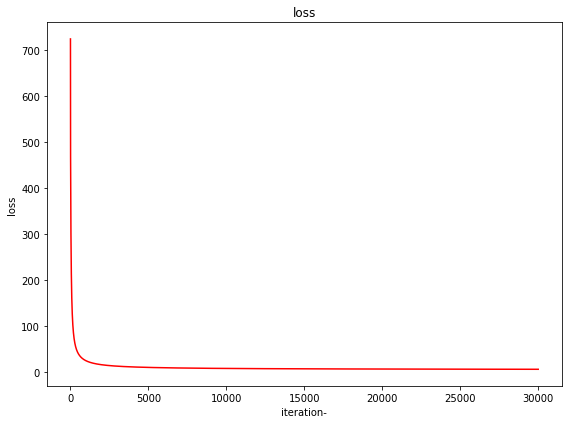

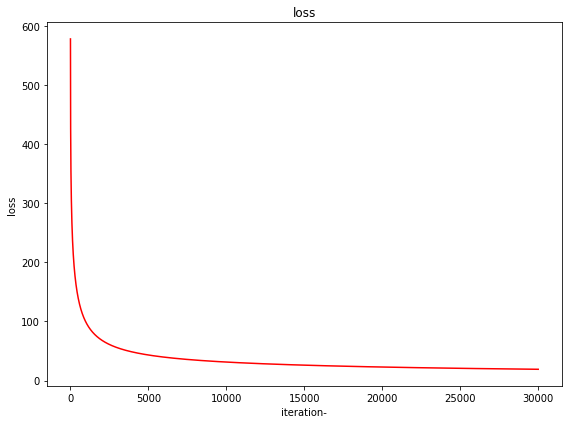

In [18]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')


    plt.plot(list(range(0,len(loss_iteration))), loss_iteration, '-', color = 'red')

    plt.xlabel('iteration-')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()
    
plot_loss_curve(loss1_iteration)
plot_loss_curve(loss2_iteration)

In [19]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    
    num_data = data.shape[0]

    point_x = data[:,0]
    point_y = data[:,1]
    label   = data[:,2]

    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
#plot_data(data1)
#plot_data(data2)

In [20]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')

    n = theta_iteration.shape[0]
        
    colors = ['royalblue','orange','green','hotpink','blueviolet']
    for i in range(theta_iteration.shape[1]):
        plt.plot(list(range(0,n)), theta_iteration[:,i], '-', color = colors[i] , label = "theta_"+str(i))
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
#plot_model_parameter(theta1_iteration)
#plot_model_parameter(theta2_iteration)

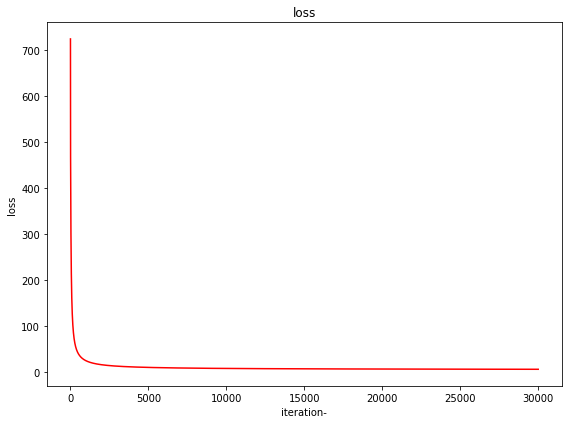

In [21]:
plot_loss_curve(loss1_iteration)

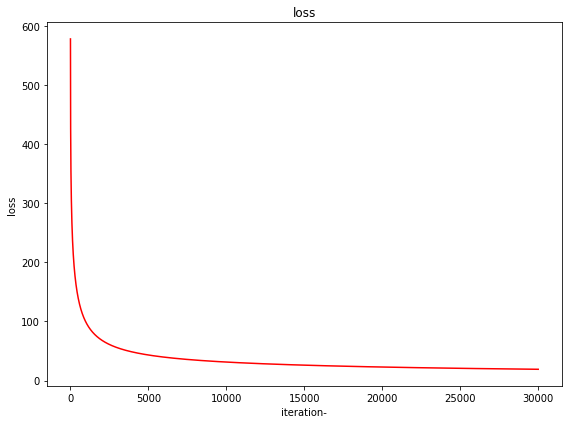

In [22]:
plot_loss_curve(loss2_iteration)

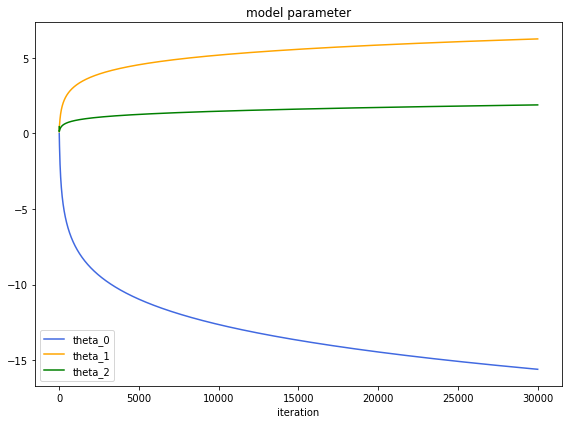

In [23]:
plot_model_parameter(theta1_iteration)

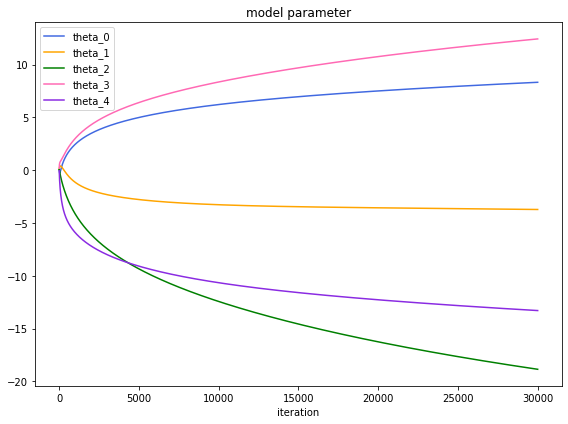

In [24]:
plot_model_parameter(theta2_iteration)

In [25]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    point_x = data[:,0]
    point_y = data[:,1]
    label   = data[:,2]
    
    x = np.linspace(-3.5, 3.5) 
    y = np.linspace(point_y.min(), point_y.max())
    X,Y = np.meshgrid(x,y)
    Z = theta[0] + theta[1]*X**2 + theta[2]*Y**2
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu_r'))
    plt.colorbar()
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")
    

    plt.contour(X,Y,Z,[0])    
    
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
#plot_classifier1(data1, theta1)

In [26]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    point_x = data[:,0]
    point_y = data[:,1]
    label   = data[:,2]
    
    x = np.linspace(point_x.min(), point_x.max()) 
    y = np.linspace(-2, 2.5)
    X,Y = np.meshgrid(x,y)
    Z = theta[0] + theta[1]*X + theta[2]*X**2 + theta[3]*X**3 + theta[4]*Y
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu_r'))
    plt.colorbar()
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")
    

    plt.contour(X,Y,Z,[0])    
    
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
#plot_classifier2(data2, theta2)

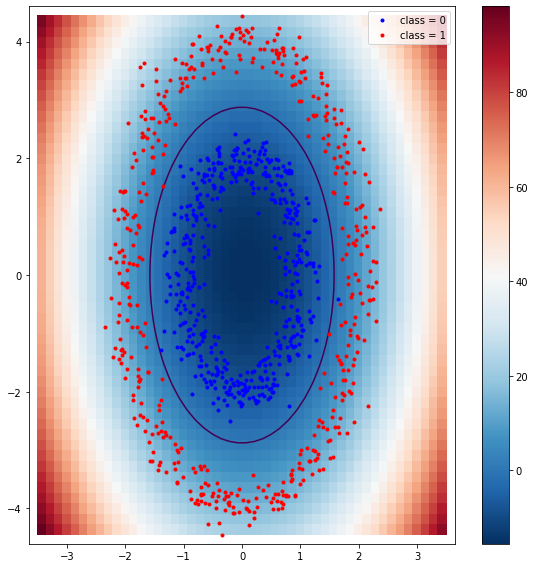

In [27]:
plot_classifier1(data1, theta1_optimal)

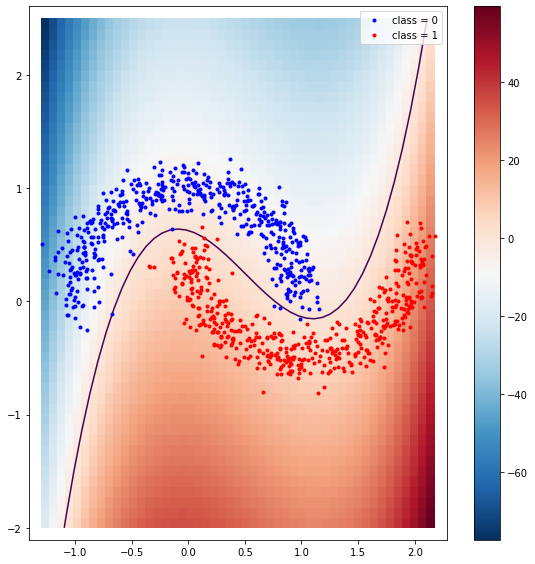

In [28]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

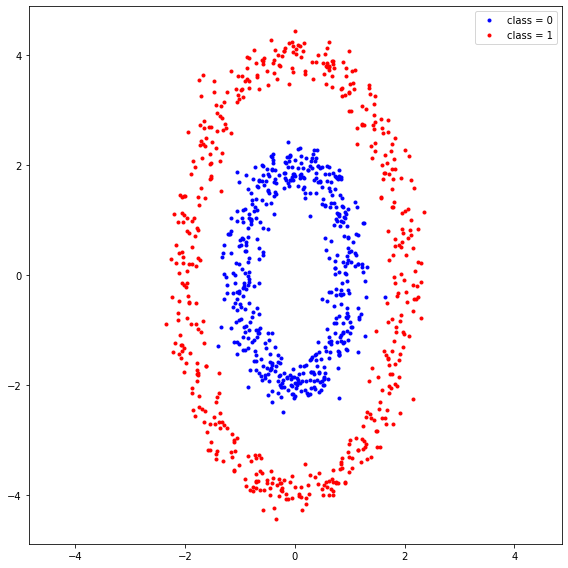

In [29]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

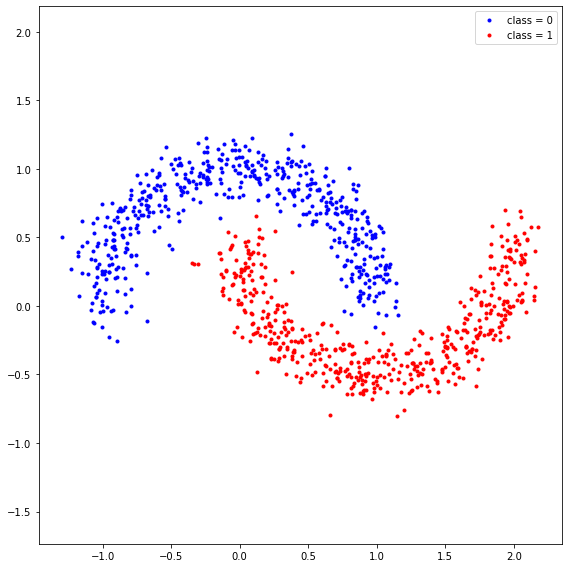

In [30]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

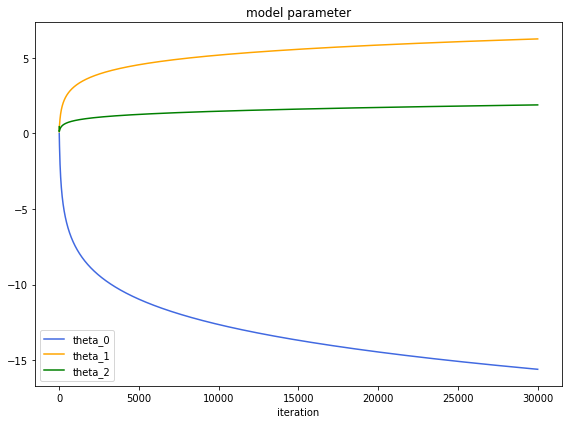

In [31]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

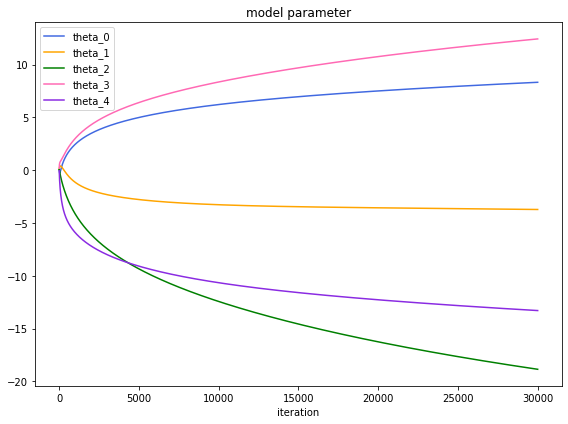

In [32]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

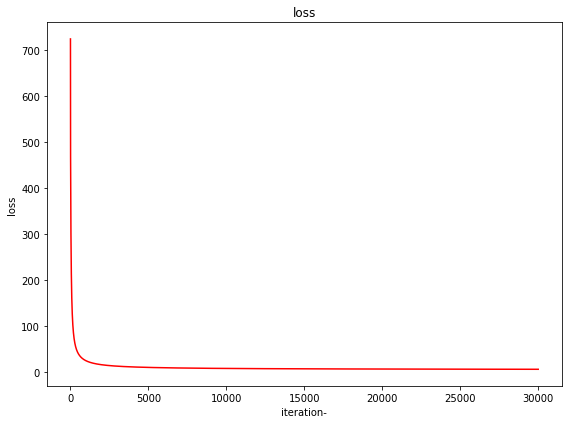

In [33]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

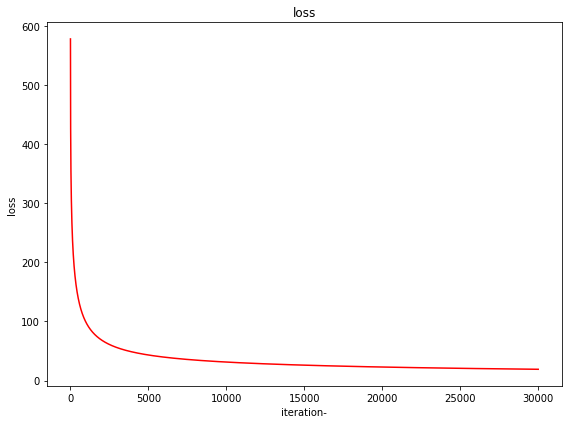

In [34]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

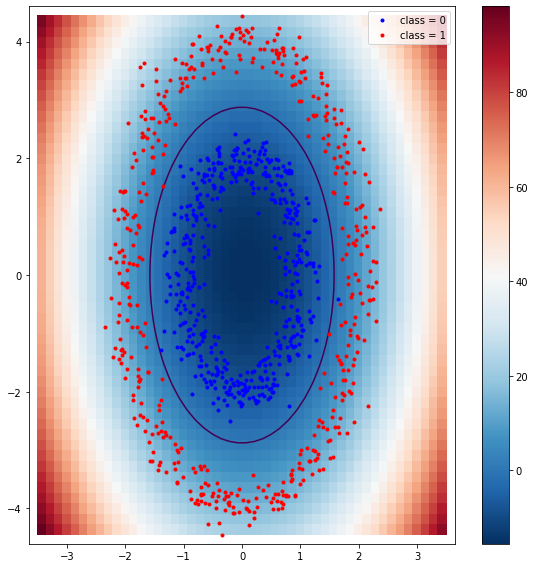

In [35]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

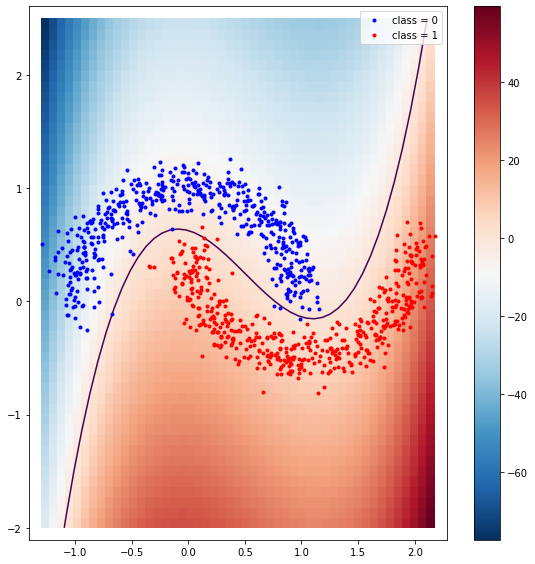

In [36]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [37]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [38]:
print(accuracy_classifier2)

0.994
